# Data Analysis

### Imports


In [655]:
import numpy as np
import plotly.io as pio
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import natsort
import math
import pathlib
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline

%load_ext autoreload
%autoreload 2

pio.renderers.default = "notebook_connected"

from src.overground_gait_assessments import *
from src.gait_cycle import *
from src.endpoint_variability import *
from src.dataloader import *
from src.bilateral_cyclogram import *
from src.CRP import *
from src.RP import *
from src.spider_chart import *
from src.ACC import *
from src.compute_gait_cycle_phases import *
from src.compute_step_width_length import *
from src.kinematics import *
from src.lin_reg import *
from src.GRF import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <a class="anchor" id="TOC"></a> Table of Contents

***

* 1. [Loading the data set](#sect_1)
* 2. [Overground gait assessments](#sect_2)
* 3. [Endpoint variability](#sect_3)
* 4. [Cyclogram-based symmetry method](#sect_4)
* 5. [Relative phase analysis](#sect_5)
* 6. [Spider charts](#sect_6)
* 7. [Correlation analyses](#sect_7)
* 8. [Walking mechanics progression](#sect_8)
* 9. [ROM](#sect_9)
* 10. [AB data](#sect_10)
* 11. [ACC](#sect_11)
* 12. [Gait cycle phases](#sect_12)
* 13. [Step length, step width & cadence](#sect_13)
* 13.b [Stride length, stride width](#sect_13.b)
* 14. [Responsiveness of gait parameters](#sect_14)
* 15. [Kinetic parameters](#sect_15)

# 1. Loading the data set:<a class="anchor" id="sect_1"></a>
[Back to table of contents](#TOC)

***


### SCI participants

**BO2ST_101**

In [2]:
gait_params_101_BL, trajectories_101_BL, angles_101_BL, forces_101_BL = download_parameters("BO2ST_101", "20230310_BL")
gait_params_101_T0, trajectories_101_T0, angles_101_T0, forces_101_T0 = download_parameters("BO2ST_101", "20230324_T0")
gait_params_101_T2, trajectories_101_T2, angles_101_T2, forces_101_T2 = download_parameters("BO2ST_101", "20230407_T2")

In [3]:
gait_params_101_T2_new_ss, trajectories_101_T2_new_ss, angles_101_T2_new_ss, forces_101_T2_new_ss = download_parameters_new_ss_trials("BO2ST_101", "20230407_T2")
gait_params_101_T1_new_ss, trajectories_101_T1_new_ss, angles_101_T1_new_ss, forces_101_T1_new_ss = download_parameters_new_ss_trials("BO2ST_101", "20230331_T1")

In [4]:
gait_params_101_T1, trajectories_101_T1, angles_101_T1, forces_101_T1 = download_parameters("BO2ST_101", "20230331_T1")

In [345]:
gait_params_101_F1, trajectories_101_F1, angles_101_F1, forces_101_F1 = download_parameters("BO2ST_101", "20230414_F1")

In [346]:
gait_params_101_F4, trajectories_101_F4, angles_101_F4, forces_101_F4 = download_parameters("BO2ST_101", "20230505_F4")

In [347]:
gait_params_101_F8, trajectories_101_F8, angles_101_F8, forces_101_F8 = download_parameters("BO2ST_101", "20230602_F8")

**BO2ST_102**

In [5]:
gait_params_102_BL, trajectories_102_BL, angles_102_BL, forces_102_BL = download_parameters("BO2ST_102", "20230412_BL")
gait_params_102_T0, trajectories_102_T0, angles_102_T0, forces_102_T0 = download_parameters("BO2ST_102", "20230428_T0")
gait_params_102_T2, trajectories_102_T2, angles_102_T2, forces_102_T2 = download_parameters("BO2ST_102", "20230512_T2")

In [6]:
gait_params_102_T1, trajectories_102_T1, angles_102_T1, forces_102_T1 = download_parameters("BO2ST_102", "20230505_T1")

In [7]:
gait_params_102_T0_new_ss, trajectories_102_T0_new_ss, angles_102_T0_new_ss, forces_102_T0_new_ss = download_parameters_new_ss_trials("BO2ST_102", "20230428_T0")
gait_params_102_T1_new_ss, trajectories_102_T1_new_ss, angles_102_T1_new_ss, forces_102_T1_new_ss = download_parameters_new_ss_trials("BO2ST_102", "20230505_T1")
gait_params_102_T2_new_ss, trajectories_102_T2_new_ss, angles_102_T2_new_ss, forces_102_T2_new_ss = download_parameters_new_ss_trials("BO2ST_102", "20230512_T2")

In [348]:
gait_params_102_F1, trajectories_102_F1, angles_102_F1, forces_102_F1 = download_parameters("BO2ST_102", "20230519_F1")

In [349]:
gait_params_102_F4, trajectories_102_F4, angles_102_F4, forces_102_F4 = download_parameters("BO2ST_102", "20230607_F4")

In [350]:
gait_params_102_F8, trajectories_102_F8, angles_102_F8, forces_102_F8 = download_parameters("BO2ST_102", "20230719_F8")

**BO2ST_103**

In [8]:
gait_params_103_BL, trajectories_103_BL, angles_103_BL, forces_103_BL = download_parameters("BO2ST_103", "20230317_BL")
gait_params_103_T0, trajectories_103_T0, angles_103_T0, forces_103_T0 = download_parameters("BO2ST_103", "20230331_T0")
gait_params_103_T2, trajectories_103_T2, angles_103_T2, forces_103_T2 = download_parameters("BO2ST_103", "20230414_T2")

In [9]:
gait_params_103_T0_new_ss, trajectories_103_T0_new_ss, angles_103_T0_new_ss, forces_103_T0_new_ss = download_parameters_new_ss_trials("BO2ST_103", "20230331_T0")

In [10]:
gait_params_103_T2_new_ss, trajectories_103_T2_new_ss, angles_103_T2_new_ss, forces_103_T2_new_ss = download_parameters_new_ss_trials("BO2ST_103", "20230414_T2")

In [256]:
gait_params_103_T1, trajectories_103_T1, angles_103_T1, forces_103_T1 = download_parameters("BO2ST_103", "20230407_T1")

In [11]:
gait_params_103_T1_new_ss, trajectories_103_T1_new_ss, angles_103_T1_new_ss, forces_103_T1_new_ss = download_parameters_new_ss_trials("BO2ST_103", "20230407_T1")

In [351]:
gait_params_103_F1, trajectories_103_F1, angles_103_F1, forces_103_F1 = download_parameters("BO2ST_103", "20230421_F1")

In [352]:
gait_params_103_F4, trajectories_103_F4, angles_103_F4, forces_103_F4 = download_parameters("BO2ST_103", "20230526_F4")

In [353]:
gait_params_103_F8, trajectories_103_F8, angles_103_F8, forces_103_F8 = download_parameters("BO2ST_103", "20230630_F8")

**BO2ST_104**

In [12]:
gait_params_104_BL, trajectories_104_BL, angles_104_BL, forces_104_BL = download_parameters("BO2ST_104", "20230622_BL")
gait_params_104_T0, trajectories_104_T0, angles_104_T0, forces_104_T0 = download_parameters("BO2ST_104", "20230707_T0")
gait_params_104_T2, trajectories_104_T2, angles_104_T2, forces_104_T2 = download_parameters("BO2ST_104", "20230721_T2")

In [13]:
gait_params_104_T1, trajectories_104_T1, angles_104_T1, forces_104_T1 = download_parameters("BO2ST_104", "20230717_T1")

In [14]:
gait_params_104_T0_new_ss, trajectories_104_T0_new_ss, angles_104_T0_new_ss, forces_104_T0_new_ss = download_parameters_new_ss_trials("BO2ST_104", "20230707_T0")
gait_params_104_T1_new_ss, trajectories_104_T1_new_ss, angles_104_T1_new_ss, forces_104_T1_new_ss = download_parameters_new_ss_trials("BO2ST_104", "20230717_T1")
gait_params_104_T2_new_ss, trajectories_104_T2_new_ss, angles_104_T2_new_ss, forces_104_T2_new_ss = download_parameters_new_ss_trials("BO2ST_104", "20230721_T2")

In [354]:
gait_params_104_F1, trajectories_104_F1, angles_104_F1, forces_104_F1 = download_parameters("BO2ST_104", "20230728_F1")

In [355]:
gait_params_104_F4, trajectories_104_F4, angles_104_F4, forces_104_F4 = download_parameters("BO2ST_104", "20230818_F4")

In [356]:
gait_params_104_F8, trajectories_104_F8, angles_104_F8, forces_104_F8 = download_parameters("BO2ST_104", "20231001_F8")

**BO2ST_105**

In [15]:
gait_params_105_BL, trajectories_105_BL, angles_105_BL, forces_105_BL = download_parameters("BO2ST_105", "20230524_BL")
gait_params_105_T0, trajectories_105_T0, angles_105_T0, forces_105_T0 = download_parameters("BO2ST_105", "20230609_T0")
gait_params_105_T2, trajectories_105_T2, angles_105_T2, forces_105_T2 = download_parameters("BO2ST_105", "20230623_T2")

In [16]:
gait_params_105_T1, trajectories_105_T1, angles_105_T1, forces_105_T1 = download_parameters("BO2ST_105", "20230616_T1")

In [17]:
gait_params_105_T0_new_ss, trajectories_105_T0_new_ss, angles_105_T0_new_ss, forces_105_T0_new_ss = download_parameters_new_ss_trials("BO2ST_105", "20230609_T0")
gait_params_105_T1_new_ss, trajectories_105_T1_new_ss, angles_105_T1_new_ss, forces_105_T1_new_ss = download_parameters_new_ss_trials("BO2ST_105", "20230616_T1")
gait_params_105_T2_new_ss, trajectories_105_T2_new_ss, angles_105_T2_new_ss, forces_105_T2_new_ss = download_parameters_new_ss_trials("BO2ST_105", "20230623_T2")

In [357]:
gait_params_105_F1, trajectories_105_F1, angles_105_F1, forces_105_F1 = download_parameters("BO2ST_105", "20230629_F1")

In [358]:
gait_params_105_F4, trajectories_105_F4, angles_105_F4, forces_105_F4 = download_parameters("BO2ST_105", "20230719_F4")

In [359]:
gait_params_105_F8, trajectories_105_F8, angles_105_F8, forces_105_F8 = download_parameters("BO2ST_105", "20230816_F8")

**BO2ST_106**

In [18]:
gait_params_106_BL, trajectories_106_BL, angles_106_BL, forces_106_BL = download_parameters("BO2ST_106", "20230428_BL")
gait_params_106_T0, trajectories_106_T0, angles_106_T0, forces_106_T0 = download_parameters("BO2ST_106", "20230512_T0")
gait_params_106_T2, trajectories_106_T2, angles_106_T2, forces_106_T2 = download_parameters("BO2ST_106", "20230526_T2")

In [19]:
gait_params_106_T0_new_ss, trajectories_106_T0_new_ss, angles_106_T0_new_ss, forces_106_T0_new_ss = download_parameters_new_ss_trials("BO2ST_106", "20230512_T0")
gait_params_106_T1_new_ss, trajectories_106_T1_new_ss, angles_106_T1_new_ss, forces_106_T1_new_ss = download_parameters_new_ss_trials("BO2ST_106", "20230519_T1")
gait_params_106_T2_new_ss, trajectories_106_T2_new_ss, angles_106_T2_new_ss, forces_106_T2_new_ss = download_parameters_new_ss_trials("BO2ST_106", "20230526_T2")

In [20]:
gait_params_106_T1, trajectories_106_T1, angles_106_T1, forces_106_T1 = download_parameters("BO2ST_106", "20230519_T1")

In [360]:
gait_params_106_F1, trajectories_106_F1, angles_106_F1, forces_106_F1 = download_parameters("BO2ST_106", "20230602_F1")

In [361]:
gait_params_106_F4, trajectories_106_F4, angles_106_F4, forces_106_F4 = download_parameters("BO2ST_106", "20230623_F4")

In [362]:
gait_params_106_F8, trajectories_106_F8, angles_106_F8, forces_106_F8 = download_parameters("BO2ST_106", "20230721_F8")

**BO2ST_109**

In [553]:
gait_params_109_BL, trajectories_109_BL, angles_109_BL, forces_109_BL = download_parameters("BO2ST_109", "20230929_BL")
gait_params_109_T0, trajectories_109_T0, angles_109_T0, forces_109_T0 = download_parameters("BO2ST_109", "20231013_T0")
gait_params_109_T1, trajectories_109_T1, angles_109_T1, forces_109_T1 = download_parameters("BO2ST_109", "20231020_T1")
gait_params_109_T2, trajectories_109_T2, angles_109_T2, forces_109_T2 = download_parameters("BO2ST_109", "20231027_T2")

In [562]:
gait_params_109_F4, trajectories_109_F4, angles_109_F4, forces_109_F4 = download_parameters("BO2ST_109", "20231127_F4")
gait_params_109_F8, trajectories_109_F8, angles_109_F8, forces_109_F8 = download_parameters("BO2ST_109", "20231229_F8")


In [554]:
gait_params_109_T0_new_ss, trajectories_109_T0_new_ss, angles_109_T0_new_ss, forces_109_T0_new_ss = download_parameters_new_ss_trials("BO2ST_109", "20231013_T0")
gait_params_109_T1_new_ss, trajectories_109_T1_new_ss, angles_109_T1_new_ss, forces_109_T1_new_ss = download_parameters_new_ss_trials("BO2ST_109", "20231020_T1")
gait_params_109_T2_new_ss, trajectories_109_T2_new_ss, angles_109_T2_new_ss, forces_109_T2_new_ss = download_parameters_new_ss_trials("BO2ST_109", "20231027_T2")

### AB 

In [23]:
trajectories_AB03, angles_AB03, forces_AB03 = download_WBDSascii("03")
trajectories_AB11, angles_AB11, forces_AB11 = download_WBDSascii("11")
trajectories_AB21, angles_AB21, forces_AB21 = download_WBDSascii("21")
trajectories_AB38, angles_AB38, forces_AB38 = download_WBDSascii("38")
trajectories_AB42, angles_AB42, forces_AB42 = download_WBDSascii("42")

# 2. Overground gait assessments:<a class="anchor" id="sect_2"></a>
[Back to table of contents](#TOC)

We used 3 commonly used measures to assess overground walking abilities in iSCI participants:

* 10MWT speed: In this test, individuals are instructed to walk a straight path as quickly and safely as possible. The test incorporates a flying start approach, where individuals walk 14 metres, and the time is recorded for the intermediate 10 metres to consider acceleration and deceleration. Alternatively, participants may cover 10 metres, and the time taken for the central 6 metres is measured. The 10MWT has demonstrated excellent reliability for fastest walking speed. In the context of walking recovery after SCI, speed on the 10MWT stands out as a primary measure for assessing walking capacity. This metric is also considered the gold standard for evaluating improved walking function in various clinical populations, providing a valuable means to align outcomes with other published studies.
    
* 6MWT speed: The 6MWT is used to assess endurance. The participant walks back and forth in a 30-metre hallway, and the distance covered over a time of 6 minutes is used as the outcome. The participant is permitted to stop, and to rest as necessary during the test. In the context of walking recovery after SCI, clinical trials often use standardised functional assessments to evaluate functional walking capacity via the 6MWT. Along with the 10MWT, the 6MWT is widely regarded as the gold standard for assessing enhanced walking function across different clinical populations, this metric offers a valuable benchmark for comparing outcomes with other published studies.
    
* TUG time: The TUG test is a highly reliable and valid test used to determine fall risk and measure the progress of balance, sit to stand and walking. It involves standing up from an armchair, walking 3 metres, returning to the chair, and sitting down at the individual's preferred walking speed. The time taken to complete this sequence is employed as the outcome measure. Clinical trials often use standardised functional assessments to evaluate functional mobility via the TUG test in various population.
    
Additionally, we evaluate the improvement in self-selected speed for each iSCI participant throughout the intervention.    

**Statistical analysis:**
A statistical analysis was conducted to evaluate the changes in walking endurance, walking speed, balance, and self-selected walking speed. Given the limited sample size in the study, traditional parametric tests, such as the paired t-test which relies on the assumption of normality for accurate interpretation of results, are not appropriate. To address the small sample size and the fact that the distribution of data may not conform to a normal distribution, a non-parametric test, the Wilcoxon signed-rank test, was used. Our hypothesis stated that walking speed, endurance, balance, and self-selected speed would improve following intervention. Consequently, the one-sided Wilcoxon signed-rank test was utilised to examine the alternative hypothesis that there would be an increase in the 10MWT speed, the 6MWT speed, and the self-selected speed, as well as a decrease in the time taken to complete the TUG assessment.

***


/Users/camillefrayssinhes/INSPIRE LAB/src/overground_gait_assessments.py:109: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



WILCOXON TEST BL/T0
p-value wilcoxon test 10MWT time woAD:  0.03
p-value wilcoxon test 6MWT distance woAD: 0.03
p-value wilcoxon test TUG time woAD: 0.06
------------------------------------------------------------
p-value wilcoxon test 10MWT time wAD:  1.00
p-value wilcoxon test 6MWT distance wAD: 0.50
p-value wilcoxon test TUG time wAD: 0.50
------------------------------------------------------------
 
KRUSKAL-WALLIS H-TEST woAD/wAD
p-value Kruskal-Wallis H-test 10MWT: 1.00
p-value Kruskal-Wallis H-test 6MWT: 0.50
p-value Kruskal-Wallis H-test TUG: 0.18


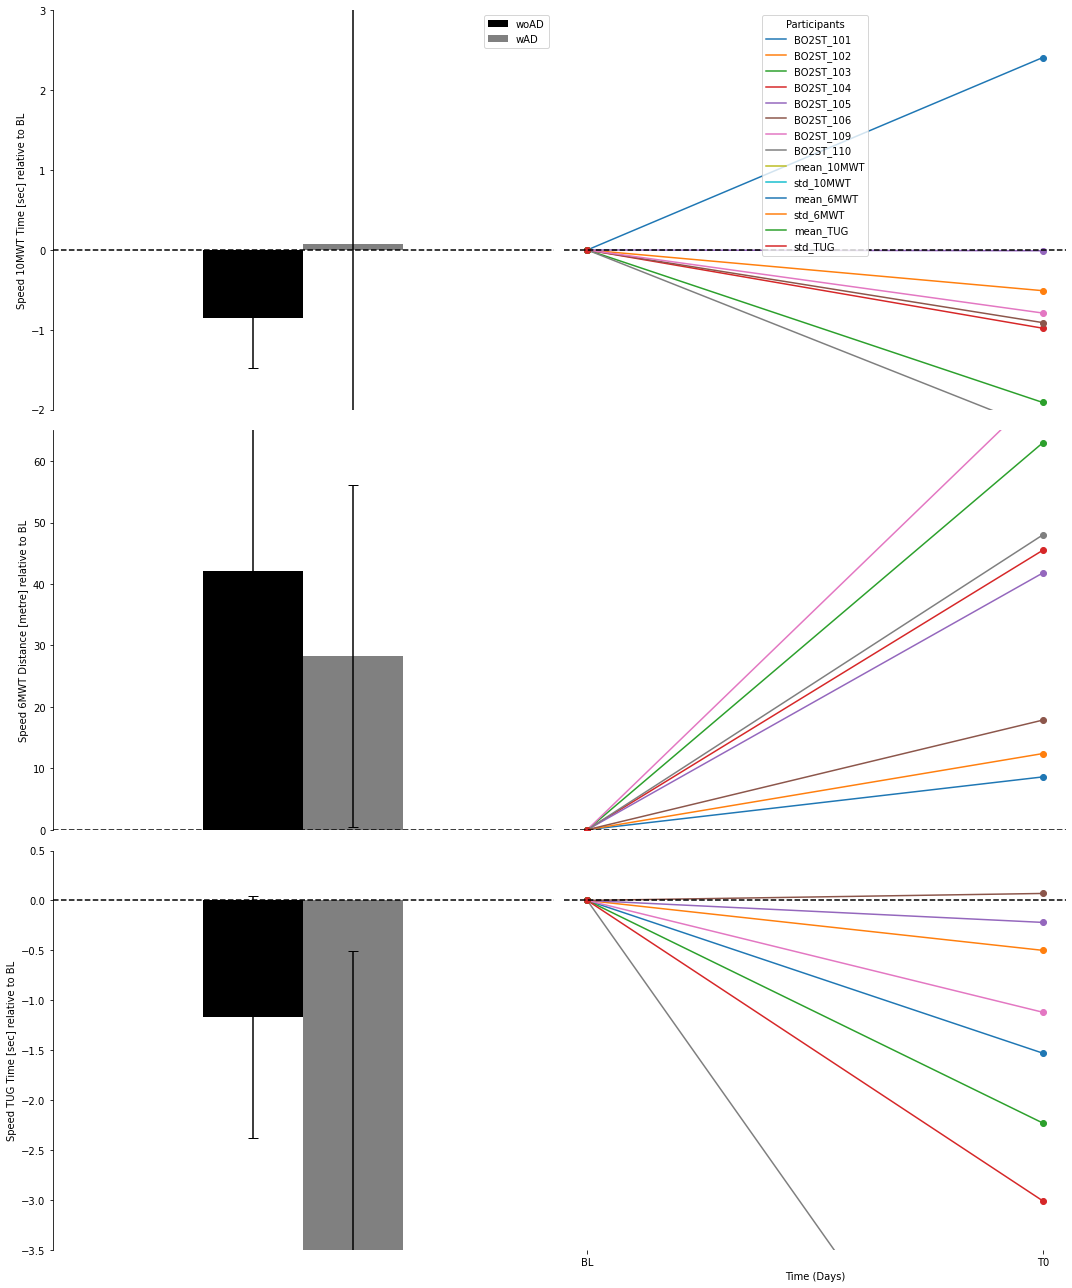

In [2843]:
overground_gait_assessments()

In [540]:
violin_plots('T0')

WILCOXON TEST BL/T0
p-value wilcoxon test 10MWT speed:  0.00
p-value wilcoxon test 6MWT speed: 0.00
p-value wilcoxon test TUG time: 0.95
p-value wilcoxon test ss-speed: 0.01
------------------------------------------------------------
 


In [2845]:
individual_progress("BO2ST_110")

In [36]:
individual_progress_ss_speed('BO2ST_109')

# 3. Endpoint variability:<a class="anchor" id="sect_3"></a>
[Back to table of contents](#TOC)

Variability in kinematics during walking, frequently assessed by the variability of the footpath trajectory, is regarded as an indicator of walking impairment following iSCI. Sohn et al. introduced the end-point variability (EV), defined as the normalised tolerance area of the accumulated trajectory points of the fifth metatarsophalangeal joint, the distal-most marker of the foot, during the swing phase of multiple gait cycles, to assess the variability in step-to-step foot placement.

***

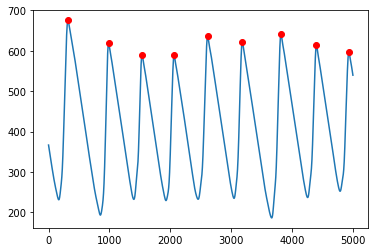

In [616]:
heel_strike, toe_off = compute_gait_cycle_2(trajectory_LHEE_Y, trajectory_LTOE_Y)
plt.plot(trajectory_LHEE_Y)
plt.plot(heel_strike, trajectory_LHEE_Y.iloc[heel_strike], 'ro')

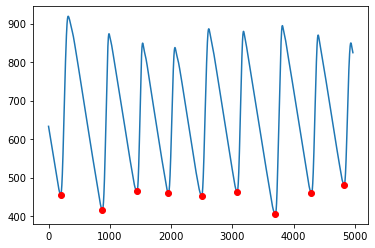

In [617]:
plt.plot(trajectory_LTOE_Y)
plt.plot(toe_off, trajectory_LTOE_Y.iloc[toe_off], 'ro')

[0.01769613 0.28353133]
[0.05433121 0.11036682]
[0.06749183 0.11955739]
[0.07050929 0.14700174]
[0.07188995 0.14474716]
[0.07185234 0.13064121]
[0.05429534 0.12148256]
[0.03102558 0.14440744]
[0.02272432 0.16839123]
[0.02192388 0.12835638]


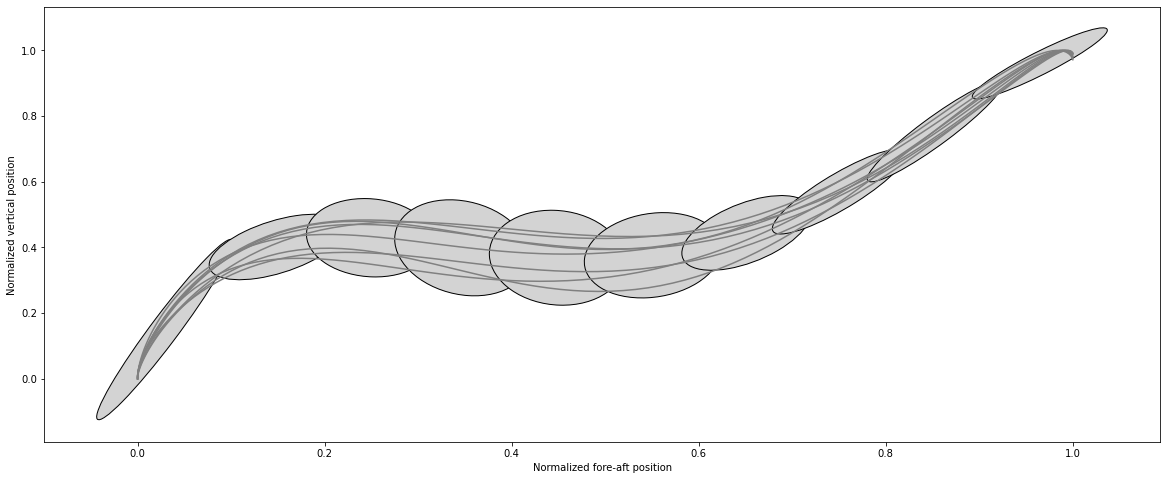

[1.58 1.88 2.53 3.26 3.27 2.95 2.07 1.41 1.2  0.88]


<Figure size 432x288 with 0 Axes>

In [615]:
trajectory_LTOE_Z = trajectories_109_F8[0][1]['BO2ST_109:LTOE'].Z
trajectory_LTOE_Y = trajectories_109_F8[0][1]['BO2ST_109:LTOE'].Y
trajectory_LHEE_Y = trajectories_109_F8[0][1]['BO2ST_109:LHEE'].Y

compute_EV_onetrial(trajectory_LTOE_Z, trajectory_LTOE_Y, trajectory_LHEE_Y)

**Example: EV computed across the 3 trials at self selected speed in an iSCI participant**

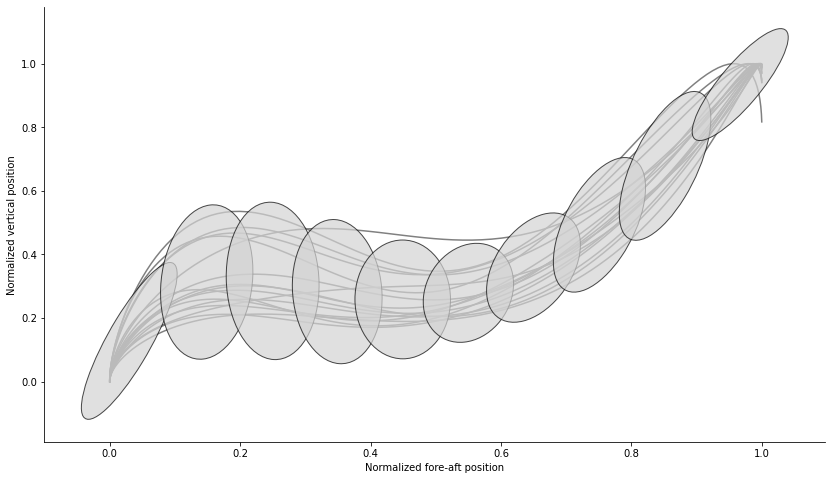

[4.0]

In [593]:
compute_EV_ss_speed_threetrials(trajectories_109_T2, 'BO2ST_109', 'L', plot=True, new_ss=False, T2=True)

It's important to note that the confidence_ellipse function assumes that the input data (x and y) are normally distributed and have a bivariate normal distribution. If the data distribution deviates significantly from this assumption, the confidence ellipse may not accurately represent the confidence region !!

In [625]:
# add BO2ST_109 to the already created file
EV_file_name = ("BO2STTrial/walking_mechanics_performances.xlsx")
EV_xcl = pd.read_excel(EV_file_name, header = [0], index_col = [0])

ID = "BO2ST_109"
side = 'L'
trajectories_BL = trajectories_109_BL
trajectories_T0 = trajectories_109_T0
trajectories_T1 = trajectories_109_T1
trajectories_T2 = trajectories_109_T2
trajectories_F4 = trajectories_109_F4
trajectories_F8 = trajectories_109_F8


EV_i_BL = np.squeeze(compute_EV_ss_speed_threetrials(trajectories_BL, ID, side))
EV_i_T0 = np.squeeze(compute_EV_ss_speed_threetrials(trajectories_T0, ID, side, T0=True))
EV_i_T1 = np.squeeze(compute_EV_ss_speed_threetrials(trajectories_T1, ID, side, T1=True))
EV_i_T2 = np.squeeze(compute_EV_ss_speed_threetrials(trajectories_T2, ID, side, T2=True))
EV_i_F1 = np.nan
EV_i_F4 = np.squeeze(compute_EV_ss_speed_threetrials(trajectories_F4, ID, side, F4=True))
EV_i_F8 = np.squeeze(compute_EV_ss_speed_threetrials(trajectories_F8, ID, side, F8=True))

# write the walking mechanics and  in xcel file
EV = pd.DataFrame([[EV_i_BL, EV_i_T0, EV_i_T1, EV_i_T2, EV_i_F1, EV_i_F4, EV_i_F8]],
                  index=[ID], columns=['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2', 'EV_F1', 'EV_F4', 'EV_F8'])  
EV_xcl = EV_xcl.append(EV)
EV_xcl.to_excel("BO2STTrial/walking_mechanics_performances.xlsx")     

In [626]:
EV_xcl

,EV_BL,EV_T0,EV_T1,EV_T2,EV_F1,EV_F4,EV_F8,A_BL,A_T0,A_T1,...,A_F1_norm,A_F4_norm,A_F8_norm,STD_BL_norm,STD_T0_norm,STD_T1_norm,STD_T2_norm,STD_F1_norm,STD_F4_norm,STD_F8_norm
BO2ST_101,1.37,1.49,1.92,1.76,1.05,1.51,1.33,0.701594,0.749210,0.982252,...,0.405788,0.859983,46.969060,-0.884868,0.561694,1.702370,0.520324,-0.037852,2.113005,1.060308
BO2ST_102,1.53,1.33,1.29,1.38,1.85,1.18,1.3,0.815428,0.728212,0.733572,...,-0.127441,-0.209567,56.237817,-0.722538,-0.352815,-1.530175,-1.453014,-1.461282,-1.563368,-1.422966
BO2ST_103,5.94,3.15,3.47,2.84,4.61,2.86,2.38,1.092641,0.792259,0.943963,...,1.601438,2.371215,68.087870,-0.515001,-0.106356,0.082893,-0.385209,-0.600392,-0.098251,-0.771879
BO2ST_104,4.82,5.7,4.5,5.33,5.07,2.89,3.37,0.480552,0.351516,0.419924,...,-1.156078,-0.693960,152.419748,0.961954,1.884783,1.695567,0.720197,2.161092,0.725393,1.267389
BO2ST_105,1.84,1.99,1.82,1.98,1.17,1.61,2.53,0.517188,0.374064,0.533088,...,-0.981281,-0.872266,91.508011,-0.104830,-0.611050,0.571124,0.193080,-0.411476,0.077432,0.095264
BO2ST_106,6.93,5.94,6.59,6.68,6.71,7.39,6.84,0.677689,0.670626,0.590729,...,0.404683,-0.543490,45.580717,-0.909183,0.021298,-0.995951,-0.317709,-0.250463,-0.314232,-0.594308
mean_EV,3.267619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_EV,2.06417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_A,0.69804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std_A,0.267572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compute EV at the new ss speed in all iSCI participants

In [537]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
trajectories_T1_new_ss = [trajectories_101_T1_new_ss, trajectories_102_T1_new_ss, trajectories_103_T1_new_ss, trajectories_104_T1_new_ss, trajectories_105_T1_new_ss, trajectories_106_T1_new_ss, trajectories_109_T1_new_ss]
trajectories_T2_new_ss = [trajectories_101_T2_new_ss, trajectories_102_T2_new_ss, trajectories_103_T2_new_ss, trajectories_104_T2_new_ss, trajectories_105_T2_new_ss, trajectories_106_T2_new_ss, trajectories_109_T2_new_ss]

# compute EV of the MA side for all participants
EV_BL = []; EV_T0 = []; EV_T1 = []; EV_T2 = []; EV_F1 = []; EV_F4 = []; EV_F8 = []

#for i in range(len(IDs)): 
for i in range(len(IDs)): 
    print(IDs[i])
    EV_i_BL = compute_EV_ss_speed_threetrials(trajectories_BL[i], IDs[i], sides[i], new_ss=False)
    if (i==0):
        EV_i_T0 = compute_EV_ss_speed_threetrials(trajectories_T0_new_ss[i], IDs[i], sides[i], new_ss=False, T0=True)
    else:   
        EV_i_T0 = compute_EV_ss_speed_threetrials(trajectories_T0_new_ss[i], IDs[i], sides[i], new_ss=True, T0=True)
    EV_i_T1 = compute_EV_ss_speed_threetrials(trajectories_T1_new_ss[i], IDs[i], sides[i], new_ss=True, T1=True)
    EV_i_T2 = compute_EV_ss_speed_threetrials(trajectories_T2_new_ss[i], IDs[i], sides[i], new_ss=True, T2=True)
    EV_BL.append(float(np.squeeze(EV_i_BL)))
    EV_T0.append(float(np.squeeze(EV_i_T0)))
    EV_T1.append(float(np.squeeze(EV_i_T1)))
    EV_T2.append(float(np.squeeze(EV_i_T2)))

# write the walking mechanics and  in xcel file
EV = pd.DataFrame([[EV_BL[0], EV_T0[0], EV_T1[0], EV_T2[0]],
                           [EV_BL[1], EV_T0[1], EV_T1[1], EV_T2[1]],
                           [EV_BL[2], EV_T0[2], EV_T1[2], EV_T2[2]],
                           [EV_BL[3], EV_T0[3], EV_T1[3], EV_T2[3]],
                           [EV_BL[4], EV_T0[4], EV_T1[4], EV_T2[4]],
                           [EV_BL[5], EV_T0[5], EV_T1[5], EV_T2[5]],
                           [EV_BL[6], EV_T0[6], EV_T1[6], EV_T2[6]]],
                  index=[IDs], columns=['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2'])                         
EV.to_excel('BO2STTrial/EV_new_ss.xlsx')     

BO2ST_101
BO2ST_102
BO2ST_103
BO2ST_104
BO2ST_105
BO2ST_106
BO2ST_109


plot

In [551]:
# read xcl files
EV_file_name = ("BO2STTrial/walking_mechanics_performances.xlsx")
EV_xcl = pd.read_excel(EV_file_name, header = [0], index_col = [0])
EV_new_ss_file_name = ("BO2STTrial/EV_new_ss.xlsx")
EV_new_ss_xcl = pd.read_excel(EV_new_ss_file_name, header = [0], index_col = [0])
EV_AB_file_name = ("BO2STTrial/walking_mechanics_performances_control.xlsx")
EV_AB_xcl = pd.read_excel(EV_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
EV_y = EV_xcl.loc[ID][['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2']] # relative to T0?
EV_y_new_ss = EV_new_ss_xcl.loc[ID][['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2']] # relative to T0?
EV_y_AB = EV_AB_xcl.loc[ID_AB][['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Normalized fore-aft position', y_title = 'Normalized vertical position')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=EV_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=EV_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = EV_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

Compute SI EV

In [2972]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106"]
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2]

# compute EV of both sides for all participants
EV_BL_left = []; EV_T0_left = []; EV_T1_left = []; EV_T2_left = []
EV_BL_right = []; EV_T0_right = []; EV_T1_right = []; EV_T2_right = []

for i in range(len(IDs)): 
    EV_i_BL_left, EV_i_BL_right = compute_EV_left_and_right(trajectories_BL[i], IDs[i], new_ss = False)
    EV_i_T0_left, EV_i_T0_right = compute_EV_left_and_right(trajectories_T0[i], IDs[i], new_ss = False)
    EV_i_T1_left, EV_i_T1_right = compute_EV_left_and_right(trajectories_T1[i], IDs[i], new_ss = False)
    EV_i_T2_left, EV_i_T2_right = compute_EV_left_and_right(trajectories_T2[i], IDs[i], new_ss = False)
    EV_BL_left.append(float(np.squeeze(EV_i_BL_left)))
    EV_T1_left.append(float(np.squeeze(EV_i_T1_left)))
    EV_T0_left.append(float(np.squeeze(EV_i_T0_left)))
    EV_T2_left.append(float(np.squeeze(EV_i_T2_left)))
    EV_BL_right.append(float(np.squeeze(EV_i_BL_right)))
    EV_T0_right.append(float(np.squeeze(EV_i_T0_right)))
    EV_T1_right.append(float(np.squeeze(EV_i_T1_right)))
    EV_T2_right.append(float(np.squeeze(EV_i_T2_right)))

SI_BL_EV = []; SI_T0_EV = []; SI_T1_EV = []; SI_T2_EV = []

for i in range(len(IDs)): 
    SI_BL_EV_i = compute_symmetry_index(EV_BL_right[i], EV_BL_left[i])
    SI_T0_EV_i = compute_symmetry_index(EV_T0_right[i], EV_T0_left[i])
    SI_T1_EV_i = compute_symmetry_index(EV_T1_right[i], EV_T1_left[i])
    SI_T2_EV_i = compute_symmetry_index(EV_T2_right[i], EV_T2_left[i])
    SI_BL_EV.append(SI_BL_EV_i)
    SI_T0_EV.append(SI_T0_EV_i)
    SI_T1_EV.append(SI_T1_EV_i)
    SI_T2_EV.append(SI_T2_EV_i)
    

# write the walking mechanics and  in xcel file
EV_SI = pd.DataFrame([[SI_BL_EV[0], SI_T0_EV[0], SI_T1_EV[0], SI_T2_EV[0]],
                           [SI_BL_EV[1], SI_T0_EV[1], SI_T1_EV[1], SI_T2_EV[1]],
                           [SI_BL_EV[2], SI_T0_EV[2], SI_T1_EV[2], SI_T2_EV[2]],
                           [SI_BL_EV[3], SI_T0_EV[3], SI_T1_EV[3], SI_T2_EV[3]],
                           [SI_BL_EV[4], SI_T0_EV[4], SI_T1_EV[4], SI_T2_EV[4]],
                           [SI_BL_EV[5], SI_T0_EV[5], SI_T1_EV[5], SI_T2_EV[5]]],
                  index=IDs, columns=['SI_BL_EV', 'SI_T0_EV', 'SI_T1_EV', 'SI_T2_EV'])                          
EV_SI.to_excel('BO2STTrial/EV_SI.xlsx')     

In [2973]:
IDs_AB = ["AB03", "AB11", "AB21", "AB38", "AB42"]
SI_EV_AB_BL = []; SI_EV_AB_T0 = []; SI_EV_AB_T1 = []; SI_EV_AB_T2 = []

#AB03
EV_AB03_left, EV_AB03_right = compute_EV_AB_left_and_right(trajectories_AB03, '03')
SI_AB03 = compute_symmetry_index(EV_AB03_left, EV_AB03_right)
SI_EV_AB_BL.append(SI_AB03); SI_EV_AB_T0.append(SI_AB03); SI_EV_AB_T1.append(SI_AB03); SI_EV_AB_T2.append(SI_AB03) 
#AB11
EV_AB11_left, EV_AB11_right = compute_EV_AB_left_and_right(trajectories_AB11, '11')
SI_AB11 = compute_symmetry_index(EV_AB11_left, EV_AB11_right)
SI_EV_AB_BL.append(SI_AB11); SI_EV_AB_T0.append(SI_AB11); SI_EV_AB_T1.append(SI_AB11); SI_EV_AB_T2.append(SI_AB11)
#AB21
EV_AB21_left, EV_AB21_right = compute_EV_AB_left_and_right(trajectories_AB21, '21')
SI_AB21 = compute_symmetry_index(EV_AB21_left, EV_AB21_right)
SI_EV_AB_BL.append(SI_AB21); SI_EV_AB_T0.append(SI_AB21); SI_EV_AB_T1.append(SI_AB21); SI_EV_AB_T2.append(SI_AB21)
#AB38
EV_AB38_left, EV_AB38_right = compute_EV_AB_left_and_right(trajectories_AB38, '38')
SI_AB38 = compute_symmetry_index(EV_AB38_left, EV_AB38_right)
SI_EV_AB_BL.append(SI_AB38); SI_EV_AB_T0.append(SI_AB38); SI_EV_AB_T1.append(SI_AB38); SI_EV_AB_T2.append(SI_AB38)
#AB42
EV_AB42_left, EV_AB42_right = compute_EV_AB_left_and_right(trajectories_AB42, '42')
SI_AB42 = compute_symmetry_index(EV_AB42_left, EV_AB42_right)
SI_EV_AB_BL.append(SI_AB42); SI_EV_AB_T0.append(SI_AB42); SI_EV_AB_T1.append(SI_AB42); SI_EV_AB_T2.append(SI_AB42)


# write the walking mechanics and  in xcel file
EV_SI_AB = pd.DataFrame([[SI_EV_AB_BL[0], SI_EV_AB_T0[0], SI_EV_AB_T1[0], SI_EV_AB_T2[0]],
                           [SI_EV_AB_BL[1], SI_EV_AB_T0[1], SI_EV_AB_T1[1], SI_EV_AB_T2[1]],
                           [SI_EV_AB_BL[2], SI_EV_AB_T0[2], SI_EV_AB_T1[2], SI_EV_AB_T2[2]],
                           [SI_EV_AB_BL[3], SI_EV_AB_T0[3], SI_EV_AB_T1[3], SI_EV_AB_T2[3]],
                           [SI_EV_AB_BL[4], SI_EV_AB_T0[4], SI_EV_AB_T1[4], SI_EV_AB_T2[4]]],
                  index=IDs_AB, columns=['SI_BL_EV', 'SI_T0_EV', 'SI_T1_EV', 'SI_T2_EV'])                          
EV_SI_AB.to_excel('BO2STTrial/EV_SI_AB.xlsx')     

In [747]:
EV_SI_xcl 

,SI_BL_EV,SI_T0_EV,SI_T1_EV,SI_T2_EV
BO2ST_101,6.360424,59.433962,37.632135,9.214092
BO2ST_102,6.940063,35.294118,77.725118,16.611296
BO2ST_103,103.061224,8.264463,24.232633,16.380952
BO2ST_104,34.790060,37.747654,57.707510,5.593057
BO2ST_105,7.832898,22.969188,37.136465,7.329843
BO2ST_106,37.735849,33.398821,45.666356,78.914405


plot SI EV

In [753]:
# read xcl files
EV_SI_file_name = ("BO2STTrial/EV_SI.xlsx")
EV_SI_xcl = pd.read_excel(EV_SI_file_name, header = [0], index_col = [0])
#EV_SI_new_ss_file_name = ("BO2STTrial/EV_new_ss.xlsx")
#EV_SI_new_ss_xcl = pd.read_excel(EV_new_ss_file_name, header = [0], index_col = [0])
EV_SI_AB_file_name = ("BO2STTrial/EV_SI_AB.xlsx")
EV_SI_AB_xcl = pd.read_excel(EV_SI_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_101"
ID_AB = control_xcl.loc[ID].Matched_control
#print(ID_AB)
x = ['BL', 'T0', 'T1', 'T2']
EV_y = EV_SI_xcl.loc[ID][['SI_BL_EV', 'SI_T0_EV', 'SI_T1_EV', 'SI_T2_EV']] # relative to T0?
#EV_y_new_ss = EV_new_ss_xcl.loc[ID][['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2']] # relative to T0?
EV_y_AB = EV_SI_AB_xcl.loc[ID_AB][['SI_BL_EV', 'SI_T0_EV', 'SI_T1_EV', 'SI_T2_EV']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'SI')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=EV_y, line=dict(color='black')),
    row=1, col=1)
#fig.add_trace(
    #go.Scatter(name='new self-selected', x=x, y=EV_y_new_ss, line=dict(color='grey')),
    #row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = EV_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

# 4. Cyclogram-based symmetry method:<a class="anchor" id="sect_4"></a>
[Back to table of contents](#TOC)

We define walking symmetry as the execution of identical motions by the right and left limbs. Walking symmetry has been reported as an important variable for the ability of well-controlled walking. Quantification of asymmetry across the entire gait cycle for specific joint angles was achieved through an asymmetry score, developed by analysing synchronised bilateral angle–angle diagrams, commonly referred to as cyclograms. A cyclogram is generated by plotting one angle against the other, disregarding the time axis, where each angle is a function of time. Consequently, cyclograms effectively capture the entire kinematic information present in the curves of the joint angles throughout a complete gait cycle. Bilateral cyclograms use time-normalised synchronised angles of corresponding joints of the left and right limbs. To mitigate the influence of outliers, the average joint angle excursions were calculated across all gait cycles within the trial. Symmetry measures are computed based on 3 geometric properties of the cyclograms: the area ($S$), the orientation ($\theta$), and the ratio of the variability about/along the principal axis of inertia ($J$).

By combining these 3 geometric properties, significant asymmetry can be quantified by mathematically expressing the cyclogram's deviation from the ideal symmetric gait cyclogram. The triplet of geometric properties of cyclograms is normalised between 0 and 1 to avoid any undue bias towards one specific property when computing the asymmetry score.

***


**Normalisation of parameters:**

For the area $S$ and the trend symmetry $J$ parameters, the theoretical maximum values are unknown. Consequently, we use a modified sigmoid function to normalise the parameters within the [0,1] range: $f(x) = \frac{1}{1 + \exp^{-s(x-a)}}$ We choose appropriate parameters $s$ and $a$ to ensure the function is approximately linear within the expected range of input values. For the area $S$, with an anticipated range of values approximately [0, 1000], we set $s_S = \frac{1}{350}$ and $a_S = 350$. Similarly, for the trend symmetry $J$, with an expected range of values [0,30], we use $s_J = \frac{1}{10}$ and $a_J = 10$. The plots below illustrate the linearity of the resulting functions within this range.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/08/ly0pjbj57zndk33mmpm99vg40000gn/T/ipykernel_41395/1020480903.py:17: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 720x432 with 0 Axes>

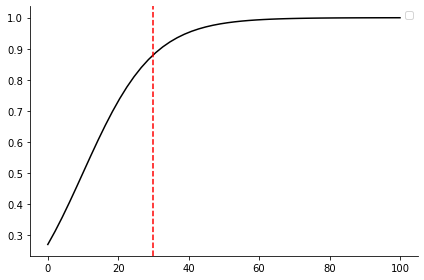

In [1519]:
# trend symmetry J ~ 0-30
x = np.linspace(0,100)
plt.figure(figsize=(10,6))
s = 1/10
a = 10

fig, ax = plt.subplots(1,1,figsize= (6,4))
ax.plot(x,1/(1+np.exp(-s*(x-a))), color='black')
ax.axvline(x=30, color='red', linestyle='dashed')
# figure parameters
#ax.set_xlabel( joint+ ' angle right [deg]'); ax.set_ylabel(joint+ ' angle left [deg]')
#ax.set_xlim([-5,65]); ax.set_ylim([-5,65]); 
#ax.set_title(joint+' angle bilateral cyclogram')
ax.spines[['right', 'top']].set_visible(False); ax.spines[['right', 'top']].set_visible(False); ax.spines[['right', 'top']].set_visible(False)
ax.legend()
fig.tight_layout()
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/08/ly0pjbj57zndk33mmpm99vg40000gn/T/ipykernel_41395/4131010616.py:18: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



<Figure size 720x432 with 0 Axes>

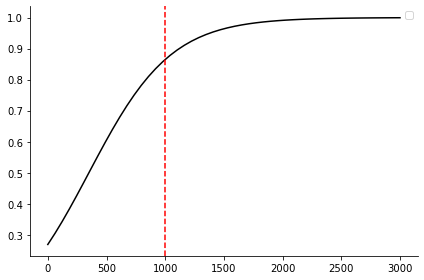

In [1521]:
# area ~1000
x = np.linspace(0,3000)
plt.figure(figsize=(10,6))
s = 1/350
#plt.plot(x, s*x/(1+s*x), label='sx/1+sx')
a = 350

fig, ax = plt.subplots(1,1,figsize= (6,4))
ax.plot(x,1/(1+np.exp(-s*(x-a))), color='black')
ax.axvline(x=1000, color='red', linestyle='dashed')
# figure parameters
#ax.set_xlabel( joint+ ' angle right [deg]'); ax.set_ylabel(joint+ ' angle left [deg]')
#ax.set_xlim([-5,65]); ax.set_ylim([-5,65]); 
#ax.set_title(joint+' angle bilateral cyclogram')
ax.spines[['right', 'top']].set_visible(False); ax.spines[['right', 'top']].set_visible(False); ax.spines[['right', 'top']].set_visible(False)
ax.legend()
fig.tight_layout()
fig.show()

We define the orientation $\theta \in [-5,90]$. We use the min-max normalisation to normalise $\theta$ in [0,1] such as: $\theta_{norm} = \frac{\theta+5}{95}\$.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


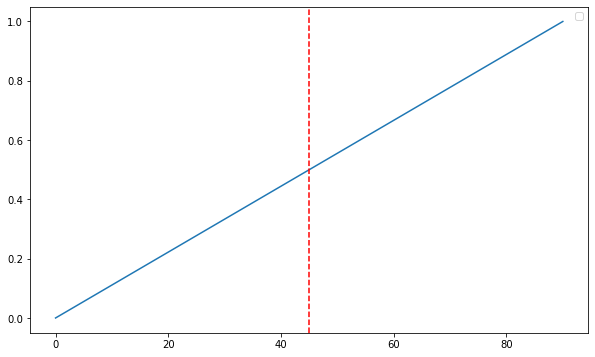

In [1301]:
# angle
x = np.linspace(0,90)
plt.figure(figsize=(10,6))
plt.plot(x,x/90)
plt.axvline(x=45, color='red', linestyle='dashed')
plt.legend()

Below an example of the asymmetry score computed for an AB control at the ankle joint. The area $S$, orientation (angle) $\theta$ and trend symmetry (ratio) $J$ are displayed along with the asymmetry score.

Area: 34.09
Angle: 45.43
Ratio: 0.37%


/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:522: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



1.8635552312113783

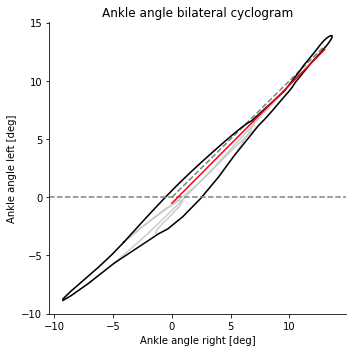

In [2455]:
bilateral_cyclograms_AB(angles_AB03, '03', 'Ankle', plot=True)

Below an example of the asymmetry score computed for an iSCI participant at the nee joint. The area $S$, orientation (angle) $\theta$ and trend symmetry (ratio) $J$ are displayed along with the asymmetry score.

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:207: RuntimeWarning:

Mean of empty slice

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:208: RuntimeWarning:

Mean of empty slice

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Knee
Area: 485.54
Angle: 51.0
Ratio: 1.55%


/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:302: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



29.38888516078471

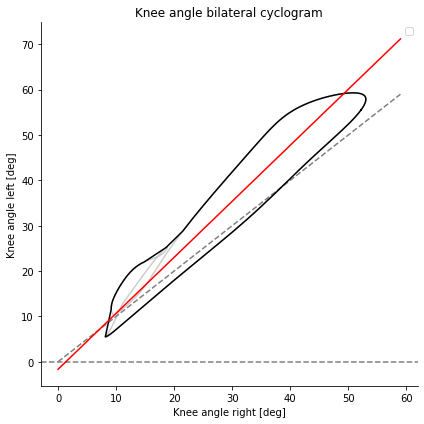

In [576]:
bilateral_cyclograms_single_trial(angles_102_F4[0][1], trajectories_102_F4[0][1], "BO2ST_102", 'Knee', plot=True)

compute asymmetry score @ hip, knee, ankle at initial self-selected speed

In [568]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
trajectories_F1 = [trajectories_101_F1, trajectories_102_F1, trajectories_103_F1, trajectories_104_F1, trajectories_105_F1, trajectories_106_F1]
trajectories_F4 = [trajectories_101_F4, trajectories_102_F4, trajectories_103_F4, trajectories_104_F4, trajectories_105_F4, trajectories_106_F4, trajectories_109_F4]
trajectories_F8 = [trajectories_101_F8, trajectories_102_F8, trajectories_103_F8, trajectories_104_F8, trajectories_105_F8, trajectories_106_F8, trajectories_109_F8]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0, angles_109_T0]
angles_T1 = [angles_101_T1, angles_102_T1, angles_103_T1, angles_104_T1, angles_105_T1, angles_106_T1, angles_109_T1]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2, angles_109_T2]
angles_F1 = [angles_101_F1, angles_102_F1, angles_103_F1, angles_104_F1, angles_105_F1, angles_106_F1]
angles_F4 = [angles_101_F4, angles_102_F4, angles_103_F4, angles_104_F4, angles_105_F4, angles_106_F4, angles_109_F4]
angles_F8 = [angles_101_F8, angles_102_F8, angles_103_F8, angles_104_F8, angles_105_F8, angles_106_F8, angles_109_F8]

# compute A score for all participants
A_hip_BL = []; A_hip_T0 = []; A_hip_T1 = []; A_hip_T2 = []; A_hip_F1 = []; A_hip_F4 = []; A_hip_F8 = []
A_knee_BL = []; A_knee_T0 = []; A_knee_T1 = []; A_knee_T2 = []; A_knee_F1 = []; A_knee_F4 = []; A_knee_F8 = []
A_ankle_BL = []; A_ankle_T0 = []; A_ankle_T1 = []; A_ankle_T2 = []; A_ankle_F1 = []; A_ankle_F4 = []; A_ankle_F8 = []

for i in range(len(IDs)):
    A_hip_BL_i, A_knee_BL_i, A_ankle_BL_i = compute_asymmetry_ss_speed_three_trials(trajectories_BL[i], angles_BL[i], IDs[i])
    A_hip_T0_i, A_knee_T0_i, A_ankle_T0_i = compute_asymmetry_ss_speed_three_trials(trajectories_T0[i], angles_T0[i], IDs[i])
    A_hip_T1_i, A_knee_T1_i, A_ankle_T1_i = compute_asymmetry_ss_speed_three_trials(trajectories_T1[i], angles_T1[i], IDs[i])
    A_hip_T2_i, A_knee_T2_i, A_ankle_T2_i = compute_asymmetry_ss_speed_three_trials(trajectories_T2[i], angles_T2[i], IDs[i])
    if (IDs[i]!="BO2ST_109"):
        A_hip_F1_i, A_knee_F1_i, A_ankle_F1_i = compute_asymmetry_ss_speed_three_trials(trajectories_F1[i], angles_F1[i], IDs[i])
    A_hip_F4_i, A_knee_F4_i, A_ankle_F4_i = compute_asymmetry_ss_speed_three_trials(trajectories_F4[i], angles_F4[i], IDs[i])
    A_hip_F8_i, A_knee_F8_i, A_ankle_F8_i = compute_asymmetry_ss_speed_three_trials(trajectories_F8[i], angles_F8[i], IDs[i])
    A_hip_BL.append(A_hip_BL_i); A_knee_BL.append(A_knee_BL_i); A_ankle_BL.append(A_ankle_BL_i) 
    A_hip_T0.append(A_hip_T0_i); A_knee_T0.append(A_knee_T0_i); A_ankle_T0.append(A_ankle_T0_i)
    A_hip_T1.append(A_hip_T1_i); A_knee_T1.append(A_knee_T1_i); A_ankle_T1.append(A_ankle_T1_i)
    A_hip_T2.append(A_hip_T2_i); A_knee_T2.append(A_knee_T2_i); A_ankle_T2.append(A_ankle_T2_i)
    if (IDs[i]!="BO2ST_109"):
        A_hip_F1.append(A_hip_F1_i); A_knee_F1.append(A_knee_F1_i); A_ankle_F1.append(A_ankle_F1_i)
    else:
        A_hip_F1.append(np.nan); A_knee_F1.append(np.nan); A_ankle_F1.append(np.nan)
    A_hip_F4.append(A_hip_F4_i); A_knee_F4.append(A_knee_F4_i); A_ankle_F4.append(A_ankle_F4_i)
    A_hip_F8.append(A_hip_F8_i); A_knee_F8.append(A_knee_F8_i); A_ankle_F8.append(A_ankle_F8_i)
    
    
# write the A scores in xcl file
A_scores = pd.DataFrame([[A_hip_BL[0], A_hip_T0[0], A_hip_T1[0], A_hip_T2[0], A_hip_F1[0], A_hip_F4[0], A_hip_F8[0], A_knee_BL[0], A_knee_T0[0], A_knee_T1[0], A_knee_T2[0], A_knee_F1[0], A_knee_F4[0], A_knee_F8[0], A_ankle_BL[0], A_ankle_T0[0], A_ankle_T1[0], A_ankle_T2[0], A_ankle_F1[0], A_ankle_F4[0], A_ankle_F8[0]],
                         [A_hip_BL[1], A_hip_T0[1], A_hip_T1[1], A_hip_T2[1], A_hip_F1[1], A_hip_F4[1], A_hip_F8[1], A_knee_BL[1], A_knee_T0[1], A_knee_T1[1], A_knee_T2[1], A_knee_F1[1], A_knee_F4[1], A_knee_F8[1], A_ankle_BL[1], A_ankle_T0[1], A_ankle_T1[1], A_ankle_T2[1], A_ankle_F1[1], A_ankle_F4[1], A_ankle_F8[1]],
                         [A_hip_BL[2], A_hip_T0[2], A_hip_T1[2], A_hip_T2[2], A_hip_F1[2], A_hip_F4[2], A_hip_F8[2], A_knee_BL[2], A_knee_T0[2], A_knee_T1[2], A_knee_T2[2], A_knee_F1[2], A_knee_F4[2], A_knee_F8[2], A_ankle_BL[2], A_ankle_T0[2], A_ankle_T1[2], A_ankle_T2[2], A_ankle_F1[2], A_ankle_F4[2], A_ankle_F8[2]],
                         [A_hip_BL[3], A_hip_T0[3], A_hip_T1[3], A_hip_T2[3], A_hip_F1[3], A_hip_F4[3], A_hip_F8[3], A_knee_BL[3], A_knee_T0[3], A_knee_T1[3], A_knee_T2[3], A_knee_F1[3], A_knee_F4[3], A_knee_F8[3], A_ankle_BL[3], A_ankle_T0[3], A_ankle_T1[3], A_ankle_T2[3], A_ankle_F1[3], A_ankle_F4[3], A_ankle_F8[3]],
                         [A_hip_BL[4], A_hip_T0[4], A_hip_T1[4], A_hip_T2[4], A_hip_F1[4], A_hip_F4[4], A_hip_F8[4], A_knee_BL[4], A_knee_T0[4], A_knee_T1[4], A_knee_T2[4], A_knee_F1[4], A_knee_F4[4], A_knee_F8[4], A_ankle_BL[4], A_ankle_T0[4], A_ankle_T1[4], A_ankle_T2[4], A_ankle_F1[4], A_ankle_F4[4], A_ankle_F8[4]],
                         [A_hip_BL[5], A_hip_T0[5], A_hip_T1[5], A_hip_T2[5], A_hip_F1[5], A_hip_F4[5], A_hip_F8[5], A_knee_BL[5], A_knee_T0[5], A_knee_T1[5], A_knee_T2[5], A_knee_F1[5], A_knee_F4[5], A_knee_F8[5], A_ankle_BL[5], A_ankle_T0[5], A_ankle_T1[5], A_ankle_T2[5], A_ankle_F1[5], A_ankle_F4[5], A_ankle_F8[5]],
                         [A_hip_BL[6], A_hip_T0[6], A_hip_T1[6], A_hip_T2[6], A_hip_F1[6], A_hip_F4[6], A_hip_F8[6], A_knee_BL[6], A_knee_T0[6], A_knee_T1[6], A_knee_T2[6], A_knee_F1[6], A_knee_F4[6], A_knee_F8[6], A_ankle_BL[6], A_ankle_T0[6], A_ankle_T1[6], A_ankle_T2[6], A_ankle_F1[6], A_ankle_F4[6], A_ankle_F8[6]]],
                  index=IDs, columns=['A_hip_BL', 'A_hip_T0', 'A_hip_T1', 'A_hip_T2', 'A_hip_F1', 'A_hip_F4', 'A_hip_F8', 'A_knee_BL', 'A_knee_T0', 'A_knee_T1', 'A_knee_T2', 'A_knee_F1', 'A_knee_F4', 'A_knee_F8', 'A_ankle_BL', 'A_ankle_T0', 'A_ankle_T1', 'A_ankle_T2', 'A_ankle_F1', 'A_ankle_F4', 'A_ankle_F8'])                          
A_scores.to_excel('BO2STTrial/A_scores.xlsx') 


/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:207: RuntimeWarning:

Mean of empty slice

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:208: RuntimeWarning:

Mean of empty slice



compute asymmetry score @ hip, knee, ankle at new self-selected speed

In [2583]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
trajectories_T1_new_ss = [trajectories_101_T1_new_ss, trajectories_102_T1_new_ss, trajectories_103_T1_new_ss, trajectories_104_T1_new_ss, trajectories_105_T1_new_ss, trajectories_106_T1_new_ss, trajectories_109_T1_new_ss]
trajectories_T2_new_ss = [trajectories_101_T2_new_ss, trajectories_102_T2_new_ss, trajectories_103_T2_new_ss, trajectories_104_T2_new_ss, trajectories_105_T2_new_ss, trajectories_106_T2_new_ss, trajectories_109_T2_new_ss]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0_new_ss = [angles_101_T0, angles_102_T0_new_ss, angles_103_T0_new_ss, angles_104_T0_new_ss, angles_105_T0_new_ss, angles_106_T0_new_ss, angles_109_T0_new_ss]
angles_T1_new_ss = [angles_101_T1_new_ss, angles_102_T1_new_ss, angles_103_T1_new_ss, angles_104_T1_new_ss, angles_105_T1_new_ss, angles_106_T1_new_ss, angles_109_T1_new_ss]
angles_T2_new_ss = [angles_101_T2_new_ss, angles_102_T2_new_ss, angles_103_T2_new_ss, angles_104_T2_new_ss, angles_105_T2_new_ss, angles_106_T2_new_ss, angles_109_T2_new_ss]

# compute A score for all participants
A_hip_BL = []; A_hip_T0 = []; A_hip_T1 = []; A_hip_T2 = []
A_knee_BL = []; A_knee_T0 = []; A_knee_T1 = []; A_knee_T2 = []
A_ankle_BL = []; A_ankle_T0 = []; A_ankle_T1 = []; A_ankle_T2 = []

for i in range(len(IDs)):
    print(IDs[i])
    A_hip_BL_i, A_knee_BL_i, A_ankle_BL_i = compute_asymmetry_ss_speed_three_trials(trajectories_BL[i], angles_BL[i], IDs[i])
    if (i==0):
        A_hip_T0_i, A_knee_T0_i, A_ankle_T0_i = compute_asymmetry_ss_speed_three_trials(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], new_ss = False, T0 = True)
    else:
        A_hip_T0_i, A_knee_T0_i, A_ankle_T0_i = compute_asymmetry_ss_speed_three_trials(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], new_ss = True, T0 = True)
    A_hip_T1_i, A_knee_T1_i, A_ankle_T1_i = compute_asymmetry_ss_speed_three_trials(trajectories_T1_new_ss[i], angles_T1_new_ss[i], IDs[i], new_ss = True, T1 = True)
    A_hip_T2_i, A_knee_T2_i, A_ankle_T2_i = compute_asymmetry_ss_speed_three_trials(trajectories_T2_new_ss[i], angles_T2_new_ss[i], IDs[i], new_ss = True, T2 = True)
    A_hip_BL.append(A_hip_BL_i); A_knee_BL.append(A_knee_BL_i); A_ankle_BL.append(A_ankle_BL_i) 
    A_hip_T0.append(A_hip_T0_i); A_knee_T0.append(A_knee_T0_i); A_ankle_T0.append(A_ankle_T0_i)
    A_hip_T1.append(A_hip_T1_i); A_knee_T1.append(A_knee_T1_i); A_ankle_T1.append(A_ankle_T1_i)
    A_hip_T2.append(A_hip_T2_i); A_knee_T2.append(A_knee_T2_i); A_ankle_T2.append(A_ankle_T2_i)
    
    
# write the A scores in xcl file
A_scores_new_ss = pd.DataFrame([[A_hip_BL[0], A_hip_T0[0], A_hip_T1[0], A_hip_T2[0], A_knee_BL[0], A_knee_T0[0], A_knee_T1[0], A_knee_T2[0], A_ankle_BL[0], A_ankle_T0[0], A_ankle_T1[0], A_ankle_T2[0]],
                         [A_hip_BL[1], A_hip_T0[1], A_hip_T1[1], A_hip_T2[1], A_knee_BL[1], A_knee_T0[1], A_knee_T1[1], A_knee_T2[1], A_ankle_BL[1], A_ankle_T0[1], A_ankle_T1[1], A_ankle_T2[1]],
                         [A_hip_BL[2], A_hip_T0[2], A_hip_T1[2], A_hip_T2[2], A_knee_BL[2], A_knee_T0[2], A_knee_T1[2], A_knee_T2[2], A_ankle_BL[2], A_ankle_T0[2], A_ankle_T1[2], A_ankle_T2[2]],
                         [A_hip_BL[3], A_hip_T0[3], A_hip_T1[3], A_hip_T2[3], A_knee_BL[3], A_knee_T0[3], A_knee_T1[3], A_knee_T2[3], A_ankle_BL[3], A_ankle_T0[3], A_ankle_T1[3], A_ankle_T2[3]],
                         [A_hip_BL[4], A_hip_T0[4], A_hip_T1[4], A_hip_T2[4], A_knee_BL[4], A_knee_T0[4], A_knee_T1[4], A_knee_T2[4], A_ankle_BL[4], A_ankle_T0[4], A_ankle_T1[4], A_ankle_T2[4]],
                         [A_hip_BL[5], A_hip_T0[5], A_hip_T1[5], A_hip_T2[5], A_knee_BL[5], A_knee_T0[5], A_knee_T1[5], A_knee_T2[5], A_ankle_BL[5], A_ankle_T0[5], A_ankle_T1[5], A_ankle_T2[5]],
                         [A_hip_BL[6], A_hip_T0[6], A_hip_T1[6], A_hip_T2[6], A_knee_BL[6], A_knee_T0[6], A_knee_T1[6], A_knee_T2[6], A_ankle_BL[6], A_ankle_T0[6], A_ankle_T1[6], A_ankle_T2[6]]],
                  index=IDs, columns=['A_hip_BL', 'A_hip_T0', 'A_hip_T1', 'A_hip_T2', 'A_knee_BL', 'A_knee_T0', 'A_knee_T1', 'A_knee_T2', 'A_ankle_BL', 'A_ankle_T0', 'A_ankle_T1', 'A_ankle_T2'])                          
A_scores_new_ss.to_excel('BO2STTrial/A_scores_new_ss.xlsx') 


BO2ST_101
BO2ST_102
BO2ST_103
BO2ST_104
BO2ST_105
BO2ST_106
BO2ST_109


compute asymmetry score @ hip, knee, ankle for AB controls

In [475]:
IDs_AB = ["AB03", "AB11", "AB21", "AB38", "AB42"]
numbers_AB = ['03', '11', '21', '38', '42']
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

# compute A score for all controls
A_hip_BL = []; A_hip_T0 = []; A_hip_T1 = []; A_hip_T2 = []; A_hip_F1 = []; A_hip_F4 = []; A_hip_F8 = []
A_knee_BL = []; A_knee_T0 = []; A_knee_T1 = []; A_knee_T2 = []; A_knee_F1 = []; A_knee_F4 = []; A_knee_F8 = []
A_ankle_BL = []; A_ankle_T0 = []; A_ankle_T1 = []; A_ankle_T2 = []; A_ankle_F1 = []; A_ankle_F4 = []; A_ankle_F8 = []

for i in range(len(IDs_AB)):
    print(IDs_AB[i])
    A_hip_BL_i, A_knee_BL_i, A_ankle_BL_i = compute_asymmetry_ss_speed_AB(angles_AB[i], numbers_AB[i])
    A_hip_BL.append(A_hip_BL_i); A_knee_BL.append(A_knee_BL_i); A_ankle_BL.append(A_ankle_BL_i) 
    A_hip_T0.append(A_hip_BL_i); A_knee_T0.append(A_knee_BL_i); A_ankle_T0.append(A_ankle_BL_i)
    A_hip_T1.append(A_hip_BL_i); A_knee_T1.append(A_knee_BL_i); A_ankle_T1.append(A_ankle_BL_i)
    A_hip_T2.append(A_hip_BL_i); A_knee_T2.append(A_knee_BL_i); A_ankle_T2.append(A_ankle_BL_i)
    A_hip_F1.append(A_hip_BL_i); A_knee_F1.append(A_knee_BL_i); A_ankle_F1.append(A_ankle_BL_i)
    A_hip_F4.append(A_hip_BL_i); A_knee_F4.append(A_knee_BL_i); A_ankle_F4.append(A_ankle_BL_i)
    A_hip_F8.append(A_hip_BL_i); A_knee_F8.append(A_knee_BL_i); A_ankle_F8.append(A_ankle_BL_i)
    
    
# write the A scores in xcl file
A_scores_AB = pd.DataFrame([[A_hip_BL[0], A_hip_T0[0], A_hip_T1[0], A_hip_T2[0], A_hip_F1[0], A_hip_F4[0], A_hip_F8[0], A_knee_BL[0], A_knee_T0[0], A_knee_T1[0], A_knee_T2[0], A_knee_F1[0], A_knee_F4[0], A_knee_F8[0], A_ankle_BL[0], A_ankle_T0[0], A_ankle_T1[0], A_ankle_T2[0], A_ankle_F1[0], A_ankle_F4[0], A_ankle_F8[0]],
                            [A_hip_BL[1], A_hip_T0[1], A_hip_T1[1], A_hip_T2[1], A_hip_F1[1], A_hip_F4[1], A_hip_F8[1], A_knee_BL[1], A_knee_T0[1], A_knee_T1[1], A_knee_T2[1], A_knee_F1[1], A_knee_F4[1], A_knee_F8[1], A_ankle_BL[1], A_ankle_T0[1], A_ankle_T1[1], A_ankle_T2[1], A_ankle_F1[1], A_ankle_F4[1], A_ankle_F8[1]],
                            [A_hip_BL[2], A_hip_T0[2], A_hip_T1[2], A_hip_T2[2], A_hip_F1[2], A_hip_F4[2], A_hip_F8[2], A_knee_BL[2], A_knee_T0[2], A_knee_T1[2], A_knee_T2[2], A_knee_F1[2], A_knee_F4[2], A_knee_F8[2], A_ankle_BL[2], A_ankle_T0[2], A_ankle_T1[2], A_ankle_T2[2], A_ankle_F1[2], A_ankle_F4[2], A_ankle_F8[2]],
                            [A_hip_BL[3], A_hip_T0[3], A_hip_T1[3], A_hip_T2[3], A_hip_F1[3], A_hip_F4[3], A_hip_F8[3], A_knee_BL[3], A_knee_T0[3], A_knee_T1[3], A_knee_T2[3], A_knee_F1[3], A_knee_F4[3], A_knee_F8[3], A_ankle_BL[3], A_ankle_T0[3], A_ankle_T1[3], A_ankle_T2[3], A_ankle_F1[3], A_ankle_F4[3], A_ankle_F8[3]],
                            [A_hip_BL[4], A_hip_T0[4], A_hip_T1[4], A_hip_T2[4], A_hip_F1[4], A_hip_F4[4], A_hip_F8[4], A_knee_BL[4], A_knee_T0[4], A_knee_T1[4], A_knee_T2[4], A_knee_F1[4], A_knee_F4[4], A_knee_F8[4], A_ankle_BL[4], A_ankle_T0[4], A_ankle_T1[4], A_ankle_T2[4], A_ankle_F1[4], A_ankle_F4[4], A_ankle_F8[4]]],
                  index=IDs_AB, columns=['A_hip_BL', 'A_hip_T0', 'A_hip_T1', 'A_hip_T2', 'A_hip_F1', 'A_hip_F4', 'A_hip_F8', 'A_knee_BL', 'A_knee_T0', 'A_knee_T1', 'A_knee_T2', 'A_knee_F1', 'A_knee_F4', 'A_knee_F8', 'A_ankle_BL', 'A_ankle_T0', 'A_ankle_T1', 'A_ankle_T2', 'A_ankle_F1', 'A_ankle_F4', 'A_ankle_F8'])                          
A_scores_AB.to_excel('BO2STTrial/A_scores_AB.xlsx') 


AB03
AB11
AB21
AB38
AB42


plot

In [2615]:
# read xcl files
A_scores_file_name = ("BO2STTrial/A_scores.xlsx")
A_scores_xcl = pd.read_excel(A_scores_file_name, header = [0], index_col = [0])
A_scores_new_ss_file_name = ("BO2STTrial/A_scores_new_ss.xlsx")
A_scores_new_ss_xcl = pd.read_excel(A_scores_new_ss_file_name, header = [0], index_col = [0])
A_scores_AB_file_name = ("BO2STTrial/A_scores_AB.xlsx")
A_scores_AB_xcl = pd.read_excel(A_scores_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_105"
ID_AB = control_xcl.loc[ID].Matched_control
print(ID_AB)
x = ['BL', 'T0', 'T1', 'T2']
A_hip_y = A_scores_xcl.loc[ID][['A_hip_BL', 'A_hip_T0', 'A_hip_T1', 'A_hip_T2']] # relative to T0?
A_hip_y_new_ss = A_scores_new_ss_xcl.loc[ID][['A_hip_BL', 'A_hip_T0', 'A_hip_T1', 'A_hip_T2']] # relative to T0?
A_hip_y_AB = A_scores_AB_xcl.loc[ID_AB][['A_hip_BL', 'A_hip_T0', 'A_hip_T1', 'A_hip_T2']] # relative to T0?
A_knee_y = A_scores_xcl.loc[ID][['A_knee_BL', 'A_knee_T0', 'A_knee_T1', 'A_knee_T2']] # relative to T0?
A_knee_y_new_ss = A_scores_new_ss_xcl.loc[ID][['A_knee_BL', 'A_knee_T0', 'A_knee_T1', 'A_knee_T2']] # relative to T0?
A_knee_y_AB = A_scores_AB_xcl.loc[ID_AB][['A_knee_BL', 'A_knee_T0', 'A_knee_T1', 'A_knee_T2']] # relative to T0?
A_ankle_y = A_scores_xcl.loc[ID][['A_ankle_BL', 'A_ankle_T0', 'A_ankle_T1', 'A_ankle_T2']] # relative to T0?
A_ankle_y_new_ss = A_scores_new_ss_xcl.loc[ID][['A_ankle_BL', 'A_ankle_T0', 'A_ankle_T1', 'A_ankle_T2']] # relative to T0?
A_ankle_y_AB = A_scores_AB_xcl.loc[ID_AB][['A_ankle_BL', 'A_ankle_T0', 'A_ankle_T1', 'A_ankle_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=3, x_title = 'Time', horizontal_spacing=0.115)

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=A_hip_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=A_hip_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = A_hip_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=A_knee_y, line=dict(color='black')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=A_knee_y_new_ss, line=dict(color='grey')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = A_knee_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=A_ankle_y, line=dict(color='black')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=A_ankle_y_new_ss, line=dict(color='grey')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = A_ankle_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=3)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=1000, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.update_yaxes(title_text="Hip A score [%]", range=[0,90], row=1, col=1)
fig.update_yaxes(title_text="Knee A score [%]", range=[0,90], row=1, col=2)
fig.update_yaxes(title_text="Ankle A score [%]", range=[0,90], row=1, col=3)
fig.show()

AB38


# 5. Relative phase analysis:<a class="anchor" id="sect_5"></a>
[Back to table of contents](#TOC)

NOT INCLUDED IN THE THESIS
***

**Continuous relative phase**

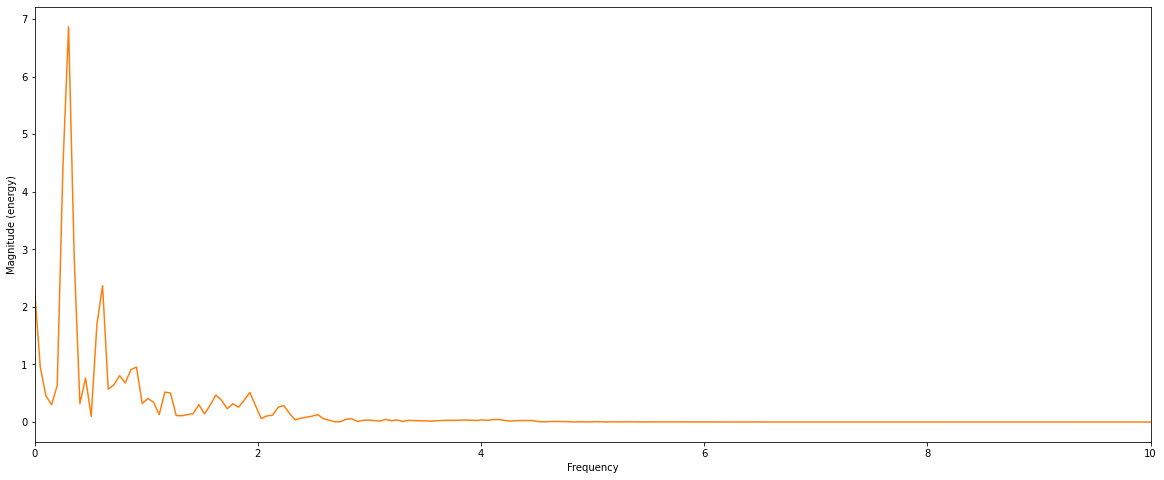

In [8]:
hip_angles_L = angles_101_BL[0][1]['BO2ST_101'+':' + 'L' + 'HipAngles'].X
hip_angles_L_centered = hip_angles_L - np.nanmin(hip_angles_L) - (np.nanmax(hip_angles_L) - np.nanmin(hip_angles_L))/2
hip_angles_L_centered = hip_angles_L_centered.dropna().deg.values

display_frequencies(hip_angles_L_centered, xlim=10)

/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:73: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:78: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:83: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



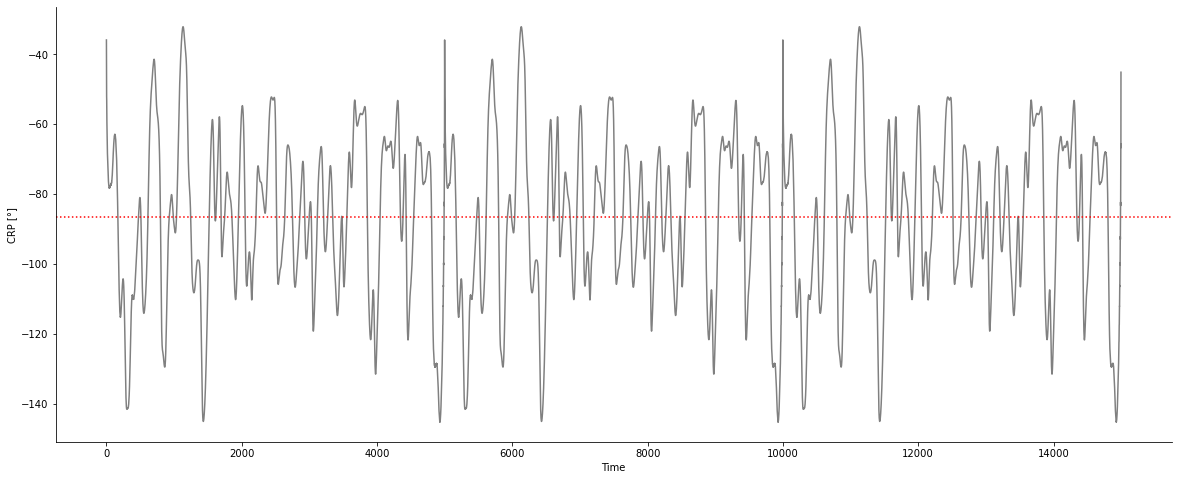

(-86.62588643419453, 23.488552431083367)

In [207]:
compute_CRP_ss_speed_threetrials(angles_103_T0, "BO2ST_103", crp = 'CONTRALATERAL', LA_side = 'R', MA_side = 'L', MA = True, plot=True)


In [210]:
compute_CRP_polar_plot(angles_BL, angles_T0, IDs, crp = 'CONTRALATERAL', title =  "Contralateral shoulder-hip pair for the LA side", LA_sides = LA_sides, MA_sides = MA_sides, MA=False, legend=True)


/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:68: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:73: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:78: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

/Users/camillefrayssinhes/INSPIRE LAB/src/CRP.py:83: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



           ID        CRP Time  R    S
0   BO2ST_101  36.406222   BL  1  2.0
1   BO2ST_101  52.236657   T0  2  2.0
2   BO2ST_102  22.925314   BL  1  2.0
3   BO2ST_102  19.465854   T0  2  2.0
4   BO2ST_103 -48.165534   BL  1  2.0
5   BO2ST_103 -41.030233   T0  2  2.0
6   BO2ST_104 -15.165602   BL  1  2.0
7   BO2ST_104 -79.899886   T0  2  2.0
8   BO2ST_105  26.126438   BL  1  2.0
9   BO2ST_105   4.988610   T0  2  2.0
10  BO2ST_106 -45.927941   BL  1  2.0
11  BO2ST_106 -45.510230   T0  2  2.0


**Discrete relative phase**

In [452]:
RP_102_BL = compute_relative_phase(trajectories_102_BL, angles_102_BL, 'BO2ST_102', 'R', 50, False)
RP_103_BL = compute_relative_phase(trajectories_103_BL, angles_103_BL, 'BO2ST_103', 'L', 50, False)
RP_105_BL = compute_relative_phase(trajectories_105_BL, angles_105_BL, 'BO2ST_105', 'L', 40, False)
RP_106_BL = compute_relative_phase(trajectories_106_BL, angles_106_BL, 'BO2ST_106', 'L', 40, False)
RP_102_T0 = compute_relative_phase(trajectories_102_T0, angles_102_T0, 'BO2ST_102', 'R', 50, False)
RP_103_T0 = compute_relative_phase(trajectories_103_T0, angles_103_T0, 'BO2ST_103', 'L', 50, False)
RP_105_T0 = compute_relative_phase(trajectories_105_T0, angles_105_T0, 'BO2ST_105', 'L', 40, False)
RP_106_T0 = compute_relative_phase(trajectories_106_T0, angles_106_T0, 'BO2ST_106', 'L', 40, False)

In [453]:
df_CRP_102_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_102_BL)):
    df_CRP_102_BL.loc[len(df_CRP_102_BL)] = [RP_102_BL[i], 1, 2.0]
    
df_CRP_103_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_103_BL)):
    df_CRP_103_BL.loc[len(df_CRP_103_BL)] = [RP_103_BL[i], 1, 2.0]
    
df_CRP_105_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_105_BL)):
    df_CRP_105_BL.loc[len(df_CRP_105_BL)] = [RP_105_BL[i], 1, 2.0]
    
df_CRP_106_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_106_T0)):
    df_CRP_106_T0.loc[len(df_CRP_106_T0)] = [RP_106_T0[i], 1, 2.0]    

df_CRP_102_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_102_T0)):
    df_CRP_102_T0.loc[len(df_CRP_102_T0)] = [RP_102_T0[i], 1.2, 2.0]
    
df_CRP_103_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_103_T0)):
    df_CRP_103_T0.loc[len(df_CRP_103_T0)] = [RP_103_T0[i], 1.2, 2.0]
    
df_CRP_105_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_105_T0)):
    df_CRP_105_T0.loc[len(df_CRP_105_T0)] = [RP_105_T0[i], 1.2, 2.0]
    
df_CRP_106_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_106_T0)):
    df_CRP_106_T0.loc[len(df_CRP_106_T0)] = [RP_106_T0[i], 1.2, 2.0]        

In [454]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolargl(
    name="BO2ST_102", theta=df_CRP_102_BL["Phi"], r=df_CRP_102_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 1, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_102", theta=df_CRP_102_T0["Phi"], r=df_CRP_102_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 1, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_103", theta=df_CRP_103_BL["Phi"], r=df_CRP_103_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 1, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_103", theta=df_CRP_103_T0["Phi"], r=df_CRP_103_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 1, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_105", theta=df_CRP_105_BL["Phi"], r=df_CRP_105_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 2, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_105", theta=df_CRP_105_T0["Phi"], r=df_CRP_105_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 2, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_106", theta=df_CRP_106_BL["Phi"], r=df_CRP_106_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 2, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_106", theta=df_CRP_106_T0["Phi"], r=df_CRP_106_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 2, 2)

fig.update_layout(
    height=600, width=800, title_text="Ipsilateral shoulder-hip relative phase for the most affected side",         
    polar = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    ),
    polar2 = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    ),
    polar3 = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    ),
    polar4 = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    )
)

fig.show()

In [456]:
RP_102_BL = compute_relative_phase(trajectories_102_BL, angles_102_BL, 'BO2ST_102', 'L', 50, False)
RP_103_BL = compute_relative_phase(trajectories_103_BL, angles_103_BL, 'BO2ST_103', 'R', 50, False)
RP_105_BL = compute_relative_phase(trajectories_105_BL, angles_105_BL, 'BO2ST_105', 'R', 40, False)
RP_106_BL = compute_relative_phase(trajectories_106_BL, angles_106_BL, 'BO2ST_106', 'R', 40, False)
RP_102_T0 = compute_relative_phase(trajectories_102_T0, angles_102_T0, 'BO2ST_102', 'L', 50, False)
RP_103_T0 = compute_relative_phase(trajectories_103_T0, angles_103_T0, 'BO2ST_103', 'R', 50, False)
RP_105_T0 = compute_relative_phase(trajectories_105_T0, angles_105_T0, 'BO2ST_105', 'R', 40, False)
RP_106_T0 = compute_relative_phase(trajectories_106_T0, angles_106_T0, 'BO2ST_106', 'R', 40, False)

df_CRP_102_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_102_BL)):
    df_CRP_102_BL.loc[len(df_CRP_102_BL)] = [RP_102_BL[i], 1, 2.0]
    
df_CRP_103_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_103_BL)):
    df_CRP_103_BL.loc[len(df_CRP_103_BL)] = [RP_103_BL[i], 1, 2.0]
    
df_CRP_105_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_105_BL)):
    df_CRP_105_BL.loc[len(df_CRP_105_BL)] = [RP_105_BL[i], 1, 2.0]
    
df_CRP_106_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_106_T0)):
    df_CRP_106_T0.loc[len(df_CRP_106_T0)] = [RP_106_T0[i], 1, 2.0]    

df_CRP_102_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_102_T0)):
    df_CRP_102_T0.loc[len(df_CRP_102_T0)] = [RP_102_T0[i], 1.2, 2.0]
    
df_CRP_103_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_103_T0)):
    df_CRP_103_T0.loc[len(df_CRP_103_T0)] = [RP_103_T0[i], 1.2, 2.0]
    
df_CRP_105_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_105_T0)):
    df_CRP_105_T0.loc[len(df_CRP_105_T0)] = [RP_105_T0[i], 1.2, 2.0]
    
df_CRP_106_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_106_T0)):
    df_CRP_106_T0.loc[len(df_CRP_106_T0)] = [RP_106_T0[i], 1.2, 2.0]  
    
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolargl(
    name="BO2ST_102", theta=df_CRP_102_BL["Phi"], r=df_CRP_102_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 1, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_102", theta=df_CRP_102_T0["Phi"], r=df_CRP_102_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 1, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_103", theta=df_CRP_103_BL["Phi"], r=df_CRP_103_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 1, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_103", theta=df_CRP_103_T0["Phi"], r=df_CRP_103_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 1, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_105", theta=df_CRP_105_BL["Phi"], r=df_CRP_105_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 2, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_105", theta=df_CRP_105_T0["Phi"], r=df_CRP_105_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 2, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_106", theta=df_CRP_106_BL["Phi"], r=df_CRP_106_BL['R'], mode='markers', marker=dict(size=6, color="black"),
    ), 2, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_106", theta=df_CRP_106_T0["Phi"], r=df_CRP_106_T0['R'], mode='markers', marker=dict(size=6, color="grey"),
    ), 2, 2)

fig.update_layout(
    height=600, width=800, title_text="Ipsilateral shoulder-hip relative phase for the less affected side",         
    polar = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    ),
    polar2 = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    ),
    polar3 = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    ),
    polar4 = dict(
      radialaxis = dict(visible = False, range = [0, 2])
    )
)

fig.show()    

In [45]:
#BL
RP_101_contra_BL, std_101_contra_BL = compute_relative_phase_contralateral(trajectories_101_BL, angles_101_BL, 'BO2ST_101', 'L', 'R', 40, BL = True, plot = False)
RP_102_contra_BL, std_102_contra_BL = compute_relative_phase_contralateral(trajectories_102_BL, angles_102_BL, 'BO2ST_102', 'R', 'L', 50, BL = True, plot = False)
RP_103_contra_BL, std_103_contra_BL = compute_relative_phase_contralateral(trajectories_103_BL, angles_103_BL, 'BO2ST_103', 'L', 'R', 50, BL = True, plot = False)
RP_104_contra_BL, std_104_contra_BL = compute_relative_phase_contralateral(trajectories_104_BL, angles_104_BL, 'BO2ST_104', 'R', 'L', 70, BL = True, plot = False)
RP_105_contra_BL, std_105_contra_BL = compute_relative_phase_contralateral(trajectories_105_BL, angles_105_BL, 'BO2ST_105', 'L', 'R', 60, BL = True, plot = False)
RP_106_contra_BL, std_106_contra_BL = compute_relative_phase_contralateral(trajectories_106_BL, angles_106_BL, 'BO2ST_106', 'L', 'R', 60, BL = True, plot = False)
#T0
RP_101_contra_T0, std_101_contra_T0 = compute_relative_phase_contralateral(trajectories_101_T0, angles_101_T0, 'BO2ST_101', 'L', 'R', 90, BL = False, plot = False)
RP_102_contra_T0, std_102_contra_T0 = compute_relative_phase_contralateral(trajectories_102_T0, angles_102_T0, 'BO2ST_102', 'R', 'L', 50, BL = False, plot = False)
RP_103_contra_T0, std_103_contra_T0 = compute_relative_phase_contralateral(trajectories_103_T0, angles_103_T0, 'BO2ST_103', 'L', 'R', 50, BL = False, plot = False)
RP_104_contra_T0, std_104_contra_T0 = compute_relative_phase_contralateral(trajectories_104_T0, angles_104_T0, 'BO2ST_104', 'R', 'L', 70, BL = False, plot = False)
RP_105_contra_T0, std_105_contra_T0 = compute_relative_phase_contralateral(trajectories_105_T0, angles_105_T0, 'BO2ST_105', 'L', 'R', 60, BL = False, plot = False)
RP_106_contra_T0, std_106_contra_T0 = compute_relative_phase_contralateral(trajectories_106_T0, angles_106_T0, 'BO2ST_106', 'L', 'R', 60, BL = False, plot = False)

df_CRP_101_contra_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_101_contra_BL)):
    df_CRP_101_contra_BL.loc[len(df_CRP_101_contra_BL)] = [RP_101_contra_BL[i], 1, 2.0]

df_CRP_102_contra_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_102_contra_BL)):
    df_CRP_102_contra_BL.loc[len(df_CRP_102_contra_BL)] = [RP_102_contra_BL[i], 1, 2.0]
    
df_CRP_103_contra_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_103_contra_BL)):
    df_CRP_103_contra_BL.loc[len(df_CRP_103_contra_BL)] = [RP_103_contra_BL[i], 1, 2.0]
    
df_CRP_104_contra_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_104_contra_BL)):
    df_CRP_104_contra_BL.loc[len(df_CRP_104_contra_BL)] = [RP_104_contra_BL[i], 1, 2.0]    
    
df_CRP_105_contra_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_105_contra_BL)):
    df_CRP_105_contra_BL.loc[len(df_CRP_105_contra_BL)] = [RP_105_contra_BL[i], 1, 2.0]
    
df_CRP_106_contra_BL = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_106_contra_BL)):
    df_CRP_106_contra_BL.loc[len(df_CRP_106_contra_BL)] = [RP_106_contra_BL[i], 1, 2.0]  
    
df_CRP_101_contra_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_101_contra_T0)):
    df_CRP_101_contra_T0.loc[len(df_CRP_101_contra_T0)] = [RP_101_contra_T0[i], 1.2, 2.0]
    
    df_CRP_102_contra_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_102_contra_T0)):
    df_CRP_102_contra_T0.loc[len(df_CRP_102_contra_T0)] = [RP_102_contra_T0[i], 1.2, 2.0]
    
df_CRP_103_contra_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_103_contra_T0)):
    df_CRP_103_contra_T0.loc[len(df_CRP_103_contra_T0)] = [RP_103_contra_T0[i], 1.2, 2.0]
    
df_CRP_104_contra_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_104_contra_T0)):
    df_CRP_104_contra_T0.loc[len(df_CRP_104_contra_T0)] = [RP_104_contra_T0[i], 1.2, 2.0]     
    
df_CRP_105_contra_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_105_contra_T0)):
    df_CRP_105_contra_T0.loc[len(df_CRP_105_contra_T0)] = [RP_105_contra_T0[i], 1.2, 2.0]
    
df_CRP_106_contra_T0 = pd.DataFrame(columns=['Phi', 'R', 'S'])
for i in range(len(RP_106_contra_T0)):
    df_CRP_106_contra_T0.loc[len(df_CRP_106_contra_T0)] = [RP_106_contra_T0[i], 1.2, 2.0]       

    
#plot
fig = make_subplots(rows=2, cols=3, specs=[[{'type': 'polar'}]*3]*2)


fig.add_trace(go.Scatterpolargl(
    name="BO2ST_101", theta=df_CRP_101_contra_BL["Phi"], r=df_CRP_101_contra_BL['R'], marker=dict(size=6, color="#636EFA"), mode="markers",
    ), 1, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_101", theta=df_CRP_101_contra_T0["Phi"], r=df_CRP_101_contra_T0['R'], marker=dict(size=6, color="#EF553B"), mode="markers",
    ), 1, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_102", theta=df_CRP_102_contra_BL["Phi"], r=df_CRP_102_contra_BL['R'], marker=dict(size=6, color="#636EFA"), mode="markers",
    ), 1, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_102", theta=df_CRP_102_contra_T0["Phi"], r=df_CRP_102_contra_T0['R'], marker=dict(size=6, color="#EF553B"), mode="markers",
    ), 1, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_103", theta=df_CRP_103_contra_BL["Phi"], r=df_CRP_103_contra_BL['R'], marker=dict(size=6, color="#636EFA"), mode="markers",
    ), 1, 3)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_103", theta=df_CRP_103_contra_T0["Phi"], r=df_CRP_103_contra_T0['R'], marker=dict(size=6, color="#EF553B"), mode="markers",
    ), 1, 3)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_104", theta=df_CRP_104_contra_BL["Phi"], r=df_CRP_104_contra_BL['R'], marker=dict(size=6, color="#636EFA"), mode="markers",
    ), 2, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_104", theta=df_CRP_104_contra_T0["Phi"], r=df_CRP_104_contra_T0['R'], marker=dict(size=6, color="#EF553B"), mode="markers",
    ), 2, 1)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_105", theta=df_CRP_105_contra_BL["Phi"], r=df_CRP_105_contra_BL['R'], marker=dict(size=6, color="#636EFA"), mode="markers",
    ), 2, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_105", theta=df_CRP_105_contra_T0["Phi"], r=df_CRP_105_contra_T0['R'], marker=dict(size=6, color="#EF553B"), mode="markers",
    ), 2, 2)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_106", theta=df_CRP_106_contra_BL["Phi"], r=df_CRP_106_contra_BL['R'], marker=dict(size=6, color="#636EFA"), mode="markers",
    ), 2, 3)
fig.add_trace(go.Scatterpolargl(
    name="BO2ST_106", theta=df_CRP_106_contra_T0["Phi"], r=df_CRP_106_contra_T0['R'], marker=dict(size=6, color="#EF553B"), mode="markers",
    ), 2, 3)

# Common parameters for all traces
fig.update_traces(mode="markers", marker=dict(line_color='white', opacity=1))

fig.update_layout(
    height=600, width=800, title_text="Contralateral shoulder-hip relative phase for the most affected side",         
    polar = dict(
      radialaxis = dict(visible = False, range = [0, 2.2])
    ),
    polar2 = dict(
      radialaxis = dict(visible = False, range = [0, 2.2])
    ),
    polar3 = dict(
      radialaxis = dict(visible = False, range = [0, 2.2])
    ),
    polar4 = dict(
      radialaxis = dict(visible = False, range = [0, 2.2])
    ),
    polar5 = dict(
      radialaxis = dict(visible = False, range = [0, 2.2])
    ),
    polar6 = dict(
      radialaxis = dict(visible = False, range = [0, 2.2])
    ),
    showlegend=True
)

fig.show()

Write the RP and the CoV in an xcl file 

In [68]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106"]
sides = ['L', 'R', 'L', 'R', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0, angles_109_T0]
angles_T1 = [angles_101_T1, angles_102_T1, angles_103_T1, angles_104_T1, angles_105_T1, angles_106_T1, angles_109_T1]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2, angles_109_T2]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

RP_BL = []; RP_std_BL = []
RP_T0 = []; RP_std_T0 = []

#BL
RP_101_contra_BL, std_101_contra_BL = compute_relative_phase_contralateral(trajectories_101_BL, angles_101_BL, 'BO2ST_101', 'L', 'R', 40, BL = True, plot = False)
RP_BL.append(np.abs(np.mean(RP_101_contra_BL))); RP_std_BL.append(std_101_contra_BL)
RP_102_contra_BL, std_102_contra_BL = compute_relative_phase_contralateral(trajectories_102_BL, angles_102_BL, 'BO2ST_102', 'R', 'L', 50, BL = True, plot = False)
RP_BL.append(np.abs(np.mean(RP_102_contra_BL))); RP_std_BL.append(std_102_contra_BL)
RP_103_contra_BL, std_103_contra_BL = compute_relative_phase_contralateral(trajectories_103_BL, angles_103_BL, 'BO2ST_103', 'L', 'R', 50, BL = True, plot = False)
RP_BL.append(np.abs(np.mean(RP_103_contra_BL))); RP_std_BL.append(std_103_contra_BL)
RP_104_contra_BL, std_104_contra_BL = compute_relative_phase_contralateral(trajectories_104_BL, angles_104_BL, 'BO2ST_104', 'R', 'L', 70, BL = True, plot = False)
RP_BL.append(np.abs(np.mean(RP_104_contra_BL))); RP_std_BL.append(std_104_contra_BL)
RP_105_contra_BL, std_105_contra_BL = compute_relative_phase_contralateral(trajectories_105_BL, angles_105_BL, 'BO2ST_105', 'L', 'R', 60, BL = True, plot = False)
RP_BL.append(np.abs(np.mean(RP_105_contra_BL))); RP_std_BL.append(std_105_contra_BL)
RP_106_contra_BL, std_106_contra_BL = compute_relative_phase_contralateral(trajectories_106_BL, angles_106_BL, 'BO2ST_106', 'L', 'R', 60, BL = True, plot = False)
RP_BL.append(np.abs(np.mean(RP_106_contra_BL))); RP_std_BL.append(std_106_contra_BL)
#T0
RP_101_contra_T0, std_101_contra_T0 = compute_relative_phase_contralateral(trajectories_101_T0, angles_101_T0, 'BO2ST_101', 'L', 'R', 90, BL = False, plot = False)
RP_T0.append(np.abs(np.mean(RP_101_contra_T0))); RP_std_T0.append(std_101_contra_T0)
RP_102_contra_T0, std_102_contra_T0 = compute_relative_phase_contralateral(trajectories_102_T0, angles_102_T0, 'BO2ST_102', 'R', 'L', 50, BL = False, plot = False)
RP_T0.append(np.abs(np.mean(RP_102_contra_T0))); RP_std_T0.append(std_102_contra_T0)
RP_103_contra_T0, std_103_contra_T0 = compute_relative_phase_contralateral(trajectories_103_T0, angles_103_T0, 'BO2ST_103', 'L', 'R', 50, BL = False, plot = False)
RP_T0.append(np.abs(np.mean(RP_103_contra_T0))); RP_std_T0.append(std_103_contra_T0)
RP_104_contra_T0, std_104_contra_T0 = compute_relative_phase_contralateral(trajectories_104_T0, angles_104_T0, 'BO2ST_104', 'R', 'L', 70, BL = False, plot = False)
RP_T0.append(np.abs(np.mean(RP_104_contra_T0))); RP_std_T0.append(std_104_contra_T0)
RP_105_contra_T0, std_105_contra_T0 = compute_relative_phase_contralateral(trajectories_105_T0, angles_105_T0, 'BO2ST_105', 'L', 'R', 60, BL = False, plot = False)
RP_T0.append(np.abs(np.mean(RP_105_contra_T0))); RP_std_T0.append(std_105_contra_T0)
RP_106_contra_T0, std_106_contra_T0 = compute_relative_phase_contralateral(trajectories_106_T0, angles_106_T0, 'BO2ST_106', 'L', 'R', 60, BL = False, plot = False)
RP_T0.append(np.abs(np.mean(RP_106_contra_T0))); RP_std_T0.append(std_106_contra_T0)

# write the walking mechanics and  in xcel file
step_length_width_cadence = pd.DataFrame([[RP_BL[0], RP_T0[0]],
                                          [RP_BL[1], RP_T0[1]],
                                          [RP_BL[2], RP_T0[2]],
                                          [RP_BL[3], RP_T0[3]],
                                          [RP_BL[4], RP_T0[4]],
                                          [RP_BL[5], RP_T0[5]]],
                  index=IDs, columns=['RP_BL', 'RP_T0'])                          
step_length_width_cadence.to_excel('BO2STTrial/relative_phases.xlsx')  

# coeff of variation
coeff_var_BL = []
coeff_var_T0 = []
for i in range(len(IDs)): 
    coeff_var_BL.append(RP_BL[i]/RP_std_BL[i])
    coeff_var_T0.append(RP_T0[i]/RP_std_T0[i])

# write the coeff of variation in xcel file
coeff_var_RP = pd.DataFrame([[coeff_var_BL[0], coeff_var_T0[0]],
                             [coeff_var_BL[1], coeff_var_T0[1]],
                             [coeff_var_BL[2], coeff_var_T0[2]],
                             [coeff_var_BL[3], coeff_var_T0[3]],
                             [coeff_var_BL[4], coeff_var_T0[4]],
                             [coeff_var_BL[5], coeff_var_T0[5]]],
                        index=IDs, columns=['coeff_var_BL', 'coeff_var_T0'])                          
coeff_var_RP.to_excel('BO2STTrial/coeff_var_relative_phases.xlsx')   

# 6. Spider charts:<a class="anchor" id="sect_6"></a>
[Back to table of contents](#TOC)

Utilising individual polar plots enables a detailed analysis of the distinct strategies adopted by each iSCI participant to enhance their overground walking abilities. These plots highlight individual weaknesses, track progress, and offer a comprehensive insight into each participant's approach to improvement.

Gait-related parameters are normalised to the values of the matched AB control of the participant, with the AB polygon serving as a reference polygon for each participant, exhibiting a value of 100$\%$ for each parameter. As a specific choice in our analysis, made for the sake of visualisation, gait-related parameter values for individuals with iSCI that fall within the AB polygon (below 100$\%$ of the value of the matched AB control) denote a weakness. Accordingly, for parameters where a lower value indicates poor gait, the original parameter was considered. This applies to the 10MWT speed and the self-selected speed (where a lower value indicates poor walking speed), the 6MWT speed (where a lower value indicates poor walking endurance), the ACC (where a lower value indicates poor coordination), the LEMS (where a lower value indicates poor lower extremity muscle strength), the fore-aft GRF propulsive area, braking area, and TP (where lower values indicate poor stance phase force generation), and for step length and cadence (where lower values are associated with poor gait).

Conversely, for parameters where a lower value signifies improved gait, the inverse of the parameter was considered.  This holds true for the following parameters: stance phase (where a shorter stance phase corresponds to improved gait), step width (where a shorter step width corresponds to improved gait), asymmetry scores of the hip, knee, and ankle angles (where a lower score corresponds to improved symmetry), CoV and EV (where lower values correspond to improved gait consistency), and TUG time (where a lower TUG time corresponds to improved balance).

The gait-related parameters are divided into the following categories: 
* Functional walking parameters: 6MWT speed, 10MWT speed, TUG time, self-selected speed, LEMS
* Spatial parameters: step length, step width
* Temporal parameters: stance phase, cadence
* Kinetic parameters: fore-aft GRF braking impulse, fore-aft GRF propulsive impulse, fore-aft GRF TP
* Lateral symmetry parameters: asymmetry score of the hip, knee, ankle joint angles
* Coordination parameters: ACC
* Variability parameters: CoV step length, CoV step width, EV
***


/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:327: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



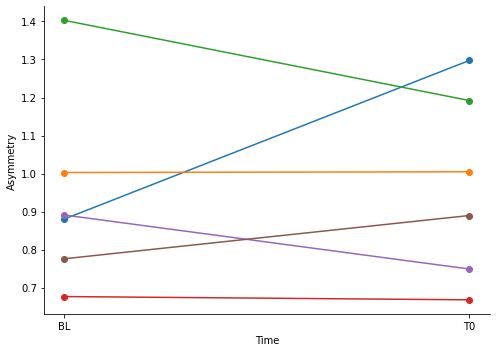

In [174]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106"]
sides = ['L', 'R', 'L', 'R', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2]
# compute EV for all participants
EV_BL = []; EV_T0 = []; EV_T2 = []
for i in range(len(IDs)):
        EV_BL_i = compute_EV_ss_speed_threetrials(trajectories_BL[i], IDs[i], sides[i], plot=False)
        EV_T0_i = compute_EV_ss_speed_threetrials(trajectories_T0[i], IDs[i], sides[i], plot=False)
        EV_T2_i = compute_EV_ss_speed_threetrials(trajectories_T2[i], IDs[i], sides[i], plot=False)
        EV_BL.append(np.squeeze(EV_BL_i))
        EV_T0.append(np.squeeze(EV_T0_i))
        EV_T2.append(np.squeeze(EV_T2_i))
# compute asymmetry for all participants
A_BL, A_T0 = compute_asymmetry_ss_plot(trajectories_BL, angles_BL, trajectories_T0, angles_T0, IDs)
# compute std phi for all participants
#BL
RP_101_contra_BL, std_101_contra_BL = compute_relative_phase_contralateral(trajectories_101_BL, angles_101_BL, 'BO2ST_101', 'L', 'R', 40, BL = True, plot = False)
RP_102_contra_BL, std_102_contra_BL = compute_relative_phase_contralateral(trajectories_102_BL, angles_102_BL, 'BO2ST_102', 'R', 'L', 50, BL = True, plot = False)
RP_103_contra_BL, std_103_contra_BL = compute_relative_phase_contralateral(trajectories_103_BL, angles_103_BL, 'BO2ST_103', 'L', 'R', 50, BL = True, plot = False)
RP_104_contra_BL, std_104_contra_BL = compute_relative_phase_contralateral(trajectories_104_BL, angles_104_BL, 'BO2ST_104', 'R', 'L', 70, BL = True, plot = False)
RP_105_contra_BL, std_105_contra_BL = compute_relative_phase_contralateral(trajectories_105_BL, angles_105_BL, 'BO2ST_105', 'L', 'R', 60, BL = True, plot = False)
RP_106_contra_BL, std_106_contra_BL = compute_relative_phase_contralateral(trajectories_106_BL, angles_106_BL, 'BO2ST_106', 'L', 'R', 60, BL = True, plot = False)
#T0
RP_101_contra_T0, std_101_contra_T0 = compute_relative_phase_contralateral(trajectories_101_T0, angles_101_T0, 'BO2ST_101', 'L', 'R', 90, BL = False, plot = False)
RP_102_contra_T0, std_102_contra_T0 = compute_relative_phase_contralateral(trajectories_102_T0, angles_102_T0, 'BO2ST_102', 'R', 'L', 50, BL = False, plot = False)
RP_103_contra_T0, std_103_contra_T0 = compute_relative_phase_contralateral(trajectories_103_T0, angles_103_T0, 'BO2ST_103', 'L', 'R', 50, BL = False, plot = False)
RP_104_contra_T0, std_104_contra_T0 = compute_relative_phase_contralateral(trajectories_104_T0, angles_104_T0, 'BO2ST_104', 'R', 'L', 70, BL = False, plot = False)
RP_105_contra_T0, std_105_contra_T0 = compute_relative_phase_contralateral(trajectories_105_T0, angles_105_T0, 'BO2ST_105', 'L', 'R', 60, BL = False, plot = False)
RP_106_contra_T0, std_106_contra_T0 = compute_relative_phase_contralateral(trajectories_106_T0, angles_106_T0, 'BO2ST_106', 'L', 'R', 60, BL = False, plot = False)
STD_BL = [std_101_contra_BL, std_102_contra_BL, std_103_contra_BL, std_104_contra_BL, std_105_contra_BL, std_106_contra_BL]
STD_T0 = [std_101_contra_T0, std_102_contra_T0, std_103_contra_T0, std_104_contra_T0, std_105_contra_T0, std_106_contra_T0]


**data at BL vs T0**

In [696]:
df_participant = get_spider_chart_2("BO2ST_109", 'L')

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



**data at initial ss speed T0 vs new_ss speed T0**

In [697]:
df_participant = get_spider_chart_new_ss("BO2ST_109", 'L')

plot the percentage change in ss speed

In [700]:
import plotly.express as px

# compute the percentage changes of ss speeds
file_name_ss_speeds = ("BO2STTrial/SS_speeds.xls")
ss_speeds_xcl = pd.read_excel(file_name_ss_speeds, header = [0], index_col = [0])
perc_change_speed = 100 + (ss_speeds_xcl['T0_SS_speed']-ss_speeds_xcl['BL_SS_speed'])/ss_speeds_xcl['BL_SS_speed']*100

d = {'ID': ['BO2ST_101', 'BO2ST_101', 'BO2ST_102', 'BO2ST_102', 'BO2ST_103', 'BO2ST_103', 'BO2ST_104', 'BO2ST_104', 'BO2ST_105', 'BO2ST_105', 'BO2ST_106', 'BO2ST_106', 'BO2ST_109', 'BO2ST_109'],
     'time': ['BL', 'T0', 'BL', 'T0', 'BL', 'T0', 'BL', 'T0', 'BL', 'T0', 'BL', 'T0', 'BL', 'T0'],
     'perc_speed': [100, perc_change_speed['BO2ST_101'], 100, perc_change_speed['BO2ST_102'], 100, perc_change_speed['BO2ST_103'], 100, perc_change_speed['BO2ST_104'], 100, perc_change_speed['BO2ST_105'], 100, perc_change_speed['BO2ST_106'], 100, perc_change_speed['BO2ST_109']]
    }
perc_change_SS = pd.DataFrame(d)
perc_change_SS['time'] = perc_change_SS['time'].astype('category')

# Define custom colors for each category
color_map = {'BL': 'rgba(239, 85, 59, 0.5)', 'T0': 'rgba(147, 112, 219, 0.5)'}  # Add more as needed

fig = px.bar(
    perc_change_SS[perc_change_SS['ID']=='BO2ST_109'],
    x='time',
    y='perc_speed',
    color= 'time',  # Set specific colors
    color_discrete_map=color_map  # Specify custom colors
)

# Remove the background
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Set the background color to transparent
    paper_bgcolor='rgba(0,0,0,0)',  # Set the paper (outer) background color to transparent
)

# Control the size of the figure
fig.update_layout(
    width=400,  # Set the width of the figure
    height=400,  # Set the height of the figure
    showlegend=False
)

# Keep x-axis at the bottom and y-axis on the left
fig.update_xaxes(
    showline=True,  # Show the x-axis line
    showgrid=False,  # Hide the x-axis grid lines
    linecolor='black'
)

fig.update_yaxes(
    showline=True,  # Show the y-axis line
    showgrid=False,  # Hide the y-axis grid lines
    linecolor='black',
)

fig.show()



**data throughout the trial (BL, T0, T1, T2, F1, F4, F8)**

In [704]:
get_spider_chart_whole_trial('BO2ST_109', 'L')

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



,10MWT speed,6MWT speed,self-selected speed,TUG,LEMS,EV,CoV step length,CoV step width,A knee,A hip,A ankle,stance phase,cadence,step length,step width,GRF TP,GRF area braking,GRF area propulsion,ACC
BL,51.774535,50.593261,25.510204,105.854241,84.0,74.242424,14.922215,65.820145,103.300221,61.562492,11.800510,83.017551,48.483482,56.418116,63.278606,86.666667,8.577476,20.414089,91.014756
T0,57.807261,61.107860,57.142857,122.206897,88.0,80.108992,9.136211,57.761865,73.634335,45.253125,10.719998,78.201784,44.440882,62.018236,61.657919,66.666667,6.858768,12.421276,89.194274
T1,62.709317,68.513541,71.428571,118.926174,84.0,58.217822,11.131414,56.795796,112.751772,33.552899,10.924035,87.246421,50.569315,56.357334,58.014036,92.222222,16.692062,8.860862,83.468596
T2,61.624722,68.968147,69.387755,104.852071,80.0,73.500000,28.761560,117.800991,147.804033,99.597100,24.637734,81.629516,45.261228,59.805118,57.357808,NaN,NaN,NaN,88.425788
AB,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [705]:
get_spider_chart_FU('BO2ST_109', 'L')

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning:

Unknown extension is not supported and will be removed



,10MWT speed,6MWT speed,self-selected speed,TUG,LEMS,EV,CoV step length,CoV step width,A knee,A hip,A ankle,stance phase,cadence,step length,step width,GRF TP,GRF area braking,GRF area propulsion,ACC
T2,61.624722,68.968147,69.387755,104.852071,80.0,73.500000,28.761560,117.800991,147.804033,99.597100,24.637734,81.629516,45.261228,59.805118,57.357808,NaN,NaN,NaN,88.425788
F1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F4,58.323397,62.911620,92.857143,117.740864,88.0,30.721003,16.984583,77.794734,86.647682,84.499306,6.809915,82.514235,56.870649,51.945937,61.563923,NaN,NaN,NaN,86.574574
F8,60.343838,31.089192,71.428571,109.721362,88.0,43.880597,25.660616,102.042748,88.616819,74.371903,20.156554,82.132373,50.918983,52.595653,61.827886,62.222222,4.583125,27.116985,90.342657
AB,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


# 7. Correlation analyses:<a class="anchor" id="sect_7"></a>
[Back to table of contents](#TOC)

NOT INCLUDED IN THE THESIS, LACK STATISTICAL POWER 
***


In [422]:
compute_corr('STD PHI', 'EV', EV_BL, EV_T0, A_BL, A_T0, STD_BL, STD_T0)

(-0.08571428571428573, 0.8717434402332361)

In [395]:
overground_gait_assessments_xcl['10MWT_time_diff'] = overground_gait_assessments_xcl['10MWT_time_T0'] - overground_gait_assessments_xcl['10MWT_time_BL']

/var/folders/08/ly0pjbj57zndk33mmpm99vg40000gn/T/ipykernel_3073/3853757371.py:9: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



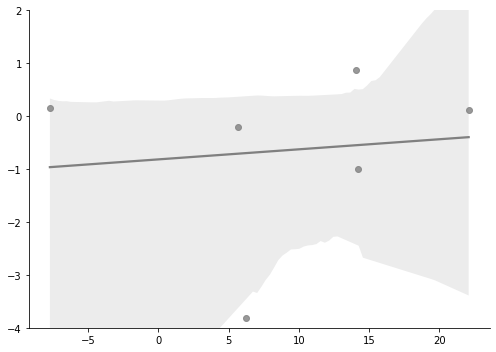

In [420]:
import seaborn as sns
fig, ax = plt.subplots(1,figsize= (7,5))
sns.regplot(x = [STD_T0[x] - STD_BL[x] for x in range(len(STD_T0))], y = [EV_T0[x] - EV_BL[x] for x in range(len(EV_T0))], color='grey')
#ax.legend(title = "Participants")
ax.spines[['right', 'top']].set_visible(False)
ax.set_ylim(-4,2)

# figure parameters
fig.show()
fig.tight_layout();


# 8. Walking mechanics progression:<a class="anchor" id="sect_8"></a>
[Back to table of contents](#TOC)

***


Write the walking mechanics of each SCI participant into the 'walking_mechanics_performances.xlsx' file.

In [827]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
trajectories_F1 = [trajectories_101_F1, trajectories_102_F1, trajectories_103_F1, trajectories_104_F1, trajectories_105_F1, trajectories_106_F1, trajectories_109_F1]
trajectories_F4 = [trajectories_101_F4, trajectories_102_F4, trajectories_103_F4, trajectories_104_F4, trajectories_105_F4, trajectories_106_F4, trajectories_109_F4]
trajectories_F8 = [trajectories_101_F8, trajectories_102_F8, trajectories_103_F8, trajectories_104_F8, trajectories_105_F8, trajectories_106_F8, trajectories_109_F8]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0, angles_109_T0]
angles_T1 = [angles_101_T1, angles_102_T1, angles_103_T1, angles_104_T1, angles_105_T1, angles_106_T1, angles_109_T1]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2, angles_109_T2]
angles_F1 = [angles_101_F1, angles_102_F1, angles_103_F1, angles_104_F1, angles_105_F1, angles_106_F1, angles_109_F1]
angles_F4 = [angles_101_F4, angles_102_F4, angles_103_F4, angles_104_F4, angles_105_F4, angles_106_F4, angles_109_F4]
angles_F8 = [angles_101_F8, angles_102_F8, angles_103_F8, angles_104_F8, angles_105_F8, angles_106_F8, angles_109_F8]
# compute EV for all participants
EV_BL = []; EV_T0 = []; EV_T1 = []; EV_T2 = []; EV_F1 = []; EV_F4 = []; EV_F8 = []
for i in range(len(IDs)):
        EV_BL_i = compute_EV_ss_speed_threetrials(trajectories_BL[i], IDs[i], sides[i], F1 = False, plot=False, F8 = False, F4 = False)
        EV_T0_i = compute_EV_ss_speed_threetrials(trajectories_T0[i], IDs[i], sides[i], F1 = False, plot=False, F8 = False, F4 = False)
        EV_T1_i = compute_EV_ss_speed_threetrials(trajectories_T1[i], IDs[i], sides[i], F1 = False, plot=False, F8 = False, F4 = False)
        EV_T2_i = compute_EV_ss_speed_threetrials(trajectories_T2[i], IDs[i], sides[i], F1 = False, plot=False, F8 = False, F4 = False)
        EV_F1_i = compute_EV_ss_speed_threetrials(trajectories_F1[i], IDs[i], sides[i], F1 = True, plot=False, F8 = False, F4 = False)
        EV_F4_i = compute_EV_ss_speed_threetrials(trajectories_F4[i], IDs[i], sides[i], F1 = False, plot=False, F8 = False, F4 = True)
        EV_F8_i = compute_EV_ss_speed_threetrials(trajectories_F8[i], IDs[i], sides[i], F1 = False, plot=False, F8 = True, F4 = False)
        EV_BL.append(float(np.squeeze(EV_BL_i)))
        EV_T0.append(float(np.squeeze(EV_T0_i)))
        EV_T1.append(float(np.squeeze(EV_T1_i)))
        EV_T2.append(float(np.squeeze(EV_T2_i)))
        EV_F1.append(float(np.squeeze(EV_F1_i)))
        EV_F4.append(float(np.squeeze(EV_F4_i)))
        EV_F8.append(float(np.squeeze(EV_F8_i)))
# compute asymmetry for all participants
trajectories = [trajectories_BL, trajectories_T0, trajectories_T1, trajectories_T2, trajectories_F1, trajectories_F4, trajectories_F8]
angles = [angles_BL, angles_T0, angles_T1, angles_T2, angles_F1, angles_F4, angles_F8]
A_BL, A_T0, A_T1, A_T2, A_F1, A_F4, A_F8 = compute_asymmetry_ss_plot_AB(trajectories, angles, trajectories_AB, angles_AB, plot=False)
# compute std phi for all participants
#BL
RP_101_contra_BL, std_101_contra_BL = compute_relative_phase_contralateral(trajectories_101_BL, angles_101_BL, 'BO2ST_101', 'L', 'R', 40, BL = True, plot = False)
RP_102_contra_BL, std_102_contra_BL = compute_relative_phase_contralateral(trajectories_102_BL, angles_102_BL, 'BO2ST_102', 'R', 'L', 50, BL = True, plot = False)
RP_103_contra_BL, std_103_contra_BL = compute_relative_phase_contralateral(trajectories_103_BL, angles_103_BL, 'BO2ST_103', 'L', 'R', 50, BL = True, plot = False)
RP_104_contra_BL, std_104_contra_BL = compute_relative_phase_contralateral(trajectories_104_BL, angles_104_BL, 'BO2ST_104', 'R', 'L', 70, BL = True, plot = False)
RP_105_contra_BL, std_105_contra_BL = compute_relative_phase_contralateral(trajectories_105_BL, angles_105_BL, 'BO2ST_105', 'L', 'R', 60, BL = True, plot = False)
RP_106_contra_BL, std_106_contra_BL = compute_relative_phase_contralateral(trajectories_106_BL, angles_106_BL, 'BO2ST_106', 'L', 'R', 60, BL = True, plot = False)
#T0
RP_101_contra_T0, std_101_contra_T0 = compute_relative_phase_contralateral(trajectories_101_T0, angles_101_T0, 'BO2ST_101', 'L', 'R', 90, BL = False, plot = False)
RP_102_contra_T0, std_102_contra_T0 = compute_relative_phase_contralateral(trajectories_102_T0, angles_102_T0, 'BO2ST_102', 'R', 'L', 50, BL = False, plot = False)
RP_103_contra_T0, std_103_contra_T0 = compute_relative_phase_contralateral(trajectories_103_T0, angles_103_T0, 'BO2ST_103', 'L', 'R', 50, BL = False, plot = False)
RP_104_contra_T0, std_104_contra_T0 = compute_relative_phase_contralateral(trajectories_104_T0, angles_104_T0, 'BO2ST_104', 'R', 'L', 70, BL = False, plot = False)
RP_105_contra_T0, std_105_contra_T0 = compute_relative_phase_contralateral(trajectories_105_T0, angles_105_T0, 'BO2ST_105', 'L', 'R', 60, BL = False, plot = False)
RP_106_contra_T0, std_106_contra_T0 = compute_relative_phase_contralateral(trajectories_106_T0, angles_106_T0, 'BO2ST_106', 'L', 'R', 60, BL = False, plot = False)
#T1
RP_101_contra_T1, std_101_contra_T1 = compute_relative_phase_contralateral_T1(trajectories_101_T1, angles_101_T1, 'BO2ST_101', 'L', 'R', 0, plot = False)
RP_102_contra_T1, std_102_contra_T1 = compute_relative_phase_contralateral_T1(trajectories_102_T1, angles_102_T1, 'BO2ST_102', 'R', 'L', 10, plot = False)
RP_103_contra_T1, std_103_contra_T1 = compute_relative_phase_contralateral_T1(trajectories_103_T1, angles_103_T1, 'BO2ST_103', 'L', 'R', 70, plot = False)
RP_104_contra_T1, std_104_contra_T1 = compute_relative_phase_contralateral_T1(trajectories_104_T1, angles_104_T1, 'BO2ST_104', 'R', 'L', 90, plot = False)
RP_105_contra_T1, std_105_contra_T1 = compute_relative_phase_contralateral_T1(trajectories_105_T1, angles_105_T1, 'BO2ST_105', 'L', 'R', 100, plot = False)
RP_106_contra_T1, std_106_contra_T1 = compute_relative_phase_contralateral_T1(trajectories_106_T1, angles_106_T1, 'BO2ST_106', 'L', 'R', 20, plot = False)
#T2
RP_101_contra_T2, std_101_contra_T2 = compute_relative_phase_contralateral(trajectories_101_T2, angles_101_T2, 'BO2ST_101', 'L', 'R', 90, BL = False, T2 = True, plot = False)
RP_102_contra_T2, std_102_contra_T2 = compute_relative_phase_contralateral(trajectories_102_T2, angles_102_T2, 'BO2ST_102', 'R', 'L', 50, BL = False, T2 = True, plot = False)
RP_103_contra_T2, std_103_contra_T2 = compute_relative_phase_contralateral(trajectories_103_T2, angles_103_T2, 'BO2ST_103', 'L', 'R', 50, BL = False, T2 = True, plot = False)
RP_104_contra_T2, std_104_contra_T2 = compute_relative_phase_contralateral(trajectories_104_T2, angles_104_T2, 'BO2ST_104', 'R', 'L', 90, BL = False, T2 = True, plot = False)
RP_105_contra_T2, std_105_contra_T2 = compute_relative_phase_contralateral(trajectories_105_T2, angles_105_T2, 'BO2ST_105', 'L', 'R', 60, BL = False, T2 = True, plot = False)
RP_106_contra_T2, std_106_contra_T2 = compute_relative_phase_contralateral(trajectories_106_T2, angles_106_T2, 'BO2ST_106', 'L', 'R', 60, BL = False, T2 = True, plot = False)
#F1
RP_101_contra_F1, std_101_contra_F1 = compute_relative_phase_contralateral_F1(trajectories_101_F1, angles_101_F1, "BO2ST_101", 'L', 'R', 100, plot=False)
RP_102_contra_F1, std_102_contra_F1 = compute_relative_phase_contralateral_F1(trajectories_102_F1, angles_102_F1, "BO2ST_102", 'R', 'L', 10, plot=False)
RP_103_contra_F1, std_103_contra_F1 = compute_relative_phase_contralateral_F1(trajectories_103_F1, angles_103_F1, "BO2ST_103", 'L', 'R', 10, plot=False)
RP_104_contra_F1, std_104_contra_F1 = compute_relative_phase_contralateral_F1(trajectories_104_F1, angles_104_F1, "BO2ST_104", 'R', 'L', 120, plot=False)
RP_105_contra_F1, std_105_contra_F1 = compute_relative_phase_contralateral_F1(trajectories_105_F1, angles_105_F1, "BO2ST_105", 'L', 'R', 50, plot=False)
RP_106_contra_F1, std_106_contra_F1 = compute_relative_phase_contralateral_F1(trajectories_106_F1, angles_106_F1, "BO2ST_106", 'L', 'R', 50, plot=False)
# F4
RP_101_contra_F4, std_101_contra_F4 = compute_relative_phase_contralateral_F4(trajectories_101_F4, angles_101_F4, "BO2ST_101", 'L', 'R', 250, plot=False)
RP_102_contra_F4, std_102_contra_F4 = compute_relative_phase_contralateral_F4(trajectories_102_F4, angles_102_F4, "BO2ST_102", 'R', 'L', 30, plot=False)
RP_103_contra_F4, std_103_contra_F4 = compute_relative_phase_contralateral_F4(trajectories_103_F4, angles_103_F4, "BO2ST_103", 'L', 'R', -10, plot=False)
RP_104_contra_F4, std_104_contra_F4 = compute_relative_phase_contralateral_F4(trajectories_104_F4, angles_104_F4, "BO2ST_104", 'R', 'L', 100, plot=False)
RP_105_contra_F4, std_105_contra_F4 = compute_relative_phase_contralateral_F4(trajectories_105_F4, angles_105_F4, "BO2ST_105", 'L', 'R', 60, plot=False)
RP_106_contra_F4, std_106_contra_F4 = compute_relative_phase_contralateral_F4(trajectories_106_F4, angles_106_F4, "BO2ST_106", 'L', 'R', 60, plot=False)
# F8
RP_101_contra_F8, std_101_contra_F8 = compute_relative_phase_contralateral_F8(trajectories_101_F8, angles_101_F8, "BO2ST_101", 'L', 'R', 300, plot=False)
RP_102_contra_F8, std_102_contra_F8 = compute_relative_phase_contralateral_F8(trajectories_102_F8, angles_102_F8, "BO2ST_102", 'R', 'L', 20, plot=False)
RP_103_contra_F8, std_103_contra_F8 = compute_relative_phase_contralateral_F8(trajectories_103_F8, angles_103_F8, "BO2ST_103", 'L', 'R', -50, plot=False)
RP_104_contra_F8, std_104_contra_F8 = compute_relative_phase_contralateral_F8(trajectories_104_F8, angles_104_F8, "BO2ST_104", 'R', 'L', 80, plot=False)
RP_105_contra_F8, std_105_contra_F8 = compute_relative_phase_contralateral_F8(trajectories_105_F8, angles_105_F8, "BO2ST_105", 'L', 'R', 80, plot=False)
RP_106_contra_F8, std_106_contra_F8 = compute_relative_phase_contralateral_F8(trajectories_106_F8, angles_106_F8, "BO2ST_106", 'L', 'R', 80, plot=False)

#
STD_BL = [std_101_contra_BL, std_102_contra_BL, std_103_contra_BL, std_104_contra_BL, std_105_contra_BL, std_106_contra_BL]
STD_T0 = [std_101_contra_T0, std_102_contra_T0, std_103_contra_T0, std_104_contra_T0, std_105_contra_T0, std_106_contra_T0]
STD_T1 = [std_101_contra_T1, std_102_contra_T1, std_103_contra_T1, std_104_contra_T1, std_105_contra_T1, std_106_contra_T1]
STD_T2 = [std_101_contra_T2, std_102_contra_T2, std_103_contra_T2, std_104_contra_T2, std_105_contra_T2, std_106_contra_T2]
STD_F1 = [std_101_contra_F1, std_102_contra_F1, std_103_contra_F1, std_104_contra_F1, std_105_contra_F1, std_106_contra_F1]
STD_F4 = [std_101_contra_F4, std_102_contra_F4, std_103_contra_F4, std_104_contra_F4, std_105_contra_F4, std_106_contra_F4]
STD_F8 = [std_101_contra_F8, std_102_contra_F8, std_103_contra_F8, std_104_contra_F8, std_105_contra_F8, std_106_contra_F8]
# write the walking mechanics in xcel file
walking_mechanics_performances = pd.DataFrame([[EV_BL[0], EV_T0[0], EV_T1[0], EV_T2[0], EV_F1[0], EV_F4[0], EV_F8[0], A_BL[0], A_T0[0], A_T1[0], A_T2[0], A_F1[0], A_F4[0], A_F8[0], STD_BL[0], STD_T0[0], STD_T1[0], STD_T2[0], STD_F1[0], STD_F4[0], STD_F8[0]],
                                               [EV_BL[1], EV_T0[1], EV_T1[1], EV_T2[1], EV_F1[1], EV_F4[1], EV_F8[1], A_BL[1], A_T0[1], A_T1[1], A_T2[1], A_F1[1], A_F4[1], A_F8[1], STD_BL[1], STD_T0[1], STD_T1[1], STD_T2[1], STD_F1[1], STD_F4[1], STD_F8[1]],
                                               [EV_BL[2], EV_T0[2], EV_T1[2], EV_T2[2], EV_F1[2], EV_F4[2], EV_F8[2], A_BL[2], A_T0[2], A_T1[2], A_T2[2], A_F1[2], A_F4[2], A_F8[2], STD_BL[2], STD_T0[2], STD_T1[2], STD_T2[2], STD_F1[2], STD_F4[2], STD_F8[2]],
                                               [EV_BL[3], EV_T0[3], EV_T1[3], EV_T2[3], EV_F1[3], EV_F4[3], EV_F8[3], A_BL[3], A_T0[3], A_T1[3], A_T2[3], A_F1[3], A_F4[3], A_F8[3], STD_BL[3], STD_T0[3], STD_T1[3], STD_T2[3], STD_F1[3], STD_F4[3], STD_F8[3]],
                                               [EV_BL[4], EV_T0[4], EV_T1[4], EV_T2[4], EV_F1[4], EV_F4[4], EV_F8[4], A_BL[4], A_T0[4], A_T1[4], A_T2[4], A_F1[4], A_F4[4], A_F8[4], STD_BL[4], STD_T0[4], STD_T1[4], STD_T2[4], STD_F1[4], STD_F4[4], STD_F8[4]],
                                               [EV_BL[5], EV_T0[5], EV_T1[5], EV_T2[5], EV_F1[5], EV_F4[5], EV_F8[5], A_BL[5], A_T0[5], A_T1[5], A_T2[5], A_F1[5], A_F4[5], A_F8[5], STD_BL[5], STD_T0[5], STD_T1[5], STD_T2[5], STD_F1[5], STD_F4[5], STD_F8[5]]],
                  index=IDs, columns=['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2', 'EV_F1', 'EV_F4', 'EV_F8', 'A_BL', 'A_T0', 'A_T1', 'A_T2', 'A_F1', 'A_F4', 'A_F8', 'STD_BL', 'STD_T0', 'STD_T1', 'STD_T2', 'STD_F1', 'STD_F4', 'STD_F8'])                          
walking_mechanics_performances.to_excel('BO2STTrial/walking_mechanics_performances.xlsx') 

In [828]:
walking_mechanics_performances

,EV_BL,EV_T0,EV_T1,EV_T2,EV_F1,EV_F4,EV_F8,A_BL,A_T0,A_T1,...,A_F1,A_F4,A_F8,STD_BL,STD_T0,STD_T1,STD_T2,STD_F1,STD_F4,STD_F8
BO2ST_101,1.37,1.49,1.92,1.76,1.05,1.51,1.33,0.701594,0.749210,0.982252,...,0.819918,0.806617,0.928147,13.265657,35.366170,52.793388,34.734131,26.206328,59.067047,42.983978
BO2ST_102,1.53,1.33,1.29,1.38,1.85,1.18,1.30,0.815428,0.728212,0.733572,...,0.586018,0.663940,0.641965,15.745720,21.394338,3.406670,4.585540,4.459221,2.899558,5.044607
BO2ST_103,5.94,3.15,3.47,2.84,4.61,2.86,2.38,1.092641,0.792259,0.943963,...,1.293231,1.126540,1.332511,18.916465,25.159736,28.051069,20.899427,17.611871,25.283556,14.991889
BO2ST_104,4.82,5.70,4.50,5.33,5.07,2.89,3.37,0.480552,0.351516,0.419924,...,0.436710,0.388705,0.512355,41.481336,55.580285,52.689448,37.787784,59.801722,37.867164,46.147761
BO2ST_105,1.84,1.99,1.82,1.98,1.17,1.61,2.53,0.517188,0.374064,0.533088,...,0.491212,0.435476,0.464645,25.183045,17.449039,35.510250,29.734511,20.498124,27.967633,28.240082
BO2ST_106,6.93,5.94,6.59,6.68,6.71,7.39,6.84,0.677689,0.670626,0.590729,...,1.008423,0.806322,0.552617,12.894175,27.110032,11.568525,21.930685,22.958076,21.983804,17.704811


Write the walking mechanics of each control matched subject into the 'walking_mechanics_performances_control' file.

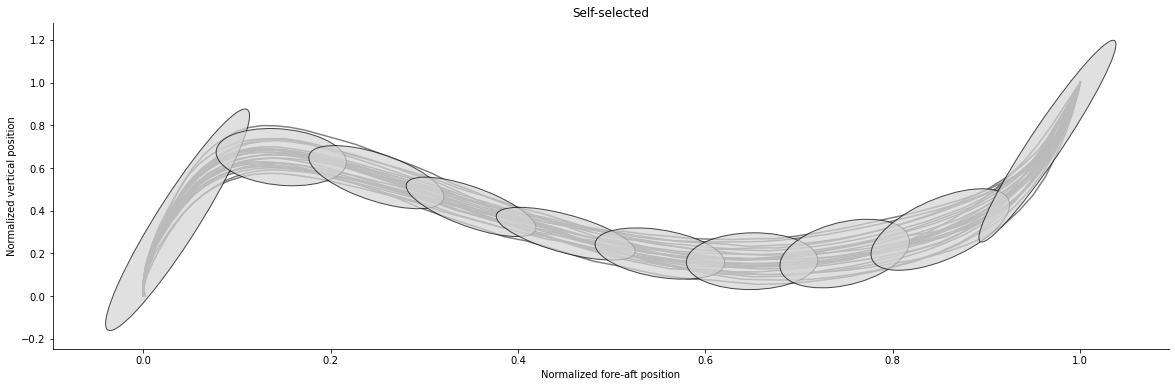

<Figure size 432x288 with 0 Axes>

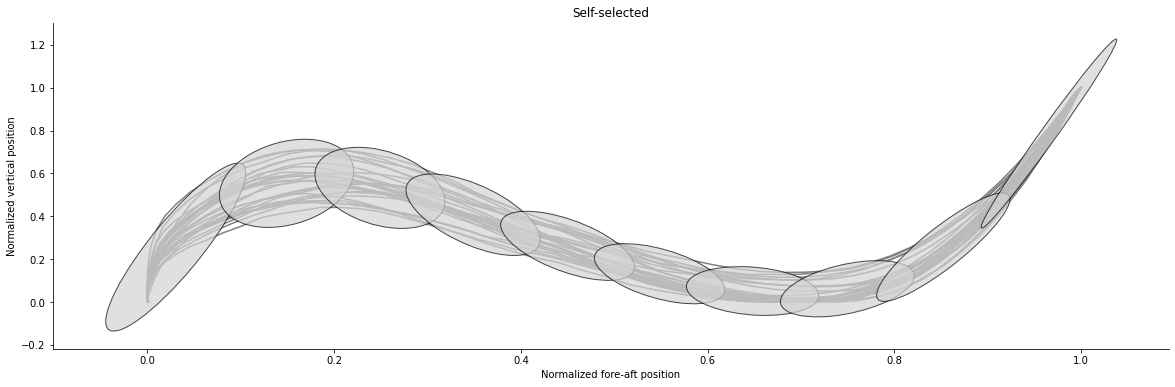

<Figure size 432x288 with 0 Axes>

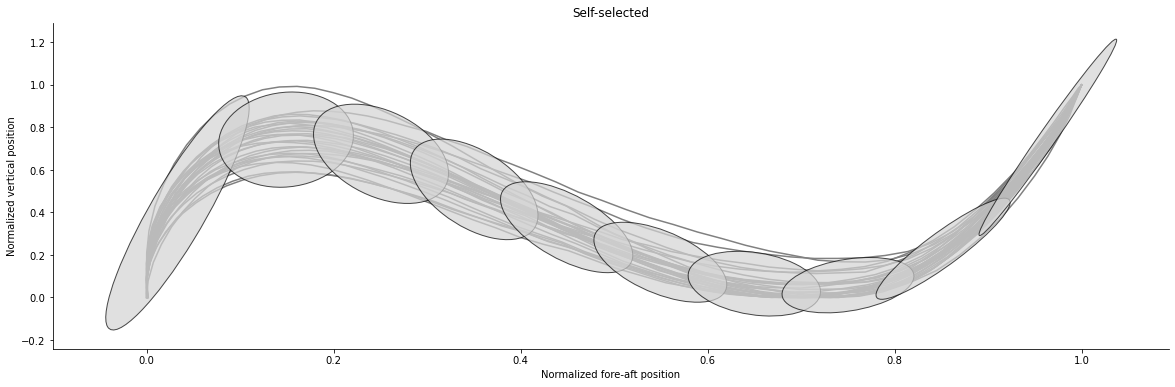

<Figure size 432x288 with 0 Axes>

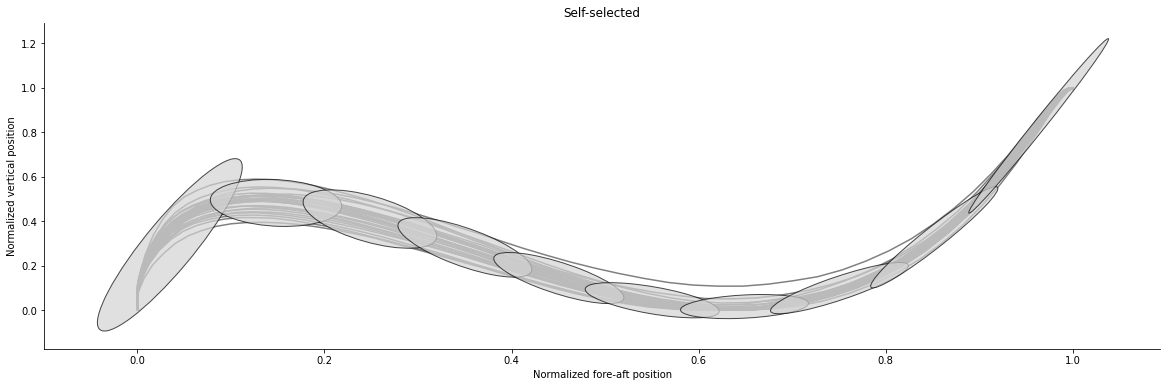

<Figure size 432x288 with 0 Axes>

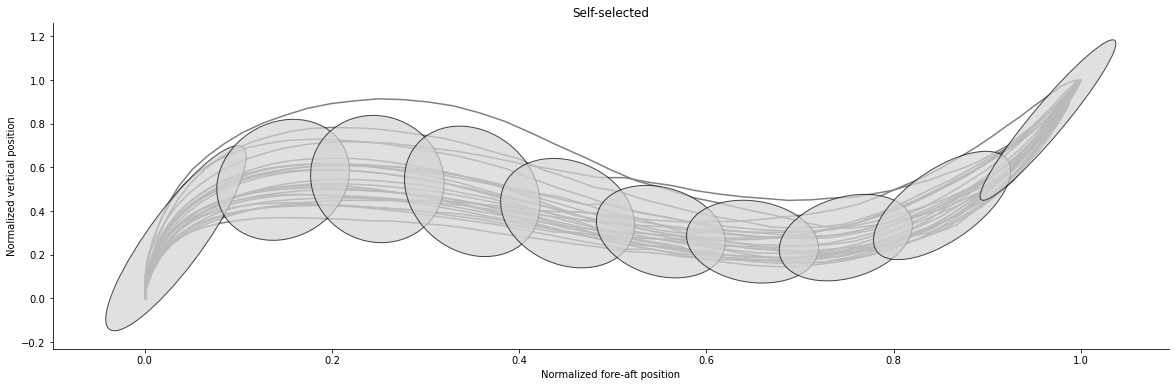

<Figure size 432x288 with 0 Axes>

In [566]:
IDs_AB = ["AB03", "AB11", "AB21", "AB38", "AB42"]
sides = ['L', 'R', 'L', 'R', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1]
trajectories_F1 = [trajectories_101_F1, trajectories_102_F1, trajectories_103_F1, trajectories_104_F1, trajectories_105_F1, trajectories_106_F1]
trajectories_F4 = [trajectories_101_F4, trajectories_102_F4, trajectories_103_F4, trajectories_104_F4, trajectories_105_F4, trajectories_106_F4]
trajectories_F8 = [trajectories_101_F8, trajectories_102_F8, trajectories_103_F8, trajectories_104_F8, trajectories_105_F8, trajectories_106_F8]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0]
angles_T1 = [angles_101_T1, angles_102_T1, angles_103_T1, angles_104_T1, angles_105_T1, angles_106_T1]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2]
angles_F1 = [angles_101_F1, angles_102_F1, angles_103_F1, angles_104_F1, angles_105_F1, angles_106_F1]
angles_F4 = [angles_101_F4, angles_102_F4, angles_103_F4, angles_104_F4, angles_105_F4, angles_106_F4]
angles_F8 = [angles_101_F8, angles_102_F8, angles_103_F8, angles_104_F8, angles_105_F8, angles_106_F8]
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]
# compute EV for all AB
EV_BL = []; EV_T0 = []; EV_T1 = []; EV_T2 = []; EV_F1 = []; EV_F4 = []; EV_F8 = []
EV_AB03 = compute_EV_AB_ss(trajectories_AB03, '03', 'R')
EV_AB11 = compute_EV_AB_ss(trajectories_AB11, '11', 'R')
EV_AB21 = compute_EV_AB_ss(trajectories_AB21, '21', 'R')
EV_AB38 = compute_EV_AB_ss(trajectories_AB38, '38', 'R')
EV_AB42 = compute_EV_AB_ss(trajectories_AB42, '42', 'R')
EV_BL.append([float(np.squeeze(EV_AB03)), float(np.squeeze(EV_AB11)), float(np.squeeze(EV_AB21)), float(np.squeeze(EV_AB38)), float(np.squeeze(EV_AB42))])
EV_BL = np.squeeze(EV_BL)
EV_T0.append([float(np.squeeze(EV_AB03)), float(np.squeeze(EV_AB11)), float(np.squeeze(EV_AB21)), float(np.squeeze(EV_AB38)), float(np.squeeze(EV_AB42))])
EV_T0 = np.squeeze(EV_T0)
EV_T1.append([float(np.squeeze(EV_AB03)), float(np.squeeze(EV_AB11)), float(np.squeeze(EV_AB21)), float(np.squeeze(EV_AB38)), float(np.squeeze(EV_AB42))])
EV_T1 = np.squeeze(EV_T1)
EV_T2.append([float(np.squeeze(EV_AB03)), float(np.squeeze(EV_AB11)), float(np.squeeze(EV_AB21)), float(np.squeeze(EV_AB38)), float(np.squeeze(EV_AB42))])
EV_T2 = np.squeeze(EV_T2)
EV_F1.append([float(np.squeeze(EV_AB03)), float(np.squeeze(EV_AB11)), float(np.squeeze(EV_AB21)), float(np.squeeze(EV_AB38)), float(np.squeeze(EV_AB42))])
EV_F1 = np.squeeze(EV_F1)
EV_F4.append([float(np.squeeze(EV_AB03)), float(np.squeeze(EV_AB11)), float(np.squeeze(EV_AB21)), float(np.squeeze(EV_AB38)), float(np.squeeze(EV_AB42))])
EV_F4 = np.squeeze(EV_F4)
EV_F8.append([float(np.squeeze(EV_AB03)), float(np.squeeze(EV_AB11)), float(np.squeeze(EV_AB21)), float(np.squeeze(EV_AB38)), float(np.squeeze(EV_AB42))])
EV_F8 = np.squeeze(EV_F8)
# compute asymmetry for all AB
trajectories = [trajectories_BL, trajectories_T0, trajectories_T1, trajectories_T2, trajectories_F1, trajectories_F4, trajectories_F8]
angles = [angles_BL, angles_T0, angles_T1, angles_T2, angles_F1, angles_F4, angles_F8]
A_BL, A_T0, A_T1, A_T2, A_F1, A_F4, A_F8 = compute_asymmetry_ss_plot_AB(trajectories, angles, trajectories_AB, angles_AB, plot=False)
# write the walking mechanics and  in xcel file
walking_mechanics_performances_control = pd.DataFrame([[EV_BL[0], EV_T0[0], EV_T1[0], EV_T2[0], EV_F1[0], EV_F4[0], EV_F8[0], A_BL[6], A_T0[6], A_T1[6], A_T2[6], A_F1[6], A_F4[6], A_F8[6]],
                                               [EV_BL[1], EV_T0[1], EV_T1[1], EV_T2[1], EV_F1[1], EV_F4[1], EV_F8[1], A_BL[7], A_T0[7], A_T1[7], A_T2[7], A_F1[7], A_F4[7], A_F8[7]],
                                               [EV_BL[2], EV_T0[2], EV_T1[2], EV_T2[2], EV_F1[2], EV_F4[2], EV_F8[2], A_BL[8], A_T0[8], A_T1[8], A_T2[8], A_F1[8], A_F4[8], A_F8[8]],
                                               [EV_BL[3], EV_T0[3], EV_T1[3], EV_T2[3], EV_F1[3], EV_F4[3], EV_F8[3], A_BL[9], A_T0[9], A_T1[9], A_T2[9], A_F1[9], A_F4[9], A_F8[9]],
                                               [EV_BL[4], EV_T0[4], EV_T1[4], EV_T2[4], EV_F1[4], EV_F4[4], EV_F8[4], A_BL[10], A_T0[10], A_T1[10], A_T2[10], A_F1[10], A_F4[10], A_F8[10]]],
                  index=IDs_AB, columns=['EV_BL', 'EV_T0', 'EV_T1', 'EV_T2', 'EV_F1', 'EV_F4', 'EV_F8', 'A_BL', 'A_T0', 'A_T1', 'A_T2', 'A_F1', 'A_F4', 'A_F8'])                          
walking_mechanics_performances_control.to_excel('BO2STTrial/walking_mechanics_performances_control.xlsx') 

In [567]:
walking_mechanics_performances_control

,EV_BL,EV_T0,EV_T1,EV_T2,EV_F1,EV_F4,EV_F8,A_BL,A_T0,A_T1,A_T2,A_F1,A_F4,A_F8
AB03,2.94,2.94,2.94,2.94,2.94,2.94,2.94,0.292626,0.292626,0.292626,0.292626,0.292626,0.292626,0.292626
AB11,3.07,3.07,3.07,3.07,3.07,3.07,3.07,0.368414,0.368414,0.368414,0.368414,0.368414,0.368414,0.368414
AB21,3.71,3.71,3.71,3.71,3.71,3.71,3.71,0.454604,0.454604,0.454604,0.454604,0.454604,0.454604,0.454604
AB38,1.85,1.85,1.85,1.85,1.85,1.85,1.85,0.149188,0.149188,0.149188,0.149188,0.149188,0.149188,0.149188
AB42,4.94,4.94,4.94,4.94,4.94,4.94,4.94,0.333099,0.333099,0.333099,0.333099,0.333099,0.333099,0.333099


In [829]:
individual_progress_walking_mechanics('BO2ST_102')

# 9. ROM:<a class="anchor" id="sect_9"></a>
[Back to table of contents](#TOC)

Kinematic variables of interest encompassed hip flexion/extension angles, knee flexion/extension angles, and ankle dorsi/plantar flexion angles (in degrees).

***


In [783]:
plot_kinematics("BO2ST_105", "R", angles_105_T1, trajectories_105_T1)

Compute SI ROM.

In [843]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0, angles_109_T0]
angles_T1 = [angles_101_T1, angles_102_T1, angles_103_T1, angles_104_T1, angles_105_T1, angles_106_T1, angles_109_T1]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2, angles_109_T2]

# compute hip/knee/ankle maximal ROM of the MA side for all participants
knee_ROM_BL_left = []; knee_ROM_T0_left = []; knee_ROM_T1_left = []; knee_ROM_T2_left = []
hip_ROM_BL_left = []; hip_ROM_T0_left = []; hip_ROM_T1_left = []; hip_ROM_T2_left = []
ankle_ROM_BL_left = []; ankle_ROM_T0_left = []; ankle_ROM_T1_left = []; ankle_ROM_T2_left = []
knee_ROM_BL_right = []; knee_ROM_T0_right = []; knee_ROM_T1_right = []; knee_ROM_T2_right = []
hip_ROM_BL_right = []; hip_ROM_T0_right = []; hip_ROM_T1_right = []; hip_ROM_T2_right = []
ankle_ROM_BL_right = []; ankle_ROM_T0_right = []; ankle_ROM_T1_right = []; ankle_ROM_T2_right = []

for i in range(len(IDs)): 
    knee_ROM_i_BL_left, knee_ROM_i_BL_right, hip_ROM_i_BL_left, hip_ROM_i_BL_right, ankle_ROM_i_BL_left, ankle_ROM_i_BL_right = compute_ROM_left_and_right(trajectories_BL[i], angles_BL[i], IDs[i])
    knee_ROM_i_T0_left, knee_ROM_i_T0_right, hip_ROM_i_T0_left, hip_ROM_i_T0_right, ankle_ROM_i_T0_left, ankle_ROM_i_T0_right = compute_ROM_left_and_right(trajectories_T0[i], angles_T0[i], IDs[i])
    knee_ROM_i_T1_left, knee_ROM_i_T1_right, hip_ROM_i_T1_left, hip_ROM_i_T1_right, ankle_ROM_i_T1_left, ankle_ROM_i_T1_right = compute_ROM_left_and_right(trajectories_T1[i], angles_T1[i], IDs[i])
    knee_ROM_i_T2_left, knee_ROM_i_T2_right, hip_ROM_i_T2_left, hip_ROM_i_T2_right, ankle_ROM_i_T2_left, ankle_ROM_i_T2_right = compute_ROM_left_and_right(trajectories_T2[i], angles_T2[i], IDs[i])
    knee_ROM_BL_left.append(float(np.squeeze(knee_ROM_i_BL_left))); hip_ROM_BL_left.append(float(np.squeeze(hip_ROM_i_BL_left))); ankle_ROM_BL_left.append(float(np.squeeze(ankle_ROM_i_BL_left)))
    knee_ROM_T0_left.append(float(np.squeeze(knee_ROM_i_T0_left))); hip_ROM_T0_left.append(float(np.squeeze(hip_ROM_i_T0_left))); ankle_ROM_T0_left.append(float(np.squeeze(ankle_ROM_i_T0_left)))
    knee_ROM_T1_left.append(float(np.squeeze(knee_ROM_i_T1_left))); hip_ROM_T1_left.append(float(np.squeeze(hip_ROM_i_T1_left))); ankle_ROM_T1_left.append(float(np.squeeze(ankle_ROM_i_T1_left)))
    knee_ROM_T2_left.append(float(np.squeeze(knee_ROM_i_T2_left))); hip_ROM_T2_left.append(float(np.squeeze(hip_ROM_i_T2_left))); ankle_ROM_T2_left.append(float(np.squeeze(ankle_ROM_i_T2_left)))
    knee_ROM_BL_right.append(float(np.squeeze(knee_ROM_i_BL_right))); hip_ROM_BL_right.append(float(np.squeeze(hip_ROM_i_BL_right))); ankle_ROM_BL_right.append(float(np.squeeze(ankle_ROM_i_BL_right)))
    knee_ROM_T0_right.append(float(np.squeeze(knee_ROM_i_T0_right))); hip_ROM_T0_right.append(float(np.squeeze(hip_ROM_i_T0_right))); ankle_ROM_T0_right.append(float(np.squeeze(ankle_ROM_i_T0_right)))
    knee_ROM_T1_right.append(float(np.squeeze(knee_ROM_i_T1_right))); hip_ROM_T1_right.append(float(np.squeeze(hip_ROM_i_T1_right))); ankle_ROM_T1_right.append(float(np.squeeze(ankle_ROM_i_T1_right)))
    knee_ROM_T2_right.append(float(np.squeeze(knee_ROM_i_T2_right))); hip_ROM_T2_right.append(float(np.squeeze(hip_ROM_i_T2_right))); ankle_ROM_T2_right.append(float(np.squeeze(ankle_ROM_i_T2_right)))

SI_BL_knee = []; SI_T0_knee = []; SI_T1_knee = []; SI_T2_knee = []
SI_BL_hip = []; SI_T0_hip = []; SI_T1_hip = []; SI_T2_hip = []
SI_BL_ankle = []; SI_T0_ankle = []; SI_T1_ankle = []; SI_T2_ankle = []
for i in range(len(IDs)): 
    SI_BL_knee_i = compute_symmetry_index(knee_ROM_BL_right[i], knee_ROM_BL_left[i])
    SI_T0_knee_i = compute_symmetry_index(knee_ROM_T0_right[i], knee_ROM_T0_left[i])
    SI_T1_knee_i = compute_symmetry_index(knee_ROM_T1_right[i], knee_ROM_T1_left[i])
    SI_T2_knee_i = compute_symmetry_index(knee_ROM_T2_right[i], knee_ROM_T2_left[i])
    SI_BL_hip_i = compute_symmetry_index(hip_ROM_BL_right[i], hip_ROM_BL_left[i])
    SI_T0_hip_i = compute_symmetry_index(hip_ROM_T0_right[i], hip_ROM_T0_left[i])
    SI_T1_hip_i = compute_symmetry_index(hip_ROM_T1_right[i], hip_ROM_T1_left[i])
    SI_T2_hip_i = compute_symmetry_index(hip_ROM_T2_right[i], hip_ROM_T2_left[i])
    SI_BL_ankle_i = compute_symmetry_index(ankle_ROM_BL_right[i], ankle_ROM_BL_left[i])
    SI_T0_ankle_i = compute_symmetry_index(ankle_ROM_T0_right[i], ankle_ROM_T0_left[i])
    SI_T1_ankle_i = compute_symmetry_index(ankle_ROM_T1_right[i], ankle_ROM_T1_left[i])
    SI_T2_ankle_i = compute_symmetry_index(ankle_ROM_T2_right[i], ankle_ROM_T2_left[i])
    SI_BL_knee.append(SI_BL_knee_i); SI_BL_hip.append(SI_BL_hip_i); SI_BL_ankle.append(SI_BL_ankle_i)
    SI_T0_knee.append(SI_T0_knee_i); SI_T0_hip.append(SI_T0_hip_i); SI_T0_ankle.append(SI_T0_ankle_i)
    SI_T1_knee.append(SI_T1_knee_i); SI_T1_hip.append(SI_T1_hip_i); SI_T1_ankle.append(SI_T1_ankle_i)
    SI_T2_knee.append(SI_T2_knee_i); SI_T2_hip.append(SI_T2_hip_i); SI_T2_ankle.append(SI_T2_ankle_i)
    

# write the walking mechanics and  in xcel file
joint_ROMs_SI = pd.DataFrame([[SI_BL_knee[0], SI_T0_knee[0], SI_T1_knee[0], SI_T2_knee[0], SI_BL_hip[0], SI_T0_hip[0], SI_T1_hip[0], SI_T2_hip[0], SI_BL_ankle[0], SI_T0_ankle[0], SI_T1_ankle[0], SI_T2_ankle[0]],
                           [SI_BL_knee[1], SI_T0_knee[1], SI_T1_knee[1], SI_T2_knee[1], SI_BL_hip[1], SI_T0_hip[1], SI_T1_hip[1], SI_T2_hip[1], SI_BL_ankle[1], SI_T0_ankle[1], SI_T1_ankle[1], SI_T2_ankle[1]],
                           [SI_BL_knee[2], SI_T0_knee[2], SI_T1_knee[2], SI_T2_knee[2], SI_BL_hip[2], SI_T0_hip[2], SI_T1_hip[2], SI_T2_hip[2], SI_BL_ankle[2], SI_T0_ankle[2], SI_T1_ankle[2], SI_T2_ankle[2]],
                           [SI_BL_knee[3], SI_T0_knee[3], SI_T1_knee[3], SI_T2_knee[3], SI_BL_hip[3], SI_T0_hip[3], SI_T1_hip[3], SI_T2_hip[3], SI_BL_ankle[3], SI_T0_ankle[3], SI_T1_ankle[3], SI_T2_ankle[3]],
                           [SI_BL_knee[4], SI_T0_knee[4], SI_T1_knee[4], SI_T2_knee[4], SI_BL_hip[4], SI_T0_hip[4], SI_T1_hip[4], SI_T2_hip[4], SI_BL_ankle[4], SI_T0_ankle[4], SI_T1_ankle[4], SI_T2_ankle[4]],
                           [SI_BL_knee[5], SI_T0_knee[5], SI_T1_knee[5], SI_T2_knee[5], SI_BL_hip[5], SI_T0_hip[5], SI_T1_hip[5], SI_T2_hip[5], SI_BL_ankle[5], SI_T0_ankle[5], SI_T1_ankle[5], SI_T2_ankle[5]],
                           [SI_BL_knee[6], SI_T0_knee[6], SI_T1_knee[6], SI_T2_knee[6], SI_BL_hip[6], SI_T0_hip[6], SI_T1_hip[6], SI_T2_hip[6], SI_BL_ankle[6], SI_T0_ankle[6], SI_T1_ankle[6], SI_T2_ankle[6]]],
                  index=IDs, columns=['SI_BL_knee', 'SI_T0_knee', 'SI_T1_knee', 'SI_T2_knee', 'SI_BL_hip', 'SI_T0_hip', 'SI_T1_hip', 'SI_T2_hip', 'SI_BL_ankle', 'SI_T0_ankle', 'SI_T1_ankle', 'SI_T2_ankle'])                          
joint_ROMs_SI.to_excel('BO2STTrial/joint_ROMs_SI.xlsx')     

/Users/camillefrayssinhes/INSPIRE LAB/src/kinematics.py:471: RuntimeWarning:

All-NaN axis encountered

/Users/camillefrayssinhes/INSPIRE LAB/src/kinematics.py:477: RuntimeWarning:

All-NaN axis encountered

/Users/camillefrayssinhes/INSPIRE LAB/src/kinematics.py:483: RuntimeWarning:

All-NaN axis encountered

/Users/camillefrayssinhes/INSPIRE LAB/src/kinematics.py:421: RuntimeWarning:

All-NaN axis encountered

/Users/camillefrayssinhes/INSPIRE LAB/src/kinematics.py:427: RuntimeWarning:

All-NaN axis encountered

/Users/camillefrayssinhes/INSPIRE LAB/src/kinematics.py:433: RuntimeWarning:

All-NaN axis encountered



In [846]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
trajectories_T1_new_ss = [trajectories_101_T1_new_ss, trajectories_102_T1_new_ss, trajectories_103_T1_new_ss, trajectories_104_T1_new_ss, trajectories_105_T1_new_ss, trajectories_106_T1_new_ss, trajectories_109_T1_new_ss]
trajectories_T2_new_ss = [trajectories_101_T2_new_ss, trajectories_102_T2_new_ss, trajectories_103_T2_new_ss, trajectories_104_T2_new_ss, trajectories_105_T2_new_ss, trajectories_106_T2_new_ss, trajectories_109_T2_new_ss]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0_new_ss = [angles_101_T0, angles_102_T0_new_ss, angles_103_T0_new_ss, angles_104_T0_new_ss, angles_105_T0_new_ss, angles_106_T0_new_ss, angles_109_T0_new_ss]
angles_T1_new_ss = [angles_101_T1_new_ss, angles_102_T1_new_ss, angles_103_T1_new_ss, angles_104_T1_new_ss, angles_105_T1_new_ss, angles_106_T1_new_ss, angles_109_T1_new_ss]
angles_T2_new_ss = [angles_101_T2_new_ss, angles_102_T2_new_ss, angles_103_T2_new_ss, angles_104_T2_new_ss, angles_105_T2_new_ss, angles_106_T2_new_ss, angles_109_T2_new_ss]

# compute hip/knee/ankle maximal ROM of the MA side for all participants
knee_ROM_BL_new_ss_left = []; knee_ROM_T0_new_ss_left = []; knee_ROM_T1_new_ss_left = []; knee_ROM_T2_new_ss_left = []
hip_ROM_BL_new_ss_left = []; hip_ROM_T0_new_ss_left = []; hip_ROM_T1_new_ss_left = []; hip_ROM_T2_new_ss_left = []
ankle_ROM_BL_new_ss_left = []; ankle_ROM_T0_new_ss_left = []; ankle_ROM_T1_new_ss_left = []; ankle_ROM_T2_new_ss_left = []
knee_ROM_BL_new_ss_right = []; knee_ROM_T0_new_ss_right = []; knee_ROM_T1_new_ss_right = []; knee_ROM_T2_new_ss_right = []
hip_ROM_BL_new_ss_right = []; hip_ROM_T0_new_ss_right = []; hip_ROM_T1_new_ss_right = []; hip_ROM_T2_new_ss_right = []
ankle_ROM_BL_new_ss_right = []; ankle_ROM_T0_new_ss_right = []; ankle_ROM_T1_new_ss_right = []; ankle_ROM_T2_new_ss_right = []

for i in range(len(IDs)): 
    knee_ROM_i_BL_left, knee_ROM_i_BL_right, hip_ROM_i_BL_left, hip_ROM_i_BL_right, ankle_ROM_i_BL_left, ankle_ROM_i_BL_right = compute_ROM_left_and_right(trajectories_BL[i], angles_BL[i], IDs[i])
    if (i==0):
        knee_ROM_i_T0_left, knee_ROM_i_T0_right, hip_ROM_i_T0_left, hip_ROM_i_T0_right, ankle_ROM_i_T0_left, ankle_ROM_i_T0_right = compute_ROM_left_and_right(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], new_ss=False, T0=True)
    else:
        knee_ROM_i_T0_left, knee_ROM_i_T0_right, hip_ROM_i_T0_left, hip_ROM_i_T0_right, ankle_ROM_i_T0_left, ankle_ROM_i_T0_right = compute_ROM_left_and_right(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], new_ss=True, T0=True)
    knee_ROM_i_T1_left, knee_ROM_i_T1_right, hip_ROM_i_T1_left, hip_ROM_i_T1_right, ankle_ROM_i_T1_left, ankle_ROM_i_T1_right = compute_ROM_left_and_right(trajectories_T1_new_ss[i], angles_T1_new_ss[i], IDs[i], new_ss=True, T1=True)
    knee_ROM_i_T2_left, knee_ROM_i_T2_right, hip_ROM_i_T2_left, hip_ROM_i_T2_right, ankle_ROM_i_T2_left, ankle_ROM_i_T2_right = compute_ROM_left_and_right(trajectories_T2_new_ss[i], angles_T2_new_ss[i], IDs[i], new_ss=True, T2=True)
    knee_ROM_BL_new_ss_left.append(float(np.squeeze(knee_ROM_i_BL_left))); hip_ROM_BL_new_ss_left.append(float(np.squeeze(hip_ROM_i_BL_left))); ankle_ROM_BL_new_ss_left.append(float(np.squeeze(ankle_ROM_i_BL_left)))
    knee_ROM_T0_new_ss_left.append(float(np.squeeze(knee_ROM_i_T0_left))); hip_ROM_T0_new_ss_left.append(float(np.squeeze(hip_ROM_i_T0_left))); ankle_ROM_T0_new_ss_left.append(float(np.squeeze(ankle_ROM_i_T0_left)))
    knee_ROM_T1_new_ss_left.append(float(np.squeeze(knee_ROM_i_T1_left))); hip_ROM_T1_new_ss_left.append(float(np.squeeze(hip_ROM_i_T1_left))); ankle_ROM_T1_new_ss_left.append(float(np.squeeze(ankle_ROM_i_T1_left)))
    knee_ROM_T2_new_ss_left.append(float(np.squeeze(knee_ROM_i_T2_left))); hip_ROM_T2_new_ss_left.append(float(np.squeeze(hip_ROM_i_T2_left))); ankle_ROM_T2_new_ss_left.append(float(np.squeeze(ankle_ROM_i_T2_left)))
    knee_ROM_BL_new_ss_right.append(float(np.squeeze(knee_ROM_i_BL_right))); hip_ROM_BL_new_ss_right.append(float(np.squeeze(hip_ROM_i_BL_right))); ankle_ROM_BL_new_ss_right.append(float(np.squeeze(ankle_ROM_i_BL_right)))
    knee_ROM_T0_new_ss_right.append(float(np.squeeze(knee_ROM_i_T0_right))); hip_ROM_T0_new_ss_right.append(float(np.squeeze(hip_ROM_i_T0_right))); ankle_ROM_T0_new_ss_right.append(float(np.squeeze(ankle_ROM_i_T0_right)))
    knee_ROM_T1_new_ss_right.append(float(np.squeeze(knee_ROM_i_T1_right))); hip_ROM_T1_new_ss_right.append(float(np.squeeze(hip_ROM_i_T1_right))); ankle_ROM_T1_new_ss_right.append(float(np.squeeze(ankle_ROM_i_T1_right)))
    knee_ROM_T2_new_ss_right.append(float(np.squeeze(knee_ROM_i_T2_right))); hip_ROM_T2_new_ss_right.append(float(np.squeeze(hip_ROM_i_T2_right))); ankle_ROM_T2_new_ss_right.append(float(np.squeeze(ankle_ROM_i_T2_right)))

SI_BL_new_ss_knee = []; SI_T0_new_ss_knee = []; SI_T1_new_ss_knee = []; SI_T2_new_ss_knee = []
SI_BL_new_ss_hip = []; SI_T0_new_ss_hip = []; SI_T1_new_ss_hip = []; SI_T2_new_ss_hip = []
SI_BL_new_ss_ankle = []; SI_T0_new_ss_ankle = []; SI_T1_new_ss_ankle = []; SI_T2_new_ss_ankle = []
for i in range(len(IDs)): 
    SI_BL_knee_i = compute_symmetry_index(knee_ROM_BL_new_ss_right[i], knee_ROM_BL_new_ss_left[i])
    SI_T0_knee_i = compute_symmetry_index(knee_ROM_T0_new_ss_right[i], knee_ROM_T0_new_ss_left[i])
    SI_T1_knee_i = compute_symmetry_index(knee_ROM_T1_new_ss_right[i], knee_ROM_T1_new_ss_left[i])
    SI_T2_knee_i = compute_symmetry_index(knee_ROM_T2_new_ss_right[i], knee_ROM_T2_new_ss_left[i])
    SI_BL_hip_i = compute_symmetry_index(hip_ROM_BL_new_ss_right[i], hip_ROM_BL_new_ss_left[i])
    SI_T0_hip_i = compute_symmetry_index(hip_ROM_T0_new_ss_right[i], hip_ROM_T0_new_ss_left[i])
    SI_T1_hip_i = compute_symmetry_index(hip_ROM_T1_new_ss_right[i], hip_ROM_T1_new_ss_left[i])
    SI_T2_hip_i = compute_symmetry_index(hip_ROM_T2_new_ss_right[i], hip_ROM_T2_new_ss_left[i])
    SI_BL_ankle_i = compute_symmetry_index(ankle_ROM_BL_new_ss_right[i], ankle_ROM_BL_new_ss_left[i])
    SI_T0_ankle_i = compute_symmetry_index(ankle_ROM_T0_new_ss_right[i], ankle_ROM_T0_new_ss_left[i])
    SI_T1_ankle_i = compute_symmetry_index(ankle_ROM_T1_new_ss_right[i], ankle_ROM_T1_new_ss_left[i])
    SI_T2_ankle_i = compute_symmetry_index(ankle_ROM_T2_new_ss_right[i], ankle_ROM_T2_new_ss_left[i])
    SI_BL_new_ss_knee.append(SI_BL_knee_i); SI_BL_new_ss_hip.append(SI_BL_hip_i); SI_BL_new_ss_ankle.append(SI_BL_ankle_i)
    SI_T0_new_ss_knee.append(SI_T0_knee_i); SI_T0_new_ss_hip.append(SI_T0_hip_i); SI_T0_new_ss_ankle.append(SI_T0_ankle_i)
    SI_T1_new_ss_knee.append(SI_T1_knee_i); SI_T1_new_ss_hip.append(SI_T1_hip_i); SI_T1_new_ss_ankle.append(SI_T1_ankle_i)
    SI_T2_new_ss_knee.append(SI_T2_knee_i); SI_T2_new_ss_hip.append(SI_T2_hip_i); SI_T2_new_ss_ankle.append(SI_T2_ankle_i)
    

# write the walking mechanics and  in xcel file
joint_ROMs_SI_new_ss = pd.DataFrame([[SI_BL_new_ss_knee[0], SI_T0_new_ss_knee[0], SI_T1_new_ss_knee[0], SI_T2_new_ss_knee[0], SI_BL_new_ss_hip[0], SI_T0_new_ss_hip[0], SI_T1_new_ss_hip[0], SI_T2_new_ss_hip[0], SI_BL_new_ss_ankle[0], SI_T0_new_ss_ankle[0], SI_T1_new_ss_ankle[0], SI_T2_new_ss_ankle[0]],
                                     [SI_BL_new_ss_knee[1], SI_T0_new_ss_knee[1], SI_T1_new_ss_knee[1], SI_T2_new_ss_knee[1], SI_BL_new_ss_hip[1], SI_T0_new_ss_hip[1], SI_T1_new_ss_hip[1], SI_T2_new_ss_hip[1], SI_BL_new_ss_ankle[1], SI_T0_new_ss_ankle[1], SI_T1_new_ss_ankle[1], SI_T2_new_ss_ankle[1]],
                                     [SI_BL_new_ss_knee[2], SI_T0_new_ss_knee[2], SI_T1_new_ss_knee[2], SI_T2_new_ss_knee[2], SI_BL_new_ss_hip[2], SI_T0_new_ss_hip[2], SI_T1_new_ss_hip[2], SI_T2_new_ss_hip[2], SI_BL_new_ss_ankle[2], SI_T0_new_ss_ankle[2], SI_T1_new_ss_ankle[2], SI_T2_new_ss_ankle[2]],
                                     [SI_BL_new_ss_knee[3], SI_T0_new_ss_knee[3], SI_T1_new_ss_knee[3], SI_T2_new_ss_knee[3], SI_BL_new_ss_hip[3], SI_T0_new_ss_hip[3], SI_T1_new_ss_hip[3], SI_T2_new_ss_hip[3], SI_BL_new_ss_ankle[3], SI_T0_new_ss_ankle[3], SI_T1_new_ss_ankle[3], SI_T2_new_ss_ankle[3]],
                                     [SI_BL_new_ss_knee[4], SI_T0_new_ss_knee[4], SI_T1_new_ss_knee[4], SI_T2_new_ss_knee[4], SI_BL_new_ss_hip[4], SI_T0_new_ss_hip[4], SI_T1_new_ss_hip[4], SI_T2_new_ss_hip[4], SI_BL_new_ss_ankle[4], SI_T0_new_ss_ankle[4], SI_T1_new_ss_ankle[4], SI_T2_new_ss_ankle[4]],
                                     [SI_BL_new_ss_knee[5], SI_T0_new_ss_knee[5], SI_T1_new_ss_knee[5], SI_T2_new_ss_knee[5], SI_BL_new_ss_hip[5], SI_T0_new_ss_hip[5], SI_T1_new_ss_hip[5], SI_T2_new_ss_hip[5], SI_BL_new_ss_ankle[5], SI_T0_new_ss_ankle[5], SI_T1_new_ss_ankle[5], SI_T2_new_ss_ankle[5]],
                                     [SI_BL_new_ss_knee[6], SI_T0_new_ss_knee[6], SI_T1_new_ss_knee[6], SI_T2_new_ss_knee[6], SI_BL_new_ss_hip[6], SI_T0_new_ss_hip[6], SI_T1_new_ss_hip[6], SI_T2_new_ss_hip[6], SI_BL_new_ss_ankle[6], SI_T0_new_ss_ankle[6], SI_T1_new_ss_ankle[6], SI_T2_new_ss_ankle[6]]],
                  index=[IDs], columns=['SI_BL_new_ss_knee', 'SI_T0_new_ss_knee', 'SI_T1_new_ss_knee', 'SI_T2_new_ss_knee', 'SI_BL_new_ss_hip', 'SI_T0_new_ss_hip', 'SI_T1_new_ss_hip', 'SI_T2_new_ss_hip', 'SI_BL_new_ss_ankle', 'SI_T0_new_ss_ankle', 'SI_T1_new_ss_ankle', 'SI_T2_new_ss_ankle'])                          
joint_ROMs_SI_new_ss.to_excel('BO2STTrial/joint_ROMs_SI_new_ss.xlsx')     

In [848]:
IDs_AB = ["AB03", "AB11", "AB21", "AB38", "AB42"]
numbers_AB = ['03', '11', '21', '38', '42']
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

# compute hip/knee/ankle maximal ROM of the MA side for all participants
knee_ROM_BL_left = []; knee_ROM_T0_left = []; knee_ROM_T1_left = []; knee_ROM_T2_left = []
hip_ROM_BL_left = []; hip_ROM_T0_left = []; hip_ROM_T1_left = []; hip_ROM_T2_left = []
ankle_ROM_BL_left = []; ankle_ROM_T0_left = []; ankle_ROM_T1_left = []; ankle_ROM_T2_left = []
knee_ROM_BL_right = []; knee_ROM_T0_right = []; knee_ROM_T1_right = []; knee_ROM_T2_right = []
hip_ROM_BL_right = []; hip_ROM_T0_right = []; hip_ROM_T1_right = []; hip_ROM_T2_right = []
ankle_ROM_BL_right = []; ankle_ROM_T0_right = []; ankle_ROM_T1_right = []; ankle_ROM_T2_right = []

for i in range(len(IDs_AB)): 
    knee_ROM_i_BL, hip_ROM_i_BL, ankle_ROM_i_BL = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_i_T0, hip_ROM_i_T0, ankle_ROM_i_T0 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_i_T1, hip_ROM_i_T1, ankle_ROM_i_T1 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_i_T2, hip_ROM_i_T2, ankle_ROM_i_T2 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_BL_right.append(float(np.squeeze(knee_ROM_i_BL))); hip_ROM_BL_right.append(float(np.squeeze(hip_ROM_i_BL))); ankle_ROM_BL_right.append(float(np.squeeze(ankle_ROM_i_BL)))
    knee_ROM_T0_right.append(float(np.squeeze(knee_ROM_i_T0))); hip_ROM_T0_right.append(float(np.squeeze(hip_ROM_i_T0))); ankle_ROM_T0_right.append(float(np.squeeze(ankle_ROM_i_T0)))
    knee_ROM_T1_right.append(float(np.squeeze(knee_ROM_i_T1))); hip_ROM_T1_right.append(float(np.squeeze(hip_ROM_i_T1))); ankle_ROM_T1_right.append(float(np.squeeze(ankle_ROM_i_T1)))
    knee_ROM_T2_right.append(float(np.squeeze(knee_ROM_i_T2))); hip_ROM_T2_right.append(float(np.squeeze(hip_ROM_i_T2))); ankle_ROM_T2_right.append(float(np.squeeze(ankle_ROM_i_T2)))
    knee_ROM_i_BL, hip_ROM_i_BL, ankle_ROM_i_BL = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'L')
    knee_ROM_i_T0, hip_ROM_i_T0, ankle_ROM_i_T0 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'L')
    knee_ROM_i_T1, hip_ROM_i_T1, ankle_ROM_i_T1 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'L')
    knee_ROM_i_T2, hip_ROM_i_T2, ankle_ROM_i_T2 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'L')
    knee_ROM_BL_left.append(float(np.squeeze(knee_ROM_i_BL))); hip_ROM_BL_left.append(float(np.squeeze(hip_ROM_i_BL))); ankle_ROM_BL_left.append(float(np.squeeze(ankle_ROM_i_BL)))
    knee_ROM_T0_left.append(float(np.squeeze(knee_ROM_i_T0))); hip_ROM_T0_left.append(float(np.squeeze(hip_ROM_i_T0))); ankle_ROM_T0_left.append(float(np.squeeze(ankle_ROM_i_T0)))
    knee_ROM_T1_left.append(float(np.squeeze(knee_ROM_i_T1))); hip_ROM_T1_left.append(float(np.squeeze(hip_ROM_i_T1))); ankle_ROM_T1_left.append(float(np.squeeze(ankle_ROM_i_T1)))
    knee_ROM_T2_left.append(float(np.squeeze(knee_ROM_i_T2))); hip_ROM_T2_left.append(float(np.squeeze(hip_ROM_i_T2))); ankle_ROM_T2_left.append(float(np.squeeze(ankle_ROM_i_T2)))
    
# write the walking mechanics and  in xcel file
joint_ROMs_AB = pd.DataFrame([[knee_ROM_BL_left[0], knee_ROM_T0_left[0], knee_ROM_T1_left[0], knee_ROM_T2_left[0], knee_ROM_BL_right[0], knee_ROM_T0_right[0], knee_ROM_T1_right[0], knee_ROM_T2_right[0], hip_ROM_BL_left[0], hip_ROM_T0_left[0], hip_ROM_T1_left[0], hip_ROM_T2_left[0], hip_ROM_BL_right[0], hip_ROM_T0_right[0], hip_ROM_T1_right[0], hip_ROM_T2_right[0], ankle_ROM_BL_left[0], ankle_ROM_T0_left[0], ankle_ROM_T1_left[0], ankle_ROM_T2_left[0], ankle_ROM_BL_right[0], ankle_ROM_T0_right[0], ankle_ROM_T1_right[0], ankle_ROM_T2_right[0]],
                              [knee_ROM_BL_left[1], knee_ROM_T0_left[1], knee_ROM_T1_left[1], knee_ROM_T2_left[1], knee_ROM_BL_right[1], knee_ROM_T0_right[1], knee_ROM_T1_right[1], knee_ROM_T2_right[1], hip_ROM_BL_left[1], hip_ROM_T0_left[1], hip_ROM_T1_left[1], hip_ROM_T2_left[1], hip_ROM_BL_right[1], hip_ROM_T0_right[1], hip_ROM_T1_right[1], hip_ROM_T2_right[1], ankle_ROM_BL_left[1], ankle_ROM_T0_left[1], ankle_ROM_T1_left[1], ankle_ROM_T2_left[1], ankle_ROM_BL_right[1], ankle_ROM_T0_right[1], ankle_ROM_T1_right[1], ankle_ROM_T2_right[1]],
                              [knee_ROM_BL_left[2], knee_ROM_T0_left[2], knee_ROM_T1_left[2], knee_ROM_T2_left[2], knee_ROM_BL_right[2], knee_ROM_T0_right[2], knee_ROM_T1_right[2], knee_ROM_T2_right[2], hip_ROM_BL_left[2], hip_ROM_T0_left[2], hip_ROM_T1_left[2], hip_ROM_T2_left[2], hip_ROM_BL_right[2], hip_ROM_T0_right[2], hip_ROM_T1_right[2], hip_ROM_T2_right[2], ankle_ROM_BL_left[2], ankle_ROM_T0_left[2], ankle_ROM_T1_left[2], ankle_ROM_T2_left[2], ankle_ROM_BL_right[2], ankle_ROM_T0_right[2], ankle_ROM_T1_right[2], ankle_ROM_T2_right[2]],
                              [knee_ROM_BL_left[3], knee_ROM_T0_left[3], knee_ROM_T1_left[3], knee_ROM_T2_left[3], knee_ROM_BL_right[3], knee_ROM_T0_right[3], knee_ROM_T1_right[3], knee_ROM_T2_right[3], hip_ROM_BL_left[3], hip_ROM_T0_left[3], hip_ROM_T1_left[3], hip_ROM_T2_left[3], hip_ROM_BL_right[3], hip_ROM_T0_right[3], hip_ROM_T1_right[3], hip_ROM_T2_right[3], ankle_ROM_BL_left[3], ankle_ROM_T0_left[3], ankle_ROM_T1_left[3], ankle_ROM_T2_left[3], ankle_ROM_BL_right[3], ankle_ROM_T0_right[3], ankle_ROM_T1_right[3], ankle_ROM_T2_right[3]],
                              [knee_ROM_BL_left[4], knee_ROM_T0_left[4], knee_ROM_T1_left[4], knee_ROM_T2_left[4], knee_ROM_BL_right[4], knee_ROM_T0_right[4], knee_ROM_T1_right[4], knee_ROM_T2_right[4], hip_ROM_BL_left[4], hip_ROM_T0_left[4], hip_ROM_T1_left[4], hip_ROM_T2_left[4], hip_ROM_BL_right[4], hip_ROM_T0_right[4], hip_ROM_T1_right[4], hip_ROM_T2_right[4], ankle_ROM_BL_left[4], ankle_ROM_T0_left[4], ankle_ROM_T1_left[4], ankle_ROM_T2_left[4], ankle_ROM_BL_right[4], ankle_ROM_T0_right[4], ankle_ROM_T1_right[4], ankle_ROM_T2_right[4]]],
                  index=IDs_AB, columns=['knee_ROM_BL_left', 'knee_ROM_T0_left', 'knee_ROM_T1_left', 'knee_ROM_T2_left', 'knee_ROM_BL_right', 'knee_ROM_T0_right', 'knee_ROM_T1_right', 'knee_ROM_T2_right', 'hip_ROM_BL_left', 'hip_ROM_T0_left', 'hip_ROM_T1_left', 'hip_ROM_T2_left', 'hip_ROM_BL_right', 'hip_ROM_T0_right', 'hip_ROM_T1_right', 'hip_ROM_T2_right', 'ankle_ROM_BL_left', 'ankle_ROM_T0_left', 'ankle_ROM_T1_left', 'ankle_ROM_T2_left', 'ankle_ROM_BL_right', 'ankle_ROM_T0_right', 'ankle_ROM_T1_right', 'ankle_ROM_T2_right'])                          
joint_ROMs_AB.to_excel('BO2STTrial/joint_ROMs_AB.xlsx')   


# SI
SI_BL_AB_knee = []; SI_T0_AB_knee = []; SI_T1_AB_knee = []; SI_T2_AB_knee = []
SI_BL_AB_hip = []; SI_T0_AB_hip = []; SI_T1_AB_hip = []; SI_T2_AB_hip = []
SI_BL_AB_ankle = []; SI_T0_AB_ankle = []; SI_T1_AB_ankle = []; SI_T2_AB_ankle = []
for i in range(len(IDs_AB)): 
    SI_BL_knee_i = compute_symmetry_index(knee_ROM_BL_right[i], knee_ROM_BL_left[i])
    SI_T0_knee_i = compute_symmetry_index(knee_ROM_T0_right[i], knee_ROM_T0_left[i])
    SI_T1_knee_i = compute_symmetry_index(knee_ROM_T1_right[i], knee_ROM_T1_left[i])
    SI_T2_knee_i = compute_symmetry_index(knee_ROM_T2_right[i], knee_ROM_T2_left[i])
    SI_BL_hip_i = compute_symmetry_index(hip_ROM_BL_right[i], hip_ROM_BL_left[i])
    SI_T0_hip_i = compute_symmetry_index(hip_ROM_T0_right[i], hip_ROM_T0_left[i])
    SI_T1_hip_i = compute_symmetry_index(hip_ROM_T1_right[i], hip_ROM_T1_left[i])
    SI_T2_hip_i = compute_symmetry_index(hip_ROM_T2_right[i], hip_ROM_T2_left[i])
    SI_BL_ankle_i = compute_symmetry_index(ankle_ROM_BL_right[i], ankle_ROM_BL_left[i])
    SI_T0_ankle_i = compute_symmetry_index(ankle_ROM_T0_right[i], ankle_ROM_T0_left[i])
    SI_T1_ankle_i = compute_symmetry_index(ankle_ROM_T1_right[i], ankle_ROM_T1_left[i])
    SI_T2_ankle_i = compute_symmetry_index(ankle_ROM_T2_right[i], ankle_ROM_T2_left[i])
    SI_BL_AB_knee.append(SI_BL_knee_i); SI_BL_AB_hip.append(SI_BL_hip_i); SI_BL_AB_ankle.append(SI_BL_ankle_i)
    SI_T0_AB_knee.append(SI_T0_knee_i); SI_T0_AB_hip.append(SI_T0_hip_i); SI_T0_AB_ankle.append(SI_T0_ankle_i)
    SI_T1_AB_knee.append(SI_T1_knee_i); SI_T1_AB_hip.append(SI_T1_hip_i); SI_T1_AB_ankle.append(SI_T1_ankle_i)
    SI_T2_AB_knee.append(SI_T2_knee_i); SI_T2_AB_hip.append(SI_T2_hip_i); SI_T2_AB_ankle.append(SI_T2_ankle_i)
    

# write the walking mechanics and  in xcel file
joint_ROMs_SI_AB = pd.DataFrame([[SI_BL_AB_knee[0], SI_T0_AB_knee[0], SI_T1_AB_knee[0], SI_T2_AB_knee[0], SI_BL_AB_hip[0], SI_T0_AB_hip[0], SI_T1_AB_hip[0], SI_T2_AB_hip[0], SI_BL_AB_ankle[0], SI_T0_AB_ankle[0], SI_T1_AB_ankle[0], SI_T2_AB_ankle[0]],
                                     [SI_BL_AB_knee[1], SI_T0_AB_knee[1], SI_T1_AB_knee[1], SI_T2_AB_knee[1], SI_BL_AB_hip[1], SI_T0_AB_hip[1], SI_T1_AB_hip[1], SI_T2_AB_hip[1], SI_BL_AB_ankle[1], SI_T0_AB_ankle[1], SI_T1_AB_ankle[1], SI_T2_AB_ankle[1]],
                                     [SI_BL_AB_knee[2], SI_T0_AB_knee[2], SI_T1_AB_knee[2], SI_T2_AB_knee[2], SI_BL_AB_hip[2], SI_T0_AB_hip[2], SI_T1_AB_hip[2], SI_T2_AB_hip[2], SI_BL_AB_ankle[2], SI_T0_AB_ankle[2], SI_T1_AB_ankle[2], SI_T2_AB_ankle[2]],
                                     [SI_BL_AB_knee[3], SI_T0_AB_knee[3], SI_T1_AB_knee[3], SI_T2_AB_knee[3], SI_BL_AB_hip[3], SI_T0_AB_hip[3], SI_T1_AB_hip[3], SI_T2_AB_hip[3], SI_BL_AB_ankle[3], SI_T0_AB_ankle[3], SI_T1_AB_ankle[3], SI_T2_AB_ankle[3]],
                                     [SI_BL_AB_knee[4], SI_T0_AB_knee[4], SI_T1_AB_knee[4], SI_T2_AB_knee[4], SI_BL_AB_hip[4], SI_T0_AB_hip[4], SI_T1_AB_hip[4], SI_T2_AB_hip[4], SI_BL_AB_ankle[4], SI_T0_AB_ankle[4], SI_T1_AB_ankle[4], SI_T2_AB_ankle[4]]],
                  index=[IDs_AB], columns=['SI_BL_AB_knee', 'SI_T0_AB_knee', 'SI_T1_AB_knee', 'SI_T2_AB_knee', 'SI_BL_AB_hip', 'SI_T0_AB_hip', 'SI_T1_AB_hip', 'SI_T2_AB_hip', 'SI_BL_AB_ankle', 'SI_T0_AB_ankle', 'SI_T1_AB_ankle', 'SI_T2_AB_ankle'])                          
joint_ROMs_SI_AB.to_excel('BO2STTrial/joint_ROMs_SI_AB.xlsx')     


In [857]:
joint_ROM_SI_file_name = ("BO2STTrial/joint_ROMs_SI.xlsx")
joint_ROM_SI_xcl = pd.read_excel(joint_ROM_SI_file_name, header = [0], index_col = [0])
joint_ROM_SI_new_ss_file_name = ("BO2STTrial/joint_ROMs_SI_new_ss.xlsx")
joint_ROM_SI_new_ss_xcl = pd.read_excel(joint_ROM_SI_new_ss_file_name, header = [0], index_col = [0])
joint_ROM_SI_AB_file_name = ("BO2STTrial/joint_ROMs_SI_AB.xlsx")
joint_ROM_SI_AB_xcl = pd.read_excel(joint_ROM_SI_AB_file_name, header = [0], index_col = [0])

ID = "BO2ST_109"
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
knee_SI_ROMs_y = joint_ROM_SI_xcl.loc[ID][['SI_BL_knee', 'SI_T0_knee', 'SI_T1_knee', 'SI_T2_knee']] # relative to T0?
hip_SI_ROMs_y = joint_ROM_SI_xcl.loc[ID][['SI_BL_hip', 'SI_T0_hip', 'SI_T1_hip', 'SI_T2_hip']] # relative to T0?
ankle_SI_ROMs_y = joint_ROM_SI_xcl.loc[ID][['SI_BL_ankle', 'SI_T0_ankle', 'SI_T1_ankle', 'SI_T2_ankle']] # relative to T0?
knee_SI_ROMs_new_ss_y = joint_ROM_SI_new_ss_xcl.loc[ID][['SI_BL_new_ss_knee', 'SI_T0_new_ss_knee', 'SI_T1_new_ss_knee', 'SI_T2_new_ss_knee']] # relative to T0?
hip_SI_ROMs_new_ss_y = joint_ROM_SI_new_ss_xcl.loc[ID][['SI_BL_new_ss_hip', 'SI_T0_new_ss_hip', 'SI_T1_new_ss_hip', 'SI_T2_new_ss_hip']] # relative to T0?
ankle_SI_ROMs_new_ss_y = joint_ROM_SI_new_ss_xcl.loc[ID][['SI_BL_new_ss_ankle', 'SI_T0_new_ss_ankle', 'SI_T1_new_ss_ankle', 'SI_T2_new_ss_ankle']] # relative to T0?
knee_SI_ROMs_AB_y = joint_ROM_SI_AB_xcl.loc[ID_AB][['SI_BL_AB_knee', 'SI_T0_AB_knee', 'SI_T1_AB_knee', 'SI_T2_AB_knee']] # relative to T0?
hip_SI_ROMs_AB_y = joint_ROM_SI_AB_xcl.loc[ID_AB][['SI_BL_AB_hip', 'SI_T0_AB_hip', 'SI_T1_AB_hip', 'SI_T2_AB_hip']] # relative to T0?
ankle_SI_ROMs_AB_y = joint_ROM_SI_AB_xcl.loc[ID_AB][['SI_BL_AB_ankle', 'SI_T0_AB_ankle', 'SI_T1_AB_ankle', 'SI_T2_AB_ankle']] # relative to T0?


fig = make_subplots(rows=1, cols=3, x_title = 'Time', horizontal_spacing=0.115)

fig.add_trace(
    go.Scatter(name='SI Knee ROM', x=x, y=knee_SI_ROMs_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='SI Knee ROM', x=x, y=knee_SI_ROMs_new_ss_y, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = knee_SI_ROMs_AB_y, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='SI Hip ROM', x=x, y=hip_SI_ROMs_y, line=dict(color='black')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='SI Hip ROM', x=x, y=hip_SI_ROMs_new_ss_y, line=dict(color='grey')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = hip_SI_ROMs_AB_y, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='SI Ankle ROM', x=x, y=ankle_SI_ROMs_y, line=dict(color='black')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name='SI Ankle ROM', x=x, y=ankle_SI_ROMs_new_ss_y, line=dict(color='grey')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = ankle_SI_ROMs_AB_y, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=3)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=1000, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
# Update yaxis properties
fig.update_yaxes(title_text="SI Knee ROM", row=1, col=1)
fig.update_yaxes(title_text="SI Hip ROM", row=1, col=2)
fig.update_yaxes(title_text="SI Ankle ROM", row=1, col=3)
fig.update_layout(title=ID)
fig.show()

In [833]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
#trajectories_F1 = [trajectories_101_F1, trajectories_102_F1, trajectories_103_F1, trajectories_104_F1, trajectories_105_F1, trajectories_106_F1]
#trajectories_F4 = [trajectories_101_F4, trajectories_102_F4, trajectories_103_F4, trajectories_104_F4, trajectories_105_F4, trajectories_106_F4]
#trajectories_F8 = [trajectories_101_F8, trajectories_102_F8, trajectories_103_F8, trajectories_104_F8, trajectories_105_F8, trajectories_106_F8]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0, angles_109_T0]
angles_T1 = [angles_101_T1, angles_102_T1, angles_103_T1, angles_104_T1, angles_105_T1, angles_106_T1, angles_109_T1]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2, angles_109_T2]
#angles_F1 = [angles_101_F1, angles_102_F1, angles_103_F1, angles_104_F1, angles_105_F1, angles_106_F1]
#angles_F4 = [angles_101_F4, angles_102_F4, angles_103_F4, angles_104_F4, angles_105_F4, angles_106_F4]
#angles_F8 = [angles_101_F8, angles_102_F8, angles_103_F8, angles_104_F8, angles_105_F8, angles_106_F8]

# compute hip/knee/ankle maximal ROM of the MA side for all participants
knee_ROM_BL = []; knee_ROM_T0 = []; knee_ROM_T1 = []; knee_ROM_T2 = []; knee_ROM_F1 = []; knee_ROM_F4 = []; knee_ROM_F8 = []
hip_ROM_BL = []; hip_ROM_T0 = []; hip_ROM_T1 = []; hip_ROM_T2 = []; hip_ROM_F1 = []; hip_ROM_F4 = []; hip_ROM_F8 = []
ankle_ROM_BL = []; ankle_ROM_T0 = []; ankle_ROM_T1 = []; ankle_ROM_T2 = []; ankle_ROM_F1 = []; ankle_ROM_F4 = []; ankle_ROM_F8 = []

for i in range(len(IDs)): 
    knee_ROM_i_BL, hip_ROM_i_BL, ankle_ROM_i_BL = compute_ROM(trajectories_BL[i], angles_BL[i], IDs[i], sides[i])
    knee_ROM_i_T0, hip_ROM_i_T0, ankle_ROM_i_T0 = compute_ROM(trajectories_T0[i], angles_T0[i], IDs[i], sides[i])
    knee_ROM_i_T1, hip_ROM_i_T1, ankle_ROM_i_T1 = compute_ROM(trajectories_T1[i], angles_T1[i], IDs[i], sides[i])
    knee_ROM_i_T2, hip_ROM_i_T2, ankle_ROM_i_T2 = compute_ROM(trajectories_T2[i], angles_T2[i], IDs[i], sides[i])
    #knee_ROM_i_F1, hip_ROM_i_F1, ankle_ROM_i_F1 = compute_ROM(trajectories_F1[i], angles_F1[i], IDs[i], sides[i])
    #knee_ROM_i_F4, hip_ROM_i_F4, ankle_ROM_i_F4 = compute_ROM(trajectories_F4[i], angles_F4[i], IDs[i], sides[i])
    #knee_ROM_i_F8, hip_ROM_i_F8, ankle_ROM_i_F8 = compute_ROM(trajectories_F8[i], angles_F8[i], IDs[i], sides[i])
    knee_ROM_BL.append(float(np.squeeze(knee_ROM_i_BL))); hip_ROM_BL.append(float(np.squeeze(hip_ROM_i_BL))); ankle_ROM_BL.append(float(np.squeeze(ankle_ROM_i_BL)))
    knee_ROM_T0.append(float(np.squeeze(knee_ROM_i_T0))); hip_ROM_T0.append(float(np.squeeze(hip_ROM_i_T0))); ankle_ROM_T0.append(float(np.squeeze(ankle_ROM_i_T0)))
    knee_ROM_T1.append(float(np.squeeze(knee_ROM_i_T1))); hip_ROM_T1.append(float(np.squeeze(hip_ROM_i_T1))); ankle_ROM_T1.append(float(np.squeeze(ankle_ROM_i_T1)))
    knee_ROM_T2.append(float(np.squeeze(knee_ROM_i_T2))); hip_ROM_T2.append(float(np.squeeze(hip_ROM_i_T2))); ankle_ROM_T2.append(float(np.squeeze(ankle_ROM_i_T2)))
    #knee_ROM_F1.append(float(np.squeeze(knee_ROM_i_F1))); hip_ROM_F1.append(float(np.squeeze(hip_ROM_i_F1))); ankle_ROM_F1.append(float(np.squeeze(ankle_ROM_i_F1)))
    #knee_ROM_F4.append(float(np.squeeze(knee_ROM_i_F4))); hip_ROM_F4.append(float(np.squeeze(hip_ROM_i_F4))); ankle_ROM_F4.append(float(np.squeeze(ankle_ROM_i_F4)))
    #knee_ROM_F8.append(float(np.squeeze(knee_ROM_i_F8))); hip_ROM_F8.append(float(np.squeeze(hip_ROM_i_F8))); ankle_ROM_F8.append(float(np.squeeze(ankle_ROM_i_F8)))
    
# write the walking mechanics and  in xcel file
joint_ROMs = pd.DataFrame([[knee_ROM_BL[0], knee_ROM_T0[0], knee_ROM_T1[0], knee_ROM_T2[0], hip_ROM_BL[0], hip_ROM_T0[0], hip_ROM_T1[0], hip_ROM_T2[0], ankle_ROM_BL[0], ankle_ROM_T0[0], ankle_ROM_T1[0], ankle_ROM_T2[0]],
                           [knee_ROM_BL[1], knee_ROM_T0[1], knee_ROM_T1[1], knee_ROM_T2[1], hip_ROM_BL[1], hip_ROM_T0[1], hip_ROM_T1[1], hip_ROM_T2[1], ankle_ROM_BL[1], ankle_ROM_T0[1], ankle_ROM_T1[1], ankle_ROM_T2[1]],
                           [knee_ROM_BL[2], knee_ROM_T0[2], knee_ROM_T1[2], knee_ROM_T2[2], hip_ROM_BL[2], hip_ROM_T0[2], hip_ROM_T1[2], hip_ROM_T2[2], ankle_ROM_BL[2], ankle_ROM_T0[2], ankle_ROM_T1[2], ankle_ROM_T2[2]],
                           [knee_ROM_BL[3], knee_ROM_T0[3], knee_ROM_T1[3], knee_ROM_T2[3], hip_ROM_BL[3], hip_ROM_T0[3], hip_ROM_T1[3], hip_ROM_T2[3], ankle_ROM_BL[3], ankle_ROM_T0[3], ankle_ROM_T1[3], ankle_ROM_T2[3]],
                           [knee_ROM_BL[4], knee_ROM_T0[4], knee_ROM_T1[4], knee_ROM_T2[4], hip_ROM_BL[4], hip_ROM_T0[4], hip_ROM_T1[4], hip_ROM_T2[4], ankle_ROM_BL[4], ankle_ROM_T0[4], ankle_ROM_T1[4], ankle_ROM_T2[4]],
                           [knee_ROM_BL[5], knee_ROM_T0[5], knee_ROM_T1[5], knee_ROM_T2[5], hip_ROM_BL[5], hip_ROM_T0[5], hip_ROM_T1[5], hip_ROM_T2[5], ankle_ROM_BL[5], ankle_ROM_T0[5], ankle_ROM_T1[5], ankle_ROM_T2[5]],
                           [knee_ROM_BL[6], knee_ROM_T0[6], knee_ROM_T1[6], knee_ROM_T2[6], hip_ROM_BL[6], hip_ROM_T0[6], hip_ROM_T1[6], hip_ROM_T2[6], ankle_ROM_BL[6], ankle_ROM_T0[6], ankle_ROM_T1[6], ankle_ROM_T2[6]]],
                  index=IDs, columns=['knee_ROM_BL', 'knee_ROM_T0', 'knee_ROM_T1', 'knee_ROM_T2', 'hip_ROM_BL', 'hip_ROM_T0', 'hip_ROM_T1', 'hip_ROM_T2', 'ankle_ROM_BL', 'ankle_ROM_T0', 'ankle_ROM_T1', 'ankle_ROM_T2'])                          
joint_ROMs.to_excel('BO2STTrial/joint_ROMs.xlsx')     

In [823]:
IDs_AB = ["AB03", "AB11", "AB21", "AB38", "AB42"]
numbers_AB = ['03', '11', '21', '38', '42']
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

# compute hip/knee/ankle maximal ROM of the MA side for all participants
knee_ROM_BL = []; knee_ROM_T0 = []; knee_ROM_T1 = []; knee_ROM_T2 = []; knee_ROM_F1 = []; knee_ROM_F4 = []; knee_ROM_F8 = []
hip_ROM_BL = []; hip_ROM_T0 = []; hip_ROM_T1 = []; hip_ROM_T2 = []; hip_ROM_F1 = []; hip_ROM_F4 = []; hip_ROM_F8 = []
ankle_ROM_BL = []; ankle_ROM_T0 = []; ankle_ROM_T1 = []; ankle_ROM_T2 = []; ankle_ROM_F1 = []; ankle_ROM_F4 = []; ankle_ROM_F8 = []

for i in range(len(IDs_AB)): 
    knee_ROM_i_BL, hip_ROM_i_BL, ankle_ROM_i_BL = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_i_T0, hip_ROM_i_T0, ankle_ROM_i_T0 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_i_T1, hip_ROM_i_T1, ankle_ROM_i_T1 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_i_T2, hip_ROM_i_T2, ankle_ROM_i_T2 = compute_ROM_AB(trajectories_AB[i], angles_AB[i], numbers_AB[i], 'R')
    knee_ROM_BL.append(float(np.squeeze(knee_ROM_i_BL))); hip_ROM_BL.append(float(np.squeeze(hip_ROM_i_BL))); ankle_ROM_BL.append(float(np.squeeze(ankle_ROM_i_BL)))
    knee_ROM_T0.append(float(np.squeeze(knee_ROM_i_T0))); hip_ROM_T0.append(float(np.squeeze(hip_ROM_i_T0))); ankle_ROM_T0.append(float(np.squeeze(ankle_ROM_i_T0)))
    knee_ROM_T1.append(float(np.squeeze(knee_ROM_i_T1))); hip_ROM_T1.append(float(np.squeeze(hip_ROM_i_T1))); ankle_ROM_T1.append(float(np.squeeze(ankle_ROM_i_T1)))
    knee_ROM_T2.append(float(np.squeeze(knee_ROM_i_T2))); hip_ROM_T2.append(float(np.squeeze(hip_ROM_i_T2))); ankle_ROM_T2.append(float(np.squeeze(ankle_ROM_i_T2)))
    
# write the walking mechanics and  in xcel file
joint_ROMs_AB = pd.DataFrame([[knee_ROM_BL[0], knee_ROM_T0[0], knee_ROM_T1[0], knee_ROM_T2[0], hip_ROM_BL[0], hip_ROM_T0[0], hip_ROM_T1[0], hip_ROM_T2[0], ankle_ROM_BL[0], ankle_ROM_T0[0], ankle_ROM_T1[0], ankle_ROM_T2[0]],
                           [knee_ROM_BL[1], knee_ROM_T0[1], knee_ROM_T1[1], knee_ROM_T2[1], hip_ROM_BL[1], hip_ROM_T0[1], hip_ROM_T1[1], hip_ROM_T2[1], ankle_ROM_BL[1], ankle_ROM_T0[1], ankle_ROM_T1[1], ankle_ROM_T2[1]],
                           [knee_ROM_BL[2], knee_ROM_T0[2], knee_ROM_T1[2], knee_ROM_T2[2], hip_ROM_BL[2], hip_ROM_T0[2], hip_ROM_T1[2], hip_ROM_T2[2], ankle_ROM_BL[2], ankle_ROM_T0[2], ankle_ROM_T1[2], ankle_ROM_T2[2]],
                           [knee_ROM_BL[3], knee_ROM_T0[3], knee_ROM_T1[3], knee_ROM_T2[3], hip_ROM_BL[3], hip_ROM_T0[3], hip_ROM_T1[3], hip_ROM_T2[3], ankle_ROM_BL[3], ankle_ROM_T0[3], ankle_ROM_T1[3], ankle_ROM_T2[3]],
                           [knee_ROM_BL[4], knee_ROM_T0[4], knee_ROM_T1[4], knee_ROM_T2[4], hip_ROM_BL[4], hip_ROM_T0[4], hip_ROM_T1[4], hip_ROM_T2[4], ankle_ROM_BL[4], ankle_ROM_T0[4], ankle_ROM_T1[4], ankle_ROM_T2[4]]],
                  index=IDs_AB, columns=['knee_ROM_BL', 'knee_ROM_T0', 'knee_ROM_T1', 'knee_ROM_T2', 'hip_ROM_BL', 'hip_ROM_T0', 'hip_ROM_T1', 'hip_ROM_T2', 'ankle_ROM_BL', 'ankle_ROM_T0', 'ankle_ROM_T1', 'ankle_ROM_T2'])                          
joint_ROMs_AB.to_excel('BO2STTrial/joint_ROMs_AB.xlsx')     

In [839]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
trajectories_T1_new_ss = [trajectories_101_T1_new_ss, trajectories_102_T1_new_ss, trajectories_103_T1_new_ss, trajectories_104_T1_new_ss, trajectories_105_T1_new_ss, trajectories_106_T1_new_ss, trajectories_109_T1_new_ss]
trajectories_T2_new_ss = [trajectories_101_T2_new_ss, trajectories_102_T2_new_ss, trajectories_103_T2_new_ss, trajectories_104_T2_new_ss, trajectories_105_T2_new_ss, trajectories_106_T2_new_ss, trajectories_109_T2_new_ss]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0_new_ss = [angles_101_T0, angles_102_T0_new_ss, angles_103_T0_new_ss, angles_104_T0_new_ss, angles_105_T0_new_ss, angles_106_T0_new_ss, angles_109_T0_new_ss]
angles_T1_new_ss = [angles_101_T1_new_ss, angles_102_T1_new_ss, angles_103_T1_new_ss, angles_104_T1_new_ss, angles_105_T1_new_ss, angles_106_T1_new_ss, angles_109_T1_new_ss]
angles_T2_new_ss = [angles_101_T2_new_ss, angles_102_T2_new_ss, angles_103_T2_new_ss, angles_104_T2_new_ss, angles_105_T2_new_ss, angles_106_T2_new_ss, angles_109_T2_new_ss]

# compute hip/knee/ankle maximal ROM of the MA side for all participants
knee_ROM_BL = []; knee_ROM_T0 = []; knee_ROM_T1 = []; knee_ROM_T2 = []; knee_ROM_F1 = []; knee_ROM_F4 = []; knee_ROM_F8 = []
hip_ROM_BL = []; hip_ROM_T0 = []; hip_ROM_T1 = []; hip_ROM_T2 = []; hip_ROM_F1 = []; hip_ROM_F4 = []; hip_ROM_F8 = []
ankle_ROM_BL = []; ankle_ROM_T0 = []; ankle_ROM_T1 = []; ankle_ROM_T2 = []; ankle_ROM_F1 = []; ankle_ROM_F4 = []; ankle_ROM_F8 = []

for i in range(len(IDs)): 
    knee_ROM_i_BL, hip_ROM_i_BL, ankle_ROM_i_BL = compute_ROM(trajectories_BL[i], angles_BL[i], IDs[i], sides[i])
    if (i==0):
        knee_ROM_i_T0, hip_ROM_i_T0, ankle_ROM_i_T0 = compute_ROM(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], sides[i], new_ss=False, T0=True)
    else:
        knee_ROM_i_T0, hip_ROM_i_T0, ankle_ROM_i_T0 = compute_ROM(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], sides[i], new_ss=True, T0=True)
    knee_ROM_i_T1, hip_ROM_i_T1, ankle_ROM_i_T1 = compute_ROM(trajectories_T1_new_ss[i], angles_T1_new_ss[i], IDs[i], sides[i], new_ss=True, T1=True)
    knee_ROM_i_T2, hip_ROM_i_T2, ankle_ROM_i_T2 = compute_ROM(trajectories_T2_new_ss[i], angles_T2_new_ss[i], IDs[i], sides[i], new_ss=True, T2=True)
    knee_ROM_BL.append(float(np.squeeze(knee_ROM_i_BL))); hip_ROM_BL.append(float(np.squeeze(hip_ROM_i_BL))); ankle_ROM_BL.append(float(np.squeeze(ankle_ROM_i_BL)))
    knee_ROM_T0.append(float(np.squeeze(knee_ROM_i_T0))); hip_ROM_T0.append(float(np.squeeze(hip_ROM_i_T0))); ankle_ROM_T0.append(float(np.squeeze(ankle_ROM_i_T0)))
    knee_ROM_T1.append(float(np.squeeze(knee_ROM_i_T1))); hip_ROM_T1.append(float(np.squeeze(hip_ROM_i_T1))); ankle_ROM_T1.append(float(np.squeeze(ankle_ROM_i_T1)))
    knee_ROM_T2.append(float(np.squeeze(knee_ROM_i_T2))); hip_ROM_T2.append(float(np.squeeze(hip_ROM_i_T2))); ankle_ROM_T2.append(float(np.squeeze(ankle_ROM_i_T2)))

# write the walking mechanics and  in xcel file
joint_ROMs = pd.DataFrame([[knee_ROM_BL[0], knee_ROM_T0[0], knee_ROM_T1[0], knee_ROM_T2[0], hip_ROM_BL[0], hip_ROM_T0[0], hip_ROM_T1[0], hip_ROM_T2[0], ankle_ROM_BL[0], ankle_ROM_T0[0], ankle_ROM_T1[0], ankle_ROM_T2[0]],
                           [knee_ROM_BL[1], knee_ROM_T0[1], knee_ROM_T1[1], knee_ROM_T2[1], hip_ROM_BL[1], hip_ROM_T0[1], hip_ROM_T1[1], hip_ROM_T2[1], ankle_ROM_BL[1], ankle_ROM_T0[1], ankle_ROM_T1[1], ankle_ROM_T2[1]],
                           [knee_ROM_BL[2], knee_ROM_T0[2], knee_ROM_T1[2], knee_ROM_T2[2], hip_ROM_BL[2], hip_ROM_T0[2], hip_ROM_T1[2], hip_ROM_T2[2], ankle_ROM_BL[2], ankle_ROM_T0[2], ankle_ROM_T1[2], ankle_ROM_T2[2]],
                           [knee_ROM_BL[3], knee_ROM_T0[3], knee_ROM_T1[3], knee_ROM_T2[3], hip_ROM_BL[3], hip_ROM_T0[3], hip_ROM_T1[3], hip_ROM_T2[3], ankle_ROM_BL[3], ankle_ROM_T0[3], ankle_ROM_T1[3], ankle_ROM_T2[3]],
                           [knee_ROM_BL[4], knee_ROM_T0[4], knee_ROM_T1[4], knee_ROM_T2[4], hip_ROM_BL[4], hip_ROM_T0[4], hip_ROM_T1[4], hip_ROM_T2[4], ankle_ROM_BL[4], ankle_ROM_T0[4], ankle_ROM_T1[4], ankle_ROM_T2[4]],
                           [knee_ROM_BL[5], knee_ROM_T0[5], knee_ROM_T1[5], knee_ROM_T2[5], hip_ROM_BL[5], hip_ROM_T0[5], hip_ROM_T1[5], hip_ROM_T2[5], ankle_ROM_BL[5], ankle_ROM_T0[5], ankle_ROM_T1[5], ankle_ROM_T2[5]],
                           [knee_ROM_BL[6], knee_ROM_T0[6], knee_ROM_T1[6], knee_ROM_T2[6], hip_ROM_BL[6], hip_ROM_T0[6], hip_ROM_T1[6], hip_ROM_T2[6], ankle_ROM_BL[6], ankle_ROM_T0[6], ankle_ROM_T1[6], ankle_ROM_T2[6]]],
                  index=[IDs], columns=['knee_ROM_BL', 'knee_ROM_T0', 'knee_ROM_T1', 'knee_ROM_T2', 'hip_ROM_BL', 'hip_ROM_T0', 'hip_ROM_T1', 'hip_ROM_T2', 'ankle_ROM_BL', 'ankle_ROM_T0', 'ankle_ROM_T1', 'ankle_ROM_T2']) 
#joint_ROMs = pd.DataFrame([[knee_ROM_BL[0], knee_ROM_T0[0], knee_ROM_T1[0], knee_ROM_T2[0], hip_ROM_BL[0], hip_ROM_T0[0], hip_ROM_T1[0], hip_ROM_T2[0], ankle_ROM_BL[0], ankle_ROM_T0[0], ankle_ROM_T1[0], ankle_ROM_T2[0]],
                           #[knee_ROM_BL[1], knee_ROM_T0[1], knee_ROM_T1[1], knee_ROM_T2[1], hip_ROM_BL[1], hip_ROM_T0[1], hip_ROM_T1[1], hip_ROM_T2[1], ankle_ROM_BL[1], ankle_ROM_T0[1], ankle_ROM_T1[1], ankle_ROM_T2[1]],
                           #[knee_ROM_BL[2], knee_ROM_T0[2], knee_ROM_T1[2], knee_ROM_T2[2], hip_ROM_BL[2], hip_ROM_T0[2], hip_ROM_T1[2], hip_ROM_T2[2], ankle_ROM_BL[2], ankle_ROM_T0[2], ankle_ROM_T1[2], ankle_ROM_T2[2]],
                           #[knee_ROM_BL[3], knee_ROM_T0[3], knee_ROM_T1[3], knee_ROM_T2[3], hip_ROM_BL[3], hip_ROM_T0[3], hip_ROM_T1[3], hip_ROM_T2[3], ankle_ROM_BL[3], ankle_ROM_T0[3], ankle_ROM_T1[3], ankle_ROM_T2[3]],
                           #[knee_ROM_BL[4], knee_ROM_T0[4], knee_ROM_T1[4], knee_ROM_T2[4], hip_ROM_BL[4], hip_ROM_T0[4], hip_ROM_T1[4], hip_ROM_T2[4], ankle_ROM_BL[4], ankle_ROM_T0[4], ankle_ROM_T1[4], ankle_ROM_T2[4]],
                           #[knee_ROM_BL[5], knee_ROM_T0[5], knee_ROM_T1[5], knee_ROM_T2[5], hip_ROM_BL[5], hip_ROM_T0[5], hip_ROM_T1[5], hip_ROM_T2[5], ankle_ROM_BL[5], ankle_ROM_T0[5], ankle_ROM_T1[5], ankle_ROM_T2[5]]],
                  #index=IDs, columns=['knee_ROM_BL', 'knee_ROM_T0', 'knee_ROM_T1', 'knee_ROM_T2', 'hip_ROM_BL', 'hip_ROM_T0', 'hip_ROM_T1', 'hip_ROM_T2', 'ankle_ROM_BL', 'ankle_ROM_T0', 'ankle_ROM_T1', 'ankle_ROM_T2'])                          
joint_ROMs.to_excel('BO2STTrial/joint_ROMs_new_ss.xlsx')     

In [842]:
joint_ROMs_file_name = ("BO2STTrial/joint_ROMs.xlsx")
joint_ROMs_xcl = pd.read_excel(joint_ROMs_file_name, header = [0], index_col = [0])
joint_ROMs_new_ss_file_name = ("BO2STTrial/joint_ROMs_new_ss.xlsx")
joint_ROMs_new_ss_xcl = pd.read_excel(joint_ROMs_new_ss_file_name, header = [0], index_col = [0])
joint_ROMs_AB_file_name = ('BO2STTrial/joint_ROMs_AB.xlsx') 
joint_ROMs_AB_xcl = pd.read_excel(joint_ROMs_AB_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
knee_ROMs_y = joint_ROMs_xcl.loc[ID][['knee_ROM_BL', 'knee_ROM_T0', 'knee_ROM_T1', 'knee_ROM_T2']] # relative to T0?
hip_ROMs_y = joint_ROMs_xcl.loc[ID][['hip_ROM_BL', 'hip_ROM_T0', 'hip_ROM_T1', 'hip_ROM_T2']] # relative to T0?
ankle_ROMs_y = joint_ROMs_xcl.loc[ID][['ankle_ROM_BL', 'ankle_ROM_T0', 'ankle_ROM_T1', 'ankle_ROM_T2']] # relative to T0?
knee_ROMs_y_new_ss = joint_ROMs_new_ss_xcl.loc[ID][['knee_ROM_BL', 'knee_ROM_T0', 'knee_ROM_T1', 'knee_ROM_T2']] # relative to T0?
hip_ROMs_y_new_ss = joint_ROMs_new_ss_xcl.loc[ID][['hip_ROM_BL', 'hip_ROM_T0', 'hip_ROM_T1', 'hip_ROM_T2']] # relative to T0?
ankle_ROMs_y_new_ss = joint_ROMs_new_ss_xcl.loc[ID][['ankle_ROM_BL', 'ankle_ROM_T0', 'ankle_ROM_T1', 'ankle_ROM_T2']] # relative to T0?
knee_ROMs_y_AB = joint_ROMs_AB_xcl.loc[ID_AB][['knee_ROM_BL', 'knee_ROM_T0', 'knee_ROM_T1', 'knee_ROM_T2']] # relative to T0?
hip_ROMs_y_AB = joint_ROMs_AB_xcl.loc[ID_AB][['hip_ROM_BL', 'hip_ROM_T0', 'hip_ROM_T1', 'hip_ROM_T2']] # relative to T0?
ankle_ROMs_y_AB = joint_ROMs_AB_xcl.loc[ID_AB][['ankle_ROM_BL', 'ankle_ROM_T0', 'ankle_ROM_T1', 'ankle_ROM_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=3, x_title = 'Time', horizontal_spacing=0.115)

fig.add_trace(
    go.Scatter(name='Knee ROM', x=x, y=knee_ROMs_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='Knee ROM', x=x, y=knee_ROMs_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = knee_ROMs_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='Hip ROM', x=x, y=hip_ROMs_y, line=dict(color='black')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='Hip ROM', x=x, y=hip_ROMs_y_new_ss, line=dict(color='grey')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = hip_ROMs_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='Ankle ROM', x=x, y=ankle_ROMs_y, line=dict(color='black')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name='Ankle ROM', x=x, y=ankle_ROMs_y_new_ss, line=dict(color='grey')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = ankle_ROMs_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=3)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=1000, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
# Update yaxis properties
fig.update_yaxes(title_text="Knee ROM", row=1, col=1)
fig.update_yaxes(title_text="Hip ROM", row=1, col=2)
fig.update_yaxes(title_text="Ankle ROM", row=1, col=3)
fig.update_layout(title=ID)
fig.show()

# 10. AB data:<a class="anchor" id="sect_10"></a>
[Back to table of contents](#TOC)

To establish normative values for walking mechanics parameters, a publicly available dataset containing kinematic and kinetic data from healthy volunteers walking both overground and on a treadmill at various gait speeds was employed to identify matched AB controls for each participant. As per Samson et al., walking speed exhibits a strong association with height in both men and women, with less influence from age and weight. Consequently, whenever feasible, participants were paired with an AB control based on sex, age, weight, and height; however, if not achievable, sex and height were the primary factor considered for subject matching.

***


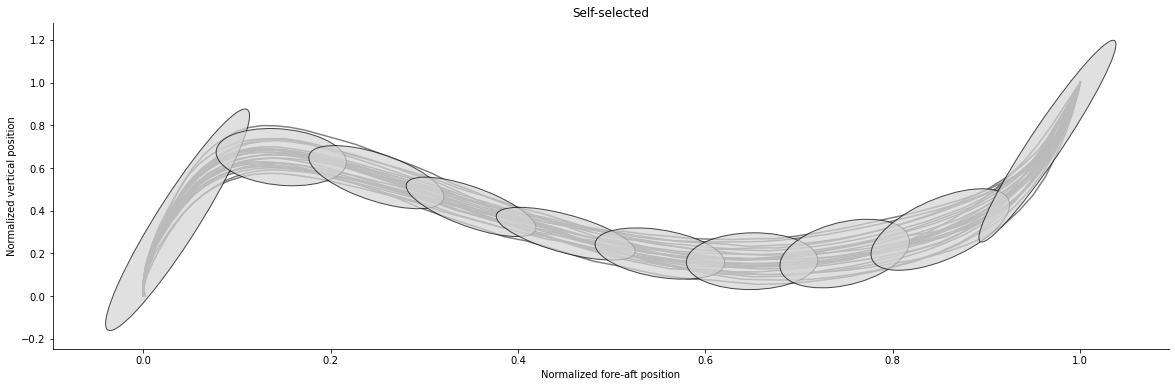

<Figure size 432x288 with 0 Axes>

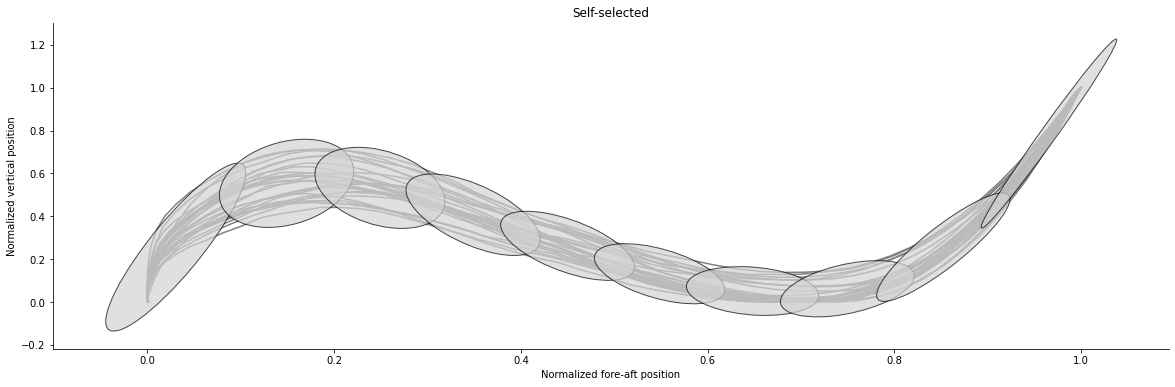

<Figure size 432x288 with 0 Axes>

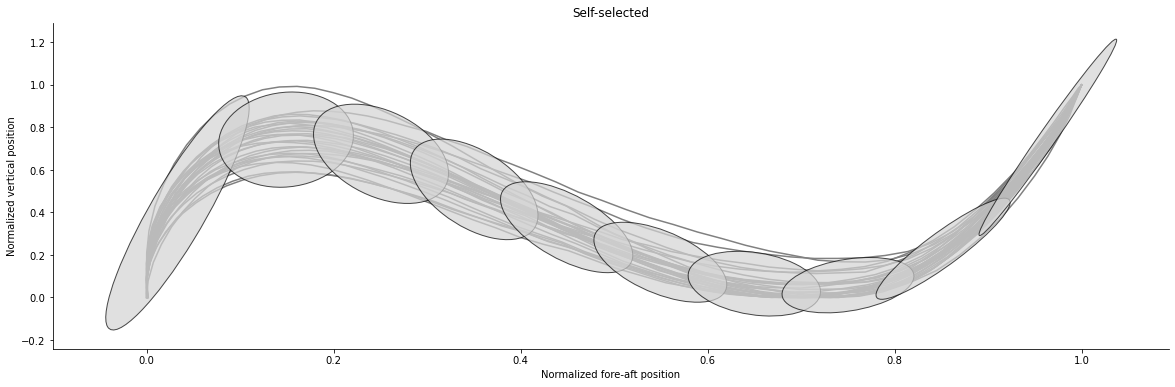

<Figure size 432x288 with 0 Axes>

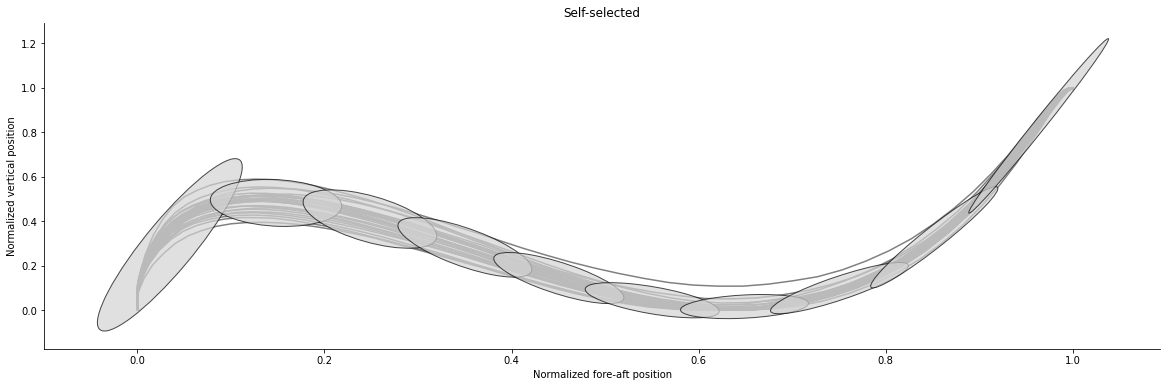

<Figure size 432x288 with 0 Axes>

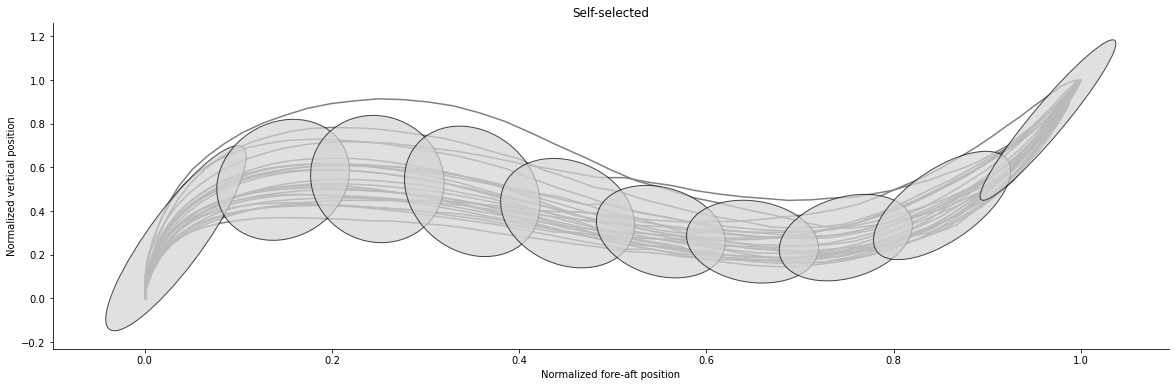

<Figure size 432x288 with 0 Axes>

In [10]:
EV_AB03 = compute_EV_AB_ss(trajectories_AB03, '03', 'R')
EV_AB11 = compute_EV_AB_ss(trajectories_AB11, '11', 'R')
EV_AB21 = compute_EV_AB_ss(trajectories_AB21, '21', 'R')
EV_AB38 = compute_EV_AB_ss(trajectories_AB38, '38', 'R')
EV_AB42 = compute_EV_AB_ss(trajectories_AB42, '42', 'R')

In [11]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106"]
sides = ['L', 'R', 'L', 'R', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2]
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:533: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:533: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:533: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:533: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.

/Users/camillefrayssinhes/INSPIRE LAB/src/bilateral_cyclogram.py:533: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend

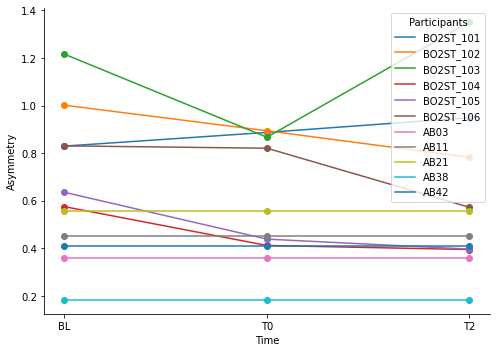

In [12]:
A_BL, A_T0, A_T2 = compute_asymmetry_ss_plot_AB(trajectories_BL, angles_BL, trajectories_T0, angles_T0, trajectories_T2, angles_T2, trajectories_AB, angles_AB, plot=True)

# 11. ACC:<a class="anchor" id="sect_11"></a>
[Back to table of contents](#TOC)

Field-Fote et al. characterised intra-limb coordination as the capacity to generate a consistent pattern of hip-knee coupling across multiple gait cycles. They introduced the Angular Component of the Coefficient of Correspondence (ACC), which gauges the overall variability of the knee-hip relationship.

Cyclograms were computed using the normalised hip and knee flexion/extension angles during treadmill walking, and the within-subject cycle-to-cycle consistency of these cyclograms was quantified using the ACC. AB control subjects, walking at their preferred speed, exhibited typical cyclogram characteristics, including knee extension at initial contact, slight hip flexion at initial contact, weight acceptance after initial contact, hip extension at terminal stance, extensive knee extension at mid-swing, and low variability between gait cycles. iSCI subjects may show deviations in one or more properties of the cyclogram with varying degrees of alteration. The ACC was calculated for each trial, and the mean ACC across all the trials conducted at the same speed was determined.

***

Compute ACC for the left and right legs for all iSCI participants at all time points.


In [563]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
trajectories_F1 = [trajectories_101_F1, trajectories_102_F1, trajectories_103_F1, trajectories_104_F1, trajectories_105_F1, trajectories_106_F1]
trajectories_F4 = [trajectories_101_F4, trajectories_102_F4, trajectories_103_F4, trajectories_104_F4, trajectories_105_F4, trajectories_106_F4, trajectories_109_F4]
trajectories_F8 = [trajectories_101_F8, trajectories_102_F8, trajectories_103_F8, trajectories_104_F8, trajectories_105_F8, trajectories_106_F8, trajectories_109_F8]
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0 = [angles_101_T0, angles_102_T0, angles_103_T0, angles_104_T0, angles_105_T0, angles_106_T0, angles_109_T0]
angles_T1 = [angles_101_T1, angles_102_T1, angles_103_T1, angles_104_T1, angles_105_T1, angles_106_T1, angles_109_T1]
angles_T2 = [angles_101_T2, angles_102_T2, angles_103_T2, angles_104_T2, angles_105_T2, angles_106_T2, angles_109_T2]
angles_F1 = [angles_101_F1, angles_102_F1, angles_103_F1, angles_104_F1, angles_105_F1, angles_106_F1]
angles_F4 = [angles_101_F4, angles_102_F4, angles_103_F4, angles_104_F4, angles_105_F4, angles_106_F4, angles_109_F4]
angles_F8 = [angles_101_F8, angles_102_F8, angles_103_F8, angles_104_F8, angles_105_F8, angles_106_F8, angles_109_F8]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

# compute ACC for all participants
ACC_L_BL = []; ACC_L_T0 = []; ACC_L_T1 = []; ACC_L_T2 = []; ACC_L_F1 = []; ACC_L_F4 = []; ACC_L_F8 = []
ACC_R_BL = []; ACC_R_T0 = []; ACC_R_T1 = []; ACC_R_T2 = []; ACC_R_F1 = []; ACC_R_F4 = []; ACC_R_F8 = []
for i in range(len(IDs)):
    # left
    ACC_L_BL_i = compute_mean_std_ACC(trajectories_BL[i], angles_BL[i], IDs[i], 'L')
    ACC_L_T0_i = compute_mean_std_ACC(trajectories_T0[i], angles_T0[i], IDs[i], 'L', T0=True)
    ACC_L_T1_i = compute_mean_std_ACC(trajectories_T1[i], angles_T1[i], IDs[i], 'L', T1=True)
    ACC_L_T2_i = compute_mean_std_ACC(trajectories_T2[i], angles_T2[i], IDs[i], 'L', T2=True)
    if (IDs[i]!="BO2ST_109"):
        ACC_L_F1_i = compute_mean_std_ACC(trajectories_F1[i], angles_F1[i], IDs[i], 'L')
    else:
        ACC_L_F1_i = np.nan
    ACC_L_F4_i = compute_mean_std_ACC(trajectories_F4[i], angles_F4[i], IDs[i], 'L')
    ACC_L_F8_i = compute_mean_std_ACC(trajectories_F8[i], angles_F8[i], IDs[i], 'L')
    ACC_L_BL.append(float(np.squeeze(ACC_L_BL_i[0])))
    ACC_L_T0.append(float(np.squeeze(ACC_L_T0_i[0])))
    ACC_L_T1.append(float(np.squeeze(ACC_L_T1_i[0])))
    ACC_L_T2.append(float(np.squeeze(ACC_L_T2_i[0])))
    if (IDs[i]!="BO2ST_109"):
        ACC_L_F1.append(float(np.squeeze(ACC_L_F1_i[0])))
    else:
        ACC_L_F1.append(ACC_L_F1_i)
    ACC_L_F4.append(float(np.squeeze(ACC_L_F4_i[0])))
    ACC_L_F8.append(float(np.squeeze(ACC_L_F8_i[0])))
    # right
    ACC_R_BL_i = compute_mean_std_ACC(trajectories_BL[i], angles_BL[i], IDs[i], 'R')
    ACC_R_T0_i = compute_mean_std_ACC(trajectories_T0[i], angles_T0[i], IDs[i], 'R', T0=True)
    ACC_R_T1_i = compute_mean_std_ACC(trajectories_T1[i], angles_T1[i], IDs[i], 'R', T1=True)
    ACC_R_T2_i = compute_mean_std_ACC(trajectories_T2[i], angles_T2[i], IDs[i], 'R', T2=True)
    if (IDs[i]!="BO2ST_109"):
        ACC_R_F1_i = compute_mean_std_ACC(trajectories_F1[i], angles_F1[i], IDs[i], 'R')
    else:
        ACC_R_F1_i = np.nan
    ACC_R_F4_i = compute_mean_std_ACC(trajectories_F4[i], angles_F4[i], IDs[i], 'R')
    ACC_R_F8_i = compute_mean_std_ACC(trajectories_F8[i], angles_F8[i], IDs[i], 'R')
    ACC_R_BL.append(float(np.squeeze(ACC_R_BL_i[0])))
    ACC_R_T0.append(float(np.squeeze(ACC_R_T0_i[0])))
    ACC_R_T1.append(float(np.squeeze(ACC_R_T1_i[0])))
    ACC_R_T2.append(float(np.squeeze(ACC_R_T2_i[0])))
    if (IDs[i]!="BO2ST_109"):
        ACC_R_F1.append(float(np.squeeze(ACC_R_F1_i[0])))
    else:
        ACC_R_F1.append(ACC_R_F1_i)
    ACC_R_F4.append(float(np.squeeze(ACC_R_F4_i[0])))
    ACC_R_F8.append(float(np.squeeze(ACC_R_F8_i[0])))
    
# write the ACC in xcl file
ACCs = pd.DataFrame([[ACC_L_BL[0], ACC_L_T0[0], ACC_L_T1[0], ACC_L_T2[0], ACC_L_F1[0], ACC_L_F4[0], ACC_L_F8[0], ACC_R_BL[0], ACC_R_T0[0], ACC_R_T1[0], ACC_R_T2[0], ACC_R_F1[0], ACC_R_F4[0], ACC_R_F8[0]],
                     [ACC_L_BL[1], ACC_L_T0[1], ACC_L_T1[1], ACC_L_T2[1], ACC_L_F1[1], ACC_L_F4[1], ACC_L_F8[1], ACC_R_BL[1], ACC_R_T0[1], ACC_R_T1[1], ACC_R_T2[1], ACC_R_F1[1], ACC_R_F4[1], ACC_R_F8[1]],
                     [ACC_L_BL[2], ACC_L_T0[2], ACC_L_T1[2], ACC_L_T2[2], ACC_L_F1[2], ACC_L_F4[2], ACC_L_F8[2], ACC_R_BL[2], ACC_R_T0[2], ACC_R_T1[2], ACC_R_T2[2], ACC_R_F1[2], ACC_R_F4[2], ACC_R_F8[2]],
                     [ACC_L_BL[3], ACC_L_T0[3], ACC_L_T1[3], ACC_L_T2[3], ACC_L_F1[3], ACC_L_F4[3], ACC_L_F8[3], ACC_R_BL[3], ACC_R_T0[3], ACC_R_T1[3], ACC_R_T2[3], ACC_R_F1[3], ACC_R_F4[3], ACC_R_F8[3]],
                     [ACC_L_BL[4], ACC_L_T0[4], ACC_L_T1[4], ACC_L_T2[4], ACC_L_F1[4], ACC_L_F4[4], ACC_L_F8[4], ACC_R_BL[4], ACC_R_T0[4], ACC_R_T1[4], ACC_R_T2[4], ACC_R_F1[4], ACC_R_F4[4], ACC_R_F8[4]],
                     [ACC_L_BL[5], ACC_L_T0[5], ACC_L_T1[5], ACC_L_T2[5], ACC_L_F1[5], ACC_L_F4[5], ACC_L_F8[5], ACC_R_BL[5], ACC_R_T0[5], ACC_R_T1[5], ACC_R_T2[5], ACC_R_F1[5], ACC_R_F4[5], ACC_R_F8[5]],
                     [ACC_L_BL[6], ACC_L_T0[6], ACC_L_T1[6], ACC_L_T2[6], ACC_L_F1[6], ACC_L_F4[6], ACC_L_F8[6], ACC_R_BL[6], ACC_R_T0[6], ACC_R_T1[6], ACC_R_T2[6], ACC_R_F1[6], ACC_R_F4[6], ACC_R_F8[6]]],
                  index=IDs, columns=['ACC_L_BL', 'ACC_L_T0', 'ACC_L_T1', 'ACC_L_T2', 'ACC_L_F1', 'ACC_L_F4', 'ACC_L_F8', 'ACC_R_BL', 'ACC_R_T0', 'ACC_R_T1', 'ACC_R_T2', 'ACC_R_F1', 'ACC_R_F4', 'ACC_R_F8'])                          
ACCs.to_excel('BO2STTrial/ACCs.xlsx') 


/Users/camillefrayssinhes/INSPIRE LAB/src/ACC.py:39: RuntimeWarning:

invalid value encountered in double_scalars

/Users/camillefrayssinhes/INSPIRE LAB/src/ACC.py:44: RuntimeWarning:

invalid value encountered in double_scalars

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



Compute the SI of the ACC.

In [806]:
SI_BL_ACC = []; SI_T0_ACC = []; SI_T1_ACC = []; SI_T2_ACC = []

for i in range(len(IDs)): 
    SI_BL_ACC_i = compute_symmetry_index(ACC_R_BL[i], ACC_L_BL[i])
    SI_T0_ACC_i = compute_symmetry_index(ACC_R_T0[i], ACC_L_T0[i])
    SI_T1_ACC_i = compute_symmetry_index(ACC_R_T1[i], ACC_L_T1[i])
    SI_T2_ACC_i = compute_symmetry_index(ACC_R_T2[i], ACC_L_T2[i])
    SI_BL_ACC.append(SI_BL_ACC_i)
    SI_T0_ACC.append(SI_T0_ACC_i)
    SI_T1_ACC.append(SI_T1_ACC_i)
    SI_T2_ACC.append(SI_T2_ACC_i)
    

# write the walking mechanics and  in xcel file
ACC_SI = pd.DataFrame([[SI_BL_ACC[0], SI_T0_ACC[0], SI_T1_ACC[0], SI_T2_ACC[0]],
                           [SI_BL_ACC[1], SI_T0_ACC[1], SI_T1_ACC[1], SI_T2_ACC[1]],
                           [SI_BL_ACC[2], SI_T0_ACC[2], SI_T1_ACC[2], SI_T2_ACC[2]],
                           [SI_BL_ACC[3], SI_T0_ACC[3], SI_T1_ACC[3], SI_T2_ACC[3]],
                           [SI_BL_ACC[4], SI_T0_ACC[4], SI_T1_ACC[4], SI_T2_ACC[4]],
                           [SI_BL_ACC[5], SI_T0_ACC[5], SI_T1_ACC[5], SI_T2_ACC[5]],
                           [SI_BL_ACC[6], SI_T0_ACC[6], SI_T1_ACC[6], SI_T2_ACC[6]]],
                  index=IDs, columns=['SI_BL_ACC', 'SI_T0_ACC', 'SI_T1_ACC', 'SI_T2_ACC'])                          
ACC_SI.to_excel('BO2STTrial/ACC_SI.xlsx')     

In [955]:
individual_progress_ACC("BO2ST_106", 'L')

Compute the ACC at the new ss speed

In [96]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
trajectories_T1_new_ss = [trajectories_101_T1_new_ss, trajectories_102_T1_new_ss, trajectories_103_T1_new_ss, trajectories_104_T1_new_ss, trajectories_105_T1_new_ss, trajectories_106_T1_new_ss, trajectories_109_T1_new_ss]
trajectories_T2_new_ss = [trajectories_101_T2_new_ss, trajectories_102_T2_new_ss, trajectories_103_T2_new_ss, trajectories_104_T2_new_ss, trajectories_105_T2_new_ss, trajectories_106_T2_new_ss, trajectories_109_T2_new_ss]
angles_BL = [angles_101_BL, angles_102_BL, angles_103_BL, angles_104_BL, angles_105_BL, angles_106_BL, angles_109_BL]
angles_T0_new_ss = [angles_101_T0, angles_102_T0_new_ss, angles_103_T0_new_ss, angles_104_T0_new_ss, angles_105_T0_new_ss, angles_106_T0_new_ss, angles_109_T0_new_ss]
angles_T1_new_ss = [angles_101_T1_new_ss, angles_102_T1_new_ss, angles_103_T1_new_ss, angles_104_T1_new_ss, angles_105_T1_new_ss, angles_106_T1_new_ss, angles_109_T1_new_ss]
angles_T2_new_ss = [angles_101_T2_new_ss, angles_102_T2_new_ss, angles_103_T2_new_ss, angles_104_T2_new_ss, angles_105_T2_new_ss, angles_106_T2_new_ss, angles_109_T2_new_ss]


# compute ACC at the new ss speed for all participants
ACC_L_BL_new_ss = []; ACC_L_T0_new_ss = []; ACC_L_T1_new_ss = []; ACC_L_T2_new_ss = []
ACC_R_BL_new_ss = []; ACC_R_T0_new_ss = []; ACC_R_T1_new_ss = []; ACC_R_T2_new_ss = []
for i in range(len(IDs)):
    print(IDs[i])
    # left
    ACC_L_BL_i = compute_mean_std_ACC(trajectories_BL[i], angles_BL[i], IDs[i], 'L')
    if (i==0):
        ACC_L_T0_i = compute_mean_std_ACC(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], 'L', new_ss=False, T0=True)
    else:    
        ACC_L_T0_i = compute_mean_std_ACC(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], 'L', new_ss=True, T0=True)
    ACC_L_T1_i = compute_mean_std_ACC(trajectories_T1_new_ss[i], angles_T1_new_ss[i], IDs[i], 'L', new_ss=True, T1=True)
    ACC_L_T2_i = compute_mean_std_ACC(trajectories_T2_new_ss[i], angles_T2_new_ss[i], IDs[i], 'L', new_ss=True, T2=True)
    ACC_L_BL_new_ss.append(float(np.squeeze(ACC_L_BL_i[0])))
    ACC_L_T0_new_ss.append(float(np.squeeze(ACC_L_T0_i[0])))
    ACC_L_T1_new_ss.append(float(np.squeeze(ACC_L_T1_i[0])))
    ACC_L_T2_new_ss.append(float(np.squeeze(ACC_L_T2_i[0])))
    # right
    ACC_R_BL_i = compute_mean_std_ACC(trajectories_BL[i], angles_BL[i], IDs[i], 'R')
    if (i==0):
        ACC_R_T0_i = compute_mean_std_ACC(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], 'R', new_ss=False, T0=True)
    else:    
        ACC_R_T0_i = compute_mean_std_ACC(trajectories_T0_new_ss[i], angles_T0_new_ss[i], IDs[i], 'R', new_ss=True, T0=True)
    ACC_R_T1_i = compute_mean_std_ACC(trajectories_T1_new_ss[i], angles_T1_new_ss[i], IDs[i], 'R', new_ss=True, T1=True)
    ACC_R_T2_i = compute_mean_std_ACC(trajectories_T2_new_ss[i], angles_T2_new_ss[i], IDs[i], 'R', new_ss=True, T2=True)
    ACC_R_BL_new_ss.append(float(np.squeeze(ACC_R_BL_i[0])))
    ACC_R_T0_new_ss.append(float(np.squeeze(ACC_R_T0_i[0])))
    ACC_R_T1_new_ss.append(float(np.squeeze(ACC_R_T1_i[0])))
    ACC_R_T2_new_ss.append(float(np.squeeze(ACC_R_T2_i[0])))
    
# write the ACC in xcl file
ACCs_new_ss = pd.DataFrame([[ACC_L_BL_new_ss[0], ACC_L_T0_new_ss[0], ACC_L_T1_new_ss[0], ACC_L_T2_new_ss[0], ACC_R_BL_new_ss[0], ACC_R_T0_new_ss[0], ACC_R_T1_new_ss[0], ACC_R_T2_new_ss[0]],
                    [ACC_L_BL_new_ss[1], ACC_L_T0_new_ss[1], ACC_L_T1_new_ss[1], ACC_L_T2_new_ss[1], ACC_R_BL_new_ss[1], ACC_R_T0_new_ss[1], ACC_R_T1_new_ss[1], ACC_R_T2_new_ss[1]],
                    [ACC_L_BL_new_ss[2], ACC_L_T0_new_ss[2], ACC_L_T1_new_ss[2], ACC_L_T2_new_ss[2], ACC_R_BL_new_ss[2], ACC_R_T0_new_ss[2], ACC_R_T1_new_ss[2], ACC_R_T2_new_ss[2]],
                    [ACC_L_BL_new_ss[3], ACC_L_T0_new_ss[3], ACC_L_T1_new_ss[3], ACC_L_T2_new_ss[3], ACC_R_BL_new_ss[3], ACC_R_T0_new_ss[3], ACC_R_T1_new_ss[3], ACC_R_T2_new_ss[3]],
                    [ACC_L_BL_new_ss[4], ACC_L_T0_new_ss[4], ACC_L_T1_new_ss[4], ACC_L_T2_new_ss[4], ACC_R_BL_new_ss[4], ACC_R_T0_new_ss[4], ACC_R_T1_new_ss[4], ACC_R_T2_new_ss[4]],
                    [ACC_L_BL_new_ss[5], ACC_L_T0_new_ss[5], ACC_L_T1_new_ss[5], ACC_L_T2_new_ss[5], ACC_R_BL_new_ss[5], ACC_R_T0_new_ss[5], ACC_R_T1_new_ss[5], ACC_R_T2_new_ss[5]],
                    [ACC_L_BL_new_ss[6], ACC_L_T0_new_ss[6], ACC_L_T1_new_ss[6], ACC_L_T2_new_ss[6], ACC_R_BL_new_ss[6], ACC_R_T0_new_ss[6], ACC_R_T1_new_ss[6], ACC_R_T2_new_ss[6]]],
                  index=IDs, columns=['ACC_L_BL', 'ACC_L_T0', 'ACC_L_T1', 'ACC_L_T2', 'ACC_R_BL', 'ACC_R_T0', 'ACC_R_T1', 'ACC_R_T2'])                          
ACCs_new_ss.to_excel('BO2STTrial/ACCs_new_ss.xlsx') 


BO2ST_101
BO2ST_102


/Users/camillefrayssinhes/INSPIRE LAB/src/ACC.py:39: RuntimeWarning:

invalid value encountered in double_scalars

/Users/camillefrayssinhes/INSPIRE LAB/src/ACC.py:44: RuntimeWarning:

invalid value encountered in double_scalars

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning:

Mean of empty slice.

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



BO2ST_103
BO2ST_104
BO2ST_105
BO2ST_106
BO2ST_109


Compute the SI of the ACC at the new ss 

In [807]:
SI_BL_ACC_new_ss = []; SI_T0_ACC_new_ss = []; SI_T1_ACC_new_ss = []; SI_T2_ACC_new_ss = []

for i in range(len(IDs)): 
    SI_BL_ACC_i = compute_symmetry_index(ACC_R_BL_new_ss[i], ACC_L_BL_new_ss[i])
    SI_T0_ACC_i = compute_symmetry_index(ACC_R_T0_new_ss[i], ACC_L_T0_new_ss[i])
    SI_T1_ACC_i = compute_symmetry_index(ACC_R_T1_new_ss[i], ACC_L_T1_new_ss[i])
    SI_T2_ACC_i = compute_symmetry_index(ACC_R_T2_new_ss[i], ACC_L_T2_new_ss[i])
    SI_BL_ACC_new_ss.append(SI_BL_ACC_i)
    SI_T0_ACC_new_ss.append(SI_T0_ACC_i)
    SI_T1_ACC_new_ss.append(SI_T1_ACC_i)
    SI_T2_ACC_new_ss.append(SI_T2_ACC_i)
    

# write the walking mechanics and  in xcel file
ACC_SI_new_ss = pd.DataFrame([[SI_BL_ACC_new_ss[0], SI_T0_ACC_new_ss[0], SI_T1_ACC_new_ss[0], SI_T2_ACC_new_ss[0]],
                           [SI_BL_ACC_new_ss[1], SI_T0_ACC_new_ss[1], SI_T1_ACC_new_ss[1], SI_T2_ACC_new_ss[1]],
                           [SI_BL_ACC_new_ss[2], SI_T0_ACC_new_ss[2], SI_T1_ACC_new_ss[2], SI_T2_ACC_new_ss[2]],
                           [SI_BL_ACC_new_ss[3], SI_T0_ACC_new_ss[3], SI_T1_ACC_new_ss[3], SI_T2_ACC_new_ss[3]],
                           [SI_BL_ACC_new_ss[4], SI_T0_ACC_new_ss[4], SI_T1_ACC_new_ss[4], SI_T2_ACC_new_ss[4]],
                           [SI_BL_ACC_new_ss[5], SI_T0_ACC_new_ss[5], SI_T1_ACC_new_ss[5], SI_T2_ACC_new_ss[5]],
                           [SI_BL_ACC_new_ss[6], SI_T0_ACC_new_ss[6], SI_T1_ACC_new_ss[6], SI_T2_ACC_new_ss[6]]],
                  index=IDs, columns=['SI_BL_ACC', 'SI_T0_ACC', 'SI_T1_ACC', 'SI_T2_ACC'])                          
ACC_SI_new_ss.to_excel('BO2STTrial/ACC_SI_new_ss.xlsx')     

Plot

In [1657]:
# read xcl files
ACC_file_name = ("BO2STTrial/ACCs.xlsx")
ACC_xcl = pd.read_excel(ACC_file_name, header = [0], index_col = [0])
ACC_new_ss_file_name = ("BO2STTrial/ACCs_new_ss.xlsx")
ACC_new_ss_xcl = pd.read_excel(ACC_new_ss_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
side='L'
x = ['BL', 'T0', 'T1', 'T2']
ACC_y = ACC_xcl.loc[ID][['ACC_'+side+'_BL', 'ACC_'+side+'_T0', 'ACC_'+side+'_T1', 'ACC_'+side+'_T2']] # relative to T0?
ACC_y_new_ss = ACC_new_ss_xcl.loc[ID][['ACC_'+side+'_BL', 'ACC_'+side+'_T0', 'ACC_'+side+'_T1', 'ACC_'+side+'_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'ACC')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=ACC_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=ACC_y_new_ss, line=dict(color='grey')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

Plot Symmetry Index

In [815]:
# read xcl files
SI_ACC_file_name = ("BO2STTrial/ACC_SI.xlsx")
SI_ACC_xcl = pd.read_excel(SI_ACC_file_name, header = [0], index_col = [0])
SI_ACC_new_ss_file_name = ("BO2STTrial/ACC_SI_new_ss.xlsx")
SI_ACC_new_ss_xcl = pd.read_excel(SI_ACC_new_ss_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
x = ['BL', 'T0', 'T1', 'T2']
SI_ACC_y = SI_ACC_xcl.loc[ID][['SI_BL_ACC', 'SI_T0_ACC', 'SI_T1_ACC', 'SI_T2_ACC']] # relative to T0?
SI_ACC_y_new_ss = SI_ACC_new_ss_xcl.loc[ID][['SI_BL_ACC', 'SI_T0_ACC', 'SI_T1_ACC', 'SI_T2_ACC']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'ACC')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=SI_ACC_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=SI_ACC_y_new_ss, line=dict(color='grey')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

# 12. Gait cycle phases:<a class="anchor" id="sect_12"></a>
[Back to table of contents](#TOC)

***


* compute double support phase duration (in % of gait cycle) for all subjects

In [567]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L'] # MA side
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
trajectories_F1 = [trajectories_101_F1, trajectories_102_F1, trajectories_103_F1, trajectories_104_F1, trajectories_105_F1, trajectories_106_F1]
trajectories_F4 = [trajectories_101_F4, trajectories_102_F4, trajectories_103_F4, trajectories_104_F4, trajectories_105_F4, trajectories_106_F4, trajectories_109_F4]
trajectories_F8 = [trajectories_101_F8, trajectories_102_F8, trajectories_103_F8, trajectories_104_F8, trajectories_105_F8, trajectories_106_F8, trajectories_109_F8]
# compute stance/swing duration of the MA side in % of gait cycle for all participants
stance_BL = []; stance_T0 = []; stance_T1 = []; stance_T2 = []; stance_F1 = []; stance_F4 = []; stance_F8 = []
swing_BL = []; swing_T0 = []; swing_T1 = []; swing_T2 = []; swing_F1 = []; swing_F4 = []; swing_F8 = []
for i in range(len(IDs)): 
    stance_perc_i_BL, swing_perc_i_BL, std_i = compute_stance_swing_durations(trajectories_BL[i], IDs[i], sides[i])
    stance_perc_i_T0, swing_perc_i_T0, std_i = compute_stance_swing_durations(trajectories_T0[i], IDs[i], sides[i], T0=True)
    stance_perc_i_T1, swing_perc_i_T1, std_i = compute_stance_swing_durations(trajectories_T1[i], IDs[i], sides[i], T1=True)
    stance_perc_i_T2, swing_perc_i_T2, std_i = compute_stance_swing_durations(trajectories_T2[i], IDs[i], sides[i], T2=True)
    if (IDs[i] !='BO2ST_109'):
        stance_perc_i_F1, swing_perc_i_F1, std_i = compute_stance_swing_durations(trajectories_F1[i], IDs[i], sides[i])
    stance_perc_i_F4, swing_perc_i_F4, std_i = compute_stance_swing_durations(trajectories_F4[i], IDs[i], sides[i])
    stance_perc_i_F8, swing_perc_i_F8, std_i = compute_stance_swing_durations(trajectories_F8[i], IDs[i], sides[i])
    stance_BL.append(float(np.squeeze(stance_perc_i_BL))); swing_BL.append(float(np.squeeze(swing_perc_i_BL)))
    stance_T0.append(float(np.squeeze(stance_perc_i_T0))); swing_T0.append(float(np.squeeze(swing_perc_i_T0)))
    stance_T1.append(float(np.squeeze(stance_perc_i_T1))); swing_T1.append(float(np.squeeze(swing_perc_i_T1)))
    stance_T2.append(float(np.squeeze(stance_perc_i_T2))); swing_T2.append(float(np.squeeze(swing_perc_i_T2)))
    if (IDs[i] !='BO2ST_109'):
        stance_F1.append(float(np.squeeze(stance_perc_i_F1))); swing_F1.append(float(np.squeeze(swing_perc_i_F1)))
    else:
        stance_F1.append(np.nan); swing_F1.append(np.nan)
    stance_F4.append(float(np.squeeze(stance_perc_i_F4))); swing_F4.append(float(np.squeeze(swing_perc_i_F4)))
    stance_F8.append(float(np.squeeze(stance_perc_i_F8))); swing_F8.append(float(np.squeeze(swing_perc_i_F8)))
    
# write the walking mechanics and  in xcel file
gait_cycle_phases = pd.DataFrame([[stance_BL[0], stance_T0[0], stance_T1[0], stance_T2[0], stance_F1[0], stance_F4[0], stance_F8[0], swing_BL[0], swing_T0[0], swing_T1[0], swing_T2[0], swing_F1[0], swing_F4[0], swing_F8[0]],
                                  [stance_BL[1], stance_T0[1], stance_T1[1], stance_T2[1], stance_F1[1], stance_F4[1], stance_F8[1], swing_BL[1], swing_T0[1], swing_T1[1], swing_T2[1], swing_F1[1], swing_F4[1], swing_F8[1]],
                                  [stance_BL[2], stance_T0[2], stance_T1[2], stance_T2[2], stance_F1[2], stance_F4[2], stance_F8[2], swing_BL[2], swing_T0[2], swing_T1[2], swing_T2[2], swing_F1[2], swing_F4[2], swing_F8[2]],
                                  [stance_BL[3], stance_T0[3], stance_T1[3], stance_T2[3], stance_F1[3], stance_F4[3], stance_F8[3], swing_BL[3], swing_T0[3], swing_T1[3], swing_T2[3], swing_F1[3], swing_F4[3], swing_F8[3]],
                                  [stance_BL[4], stance_T0[4], stance_T1[4], stance_T2[4], stance_F1[4], stance_F4[4], stance_F8[4], swing_BL[4], swing_T0[4], swing_T1[4], swing_T2[4], swing_F1[4], swing_F4[4], swing_F8[4]],
                                  [stance_BL[5], stance_T0[5], stance_T1[5], stance_T2[5], stance_F1[5], stance_F4[5], stance_F8[5], swing_BL[5], swing_T0[5], swing_T1[5], swing_T2[5], swing_F1[5], swing_F4[5], swing_F8[5]],
                                  [stance_BL[6], stance_T0[6], stance_T1[6], stance_T2[6], stance_F1[6], stance_F4[6], stance_F8[6], swing_BL[6], swing_T0[6], swing_T1[6], swing_T2[6], swing_F1[6], swing_F4[6], swing_F8[6]]],
                  index=IDs, columns=['stance_BL', 'stance_T0', 'stance_T1', 'stance_T2', 'stance_F1', 'stance_F4', 'stance_F8', 'swing_BL', 'swing_T0', 'swing_T1', 'swing_T2', 'swing_F1', 'swing_F4', 'swing_F8'])                          
gait_cycle_phases.to_excel('BO2STTrial/gait_cycle_phases.xlsx')     

compute new ss 

In [1669]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
trajectories_T1_new_ss = [trajectories_101_T1_new_ss, trajectories_102_T1_new_ss, trajectories_103_T1_new_ss, trajectories_104_T1_new_ss, trajectories_105_T1_new_ss, trajectories_106_T1_new_ss, trajectories_109_T1_new_ss]
trajectories_T2_new_ss = [trajectories_101_T2_new_ss, trajectories_102_T2_new_ss, trajectories_103_T2_new_ss, trajectories_104_T2_new_ss, trajectories_105_T2_new_ss, trajectories_106_T2_new_ss, trajectories_109_T2_new_ss]

# compute stance/swing duration of the MA side in % of gait cycle for all participants at the new_ss
stance_BL = []; stance_T0 = []; stance_T1 = []; stance_T2 = []; stance_F1 = []; stance_F4 = []; stance_F8 = []
swing_BL = []; swing_T0 = []; swing_T1 = []; swing_T2 = []; swing_F1 = []; swing_F4 = []; swing_F8 = []
for i in range(len(IDs)): 
    stance_perc_i_BL, swing_perc_i_BL, std_i = compute_stance_swing_durations(trajectories_BL[i], IDs[i], sides[i])
    if (i==0):
        stance_perc_i_T0, swing_perc_i_T0, std_i = compute_stance_swing_durations(trajectories_T0_new_ss[i], IDs[i], sides[i], new_ss = False, T0 = True)
    else:
        stance_perc_i_T0, swing_perc_i_T0, std_i = compute_stance_swing_durations(trajectories_T0_new_ss[i], IDs[i], sides[i], new_ss = True, T0 = True)
    stance_perc_i_T1, swing_perc_i_T1, std_i = compute_stance_swing_durations(trajectories_T1_new_ss[i], IDs[i], sides[i], new_ss = True, T1 = True)
    stance_perc_i_T2, swing_perc_i_T2, std_i = compute_stance_swing_durations(trajectories_T2_new_ss[i], IDs[i], sides[i], new_ss = True, T2 = True)
    stance_BL.append(float(np.squeeze(stance_perc_i_BL))); swing_BL.append(float(np.squeeze(swing_perc_i_BL)))
    stance_T0.append(float(np.squeeze(stance_perc_i_T0))); swing_T0.append(float(np.squeeze(swing_perc_i_T0)))
    stance_T1.append(float(np.squeeze(stance_perc_i_T1))); swing_T1.append(float(np.squeeze(swing_perc_i_T1)))
    stance_T2.append(float(np.squeeze(stance_perc_i_T2))); swing_T2.append(float(np.squeeze(swing_perc_i_T2)))
    
# write the walking mechanics and  in xcel file
gait_cycle_phases_new_ss = pd.DataFrame([[stance_BL[0], stance_T0[0], stance_T1[0], stance_T2[0], swing_BL[0], swing_T0[0], swing_T1[0], swing_T2[0]],
                                         [stance_BL[1], stance_T0[1], stance_T1[1], stance_T2[1], swing_BL[1], swing_T0[1], swing_T1[1], swing_T2[1]],
                                         [stance_BL[2], stance_T0[2], stance_T1[2], stance_T2[2], swing_BL[2], swing_T0[2], swing_T1[2], swing_T2[2]],
                                         [stance_BL[3], stance_T0[3], stance_T1[3], stance_T2[3], swing_BL[3], swing_T0[3], swing_T1[3], swing_T2[3]],
                                         [stance_BL[4], stance_T0[4], stance_T1[4], stance_T2[4], swing_BL[4], swing_T0[4], swing_T1[4], swing_T2[4]],
                                         [stance_BL[5], stance_T0[5], stance_T1[5], stance_T2[5], swing_BL[5], swing_T0[5], swing_T1[5], swing_T2[5]],
                                         [stance_BL[6], stance_T0[6], stance_T1[6], stance_T2[6], swing_BL[6], swing_T0[6], swing_T1[6], swing_T2[6]]],
                  index=IDs, columns=['stance_BL', 'stance_T0', 'stance_T1', 'stance_T2', 'swing_BL', 'swing_T0', 'swing_T1', 'swing_T2'])                          
gait_cycle_phases_new_ss.to_excel('BO2STTrial/gait_cycle_phases_new_ss.xlsx')     

AB

In [493]:
IDs_AB = ["AB03", "AB11", "AB21", "AB38", "AB42"]
numbers_AB = ['03', '11', '21', '38', '42']
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

# compute stance/swing duration of the MA side in % of gait cycle for all participants at the new_ss
stance_BL = []; stance_T0 = []; stance_T1 = []; stance_T2 = []; stance_F1 = []; stance_F4 = []; stance_F8 = []
swing_BL = []; swing_T0 = []; swing_T1 = []; swing_T2 = []; swing_F1 = []; swing_F4 = []; swing_F8 = []
for i in range(len(IDs_AB)): 
    stance_perc_i_BL, swing_perc_i_BL, std_i = compute_stance_swing_durations_AB(trajectories_AB[i], numbers_AB[i], sides[i])
    stance_BL.append(float(np.squeeze(stance_perc_i_BL))); swing_BL.append(float(np.squeeze(swing_perc_i_BL)))
    stance_T0.append(float(np.squeeze(stance_perc_i_BL))); swing_T0.append(float(np.squeeze(swing_perc_i_BL)))
    stance_T1.append(float(np.squeeze(stance_perc_i_BL))); swing_T1.append(float(np.squeeze(swing_perc_i_BL)))
    stance_T2.append(float(np.squeeze(stance_perc_i_BL))); swing_T2.append(float(np.squeeze(swing_perc_i_BL)))
    stance_F1.append(float(np.squeeze(stance_perc_i_BL))); swing_F1.append(float(np.squeeze(swing_perc_i_BL)))
    stance_F4.append(float(np.squeeze(stance_perc_i_BL))); swing_F4.append(float(np.squeeze(swing_perc_i_BL)))
    stance_F8.append(float(np.squeeze(stance_perc_i_BL))); swing_F8.append(float(np.squeeze(swing_perc_i_BL)))
    
# write the walking mechanics and  in xcel file
gait_cycle_phases_AB = pd.DataFrame([[stance_BL[0], stance_T0[0], stance_T1[0], stance_T2[0], stance_F1[0], stance_F4[0], stance_F8[0], swing_BL[0], swing_T0[0], swing_T1[0], swing_T2[0], swing_F1[0], swing_F4[0], swing_F8[0]],
                                     [stance_BL[1], stance_T0[1], stance_T1[1], stance_T2[1], stance_F1[1], stance_F4[1], stance_F8[1], swing_BL[1], swing_T0[1], swing_T1[1], swing_T2[1], swing_F1[1], swing_F4[1], swing_F8[1]],
                                     [stance_BL[2], stance_T0[2], stance_T1[2], stance_T2[2], stance_F1[2], stance_F4[2], stance_F8[2], swing_BL[2], swing_T0[2], swing_T1[2], swing_T2[2], swing_F1[2], swing_F4[2], swing_F8[2]],
                                     [stance_BL[3], stance_T0[3], stance_T1[3], stance_T2[3], stance_F1[3], stance_F4[3], stance_F8[3], swing_BL[3], swing_T0[3], swing_T1[3], swing_T2[3], swing_F1[3], swing_F4[3], swing_F8[3]],
                                     [stance_BL[4], stance_T0[4], stance_T1[4], stance_T2[4], stance_F1[4], stance_F4[4], stance_F8[4], swing_BL[4], swing_T0[4], swing_T1[4], swing_T2[4], swing_F1[4], swing_F4[4], swing_F8[4]]],
                  index=IDs_AB, columns=['stance_BL', 'stance_T0', 'stance_T1', 'stance_T2', 'stance_F1', 'stance_F4', 'stance_F8', 'swing_BL', 'swing_T0', 'swing_T1', 'swing_T2', 'swing_F1', 'swing_F4', 'swing_F8'])                          
gait_cycle_phases_AB.to_excel('BO2STTrial/gait_cycle_phases_AB.xlsx')     

stance phase plot

In [1670]:
# read xcl files
stance_file_name = ("BO2STTrial/gait_cycle_phases.xlsx")
stance_xcl = pd.read_excel(stance_file_name, header = [0], index_col = [0])
stance_new_ss_file_name = ("BO2STTrial/gait_cycle_phases_new_ss.xlsx")
stance_new_ss_xcl = pd.read_excel(stance_new_ss_file_name, header = [0], index_col = [0])
stance_AB_file_name = ("BO2STTrial/gait_cycle_phases_AB.xlsx")
stance_AB_xcl = pd.read_excel(stance_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
stance_y = stance_xcl.loc[ID][['stance_BL', 'stance_T0', 'stance_T1', 'stance_T2']] # relative to T0?
stance_y_new_ss = stance_new_ss_xcl.loc[ID][['stance_BL', 'stance_T0', 'stance_T1', 'stance_T2']] # relative to T0?
stance_y_AB = stance_AB_xcl.loc[ID_AB][['stance_BL', 'stance_T0', 'stance_T1', 'stance_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'Stance')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=stance_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=stance_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = stance_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

# 13. Step length, step width & cadence:<a class="anchor" id="sect_13"></a>
[Back to table of contents](#TOC)

***


In [564]:
# compute stance/swing duration of the MA side in % of gait cycle for all participants
step_length_L_BL = []; step_length_L_T0 = []; step_length_L_T1 = []; step_length_L_T2 = []; step_length_L_F1 = []; step_length_L_F4 = []; step_length_L_F8 = []
step_length_R_BL = []; step_length_R_T0 = []; step_length_R_T1 = []; step_length_R_T2 = []; step_length_R_F1 = []; step_length_R_F4 = []; step_length_R_F8 = []
step_length_L_std_BL = []; step_length_L_std_T0 = []; step_length_L_std_T1 = []; step_length_L_std_T2 = []; step_length_L_std_F1 = []; step_length_L_std_F4 = []; step_length_L_std_F8 = []
step_length_R_std_BL = []; step_length_R_std_T0 = []; step_length_R_std_T1 = []; step_length_R_std_T2 = []; step_length_R_std_F1 = []; step_length_R_std_F4 = []; step_length_R_std_F8 = []

step_width_L_BL = []; step_width_L_T0 = []; step_width_L_T1 = []; step_width_L_T2 = []; step_width_L_F1 = []; step_width_L_F4 = []; step_width_L_F8 = []
step_width_R_BL = []; step_width_R_T0 = []; step_width_R_T1 = []; step_width_R_T2 = []; step_width_R_F1 = []; step_width_R_F4 = []; step_width_R_F8 = []
step_width_L_std_BL = []; step_width_L_std_T0 = []; step_width_L_std_T1 = []; step_width_L_std_T2 = []; step_width_L_std_F1 = []; step_width_L_std_F4 = []; step_width_L_std_F8 = []
step_width_R_std_BL = []; step_width_R_std_T0 = []; step_width_R_std_T1 = []; step_width_R_std_T2 = []; step_width_R_std_F1 = []; step_width_R_std_F4 = []; step_width_R_std_F8 = []

cadence_BL = []; cadence_T0 = []; cadence_T1 = []; cadence_T2 = []; cadence_F1 = []; cadence_F4 = []; cadence_F8 = [] 

for i in range(len(IDs)): 
    # step length
    step_length_R_i_BL, std_R_i_BL, step_length_L_i_BL, std_L_i_BL = compute_step_length(trajectories_BL[i], IDs[i])
    step_length_R_i_T0, std_R_i_T0, step_length_L_i_T0, std_L_i_T0 = compute_step_length(trajectories_T0[i], IDs[i])
    step_length_R_i_T1, std_R_i_T1, step_length_L_i_T1, std_L_i_T1 = compute_step_length(trajectories_T1[i], IDs[i])
    step_length_R_i_T2, std_R_i_T2, step_length_L_i_T2, std_L_i_T2 = compute_step_length(trajectories_T2[i], IDs[i])
    if (IDs[i] != 'BO2ST_109'):
        step_length_R_i_F1, std_R_i_F1, step_length_L_i_F1, std_L_i_F1 = compute_step_length(trajectories_F1[i], IDs[i])
    step_length_R_i_F4, std_R_i_F4, step_length_L_i_F4, std_L_i_F4 = compute_step_length(trajectories_F4[i], IDs[i])
    step_length_R_i_F8, std_R_i_F8, step_length_L_i_F8, std_L_i_F8 = compute_step_length(trajectories_F8[i], IDs[i])
    step_length_R_BL.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_BL.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_T0.append(float(np.squeeze(step_length_R_i_T0))); step_length_L_T0.append(float(np.squeeze(step_length_L_i_T0)))
    step_length_R_T1.append(float(np.squeeze(step_length_R_i_T1))); step_length_L_T1.append(float(np.squeeze(step_length_L_i_T1)))
    step_length_R_T2.append(float(np.squeeze(step_length_R_i_T2))); step_length_L_T2.append(float(np.squeeze(step_length_L_i_T2)))
    step_length_R_std_BL.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_BL.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_T0.append(float(np.squeeze(std_R_i_T0))); step_length_L_std_T0.append(float(np.squeeze(std_L_i_T0)))
    step_length_R_std_T1.append(float(np.squeeze(std_R_i_T1))); step_length_L_std_T1.append(float(np.squeeze(std_L_i_T1)))
    step_length_R_std_T2.append(float(np.squeeze(std_R_i_T2))); step_length_L_std_T2.append(float(np.squeeze(std_L_i_T2)))
    if (IDs[i] != 'BO2ST_109'):
        step_length_R_F1.append(float(np.squeeze(step_length_R_i_F1))); step_length_L_F1.append(float(np.squeeze(step_length_L_i_F1)))
        step_length_R_std_F1.append(float(np.squeeze(std_R_i_F1))); step_length_L_std_F1.append(float(np.squeeze(std_L_i_F1)))
    else:
        step_length_R_F1.append(np.nan); step_length_L_F1.append(np.nan)
        step_length_R_std_F1.append(np.nan); step_length_L_std_F1.append(np.nan)
    step_length_R_F4.append(float(np.squeeze(step_length_R_i_F4))); step_length_L_F4.append(float(np.squeeze(step_length_L_i_F4)))
    step_length_R_F8.append(float(np.squeeze(step_length_R_i_F8))); step_length_L_F8.append(float(np.squeeze(step_length_L_i_F8)))
    step_length_R_std_F4.append(float(np.squeeze(std_R_i_F4))); step_length_L_std_F4.append(float(np.squeeze(std_L_i_F4)))
    step_length_R_std_F8.append(float(np.squeeze(std_R_i_F8))); step_length_L_std_F8.append(float(np.squeeze(std_L_i_F8)))
    # step width    
    step_width_R_i_BL, step_width_R_std_i_BL, step_width_L_i_BL, step_width_L_std_i_BL = compute_step_width(trajectories_BL[i], IDs[i])
    step_width_R_i_T0, step_width_R_std_i_T0, step_width_L_i_T0, step_width_L_std_i_T0 = compute_step_width(trajectories_T0[i], IDs[i])
    step_width_R_i_T1, step_width_R_std_i_T1, step_width_L_i_T1, step_width_L_std_i_T1 = compute_step_width(trajectories_T1[i], IDs[i])
    step_width_R_i_T2, step_width_R_std_i_T2, step_width_L_i_T2, step_width_L_std_i_T2 = compute_step_width(trajectories_T2[i], IDs[i])
    if (IDs[i] != 'BO2ST_109'):
        step_width_R_i_F1, step_width_R_std_i_F1, step_width_L_i_F1, step_width_L_std_i_F1 = compute_step_width(trajectories_F1[i], IDs[i])
    step_width_R_i_F4, step_width_R_std_i_F4, step_width_L_i_F4, step_width_L_std_i_F4 = compute_step_width(trajectories_F4[i], IDs[i])
    step_width_R_i_F8, step_width_R_std_i_F8, step_width_L_i_F8, step_width_L_std_i_F8 = compute_step_width(trajectories_F8[i], IDs[i])
    step_width_R_BL.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_BL.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_T0.append(float(np.squeeze(step_width_R_i_T0))); step_width_L_T0.append(float(np.squeeze(step_width_L_i_T0)))
    step_width_R_T1.append(float(np.squeeze(step_width_R_i_T1))); step_width_L_T1.append(float(np.squeeze(step_width_L_i_T1)))
    step_width_R_T2.append(float(np.squeeze(step_width_R_i_T2))); step_width_L_T2.append(float(np.squeeze(step_width_L_i_T2)))
    step_width_R_std_BL.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_BL.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_T0.append(float(np.squeeze(step_width_R_std_i_T0))); step_width_L_std_T0.append(float(np.squeeze(step_width_L_std_i_T0)))
    step_width_R_std_T1.append(float(np.squeeze(step_width_R_std_i_T1))); step_width_L_std_T1.append(float(np.squeeze(step_width_L_std_i_T1)))
    step_width_R_std_T2.append(float(np.squeeze(step_width_R_std_i_T2))); step_width_L_std_T2.append(float(np.squeeze(step_width_L_std_i_T2)))
    if (IDs[i] != 'BO2ST_109'):
        step_width_R_F1.append(float(np.squeeze(step_width_R_i_F1))); step_width_L_F1.append(float(np.squeeze(step_width_L_i_F1)))
        step_width_R_std_F1.append(float(np.squeeze(step_width_R_std_i_F1))); step_width_L_std_F1.append(float(np.squeeze(step_width_L_std_i_F1)))
    else:
        step_width_R_F1.append(np.nan); step_width_L_F1.append(np.nan)
        step_width_R_std_F1.append(np.nan); step_width_L_std_F1.append(np.nan)    
    step_width_R_F4.append(float(np.squeeze(step_width_R_i_F4))); step_width_L_F4.append(float(np.squeeze(step_width_L_i_F4)))
    step_width_R_F8.append(float(np.squeeze(step_width_R_i_F8))); step_width_L_F8.append(float(np.squeeze(step_width_L_i_F8)))
    step_width_R_std_F4.append(float(np.squeeze(step_width_R_std_i_F4))); step_width_L_std_F4.append(float(np.squeeze(step_width_L_std_i_F4)))
    step_width_R_std_F8.append(float(np.squeeze(step_width_R_std_i_F8))); step_width_L_std_F8.append(float(np.squeeze(step_width_L_std_i_F8)))
    # cadence
    cadence_i_BL = compute_cadence(trajectories_BL[i], IDs[i])
    cadence_i_T0 = compute_cadence(trajectories_T0[i], IDs[i])
    cadence_i_T1 = compute_cadence(trajectories_T1[i], IDs[i])
    cadence_i_T2 = compute_cadence(trajectories_T2[i], IDs[i])
    if (IDs[i] != 'BO2ST_109'):
        cadence_i_F1 = compute_cadence(trajectories_F1[i], IDs[i])
    cadence_i_F4 = compute_cadence(trajectories_F4[i], IDs[i])
    cadence_i_F8 = compute_cadence(trajectories_F8[i], IDs[i])
    cadence_BL.append(cadence_i_BL)
    cadence_T0.append(cadence_i_T0)
    cadence_T1.append(cadence_i_T1)
    cadence_T2.append(cadence_i_T2)
    if (IDs[i] != 'BO2ST_109'):
        cadence_F1.append(cadence_i_F1)
    else:
        cadence_F1.append(np.nan)    
    cadence_F4.append(cadence_i_F4)
    cadence_F8.append(cadence_i_F8)

    
# write the walking mechanics and  in xcel file
step_length_width_cadence = pd.DataFrame([[step_length_R_BL[0], step_length_R_T0[0], step_length_R_T1[0], step_length_R_T2[0], step_length_R_F1[0], step_length_R_F4[0], step_length_R_F8[0], step_length_L_BL[0], step_length_L_T0[0], step_length_L_T1[0], step_length_L_T2[0], step_length_L_F1[0], step_length_L_F4[0], step_length_L_F8[0], step_width_R_BL[0], step_width_R_T0[0], step_width_R_T1[0], step_width_R_T2[0], step_width_R_F1[0], step_width_R_F4[0], step_width_R_F8[0], step_width_L_BL[0], step_width_L_T0[0], step_width_L_T1[0], step_width_L_T2[0], step_width_L_F1[0], step_width_L_F4[0], step_width_L_F8[0], cadence_BL[0], cadence_T0[0], cadence_T1[0], cadence_T2[0], cadence_F1[0], cadence_F4[0], cadence_F8[0]],
                                          [step_length_R_BL[1], step_length_R_T0[1], step_length_R_T1[1], step_length_R_T2[1], step_length_R_F1[1], step_length_R_F4[1], step_length_R_F8[1], step_length_L_BL[1], step_length_L_T0[1], step_length_L_T1[1], step_length_L_T2[1], step_length_L_F1[1], step_length_L_F4[1], step_length_L_F8[1], step_width_R_BL[1], step_width_R_T0[1], step_width_R_T1[1], step_width_R_T2[1], step_width_R_F1[1], step_width_R_F4[1], step_width_R_F8[1], step_width_L_BL[1], step_width_L_T0[1], step_width_L_T1[1], step_width_L_T2[1], step_width_L_F1[1], step_width_L_F4[1], step_width_L_F8[1], cadence_BL[1], cadence_T0[1], cadence_T1[1], cadence_T2[1], cadence_F1[1], cadence_F4[1], cadence_F8[1]],
                                          [step_length_R_BL[2], step_length_R_T0[2], step_length_R_T1[2], step_length_R_T2[2], step_length_R_F1[2], step_length_R_F4[2], step_length_R_F8[2], step_length_L_BL[2], step_length_L_T0[2], step_length_L_T1[2], step_length_L_T2[2], step_length_L_F1[2], step_length_L_F4[2], step_length_L_F8[2], step_width_R_BL[2], step_width_R_T0[2], step_width_R_T1[2], step_width_R_T2[2], step_width_R_F1[2], step_width_R_F4[2], step_width_R_F8[2], step_width_L_BL[2], step_width_L_T0[2], step_width_L_T1[2], step_width_L_T2[2], step_width_L_F1[2], step_width_L_F4[2], step_width_L_F8[2], cadence_BL[2], cadence_T0[2], cadence_T1[2], cadence_T2[2], cadence_F1[2], cadence_F4[2], cadence_F8[2]],
                                          [step_length_R_BL[3], step_length_R_T0[3], step_length_R_T1[3], step_length_R_T2[3], step_length_R_F1[3], step_length_R_F4[3], step_length_R_F8[3], step_length_L_BL[3], step_length_L_T0[3], step_length_L_T1[3], step_length_L_T2[3], step_length_L_F1[3], step_length_L_F4[3], step_length_L_F8[3], step_width_R_BL[3], step_width_R_T0[3], step_width_R_T1[3], step_width_R_T2[3], step_width_R_F1[3], step_width_R_F4[3], step_width_R_F8[3], step_width_L_BL[3], step_width_L_T0[3], step_width_L_T1[3], step_width_L_T2[3], step_width_L_F1[3], step_width_L_F4[3], step_width_L_F8[3], cadence_BL[3], cadence_T0[3], cadence_T1[3], cadence_T2[3], cadence_F1[3], cadence_F4[3], cadence_F8[3]],
                                          [step_length_R_BL[4], step_length_R_T0[4], step_length_R_T1[4], step_length_R_T2[4], step_length_R_F1[4], step_length_R_F4[4], step_length_R_F8[4], step_length_L_BL[4], step_length_L_T0[4], step_length_L_T1[4], step_length_L_T2[4], step_length_L_F1[4], step_length_L_F4[4], step_length_L_F8[4], step_width_R_BL[4], step_width_R_T0[4], step_width_R_T1[4], step_width_R_T2[4], step_width_R_F1[4], step_width_R_F4[4], step_width_R_F8[4], step_width_L_BL[4], step_width_L_T0[4], step_width_L_T1[4], step_width_L_T2[4], step_width_L_F1[4], step_width_L_F4[4], step_width_L_F8[4], cadence_BL[4], cadence_T0[4], cadence_T1[4], cadence_T2[4], cadence_F1[4], cadence_F4[4], cadence_F8[4]],
                                          [step_length_R_BL[5], step_length_R_T0[5], step_length_R_T1[5], step_length_R_T2[5], step_length_R_F1[5], step_length_R_F4[5], step_length_R_F8[5], step_length_L_BL[5], step_length_L_T0[5], step_length_L_T1[5], step_length_L_T2[5], step_length_L_F1[5], step_length_L_F4[5], step_length_L_F8[5], step_width_R_BL[5], step_width_R_T0[5], step_width_R_T1[5], step_width_R_T2[5], step_width_R_F1[5], step_width_R_F4[5], step_width_R_F8[5], step_width_L_BL[5], step_width_L_T0[5], step_width_L_T1[5], step_width_L_T2[5], step_width_L_F1[5], step_width_L_F4[5], step_width_L_F8[5], cadence_BL[5], cadence_T0[5], cadence_T1[5], cadence_T2[5], cadence_F1[5], cadence_F4[5], cadence_F8[5]],
                                          [step_length_R_BL[6], step_length_R_T0[6], step_length_R_T1[6], step_length_R_T2[6], step_length_R_F1[6], step_length_R_F4[6], step_length_R_F8[5], step_length_L_BL[6], step_length_L_T0[6], step_length_L_T1[6], step_length_L_T2[6], step_length_L_F1[6], step_length_L_F4[6], step_length_L_F8[6], step_width_R_BL[6], step_width_R_T0[6], step_width_R_T1[6], step_width_R_T2[6], step_width_R_F1[6], step_width_R_F4[6], step_width_R_F8[6], step_width_L_BL[6], step_width_L_T0[6], step_width_L_T1[6], step_width_L_T2[6], step_width_L_F1[6], step_width_L_F4[6], step_width_L_F8[6], cadence_BL[6], cadence_T0[6], cadence_T1[6], cadence_T2[6], cadence_F1[6], cadence_F4[6], cadence_F8[6]]],
                  index=IDs, columns=['step_length_R_BL', 'step_length_R_T0', 'step_length_R_T1', 'step_length_R_T2', 'step_length_R_F1', 'step_length_R_F4', 'step_length_R_F8', 'step_length_L_BL', 'step_length_L_T0', 'step_length_L_T1', 'step_length_L_T2', 'step_length_L_F1', 'step_length_L_F4', 'step_length_L_F8', 'step_width_R_BL', 'step_width_R_T0', 'step_width_R_T1', 'step_width_R_T2', 'step_width_R_F1', 'step_width_R_F4', 'step_width_R_F8', 'step_width_L_BL', 'step_width_L_T0', 'step_width_L_T1', 'step_width_L_T2', 'step_width_L_F1', 'step_width_L_F4', 'step_width_L_F8', 'cadence_BL', 'cadence_T0', 'cadence_T1', 'cadence_T2', 'cadence_F1', 'cadence_F4', 'cadence_F8'])                          
step_length_width_cadence.to_excel('BO2STTrial/step_length_width_cadence.xlsx')  

# coeff of variation
coeff_var_R_BL = []; coeff_var_L_BL = []
coeff_var_R_T0 = []; coeff_var_L_T0 = []
coeff_var_R_T1 = []; coeff_var_L_T1 = []
coeff_var_R_T2 = []; coeff_var_L_T2 = []
coeff_var_R_F1 = []; coeff_var_L_F1 = []
coeff_var_R_F4 = []; coeff_var_L_F4 = []
coeff_var_R_F8 = []; coeff_var_L_F8 = []
for i in range(len(IDs)): 
    coeff_var_R_BL.append(step_length_R_std_BL[i]/step_length_R_BL[i]); coeff_var_L_BL.append(step_length_L_std_BL[i]/step_length_L_BL[i])
    coeff_var_R_T0.append(step_length_R_std_T0[i]/step_length_R_T0[i]); coeff_var_L_T0.append(step_length_L_std_T0[i]/step_length_L_T0[i])
    coeff_var_R_T1.append(step_length_R_std_T1[i]/step_length_R_T1[i]); coeff_var_L_T1.append(step_length_L_std_T1[i]/step_length_L_T1[i])
    coeff_var_R_T2.append(step_length_R_std_T2[i]/step_length_R_T2[i]); coeff_var_L_T2.append(step_length_L_std_T2[i]/step_length_L_T2[i])
    coeff_var_R_F1.append(step_length_R_std_F1[i]/step_length_R_F1[i]); coeff_var_L_F1.append(step_length_L_std_F1[i]/step_length_L_F1[i])
    coeff_var_R_F4.append(step_length_R_std_F4[i]/step_length_R_F4[i]); coeff_var_L_F4.append(step_length_L_std_F4[i]/step_length_L_F4[i])
    coeff_var_R_F8.append(step_length_R_std_F8[i]/step_length_R_F8[i]); coeff_var_L_F8.append(step_length_L_std_F8[i]/step_length_L_F8[i])
    
    
# write the coeff of variation in xcel file
coeff_var = pd.DataFrame([[coeff_var_R_BL[0], coeff_var_R_T0[0], coeff_var_R_T1[0], coeff_var_R_T2[0], coeff_var_R_F1[0], coeff_var_R_F4[0], coeff_var_R_F8[0], coeff_var_L_BL[0], coeff_var_L_T0[0], coeff_var_L_T1[0], coeff_var_L_T2[0], coeff_var_L_F1[0], coeff_var_L_F4[0], coeff_var_L_F8[0]],
                          [coeff_var_R_BL[1], coeff_var_R_T0[1], coeff_var_R_T1[1], coeff_var_R_T2[1], coeff_var_R_F1[1], coeff_var_R_F4[1], coeff_var_R_F8[1], coeff_var_L_BL[1], coeff_var_L_T0[1], coeff_var_L_T1[1], coeff_var_L_T2[1], coeff_var_L_F1[1], coeff_var_L_F4[1], coeff_var_L_F8[1]],
                          [coeff_var_R_BL[2], coeff_var_R_T0[2], coeff_var_R_T1[2], coeff_var_R_T2[2], coeff_var_R_F1[2], coeff_var_R_F4[2], coeff_var_R_F8[2], coeff_var_L_BL[2], coeff_var_L_T0[2], coeff_var_L_T1[2], coeff_var_L_T2[2], coeff_var_L_F1[2], coeff_var_L_F4[2], coeff_var_L_F8[2]],
                          [coeff_var_R_BL[3], coeff_var_R_T0[3], coeff_var_R_T1[3], coeff_var_R_T2[3], coeff_var_R_F1[3], coeff_var_R_F4[3], coeff_var_R_F8[3], coeff_var_L_BL[3], coeff_var_L_T0[3], coeff_var_L_T1[3], coeff_var_L_T2[3], coeff_var_L_F1[3], coeff_var_L_F4[3], coeff_var_L_F8[3]],
                          [coeff_var_R_BL[4], coeff_var_R_T0[4], coeff_var_R_T1[4], coeff_var_R_T2[4], coeff_var_R_F1[4], coeff_var_R_F4[4], coeff_var_R_F8[4], coeff_var_L_BL[4], coeff_var_L_T0[4], coeff_var_L_T1[4], coeff_var_L_T2[4], coeff_var_L_F1[4], coeff_var_L_F4[4], coeff_var_L_F8[4]],
                          [coeff_var_R_BL[5], coeff_var_R_T0[5], coeff_var_R_T1[5], coeff_var_R_T2[5], coeff_var_R_F1[5], coeff_var_R_F4[5], coeff_var_R_F8[5], coeff_var_L_BL[5], coeff_var_L_T0[5], coeff_var_L_T1[5], coeff_var_L_T2[5], coeff_var_L_F1[5], coeff_var_L_F4[5], coeff_var_L_F8[5]],
                          [coeff_var_R_BL[6], coeff_var_R_T0[6], coeff_var_R_T1[6], coeff_var_R_T2[6], coeff_var_R_F1[6], coeff_var_R_F4[6], coeff_var_R_F8[6], coeff_var_L_BL[6], coeff_var_L_T0[6], coeff_var_L_T1[6], coeff_var_L_T2[6], coeff_var_L_F1[6], coeff_var_L_F4[6], coeff_var_L_F8[6]]],
                        index=IDs, columns=['coeff_var_R_BL', 'coeff_var_R_T0', 'coeff_var_R_T1', 'coeff_var_R_T2', 'coeff_var_R_F1', 'coeff_var_R_F4', 'coeff_var_R_F8', 'coeff_var_L_BL', 'coeff_var_L_T0', 'coeff_var_L_T1', 'coeff_var_L_T2', 'coeff_var_L_F1', 'coeff_var_L_F4', 'coeff_var_L_F8'])                          
coeff_var.to_excel('BO2STTrial/coeff_var.xlsx')   

# coeff of variation step width 
coeff_var_R_BL_width = []; coeff_var_L_BL_width = []
coeff_var_R_T0_width = []; coeff_var_L_T0_width = []
coeff_var_R_T1_width = []; coeff_var_L_T1_width = []
coeff_var_R_T2_width = []; coeff_var_L_T2_width = []
for i in range(len(IDs)): 
    coeff_var_R_BL_width.append(step_width_R_std_BL[i]/step_width_R_BL[i]); coeff_var_L_BL_width.append(step_width_L_std_BL[i]/step_width_L_BL[i])
    coeff_var_R_T0_width.append(step_width_R_std_T0[i]/step_width_R_T0[i]); coeff_var_L_T0_width.append(step_width_L_std_T0[i]/step_width_L_T0[i])
    coeff_var_R_T1_width.append(step_width_R_std_T1[i]/step_width_R_T1[i]); coeff_var_L_T1_width.append(step_width_L_std_T1[i]/step_width_L_T1[i])
    coeff_var_R_T2_width.append(step_width_R_std_T2[i]/step_width_R_T2[i]); coeff_var_L_T2_width.append(step_width_L_std_T2[i]/step_width_L_T2[i])
    
    
# write the coeff of variation in xcel file
coeff_var_width = pd.DataFrame([[coeff_var_R_BL_width[0], coeff_var_R_T0_width[0], coeff_var_R_T1_width[0], coeff_var_R_T2_width[0], coeff_var_L_BL_width[0], coeff_var_L_T0_width[0], coeff_var_L_T1_width[0], coeff_var_L_T2_width[0]],
                                [coeff_var_R_BL_width[1], coeff_var_R_T0_width[1], coeff_var_R_T1_width[1], coeff_var_R_T2_width[1], coeff_var_L_BL_width[1], coeff_var_L_T0_width[1], coeff_var_L_T1_width[1], coeff_var_L_T2_width[1]],
                                [coeff_var_R_BL_width[2], coeff_var_R_T0_width[2], coeff_var_R_T1_width[2], coeff_var_R_T2_width[2], coeff_var_L_BL_width[2], coeff_var_L_T0_width[2], coeff_var_L_T1_width[2], coeff_var_L_T2_width[2]],
                                [coeff_var_R_BL_width[3], coeff_var_R_T0_width[3], coeff_var_R_T1_width[3], coeff_var_R_T2_width[3], coeff_var_L_BL_width[3], coeff_var_L_T0_width[3], coeff_var_L_T1_width[3], coeff_var_L_T2_width[3]],
                                [coeff_var_R_BL_width[4], coeff_var_R_T0_width[4], coeff_var_R_T1_width[4], coeff_var_R_T2_width[4], coeff_var_L_BL_width[4], coeff_var_L_T0_width[4], coeff_var_L_T1_width[4], coeff_var_L_T2_width[4]],
                                [coeff_var_R_BL_width[5], coeff_var_R_T0_width[5], coeff_var_R_T1_width[5], coeff_var_R_T2_width[5], coeff_var_L_BL_width[5], coeff_var_L_T0_width[5], coeff_var_L_T1_width[5], coeff_var_L_T2_width[5]],
                                [coeff_var_R_BL_width[6], coeff_var_R_T0_width[6], coeff_var_R_T1_width[6], coeff_var_R_T2_width[6], coeff_var_L_BL_width[6], coeff_var_L_T0_width[6], coeff_var_L_T1_width[6], coeff_var_L_T2_width[6]]],
                        index=IDs, columns=['coeff_var_R_BL', 'coeff_var_R_T0', 'coeff_var_R_T1', 'coeff_var_R_T2', 'coeff_var_L_BL', 'coeff_var_L_T0', 'coeff_var_L_T1', 'coeff_var_L_T2'])                          
coeff_var_width.to_excel('BO2STTrial/coeff_var_width.xlsx')   
    

new ss

In [959]:
# compute stance/swing duration of the MA side in % of gait cycle for all participants
step_length_L_BL = []; step_length_L_T0 = []; step_length_L_T1 = []; step_length_L_T2 = []; step_length_L_F1 = []; step_length_L_F4 = []; step_length_L_F8 = []
step_length_R_BL = []; step_length_R_T0 = []; step_length_R_T1 = []; step_length_R_T2 = []; step_length_R_F1 = []; step_length_R_F4 = []; step_length_R_F8 = []
step_length_L_std_BL = []; step_length_L_std_T0 = []; step_length_L_std_T1 = []; step_length_L_std_T2 = []; step_length_L_std_F1 = []; step_length_L_std_F4 = []; step_length_L_std_F8 = []
step_length_R_std_BL = []; step_length_R_std_T0 = []; step_length_R_std_T1 = []; step_length_R_std_T2 = []; step_length_R_std_F1 = []; step_length_R_std_F4 = []; step_length_R_std_F8 = []

step_width_L_BL = []; step_width_L_T0 = []; step_width_L_T1 = []; step_width_L_T2 = []; step_width_L_F1 = []; step_width_L_F4 = []; step_width_L_F8 = []
step_width_R_BL = []; step_width_R_T0 = []; step_width_R_T1 = []; step_width_R_T2 = []; step_width_R_F1 = []; step_width_R_F4 = []; step_width_R_F8 = []
step_width_L_std_BL = []; step_width_L_std_T0 = []; step_width_L_std_T1 = []; step_width_L_std_T2 = []; step_width_L_std_F1 = []; step_width_L_std_F4 = []; step_width_L_std_F8 = []
step_width_R_std_BL = []; step_width_R_std_T0 = []; step_width_R_std_T1 = []; step_width_R_std_T2 = []; step_width_R_std_F1 = []; step_width_R_std_F4 = []; step_width_R_std_F8 = []

cadence_BL = []; cadence_T0 = []; cadence_T1 = []; cadence_T2 = []; cadence_F1 = []; cadence_F4 = []; cadence_F8 = [] 

for i in range(len(IDs)): 
    # step length
    step_length_R_i_BL, std_R_i_BL, step_length_L_i_BL, std_L_i_BL = compute_step_length(trajectories_BL[i], IDs[i])
    if (i==0):
        step_length_R_i_T0, std_R_i_T0, step_length_L_i_T0, std_L_i_T0 = compute_step_length(trajectories_T0_new_ss[i], IDs[i], new_ss=False, T0 = True)
    else:
        step_length_R_i_T0, std_R_i_T0, step_length_L_i_T0, std_L_i_T0 = compute_step_length(trajectories_T0_new_ss[i], IDs[i], new_ss=True, T0 = True)
    step_length_R_i_T1, std_R_i_T1, step_length_L_i_T1, std_L_i_T1 = compute_step_length(trajectories_T1_new_ss[i], IDs[i], new_ss=True, T1 = True)
    step_length_R_i_T2, std_R_i_T2, step_length_L_i_T2, std_L_i_T2 = compute_step_length(trajectories_T2_new_ss[i], IDs[i], new_ss=True, T2 = True)
    step_length_R_BL.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_BL.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_T0.append(float(np.squeeze(step_length_R_i_T0))); step_length_L_T0.append(float(np.squeeze(step_length_L_i_T0)))
    step_length_R_T1.append(float(np.squeeze(step_length_R_i_T1))); step_length_L_T1.append(float(np.squeeze(step_length_L_i_T1)))
    step_length_R_T2.append(float(np.squeeze(step_length_R_i_T2))); step_length_L_T2.append(float(np.squeeze(step_length_L_i_T2)))
    step_length_R_std_BL.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_BL.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_T0.append(float(np.squeeze(std_R_i_T0))); step_length_L_std_T0.append(float(np.squeeze(std_L_i_T0)))
    step_length_R_std_T1.append(float(np.squeeze(std_R_i_T1))); step_length_L_std_T1.append(float(np.squeeze(std_L_i_T1)))
    step_length_R_std_T2.append(float(np.squeeze(std_R_i_T2))); step_length_L_std_T2.append(float(np.squeeze(std_L_i_T2)))
    # step width    
    step_width_R_i_BL, step_width_R_std_i_BL, step_width_L_i_BL, step_width_L_std_i_BL = compute_step_width(trajectories_BL[i], IDs[i])
    if (i==0):
        step_width_R_i_T0, step_width_R_std_i_T0, step_width_L_i_T0, step_width_L_std_i_T0 = compute_step_width(trajectories_T0_new_ss[i], IDs[i], new_ss=False, T0 = True)
    else:
        step_width_R_i_T0, step_width_R_std_i_T0, step_width_L_i_T0, step_width_L_std_i_T0 = compute_step_width(trajectories_T0_new_ss[i], IDs[i], new_ss=True, T0 = True)
    step_width_R_i_T1, step_width_R_std_i_T1, step_width_L_i_T1, step_width_L_std_i_T1 = compute_step_width(trajectories_T1_new_ss[i], IDs[i], new_ss=True, T1 = True)
    step_width_R_i_T2, step_width_R_std_i_T2, step_width_L_i_T2, step_width_L_std_i_T2 = compute_step_width(trajectories_T2_new_ss[i], IDs[i], new_ss=True, T2 = True)
    step_width_R_BL.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_BL.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_T0.append(float(np.squeeze(step_width_R_i_T0))); step_width_L_T0.append(float(np.squeeze(step_width_L_i_T0)))
    step_width_R_T1.append(float(np.squeeze(step_width_R_i_T1))); step_width_L_T1.append(float(np.squeeze(step_width_L_i_T1)))
    step_width_R_T2.append(float(np.squeeze(step_width_R_i_T2))); step_width_L_T2.append(float(np.squeeze(step_width_L_i_T2)))
    step_width_R_std_BL.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_BL.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_T0.append(float(np.squeeze(step_width_R_std_i_T0))); step_width_L_std_T0.append(float(np.squeeze(step_width_L_std_i_T0)))
    step_width_R_std_T1.append(float(np.squeeze(step_width_R_std_i_T1))); step_width_L_std_T1.append(float(np.squeeze(step_width_L_std_i_T1)))
    step_width_R_std_T2.append(float(np.squeeze(step_width_R_std_i_T2))); step_width_L_std_T2.append(float(np.squeeze(step_width_L_std_i_T2)))
    # cadence
    cadence_i_BL = compute_cadence(trajectories_BL[i], IDs[i])
    if (i==0):
        cadence_i_T0 = compute_cadence(trajectories_T0_new_ss[i], IDs[i], new_ss = False, T0 = True)
    else:
        cadence_i_T0 = compute_cadence(trajectories_T0_new_ss[i], IDs[i], new_ss = True, T0 = True)
    cadence_i_T1 = compute_cadence(trajectories_T1_new_ss[i], IDs[i], new_ss = True, T1 = True)
    cadence_i_T2 = compute_cadence(trajectories_T2_new_ss[i], IDs[i], new_ss = True, T2 = True)
    cadence_BL.append(cadence_i_BL)
    cadence_T0.append(cadence_i_T0)
    cadence_T1.append(cadence_i_T1)
    cadence_T2.append(cadence_i_T2)

    
# write the walking mechanics and  in xcel file
step_length_width_cadence_new_ss = pd.DataFrame([[step_length_R_BL[0], step_length_R_T0[0], step_length_R_T1[0], step_length_R_T2[0], step_length_L_BL[0], step_length_L_T0[0], step_length_L_T1[0], step_length_L_T2[0], step_width_R_BL[0], step_width_R_T0[0], step_width_R_T1[0], step_width_R_T2[0], step_width_L_BL[0], step_width_L_T0[0], step_width_L_T1[0], step_width_L_T2[0], cadence_BL[0], cadence_T0[0], cadence_T1[0], cadence_T2[0]],
                                                 [step_length_R_BL[1], step_length_R_T0[1], step_length_R_T1[1], step_length_R_T2[1], step_length_L_BL[1], step_length_L_T0[1], step_length_L_T1[1], step_length_L_T2[1], step_width_R_BL[1], step_width_R_T0[1], step_width_R_T1[1], step_width_R_T2[1], step_width_L_BL[1], step_width_L_T0[1], step_width_L_T1[1], step_width_L_T2[1], cadence_BL[1], cadence_T0[1], cadence_T1[1], cadence_T2[1]],
                                                 [step_length_R_BL[2], step_length_R_T0[2], step_length_R_T1[2], step_length_R_T2[2], step_length_L_BL[2], step_length_L_T0[2], step_length_L_T1[2], step_length_L_T2[2], step_width_R_BL[2], step_width_R_T0[2], step_width_R_T1[2], step_width_R_T2[2], step_width_L_BL[2], step_width_L_T0[2], step_width_L_T1[2], step_width_L_T2[2], cadence_BL[2], cadence_T0[2], cadence_T1[2], cadence_T2[2]],
                                                 [step_length_R_BL[3], step_length_R_T0[3], step_length_R_T1[3], step_length_R_T2[3], step_length_L_BL[3], step_length_L_T0[3], step_length_L_T1[3], step_length_L_T2[3], step_width_R_BL[3], step_width_R_T0[3], step_width_R_T1[3], step_width_R_T2[3], step_width_L_BL[3], step_width_L_T0[3], step_width_L_T1[3], step_width_L_T2[3], cadence_BL[3], cadence_T0[3], cadence_T1[3], cadence_T2[3]],
                                                 [step_length_R_BL[4], step_length_R_T0[4], step_length_R_T1[4], step_length_R_T2[4], step_length_L_BL[4], step_length_L_T0[4], step_length_L_T1[4], step_length_L_T2[4], step_width_R_BL[4], step_width_R_T0[4], step_width_R_T1[4], step_width_R_T2[4], step_width_L_BL[4], step_width_L_T0[4], step_width_L_T1[4], step_width_L_T2[4], cadence_BL[4], cadence_T0[4], cadence_T1[4], cadence_T2[4]],
                                                 [step_length_R_BL[5], step_length_R_T0[5], step_length_R_T1[5], step_length_R_T2[5], step_length_L_BL[5], step_length_L_T0[5], step_length_L_T1[5], step_length_L_T2[5], step_width_R_BL[5], step_width_R_T0[5], step_width_R_T1[5], step_width_R_T2[5], step_width_L_BL[5], step_width_L_T0[5], step_width_L_T1[5], step_width_L_T2[5], cadence_BL[5], cadence_T0[5], cadence_T1[5], cadence_T2[5]],
                                                 [step_length_R_BL[6], step_length_R_T0[6], step_length_R_T1[6], step_length_R_T2[6], step_length_L_BL[6], step_length_L_T0[6], step_length_L_T1[6], step_length_L_T2[6], step_width_R_BL[6], step_width_R_T0[6], step_width_R_T1[6], step_width_R_T2[6], step_width_L_BL[6], step_width_L_T0[6], step_width_L_T1[6], step_width_L_T2[6], cadence_BL[6], cadence_T0[6], cadence_T1[6], cadence_T2[6]]],
                  index=IDs, columns=['step_length_R_BL', 'step_length_R_T0', 'step_length_R_T1', 'step_length_R_T2', 'step_length_L_BL', 'step_length_L_T0', 'step_length_L_T1', 'step_length_L_T2', 'step_width_R_BL', 'step_width_R_T0', 'step_width_R_T1', 'step_width_R_T2', 'step_width_L_BL', 'step_width_L_T0', 'step_width_L_T1', 'step_width_L_T2', 'cadence_BL', 'cadence_T0', 'cadence_T1', 'cadence_T2'])                          
step_length_width_cadence_new_ss.to_excel('BO2STTrial/step_length_width_cadence_new_ss.xlsx')  

# coeff of variation
coeff_var_R_BL = []; coeff_var_L_BL = []
coeff_var_R_T0 = []; coeff_var_L_T0 = []
coeff_var_R_T1 = []; coeff_var_L_T1 = []
coeff_var_R_T2 = []; coeff_var_L_T2 = []
for i in range(len(IDs)): 
    coeff_var_R_BL.append(step_length_R_std_BL[i]/step_length_R_BL[i]); coeff_var_L_BL.append(step_length_L_std_BL[i]/step_length_L_BL[i])
    coeff_var_R_T0.append(step_length_R_std_T0[i]/step_length_R_T0[i]); coeff_var_L_T0.append(step_length_L_std_T0[i]/step_length_L_T0[i])
    coeff_var_R_T1.append(step_length_R_std_T1[i]/step_length_R_T1[i]); coeff_var_L_T1.append(step_length_L_std_T1[i]/step_length_L_T1[i])
    coeff_var_R_T2.append(step_length_R_std_T2[i]/step_length_R_T2[i]); coeff_var_L_T2.append(step_length_L_std_T2[i]/step_length_L_T2[i])
    
    
# write the coeff of variation in xcel file
coeff_var_new_ss = pd.DataFrame([[coeff_var_R_BL[0], coeff_var_R_T0[0], coeff_var_R_T1[0], coeff_var_R_T2[0], coeff_var_L_BL[0], coeff_var_L_T0[0], coeff_var_L_T1[0], coeff_var_L_T2[0]],
                          [coeff_var_R_BL[1], coeff_var_R_T0[1], coeff_var_R_T1[1], coeff_var_R_T2[1], coeff_var_L_BL[1], coeff_var_L_T0[1], coeff_var_L_T1[1], coeff_var_L_T2[1]],
                          [coeff_var_R_BL[2], coeff_var_R_T0[2], coeff_var_R_T1[2], coeff_var_R_T2[2], coeff_var_L_BL[2], coeff_var_L_T0[2], coeff_var_L_T1[2], coeff_var_L_T2[2]],
                          [coeff_var_R_BL[3], coeff_var_R_T0[3], coeff_var_R_T1[3], coeff_var_R_T2[3], coeff_var_L_BL[3], coeff_var_L_T0[3], coeff_var_L_T1[3], coeff_var_L_T2[3]],
                          [coeff_var_R_BL[4], coeff_var_R_T0[4], coeff_var_R_T1[4], coeff_var_R_T2[4], coeff_var_L_BL[4], coeff_var_L_T0[4], coeff_var_L_T1[4], coeff_var_L_T2[4]],
                          [coeff_var_R_BL[5], coeff_var_R_T0[5], coeff_var_R_T1[5], coeff_var_R_T2[5], coeff_var_L_BL[5], coeff_var_L_T0[5], coeff_var_L_T1[5], coeff_var_L_T2[5]],
                          [coeff_var_R_BL[6], coeff_var_R_T0[6], coeff_var_R_T1[6], coeff_var_R_T2[6], coeff_var_L_BL[6], coeff_var_L_T0[6], coeff_var_L_T1[6], coeff_var_L_T2[6]]],
                        index=IDs, columns=['coeff_var_R_BL', 'coeff_var_R_T0', 'coeff_var_R_T1', 'coeff_var_R_T2', 'coeff_var_L_BL', 'coeff_var_L_T0', 'coeff_var_L_T1', 'coeff_var_L_T2'])                          
coeff_var_new_ss.to_excel('BO2STTrial/coeff_var_new_ss.xlsx')    


# coeff of variation step width 
coeff_var_R_BL_width = []; coeff_var_L_BL_width = []
coeff_var_R_T0_width = []; coeff_var_L_T0_width = []
coeff_var_R_T1_width = []; coeff_var_L_T1_width = []
coeff_var_R_T2_width = []; coeff_var_L_T2_width = []
for i in range(len(IDs)): 
    coeff_var_R_BL_width.append(step_width_R_std_BL[i]/step_width_R_BL[i]); coeff_var_L_BL_width.append(step_width_L_std_BL[i]/step_width_L_BL[i])
    coeff_var_R_T0_width.append(step_width_R_std_T0[i]/step_width_R_T0[i]); coeff_var_L_T0_width.append(step_width_L_std_T0[i]/step_width_L_T0[i])
    coeff_var_R_T1_width.append(step_width_R_std_T1[i]/step_width_R_T1[i]); coeff_var_L_T1_width.append(step_width_L_std_T1[i]/step_width_L_T1[i])
    coeff_var_R_T2_width.append(step_width_R_std_T2[i]/step_width_R_T2[i]); coeff_var_L_T2_width.append(step_width_L_std_T2[i]/step_width_L_T2[i])
    
    
# write the coeff of variation in xcel file
coeff_var_width_new_ss = pd.DataFrame([[coeff_var_R_BL_width[0], coeff_var_R_T0_width[0], coeff_var_R_T1_width[0], coeff_var_R_T2_width[0], coeff_var_L_BL_width[0], coeff_var_L_T0_width[0], coeff_var_L_T1_width[0], coeff_var_L_T2_width[0]],
                                [coeff_var_R_BL_width[1], coeff_var_R_T0_width[1], coeff_var_R_T1_width[1], coeff_var_R_T2_width[1], coeff_var_L_BL_width[1], coeff_var_L_T0_width[1], coeff_var_L_T1_width[1], coeff_var_L_T2_width[1]],
                                [coeff_var_R_BL_width[2], coeff_var_R_T0_width[2], coeff_var_R_T1_width[2], coeff_var_R_T2_width[2], coeff_var_L_BL_width[2], coeff_var_L_T0_width[2], coeff_var_L_T1_width[2], coeff_var_L_T2_width[2]],
                                [coeff_var_R_BL_width[3], coeff_var_R_T0_width[3], coeff_var_R_T1_width[3], coeff_var_R_T2_width[3], coeff_var_L_BL_width[3], coeff_var_L_T0_width[3], coeff_var_L_T1_width[3], coeff_var_L_T2_width[3]],
                                [coeff_var_R_BL_width[4], coeff_var_R_T0_width[4], coeff_var_R_T1_width[4], coeff_var_R_T2_width[4], coeff_var_L_BL_width[4], coeff_var_L_T0_width[4], coeff_var_L_T1_width[4], coeff_var_L_T2_width[4]],
                                [coeff_var_R_BL_width[5], coeff_var_R_T0_width[5], coeff_var_R_T1_width[5], coeff_var_R_T2_width[5], coeff_var_L_BL_width[5], coeff_var_L_T0_width[5], coeff_var_L_T1_width[5], coeff_var_L_T2_width[5]],
                                [coeff_var_R_BL_width[6], coeff_var_R_T0_width[6], coeff_var_R_T1_width[6], coeff_var_R_T2_width[6], coeff_var_L_BL_width[6], coeff_var_L_T0_width[6], coeff_var_L_T1_width[6], coeff_var_L_T2_width[6]]],
                        index=IDs, columns=['coeff_var_R_BL', 'coeff_var_R_T0', 'coeff_var_R_T1', 'coeff_var_R_T2', 'coeff_var_L_BL', 'coeff_var_L_T0', 'coeff_var_L_T1', 'coeff_var_L_T2'])                          
coeff_var_width_new_ss.to_excel('BO2STTrial/coeff_var_width_new_ss.xlsx')   
    

/Users/camillefrayssinhes/INSPIRE LAB/src/compute_step_width_length.py:228: RuntimeWarning:

Mean of empty slice

/Users/camillefrayssinhes/INSPIRE LAB/src/compute_step_width_length.py:230: RuntimeWarning:

Mean of empty slice



AB

In [483]:
IDs_AB = ['AB03', 'AB11', 'AB21', 'AB38', 'AB42']
numbers_AB = ['03', '11', '21', '38', '42']
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

# compute stance/swing duration of the MA side in % of gait cycle for all participants
step_length_L_BL = []; step_length_L_T0 = []; step_length_L_T1 = []; step_length_L_T2 = []; step_length_L_F1 = []; step_length_L_F4 = []; step_length_L_F8 = []
step_length_R_BL = []; step_length_R_T0 = []; step_length_R_T1 = []; step_length_R_T2 = []; step_length_R_F1 = []; step_length_R_F4 = []; step_length_R_F8 = []
step_length_L_std_BL = []; step_length_L_std_T0 = []; step_length_L_std_T1 = []; step_length_L_std_T2 = []; step_length_L_std_F1 = []; step_length_L_std_F4 = []; step_length_L_std_F8 = []
step_length_R_std_BL = []; step_length_R_std_T0 = []; step_length_R_std_T1 = []; step_length_R_std_T2 = []; step_length_R_std_F1 = []; step_length_R_std_F4 = []; step_length_R_std_F8 = []

step_width_L_BL = []; step_width_L_T0 = []; step_width_L_T1 = []; step_width_L_T2 = []; step_width_L_F1 = []; step_width_L_F4 = []; step_width_L_F8 = []
step_width_R_BL = []; step_width_R_T0 = []; step_width_R_T1 = []; step_width_R_T2 = []; step_width_R_F1 = []; step_width_R_F4 = []; step_width_R_F8 = []
step_width_L_std_BL = []; step_width_L_std_T0 = []; step_width_L_std_T1 = []; step_width_L_std_T2 = []; step_width_L_std_F1 = []; step_width_L_std_F4 = []; step_width_L_std_F8 = []
step_width_R_std_BL = []; step_width_R_std_T0 = []; step_width_R_std_T1 = []; step_width_R_std_T2 = []; step_width_R_std_F1 = []; step_width_R_std_F4 = []; step_width_R_std_F8 = []

cadence_BL = []; cadence_T0 = []; cadence_T1 = []; cadence_T2 = []; cadence_F1 = []; cadence_F4 = []; cadence_F8 = [] 

for i in range(len(IDs_AB)): 
    # step length
    step_length_R_i_BL, std_R_i_BL, step_length_L_i_BL, std_L_i_BL = compute_step_length_AB(trajectories_AB[i], numbers_AB[i])
    step_length_R_BL.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_BL.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_T0.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_T0.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_T1.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_T1.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_T2.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_T2.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_F1.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_F1.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_F4.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_F4.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_F8.append(float(np.squeeze(step_length_R_i_BL))); step_length_L_F8.append(float(np.squeeze(step_length_L_i_BL)))
    step_length_R_std_BL.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_BL.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_T0.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_T0.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_T1.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_T1.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_T2.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_T2.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_F1.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_F1.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_F4.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_F4.append(float(np.squeeze(std_L_i_BL)))
    step_length_R_std_F8.append(float(np.squeeze(std_R_i_BL))); step_length_L_std_F8.append(float(np.squeeze(std_L_i_BL)))

    # step width    
    step_width_R_i_BL, step_width_R_std_i_BL, step_width_L_i_BL, step_width_L_std_i_BL = compute_step_width_AB(trajectories_AB[i], numbers_AB[i])
    step_width_R_BL.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_BL.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_T0.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_T0.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_T1.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_T1.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_T2.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_T2.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_F1.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_F1.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_F4.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_F4.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_F8.append(float(np.squeeze(step_width_R_i_BL))); step_width_L_F8.append(float(np.squeeze(step_width_L_i_BL)))
    step_width_R_std_BL.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_BL.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_T0.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_T0.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_T1.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_T1.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_T2.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_T2.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_F1.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_F1.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_F4.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_F4.append(float(np.squeeze(step_width_L_std_i_BL)))
    step_width_R_std_F8.append(float(np.squeeze(step_width_R_std_i_BL))); step_width_L_std_F8.append(float(np.squeeze(step_width_L_std_i_BL)))
    
    # cadence
    cadence_i_BL = compute_cadence_AB(trajectories_AB[i], numbers_AB[i])
    cadence_BL.append(cadence_i_BL)
    cadence_T0.append(cadence_i_BL)
    cadence_T1.append(cadence_i_BL)
    cadence_T2.append(cadence_i_BL)
    cadence_F1.append(cadence_i_BL)
    cadence_F4.append(cadence_i_BL)
    cadence_F8.append(cadence_i_BL)
    
# write the walking mechanics and  in xcel file
step_length_width_cadence_AB = pd.DataFrame([[step_length_R_BL[0], step_length_R_T0[0], step_length_R_T1[0], step_length_R_T2[0], step_length_R_F1[0], step_length_R_F4[0], step_length_R_F8[0], step_length_L_BL[0], step_length_L_T0[0], step_length_L_T1[0], step_length_L_T2[0], step_length_L_F1[0], step_length_L_F4[0], step_length_L_F8[0], step_width_R_BL[0], step_width_R_T0[0], step_width_R_T1[0], step_width_R_T2[0], step_width_R_F1[0], step_width_R_F4[0], step_width_R_F8[0], step_width_L_BL[0], step_width_L_T0[0], step_width_L_T1[0], step_width_L_T2[0], step_width_L_F1[0], step_width_L_F4[0], step_width_L_F8[0], cadence_BL[0], cadence_T0[0], cadence_T1[0], cadence_T2[0], cadence_F1[0], cadence_F4[0], cadence_F8[0]],
                                             [step_length_R_BL[1], step_length_R_T0[1], step_length_R_T1[1], step_length_R_T2[1], step_length_R_F1[1], step_length_R_F4[1], step_length_R_F8[1], step_length_L_BL[1], step_length_L_T0[1], step_length_L_T1[1], step_length_L_T2[1], step_length_L_F1[1], step_length_L_F4[1], step_length_L_F8[1], step_width_R_BL[1], step_width_R_T0[1], step_width_R_T1[1], step_width_R_T2[1], step_width_R_F1[1], step_width_R_F4[1], step_width_R_F8[1], step_width_L_BL[1], step_width_L_T0[1], step_width_L_T1[1], step_width_L_T2[1], step_width_L_F1[1], step_width_L_F4[1], step_width_L_F8[1], cadence_BL[1], cadence_T0[1], cadence_T1[1], cadence_T2[1], cadence_F1[1], cadence_F4[1], cadence_F8[1]],
                                             [step_length_R_BL[2], step_length_R_T0[2], step_length_R_T1[2], step_length_R_T2[2], step_length_R_F1[2], step_length_R_F4[2], step_length_R_F8[2], step_length_L_BL[2], step_length_L_T0[2], step_length_L_T1[2], step_length_L_T2[2], step_length_L_F1[2], step_length_L_F4[2], step_length_L_F8[2], step_width_R_BL[2], step_width_R_T0[2], step_width_R_T1[2], step_width_R_T2[2], step_width_R_F1[2], step_width_R_F4[2], step_width_R_F8[2], step_width_L_BL[2], step_width_L_T0[2], step_width_L_T1[2], step_width_L_T2[2], step_width_L_F1[2], step_width_L_F4[2], step_width_L_F8[2], cadence_BL[2], cadence_T0[2], cadence_T1[2], cadence_T2[2], cadence_F1[2], cadence_F4[2], cadence_F8[2]],
                                             [step_length_R_BL[3], step_length_R_T0[3], step_length_R_T1[3], step_length_R_T2[3], step_length_R_F1[3], step_length_R_F4[3], step_length_R_F8[3], step_length_L_BL[3], step_length_L_T0[3], step_length_L_T1[3], step_length_L_T2[3], step_length_L_F1[3], step_length_L_F4[3], step_length_L_F8[3], step_width_R_BL[3], step_width_R_T0[3], step_width_R_T1[3], step_width_R_T2[3], step_width_R_F1[3], step_width_R_F4[3], step_width_R_F8[3], step_width_L_BL[3], step_width_L_T0[3], step_width_L_T1[3], step_width_L_T2[3], step_width_L_F1[3], step_width_L_F4[3], step_width_L_F8[3], cadence_BL[3], cadence_T0[3], cadence_T1[3], cadence_T2[3], cadence_F1[3], cadence_F4[3], cadence_F8[3]],
                                             [step_length_R_BL[4], step_length_R_T0[4], step_length_R_T1[4], step_length_R_T2[4], step_length_R_F1[4], step_length_R_F4[4], step_length_R_F8[4], step_length_L_BL[4], step_length_L_T0[4], step_length_L_T1[4], step_length_L_T2[4], step_length_L_F1[4], step_length_L_F4[4], step_length_L_F8[4], step_width_R_BL[4], step_width_R_T0[4], step_width_R_T1[4], step_width_R_T2[4], step_width_R_F1[4], step_width_R_F4[4], step_width_R_F8[4], step_width_L_BL[4], step_width_L_T0[4], step_width_L_T1[4], step_width_L_T2[4], step_width_L_F1[4], step_width_L_F4[4], step_width_L_F8[4], cadence_BL[4], cadence_T0[4], cadence_T1[4], cadence_T2[4], cadence_F1[4], cadence_F4[4], cadence_F8[4]]],
                  index=IDs_AB, columns=['step_length_R_BL', 'step_length_R_T0', 'step_length_R_T1', 'step_length_R_T2', 'step_length_R_F1', 'step_length_R_F4', 'step_length_R_F8', 'step_length_L_BL', 'step_length_L_T0', 'step_length_L_T1', 'step_length_L_T2', 'step_length_L_F1', 'step_length_L_F4', 'step_length_L_F8', 'step_width_R_BL', 'step_width_R_T0', 'step_width_R_T1', 'step_width_R_T2', 'step_width_R_F1', 'step_width_R_F4', 'step_width_R_F8', 'step_width_L_BL', 'step_width_L_T0', 'step_width_L_T1', 'step_width_L_T2', 'step_width_L_F1', 'step_width_L_F4', 'step_width_L_F8', 'cadence_BL', 'cadence_T0', 'cadence_T1', 'cadence_T2', 'cadence_F1', 'cadence_F4', 'cadence_F8'])                          
step_length_width_cadence_AB.to_excel('BO2STTrial/step_length_width_cadence_AB.xlsx')  

# coeff of variation
coeff_var_R_BL = []; coeff_var_L_BL = []
coeff_var_R_T0 = []; coeff_var_L_T0 = []
coeff_var_R_T1 = []; coeff_var_L_T1 = []
coeff_var_R_T2 = []; coeff_var_L_T2 = []
coeff_var_R_F1 = []; coeff_var_L_F1 = []
coeff_var_R_F4 = []; coeff_var_L_F4 = []
coeff_var_R_F8 = []; coeff_var_L_F8 = []
for i in range(len(IDs_AB)): 
    coeff_var_R_BL.append(step_length_R_std_BL[i]/step_length_R_BL[i]); coeff_var_L_BL.append(step_length_L_std_BL[i]/step_length_L_BL[i])
    coeff_var_R_T0.append(step_length_R_std_T0[i]/step_length_R_T0[i]); coeff_var_L_T0.append(step_length_L_std_T0[i]/step_length_L_T0[i])
    coeff_var_R_T1.append(step_length_R_std_T1[i]/step_length_R_T1[i]); coeff_var_L_T1.append(step_length_L_std_T1[i]/step_length_L_T1[i])
    coeff_var_R_T2.append(step_length_R_std_T2[i]/step_length_R_T2[i]); coeff_var_L_T2.append(step_length_L_std_T2[i]/step_length_L_T2[i])
    coeff_var_R_F1.append(step_length_R_std_F1[i]/step_length_R_F1[i]); coeff_var_L_F1.append(step_length_L_std_F1[i]/step_length_L_F1[i])
    coeff_var_R_F4.append(step_length_R_std_F4[i]/step_length_R_F4[i]); coeff_var_L_F4.append(step_length_L_std_F4[i]/step_length_L_F4[i])
    coeff_var_R_F8.append(step_length_R_std_F8[i]/step_length_R_F8[i]); coeff_var_L_F8.append(step_length_L_std_F8[i]/step_length_L_F8[i])
    
    
# write the coeff of variation in xcel file
coeff_var_AB = pd.DataFrame([[coeff_var_R_BL[0], coeff_var_R_T0[0], coeff_var_R_T1[0], coeff_var_R_T2[0], coeff_var_R_F1[0], coeff_var_R_F4[0], coeff_var_R_F8[0], coeff_var_L_BL[0], coeff_var_L_T0[0], coeff_var_L_T1[0], coeff_var_L_T2[0], coeff_var_L_F1[0], coeff_var_L_F4[0], coeff_var_L_F8[0]],
                             [coeff_var_R_BL[1], coeff_var_R_T0[1], coeff_var_R_T1[1], coeff_var_R_T2[1], coeff_var_R_F1[1], coeff_var_R_F4[1], coeff_var_R_F8[1], coeff_var_L_BL[1], coeff_var_L_T0[1], coeff_var_L_T1[1], coeff_var_L_T2[1], coeff_var_L_F1[1], coeff_var_L_F4[1], coeff_var_L_F8[1]],
                             [coeff_var_R_BL[2], coeff_var_R_T0[2], coeff_var_R_T1[2], coeff_var_R_T2[2], coeff_var_R_F1[2], coeff_var_R_F4[2], coeff_var_R_F8[2], coeff_var_L_BL[2], coeff_var_L_T0[2], coeff_var_L_T1[2], coeff_var_L_T2[2], coeff_var_L_F1[2], coeff_var_L_F4[2], coeff_var_L_F8[2]],
                             [coeff_var_R_BL[3], coeff_var_R_T0[3], coeff_var_R_T1[3], coeff_var_R_T2[3], coeff_var_R_F1[3], coeff_var_R_F4[3], coeff_var_R_F8[3], coeff_var_L_BL[3], coeff_var_L_T0[3], coeff_var_L_T1[3], coeff_var_L_T2[3], coeff_var_L_F1[3], coeff_var_L_F4[3], coeff_var_L_F8[3]],
                             [coeff_var_R_BL[4], coeff_var_R_T0[4], coeff_var_R_T1[4], coeff_var_R_T2[4], coeff_var_R_F1[4], coeff_var_R_F4[4], coeff_var_R_F8[4], coeff_var_L_BL[4], coeff_var_L_T0[4], coeff_var_L_T1[4], coeff_var_L_T2[4], coeff_var_L_F1[4], coeff_var_L_F4[4], coeff_var_L_F8[4]]],
                        index=IDs_AB, columns=['coeff_var_R_BL', 'coeff_var_R_T0', 'coeff_var_R_T1', 'coeff_var_R_T2', 'coeff_var_R_F1', 'coeff_var_R_F4', 'coeff_var_R_F8', 'coeff_var_L_BL', 'coeff_var_L_T0', 'coeff_var_L_T1', 'coeff_var_L_T2', 'coeff_var_L_F1', 'coeff_var_L_F4', 'coeff_var_L_F8'])                          
coeff_var_AB.to_excel('BO2STTrial/coeff_var_AB.xlsx')  


# coeff of variation step width 
coeff_var_R_BL_width = []; coeff_var_L_BL_width = []
coeff_var_R_T0_width = []; coeff_var_L_T0_width = []
coeff_var_R_T1_width = []; coeff_var_L_T1_width = []
coeff_var_R_T2_width = []; coeff_var_L_T2_width = []
for i in range(len(IDs_AB)): 
    coeff_var_R_BL_width.append(step_width_R_std_BL[i]/step_width_R_BL[i]); coeff_var_L_BL_width.append(step_width_L_std_BL[i]/step_width_L_BL[i])
    coeff_var_R_T0_width.append(step_width_R_std_T0[i]/step_width_R_T0[i]); coeff_var_L_T0_width.append(step_width_L_std_T0[i]/step_width_L_T0[i])
    coeff_var_R_T1_width.append(step_width_R_std_T1[i]/step_width_R_T1[i]); coeff_var_L_T1_width.append(step_width_L_std_T1[i]/step_width_L_T1[i])
    coeff_var_R_T2_width.append(step_width_R_std_T2[i]/step_width_R_T2[i]); coeff_var_L_T2_width.append(step_width_L_std_T2[i]/step_width_L_T2[i])
    
    
# write the coeff of variation in xcel file
coeff_var_width_AB = pd.DataFrame([[coeff_var_R_BL_width[0], coeff_var_R_T0_width[0], coeff_var_R_T1_width[0], coeff_var_R_T2_width[0], coeff_var_L_BL_width[0], coeff_var_L_T0_width[0], coeff_var_L_T1_width[0], coeff_var_L_T2_width[0]],
                                   [coeff_var_R_BL_width[1], coeff_var_R_T0_width[1], coeff_var_R_T1_width[1], coeff_var_R_T2_width[1], coeff_var_L_BL_width[1], coeff_var_L_T0_width[1], coeff_var_L_T1_width[1], coeff_var_L_T2_width[1]],
                                   [coeff_var_R_BL_width[2], coeff_var_R_T0_width[2], coeff_var_R_T1_width[2], coeff_var_R_T2_width[2], coeff_var_L_BL_width[2], coeff_var_L_T0_width[2], coeff_var_L_T1_width[2], coeff_var_L_T2_width[2]],
                                   [coeff_var_R_BL_width[3], coeff_var_R_T0_width[3], coeff_var_R_T1_width[3], coeff_var_R_T2_width[3], coeff_var_L_BL_width[3], coeff_var_L_T0_width[3], coeff_var_L_T1_width[3], coeff_var_L_T2_width[3]],
                                   [coeff_var_R_BL_width[4], coeff_var_R_T0_width[4], coeff_var_R_T1_width[4], coeff_var_R_T2_width[4], coeff_var_L_BL_width[4], coeff_var_L_T0_width[4], coeff_var_L_T1_width[4], coeff_var_L_T2_width[4]]],
                        index=IDs_AB, columns=['coeff_var_R_BL', 'coeff_var_R_T0', 'coeff_var_R_T1', 'coeff_var_R_T2', 'coeff_var_L_BL', 'coeff_var_L_T0', 'coeff_var_L_T1', 'coeff_var_L_T2'])                          
coeff_var_width_AB.to_excel('BO2STTrial/coeff_var_width_AB.xlsx') 
    

step length plot

In [929]:
# read xcl files
step_length_file_name = ("BO2STTrial/step_length_width_cadence.xlsx")
step_length_xcl = pd.read_excel(step_length_file_name, header = [0], index_col = [0])
step_length_new_ss_file_name = ("BO2STTrial/step_length_width_cadence_new_ss.xlsx")
step_length_new_ss_xcl = pd.read_excel(step_length_new_ss_file_name, header = [0], index_col = [0])
step_length_AB_file_name = ("BO2STTrial/step_length_width_cadence_AB.xlsx")
step_length_AB_xcl = pd.read_excel(step_length_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
side = 'L'
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
step_length_y = step_length_xcl.loc[ID][['step_length_'+side+'_BL', 'step_length_'+side+'_T0', 'step_length_'+side+'_T1', 'step_length_'+side+'_T2']] # relative to T0?
step_length_y_new_ss = step_length_new_ss_xcl.loc[ID][['step_length_'+side+'_BL', 'step_length_'+side+'_T0', 'step_length_'+side+'_T1', 'step_length_'+side+'_T2']] # relative to T0?
step_length_y_AB = step_length_AB_xcl.loc[ID_AB][['step_length_'+side+'_BL', 'step_length_'+side+'_T0', 'step_length_'+side+'_T1', 'step_length_'+side+'_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'Step length')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=step_length_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=step_length_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = step_length_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

step length variability (Cov) plot

In [931]:
# read xcl files
cov_step_length_file_name = ("BO2STTrial/coeff_var.xlsx")
cov_step_length_xcl = pd.read_excel(cov_step_length_file_name, header = [0], index_col = [0])
cov_step_length_new_ss_file_name = ("BO2STTrial/coeff_var_new_ss.xlsx")
cov_step_length_new_ss_xcl = pd.read_excel(cov_step_length_new_ss_file_name, header = [0], index_col = [0])
cov_step_length_AB_file_name = ("BO2STTrial/coeff_var_AB.xlsx")
cov_step_length_AB_xcl = pd.read_excel(cov_step_length_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_104"
side = 'R'
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
cov_step_length_y = cov_step_length_xcl.loc[ID][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?
cov_step_length_y_new_ss = cov_step_length_new_ss_xcl.loc[ID][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?
cov_step_length_y_AB = cov_step_length_AB_xcl.loc[ID_AB][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'CoV Step Length')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=cov_step_length_y*100, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=cov_step_length_y_new_ss*100, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = cov_step_length_y_AB*100, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

step width plot

In [957]:
# read xcl files
step_width_file_name = ("BO2STTrial/step_length_width_cadence.xlsx")
step_width_xcl = pd.read_excel(step_width_file_name, header = [0], index_col = [0])
step_width_new_ss_file_name = ("BO2STTrial/step_length_width_cadence_new_ss.xlsx")
step_width_new_ss_xcl = pd.read_excel(step_width_new_ss_file_name, header = [0], index_col = [0])
step_width_AB_file_name = ("BO2STTrial/step_length_width_cadence_AB.xlsx")
step_width_AB_xcl = pd.read_excel(step_width_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
side = 'L'
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
step_width_y = step_width_xcl.loc[ID][['step_width_'+side+'_BL', 'step_width_'+side+'_T0', 'step_width_'+side+'_T1', 'step_width_'+side+'_T2']] # relative to T0?
step_width_y_new_ss = step_width_new_ss_xcl.loc[ID][['step_width_'+side+'_BL', 'step_width_'+side+'_T0', 'step_width_'+side+'_T1', 'step_width_'+side+'_T2']] # relative to T0?
step_width_y_AB = step_width_AB_xcl.loc[ID_AB][['step_width_'+side+'_BL', 'step_width_'+side+'_T0', 'step_width_'+side+'_T1', 'step_width_'+side+'_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'Step width')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=step_width_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=step_width_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = step_width_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

step width cov plot

In [969]:
# read xcl files
cov_step_width_file_name = ("BO2STTrial/coeff_var_width.xlsx")
cov_step_width_xcl = pd.read_excel(cov_step_width_file_name, header = [0], index_col = [0])
cov_step_width_new_ss_file_name = ("BO2STTrial/coeff_var_width_new_ss.xlsx")
cov_step_width_new_ss_xcl = pd.read_excel(cov_step_width_new_ss_file_name, header = [0], index_col = [0])
cov_step_width_AB_file_name = ("BO2STTrial/coeff_var_width_AB.xlsx")
cov_step_width_AB_xcl = pd.read_excel(cov_step_width_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
side = 'L'
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
cov_step_width_y = cov_step_width_xcl.loc[ID][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?
cov_step_width_y_new_ss = cov_step_width_new_ss_xcl.loc[ID][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?
cov_step_width_y_AB = cov_step_width_AB_xcl.loc[ID_AB][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'CoV Step Width')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=cov_step_width_y*100, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=cov_step_width_y_new_ss*100, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = cov_step_width_y_AB*100, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

cadence plot

In [999]:
# read xcl files
cadence_file_name = ("BO2STTrial/step_length_width_cadence.xlsx")
cadence_xcl = pd.read_excel(cadence_file_name, header = [0], index_col = [0])
cadence_new_ss_file_name = ("BO2STTrial/step_length_width_cadence_new_ss.xlsx")
cadence_new_ss_xcl = pd.read_excel(cadence_new_ss_file_name, header = [0], index_col = [0])
cadence_AB_file_name = ("BO2STTrial/step_length_width_cadence_AB.xlsx")
cadence_AB_xcl = pd.read_excel(cadence_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
cadence_y = cadence_xcl.loc[ID][['cadence_BL', 'cadence_T0', 'cadence_T1', 'cadence_T2']] # relative to T0?
cadence_y_new_ss = cadence_new_ss_xcl.loc[ID][['cadence_BL', 'cadence_T0', 'cadence_T1', 'cadence_T2']] # relative to T0?
cadence_y_AB = cadence_AB_xcl.loc[ID_AB][['cadence_BL', 'cadence_T0', 'cadence_T1', 'cadence_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'Cadence')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=cadence_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=cadence_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = cadence_y_AB, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

# 13.b Stride length, stride width:<a class="anchor" id="sect_13.b"></a>
[Back to table of contents](#TOC)

***


In [565]:
# compute stance/swing duration of the MA side in % of gait cycle for all participants
stride_length_BL = []; stride_length_T0 = []; stride_length_T1 = []; stride_length_T2 = []; stride_length_F1 = []; stride_length_F4 = []; stride_length_F8 = []
stride_length_std_BL = []; stride_length_std_T0 = []; stride_length_std_T1 = []; stride_length_std_T2 = []; stride_length_std_F1 = []; stride_length_std_F4 = []; stride_length_std_F8 = []

stride_width_BL = []; stride_width_T0 = []; stride_width_T1 = []; stride_width_T2 = []; stride_width_F1 = []; stride_width_F4 = []; stride_width_F8 = []
stride_width_std_BL = []; stride_width_std_T0 = []; stride_width_std_T1 = []; stride_width_std_T2 = []; stride_width_std_F1 = []; stride_width_std_F4 = []; stride_width_std_F8 = []

for i in range(len(IDs)): 
    # stride length
    stride_length_i_BL, std_i_BL = compute_stride_length(trajectories_BL[i], IDs[i])
    stride_length_i_T0, std_i_T0 = compute_stride_length(trajectories_T0[i], IDs[i])
    stride_length_i_T1, std_i_T1 = compute_stride_length(trajectories_T1[i], IDs[i])
    stride_length_i_T2, std_i_T2 = compute_stride_length(trajectories_T2[i], IDs[i])
    if (IDs[i] != 'BO2ST_109'):
        stride_length_i_F1, std_i_F1 = compute_stride_length(trajectories_F1[i], IDs[i])
    stride_length_i_F4, std_i_F4 = compute_stride_length(trajectories_F4[i], IDs[i])
    stride_length_i_F8, std_i_F8 = compute_stride_length(trajectories_F8[i], IDs[i])
    stride_length_BL.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_T0.append(float(np.squeeze(stride_length_i_T0)))
    stride_length_T1.append(float(np.squeeze(stride_length_i_T1)))
    stride_length_T2.append(float(np.squeeze(stride_length_i_T2)))
    stride_length_std_BL.append(float(np.squeeze(std_i_BL)))
    stride_length_std_T0.append(float(np.squeeze(std_i_T0)))
    stride_length_std_T1.append(float(np.squeeze(std_i_T1)))
    stride_length_std_T2.append(float(np.squeeze(std_i_T2)))
    if (IDs[i] != 'BO2ST_109'):
        stride_length_F1.append(float(np.squeeze(stride_length_i_F1)))
        stride_length_std_F1.append(float(np.squeeze(std_i_F1)))
    else:
        stride_length_F1.append(np.nan)
        stride_length_std_F1.append(np.nan)
    stride_length_F4.append(float(np.squeeze(stride_length_i_F4)))
    stride_length_F8.append(float(np.squeeze(stride_length_i_F8)))
    stride_length_std_F4.append(float(np.squeeze(std_i_F4)))
    stride_length_std_F8.append(float(np.squeeze(std_i_F8)))
    # stride width    
    stride_width_i_BL, stride_width_std_i_BL = compute_stride_width(trajectories_BL[i], IDs[i])
    stride_width_i_T0, stride_width_std_i_T0 = compute_stride_width(trajectories_T0[i], IDs[i])
    stride_width_i_T1, stride_width_std_i_T1 = compute_stride_width(trajectories_T1[i], IDs[i])
    stride_width_i_T2, stride_width_std_i_T2 = compute_stride_width(trajectories_T2[i], IDs[i])
    if (IDs[i] != 'BO2ST_109'):
        stride_width_i_F1, stride_width_std_i_F1 = compute_stride_width(trajectories_F1[i], IDs[i])
    stride_width_i_F4, stride_width_std_i_F4 = compute_stride_width(trajectories_F4[i], IDs[i])
    stride_width_i_F8, stride_width_std_i_F8 = compute_stride_width(trajectories_F8[i], IDs[i])
    stride_width_BL.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_T0.append(float(np.squeeze(stride_width_i_T0)))
    stride_width_T1.append(float(np.squeeze(stride_width_i_T1)))
    stride_width_T2.append(float(np.squeeze(stride_width_i_T2)))
    stride_width_std_BL.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_T0.append(float(np.squeeze(stride_width_std_i_T0)))
    stride_width_std_T1.append(float(np.squeeze(stride_width_std_i_T1)))
    stride_width_std_T2.append(float(np.squeeze(stride_width_std_i_T2)))
    if (IDs[i] != 'BO2ST_109'):
        stride_width_F1.append(float(np.squeeze(stride_width_i_F1)))
        stride_width_std_F1.append(float(np.squeeze(stride_width_std_i_F1)))
    else:
        stride_width_F1.append(np.nan)
        stride_width_std_F1.append(np.nan)    
    stride_width_F4.append(float(np.squeeze(stride_width_i_F4)))
    stride_width_F8.append(float(np.squeeze(stride_width_i_F8)))
    stride_width_std_F4.append(float(np.squeeze(stride_width_std_i_F4)))
    stride_width_std_F8.append(float(np.squeeze(stride_width_std_i_F8)))
    
# write the walking mechanics and  in xcel file
stride_length_width = pd.DataFrame([[stride_length_BL[0], stride_length_T0[0], stride_length_T1[0], stride_length_T2[0], stride_length_F1[0], stride_length_F4[0], stride_length_F8[0], stride_width_BL[0], stride_width_T0[0], stride_width_T1[0], stride_width_T2[0], stride_width_F1[0], stride_width_F4[0], stride_width_F8[0]],
                                    [stride_length_BL[1], stride_length_T0[1], stride_length_T1[1], stride_length_T2[1], stride_length_F1[1], stride_length_F4[1], stride_length_F8[1], stride_width_BL[1], stride_width_T0[1], stride_width_T1[1], stride_width_T2[1], stride_width_F1[1], stride_width_F4[1], stride_width_F8[1]],
                                    [stride_length_BL[2], stride_length_T0[2], stride_length_T1[2], stride_length_T2[2], stride_length_F1[2], stride_length_F4[2], stride_length_F8[2], stride_width_BL[2], stride_width_T0[2], stride_width_T1[2], stride_width_T2[2], stride_width_F1[2], stride_width_F4[2], stride_width_F8[2]],
                                    [stride_length_BL[3], stride_length_T0[3], stride_length_T1[3], stride_length_T2[3], stride_length_F1[3], stride_length_F4[3], stride_length_F8[3], stride_width_BL[3], stride_width_T0[3], stride_width_T1[3], stride_width_T2[3], stride_width_F1[3], stride_width_F4[3], stride_width_F8[3]],
                                    [stride_length_BL[4], stride_length_T0[4], stride_length_T1[4], stride_length_T2[4], stride_length_F1[4], stride_length_F4[4], stride_length_F8[4], stride_width_BL[4], stride_width_T0[4], stride_width_T1[4], stride_width_T2[4], stride_width_F1[4], stride_width_F4[4], stride_width_F8[4]],
                                    [stride_length_BL[5], stride_length_T0[5], stride_length_T1[5], stride_length_T2[5], stride_length_F1[5], stride_length_F4[5], stride_length_F8[5], stride_width_BL[4], stride_width_T0[5], stride_width_T1[5], stride_width_T2[5], stride_width_F1[5], stride_width_F4[5], stride_width_F8[5]],
                                    [stride_length_BL[6], stride_length_T0[6], stride_length_T1[6], stride_length_T2[6], stride_length_F1[6], stride_length_F4[6], stride_length_F8[6], stride_width_BL[6], stride_width_T0[6], stride_width_T1[6], stride_width_T2[6], stride_width_F1[6], stride_width_F4[6], stride_width_F8[6]]],
                  index=IDs, columns=['stride_length_BL', 'stride_length_T0', 'stride_length_T1', 'stride_length_T2', 'stride_length_F1', 'stride_length_F4', 'stride_length_F8', 'stride_width_BL', 'stride_width_T0', 'stride_width_T1', 'stride_width_T2', 'stride_width_F1', 'stride_width_F4', 'stride_width_F8'])                          
stride_length_width.to_excel('BO2STTrial/stride_length_width.xlsx')  

# coeff of variation
coeff_var_BL = []
coeff_var_T0 = []
coeff_var_T1 = []
coeff_var_T2 = []
for i in range(len(IDs)): 
    coeff_var_BL.append(stride_length_std_BL[i]/stride_length_BL[i])
    coeff_var_T0.append(stride_length_std_T0[i]/stride_length_T0[i])
    coeff_var_T1.append(stride_length_std_T1[i]/stride_length_T1[i])
    coeff_var_T2.append(stride_length_std_T2[i]/stride_length_T2[i])
    
    
# write the coeff of variation in xcel file
coeff_var_stride_length = pd.DataFrame([[coeff_var_BL[0], coeff_var_T0[0], coeff_var_T1[0], coeff_var_T2[0]],
                                        [coeff_var_BL[1], coeff_var_T0[1], coeff_var_T1[1], coeff_var_T2[1]],
                                        [coeff_var_BL[2], coeff_var_T0[2], coeff_var_T1[2], coeff_var_T2[2]],
                                        [coeff_var_BL[3], coeff_var_T0[3], coeff_var_T1[3], coeff_var_T2[3]],
                                        [coeff_var_BL[4], coeff_var_T0[4], coeff_var_T1[4], coeff_var_T2[4]],
                                        [coeff_var_BL[5], coeff_var_T0[5], coeff_var_T1[5], coeff_var_T2[5]],
                                        [coeff_var_BL[6], coeff_var_T0[6], coeff_var_T1[6], coeff_var_T2[6]]],
                        index=IDs, columns=['coeff_var_BL', 'coeff_var_T0', 'coeff_var_T1', 'coeff_var_T2'])                          
coeff_var_stride_length.to_excel('BO2STTrial/coeff_var_stride_length.xlsx')   

# coeff of variation stride width 
coeff_var_BL_width = []
coeff_var_T0_width = []
coeff_var_T1_width = []
coeff_var_T2_width = []
coeff_var_F1_width = []
coeff_var_F4_width = []
coeff_var_F8_width = []
for i in range(len(IDs)): 
    coeff_var_BL_width.append(stride_width_std_BL[i]/stride_width_BL[i])
    coeff_var_T0_width.append(stride_width_std_T0[i]/stride_width_T0[i])
    coeff_var_T1_width.append(stride_width_std_T1[i]/stride_width_T1[i])
    coeff_var_T2_width.append(stride_width_std_T2[i]/stride_width_T2[i])
    coeff_var_F1_width.append(stride_width_std_F1[i]/stride_width_F1[i])
    coeff_var_F4_width.append(stride_width_std_F4[i]/stride_width_F4[i])
    coeff_var_F8_width.append(stride_width_std_F8[i]/stride_width_F8[i])
    
    
# write the coeff of variation in xcel file
coeff_var_stride_width = pd.DataFrame([[coeff_var_BL_width[0], coeff_var_T0_width[0], coeff_var_T1_width[0], coeff_var_T2_width[0], coeff_var_F1_width[0], coeff_var_F4_width[0], coeff_var_F8_width[0]],
                                       [coeff_var_BL_width[1], coeff_var_T0_width[1], coeff_var_T1_width[1], coeff_var_T2_width[1], coeff_var_F1_width[1], coeff_var_F4_width[1], coeff_var_F8_width[1]],
                                       [coeff_var_BL_width[2], coeff_var_T0_width[2], coeff_var_T1_width[2], coeff_var_T2_width[2], coeff_var_F1_width[2], coeff_var_F4_width[2], coeff_var_F8_width[2]],
                                       [coeff_var_BL_width[3], coeff_var_T0_width[3], coeff_var_T1_width[3], coeff_var_T2_width[3], coeff_var_F1_width[3], coeff_var_F4_width[3], coeff_var_F8_width[3]],
                                       [coeff_var_BL_width[4], coeff_var_T0_width[4], coeff_var_T1_width[4], coeff_var_T2_width[4], coeff_var_F1_width[4], coeff_var_F4_width[4], coeff_var_F8_width[4]],
                                       [coeff_var_BL_width[5], coeff_var_T0_width[5], coeff_var_T1_width[5], coeff_var_T2_width[5], coeff_var_F1_width[5], coeff_var_F4_width[5], coeff_var_F8_width[5]],
                                       [coeff_var_BL_width[6], coeff_var_T0_width[6], coeff_var_T1_width[6], coeff_var_T2_width[6], coeff_var_F1_width[6], coeff_var_F4_width[6], coeff_var_F8_width[6]]],
                        index=IDs, columns=['coeff_var_BL', 'coeff_var_T0', 'coeff_var_T1', 'coeff_var_T2', 'coeff_var_F1', 'coeff_var_F4', 'coeff_var_F8'])                          
coeff_var_stride_width.to_excel('BO2STTrial/coeff_var_stride_width.xlsx')   
    

new ss

In [91]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
trajectories_T1_new_ss = [trajectories_101_T1_new_ss, trajectories_102_T1_new_ss, trajectories_103_T1_new_ss, trajectories_104_T1_new_ss, trajectories_105_T1_new_ss, trajectories_106_T1_new_ss, trajectories_109_T1_new_ss]
trajectories_T2_new_ss = [trajectories_101_T2_new_ss, trajectories_102_T2_new_ss, trajectories_103_T2_new_ss, trajectories_104_T2_new_ss, trajectories_105_T2_new_ss, trajectories_106_T2_new_ss, trajectories_109_T2_new_ss]

# compute stride length and stride width at the new ss for all participants

stride_length_BL = []; stride_length_T0 = []; stride_length_T1 = []; stride_length_T2 = []; stride_length_F1 = []; stride_length_F4 = []; stride_length_F8 = []
stride_length_std_BL = []; stride_length_std_T0 = []; stride_length_std_T1 = []; stride_length_std_T2 = []; stride_length_std_F1 = []; stride_length_std_F4 = []; stride_length_std_F8 = []

stride_width_BL = []; stride_width_T0 = []; stride_width_T1 = []; stride_width_T2 = []; stride_width_F1 = []; stride_width_F4 = []; stride_width_F8 = []
stride_width_std_BL = []; stride_width_std_T0 = []; stride_width_std_T1 = []; stride_width_std_T2 = []; stride_width_std_F1 = []; stride_width_std_F4 = []; stride_width_std_F8 = []

for i in range(len(IDs)): 
    # stride length
    stride_length_i_BL, std_i_BL = compute_stride_length(trajectories_BL[i], IDs[i])
    if (i==0):
        stride_length_i_T0, std_i_T0 = compute_stride_length(trajectories_T0_new_ss[i], IDs[i], new_ss = False, T0 = True)
    else:
        stride_length_i_T0, std_i_T0 = compute_stride_length(trajectories_T0_new_ss[i], IDs[i], new_ss = True, T0 = True)
    stride_length_i_T1, std_i_T1 = compute_stride_length(trajectories_T1_new_ss[i], IDs[i], new_ss = True, T1 = True)
    stride_length_i_T2, std_i_T2 = compute_stride_length(trajectories_T2_new_ss[i], IDs[i], new_ss = True, T2 = True)
    stride_length_BL.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_T0.append(float(np.squeeze(stride_length_i_T0)))
    stride_length_T1.append(float(np.squeeze(stride_length_i_T1)))
    stride_length_T2.append(float(np.squeeze(stride_length_i_T2)))
    stride_length_std_BL.append(float(np.squeeze(std_i_BL)))
    stride_length_std_T0.append(float(np.squeeze(std_i_T0)))
    stride_length_std_T1.append(float(np.squeeze(std_i_T1)))
    stride_length_std_T2.append(float(np.squeeze(std_i_T2)))
    # stride width  
    stride_width_i_BL, stride_width_std_i_BL = compute_stride_width(trajectories_BL[i], IDs[i])
    if (i==0):
        stride_width_i_T0, stride_width_std_i_T0 = compute_stride_width(trajectories_T0_new_ss[i], IDs[i], new_ss = False, T0 = True)
    else:
        stride_width_i_T0, stride_width_std_i_T0 = compute_stride_width(trajectories_T0_new_ss[i], IDs[i], new_ss = True, T0 = True)
    stride_width_i_T1, stride_width_std_i_T1 = compute_stride_width(trajectories_T1_new_ss[i], IDs[i], new_ss = True, T1 = True)
    stride_width_i_T2, stride_width_std_i_T2 = compute_stride_width(trajectories_T2_new_ss[i], IDs[i], new_ss = True, T2 = True)
    stride_width_BL.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_T0.append(float(np.squeeze(stride_width_i_T0)))
    stride_width_T1.append(float(np.squeeze(stride_width_i_T1)))
    stride_width_T2.append(float(np.squeeze(stride_width_i_T2)))
    stride_width_std_BL.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_T0.append(float(np.squeeze(stride_width_std_i_T0)))
    stride_width_std_T1.append(float(np.squeeze(stride_width_std_i_T1)))
    stride_width_std_T2.append(float(np.squeeze(stride_width_std_i_T2)))
    
# write the walking mechanics and  in xcel file
stride_length_width_new_ss = pd.DataFrame([[stride_length_BL[0], stride_length_T0[0], stride_length_T1[0], stride_length_T2[0], stride_width_BL[0], stride_width_T0[0], stride_width_T1[0], stride_width_T2[0]],
                                           [stride_length_BL[1], stride_length_T0[1], stride_length_T1[1], stride_length_T2[1], stride_width_BL[1], stride_width_T0[1], stride_width_T1[1], stride_width_T2[1]],
                                           [stride_length_BL[2], stride_length_T0[2], stride_length_T1[2], stride_length_T2[2], stride_width_BL[2], stride_width_T0[2], stride_width_T1[2], stride_width_T2[2]],
                                           [stride_length_BL[3], stride_length_T0[3], stride_length_T1[3], stride_length_T2[3], stride_width_BL[3], stride_width_T0[3], stride_width_T1[3], stride_width_T2[3]],
                                           [stride_length_BL[4], stride_length_T0[4], stride_length_T1[4], stride_length_T2[4], stride_width_BL[4], stride_width_T0[4], stride_width_T1[4], stride_width_T2[4]],
                                           [stride_length_BL[5], stride_length_T0[5], stride_length_T1[5], stride_length_T2[5], stride_width_BL[4], stride_width_T0[5], stride_width_T1[5], stride_width_T2[5]],
                                           [stride_length_BL[6], stride_length_T0[6], stride_length_T1[6], stride_length_T2[6], stride_width_BL[6], stride_width_T0[6], stride_width_T1[6], stride_width_T2[6]]],
                  index=IDs, columns=['stride_length_BL', 'stride_length_T0', 'stride_length_T1', 'stride_length_T2', 'stride_width_BL', 'stride_width_T0', 'stride_width_T1', 'stride_width_T2'])                          
stride_length_width_new_ss.to_excel('BO2STTrial/stride_length_width_new_ss.xlsx')  

# coeff of variation
coeff_var_BL = []
coeff_var_T0 = []
coeff_var_T1 = []
coeff_var_T2 = []
for i in range(len(IDs)): 
    coeff_var_BL.append(stride_length_std_BL[i]/stride_length_BL[i])
    coeff_var_T0.append(stride_length_std_T0[i]/stride_length_T0[i])
    coeff_var_T1.append(stride_length_std_T1[i]/stride_length_T1[i])
    coeff_var_T2.append(stride_length_std_T2[i]/stride_length_T2[i])
    
    
# write the coeff of variation in xcel file
coeff_var_stride_length_new_ss = pd.DataFrame([[coeff_var_BL[0], coeff_var_T0[0], coeff_var_T1[0], coeff_var_T2[0]],
                                        [coeff_var_BL[1], coeff_var_T0[1], coeff_var_T1[1], coeff_var_T2[1]],
                                        [coeff_var_BL[2], coeff_var_T0[2], coeff_var_T1[2], coeff_var_T2[2]],
                                        [coeff_var_BL[3], coeff_var_T0[3], coeff_var_T1[3], coeff_var_T2[3]],
                                        [coeff_var_BL[4], coeff_var_T0[4], coeff_var_T1[4], coeff_var_T2[4]],
                                        [coeff_var_BL[5], coeff_var_T0[5], coeff_var_T1[5], coeff_var_T2[5]],
                                        [coeff_var_BL[6], coeff_var_T0[6], coeff_var_T1[6], coeff_var_T2[6]]],
                        index=IDs, columns=['coeff_var_BL', 'coeff_var_T0', 'coeff_var_T1', 'coeff_var_T2'])                          
coeff_var_stride_length_new_ss.to_excel('BO2STTrial/coeff_var_stride_length_new_ss.xlsx')   

# coeff of variation stride width 
coeff_var_BL_width = []
coeff_var_T0_width = []
coeff_var_T1_width = []
coeff_var_T2_width = []
for i in range(len(IDs)): 
    coeff_var_BL_width.append(stride_width_std_BL[i]/stride_width_BL[i])
    coeff_var_T0_width.append(stride_width_std_T0[i]/stride_width_T0[i])
    coeff_var_T1_width.append(stride_width_std_T1[i]/stride_width_T1[i])
    coeff_var_T2_width.append(stride_width_std_T2[i]/stride_width_T2[i])
    
    
# write the coeff of variation in xcel file
coeff_var_stride_width_new_ss = pd.DataFrame([[coeff_var_BL_width[0], coeff_var_T0_width[0], coeff_var_T1_width[0], coeff_var_T2_width[0]],
                                       [coeff_var_BL_width[1], coeff_var_T0_width[1], coeff_var_T1_width[1], coeff_var_T2_width[1]],
                                       [coeff_var_BL_width[2], coeff_var_T0_width[2], coeff_var_T1_width[2], coeff_var_T2_width[2]],
                                       [coeff_var_BL_width[3], coeff_var_T0_width[3], coeff_var_T1_width[3], coeff_var_T2_width[3]],
                                       [coeff_var_BL_width[4], coeff_var_T0_width[4], coeff_var_T1_width[4], coeff_var_T2_width[4]],
                                       [coeff_var_BL_width[5], coeff_var_T0_width[5], coeff_var_T1_width[5], coeff_var_T2_width[5]],
                                       [coeff_var_BL_width[6], coeff_var_T0_width[6], coeff_var_T1_width[6], coeff_var_T2_width[6]]],
                        index=IDs, columns=['coeff_var_BL', 'coeff_var_T0', 'coeff_var_T1', 'coeff_var_T2'])                          
coeff_var_stride_width_new_ss.to_excel('BO2STTrial/coeff_var_stride_width_new_ss.xlsx')   
    

AB

In [486]:
IDs_AB = ['AB03', 'AB11', 'AB21', 'AB38', 'AB42']
numbers_AB = ['03', '11', '21', '38', '42']
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
angles_AB = [angles_AB03, angles_AB11, angles_AB21, angles_AB38, angles_AB42]

# compute stride length and stride width at the new ss for AB controls

stride_length_BL = []; stride_length_T0 = []; stride_length_T1 = []; stride_length_T2 = []; stride_length_F1 = []; stride_length_F4 = []; stride_length_F8 = []
stride_length_std_BL = []; stride_length_std_T0 = []; stride_length_std_T1 = []; stride_length_std_T2 = []; stride_length_std_F1 = []; stride_length_std_F4 = []; stride_length_std_F8 = []

stride_width_BL = []; stride_width_T0 = []; stride_width_T1 = []; stride_width_T2 = []; stride_width_F1 = []; stride_width_F4 = []; stride_width_F8 = []
stride_width_std_BL = []; stride_width_std_T0 = []; stride_width_std_T1 = []; stride_width_std_T2 = []; stride_width_std_F1 = []; stride_width_std_F4 = []; stride_width_std_F8 = []

for i in range(len(IDs_AB)): 
    # stride length
    stride_length_i_BL, std_i_BL = compute_stride_length_AB(trajectories_AB[i], numbers_AB[i])
    stride_length_BL.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_T0.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_T1.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_T2.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_F1.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_F4.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_F8.append(float(np.squeeze(stride_length_i_BL)))
    stride_length_std_BL.append(float(np.squeeze(std_i_BL)))
    stride_length_std_T0.append(float(np.squeeze(std_i_BL)))
    stride_length_std_T1.append(float(np.squeeze(std_i_BL)))
    stride_length_std_T2.append(float(np.squeeze(std_i_BL)))
    stride_length_std_F1.append(float(np.squeeze(std_i_BL)))
    stride_length_std_F4.append(float(np.squeeze(std_i_BL)))
    stride_length_std_F8.append(float(np.squeeze(std_i_BL)))
    # stride width  
    stride_width_i_BL, stride_width_std_i_BL = compute_stride_width_AB(trajectories_AB[i], numbers_AB[i])
    stride_width_BL.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_T0.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_T1.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_T2.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_F1.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_F4.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_F8.append(float(np.squeeze(stride_width_i_BL)))
    stride_width_std_BL.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_T0.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_T1.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_T2.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_F1.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_F4.append(float(np.squeeze(stride_width_std_i_BL)))
    stride_width_std_F8.append(float(np.squeeze(stride_width_std_i_BL)))
    
# write the walking mechanics and  in xcel file
stride_length_width_AB = pd.DataFrame([[stride_length_BL[0], stride_length_T0[0], stride_length_T1[0], stride_length_T2[0], stride_length_F1[0], stride_length_F4[0], stride_length_F8[0], stride_width_BL[0], stride_width_T0[0], stride_width_T1[0], stride_width_T2[0], stride_width_F1[0], stride_width_F4[0], stride_width_F8[0]],
                                       [stride_length_BL[1], stride_length_T0[1], stride_length_T1[1], stride_length_T2[1], stride_length_F1[1], stride_length_F4[1], stride_length_F8[1], stride_width_BL[1], stride_width_T0[1], stride_width_T1[1], stride_width_T2[1], stride_width_F1[1], stride_width_F4[1], stride_width_F8[1]],
                                       [stride_length_BL[2], stride_length_T0[2], stride_length_T1[2], stride_length_T2[2], stride_length_F1[2], stride_length_F4[2], stride_length_F8[2], stride_width_BL[2], stride_width_T0[2], stride_width_T1[2], stride_width_T2[2], stride_width_F1[2], stride_width_F4[2], stride_width_F8[2]],
                                       [stride_length_BL[3], stride_length_T0[3], stride_length_T1[3], stride_length_T2[3], stride_length_F1[3], stride_length_F4[3], stride_length_F8[3], stride_width_BL[3], stride_width_T0[3], stride_width_T1[3], stride_width_T2[3], stride_width_F1[3], stride_width_F4[3], stride_width_F8[3]],
                                       [stride_length_BL[4], stride_length_T0[4], stride_length_T1[4], stride_length_T2[4], stride_length_F1[4], stride_length_F4[4], stride_length_F8[4], stride_width_BL[4], stride_width_T0[4], stride_width_T1[4], stride_width_T2[4], stride_width_F1[4], stride_width_F4[4], stride_width_F8[4]]],
                  index=IDs_AB, columns=['stride_length_BL', 'stride_length_T0', 'stride_length_T1', 'stride_length_T2', 'stride_length_F1', 'stride_length_F4', 'stride_length_F8', 'stride_width_BL', 'stride_width_T0', 'stride_width_T1', 'stride_width_T2', 'stride_width_F1', 'stride_width_F4', 'stride_width_F8'])                          
stride_length_width_AB.to_excel('BO2STTrial/stride_length_width_AB.xlsx')  

# coeff of variation
coeff_var_BL = []
coeff_var_T0 = []
coeff_var_T1 = []
coeff_var_T2 = []
coeff_var_F1 = []
coeff_var_F4 = []
coeff_var_F8 = []
for i in range(len(IDs_AB)): 
    coeff_var_BL.append(stride_length_std_BL[i]/stride_length_BL[i])
    coeff_var_T0.append(stride_length_std_T0[i]/stride_length_T0[i])
    coeff_var_T1.append(stride_length_std_T1[i]/stride_length_T1[i])
    coeff_var_T2.append(stride_length_std_T2[i]/stride_length_T2[i])
    coeff_var_F1.append(stride_length_std_F1[i]/stride_length_F1[i])
    coeff_var_F4.append(stride_length_std_F4[i]/stride_length_F4[i])
    coeff_var_F8.append(stride_length_std_F8[i]/stride_length_F8[i])
    
    
# write the coeff of variation in xcel file
coeff_var_stride_length_AB = pd.DataFrame([[coeff_var_BL[0], coeff_var_T0[0], coeff_var_T1[0], coeff_var_T2[0]],
                                           [coeff_var_BL[1], coeff_var_T0[1], coeff_var_T1[1], coeff_var_T2[1]],
                                           [coeff_var_BL[2], coeff_var_T0[2], coeff_var_T1[2], coeff_var_T2[2]],
                                           [coeff_var_BL[3], coeff_var_T0[3], coeff_var_T1[3], coeff_var_T2[3]],
                                           [coeff_var_BL[4], coeff_var_T0[4], coeff_var_T1[4], coeff_var_T2[4]]],
                        index=IDs_AB, columns=['coeff_var_BL', 'coeff_var_T0', 'coeff_var_T1', 'coeff_var_T2'])                          
coeff_var_stride_length_AB.to_excel('BO2STTrial/coeff_var_stride_length_AB.xlsx')   

# coeff of variation stride width 
coeff_var_BL_width = []
coeff_var_T0_width = []
coeff_var_T1_width = []
coeff_var_T2_width = []
coeff_var_F1_width = []
coeff_var_F4_width = []
coeff_var_F8_width = []
for i in range(len(IDs_AB)): 
    coeff_var_BL_width.append(stride_width_std_BL[i]/stride_width_BL[i])
    coeff_var_T0_width.append(stride_width_std_T0[i]/stride_width_T0[i])
    coeff_var_T1_width.append(stride_width_std_T1[i]/stride_width_T1[i])
    coeff_var_T2_width.append(stride_width_std_T2[i]/stride_width_T2[i])
    coeff_var_F1_width.append(stride_width_std_F1[i]/stride_width_F1[i])
    coeff_var_F4_width.append(stride_width_std_F4[i]/stride_width_F4[i])
    coeff_var_F8_width.append(stride_width_std_F8[i]/stride_width_F8[i])
    
    
# write the coeff of variation in xcel file
coeff_var_stride_width_AB = pd.DataFrame([[coeff_var_BL_width[0], coeff_var_T0_width[0], coeff_var_T1_width[0], coeff_var_T2_width[0], coeff_var_F1_width[0], coeff_var_F4_width[0], coeff_var_F8_width[0]],
                                          [coeff_var_BL_width[1], coeff_var_T0_width[1], coeff_var_T1_width[1], coeff_var_T2_width[1], coeff_var_F1_width[1], coeff_var_F4_width[1], coeff_var_F8_width[1]],
                                          [coeff_var_BL_width[2], coeff_var_T0_width[2], coeff_var_T1_width[2], coeff_var_T2_width[2], coeff_var_F1_width[2], coeff_var_F4_width[2], coeff_var_F8_width[2]],
                                          [coeff_var_BL_width[3], coeff_var_T0_width[3], coeff_var_T1_width[3], coeff_var_T2_width[3], coeff_var_F1_width[3], coeff_var_F4_width[3], coeff_var_F8_width[3]],
                                          [coeff_var_BL_width[4], coeff_var_T0_width[4], coeff_var_T1_width[4], coeff_var_T2_width[4], coeff_var_F1_width[4], coeff_var_F4_width[4], coeff_var_F8_width[4]]],
                        index=IDs_AB, columns=['coeff_var_BL', 'coeff_var_T0', 'coeff_var_T1', 'coeff_var_T2', 'coeff_var_F1', 'coeff_var_F4', 'coeff_var_F8'])                          
coeff_var_stride_width_AB.to_excel('BO2STTrial/coeff_var_stride_width_AB.xlsx')   
    


stride length and stride length cov plot

In [ ]:
# read xcl files
cov_step_width_file_name = ("BO2STTrial/coeff_var_width.xlsx")
cov_step_width_xcl = pd.read_excel(cov_step_width_file_name, header = [0], index_col = [0])
cov_step_width_new_ss_file_name = ("BO2STTrial/coeff_var_width_new_ss.xlsx")
cov_step_width_new_ss_xcl = pd.read_excel(cov_step_width_new_ss_file_name, header = [0], index_col = [0])
cov_step_width_AB_file_name = ("BO2STTrial/coeff_var_width_AB.xlsx")
cov_step_width_AB_xcl = pd.read_excel(cov_step_width_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_109"
side = 'L'
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0', 'T1', 'T2']
cov_step_width_y = cov_step_width_xcl.loc[ID][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?
cov_step_width_y_new_ss = cov_step_width_new_ss_xcl.loc[ID][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?
cov_step_width_y_AB = cov_step_width_AB_xcl.loc[ID_AB][['coeff_var_'+side+'_BL', 'coeff_var_'+side+'_T0', 'coeff_var_'+side+'_T1', 'coeff_var_'+side+'_T2']] # relative to T0?


fig = make_subplots(rows=1, cols=1, x_title = 'Time', y_title = 'CoV Step Width')

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=cov_step_width_y*100, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=cov_step_width_y_new_ss*100, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name="control ", x=x, y = cov_step_width_y_AB*100, mode = 'lines', line = dict(color='royalblue', dash='dash')),
    row=1, col=1)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=400, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0', 'T1', 'T2'],
    ticktext = ['BL', 'T0', 'T1', 'T2']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.show()

stride width and stride width cov plot

# 14. Responsiveness of gait parameters:<a class="anchor" id="sect_14"></a>
[Back to table of contents](#TOC)

***


The percentage change $\Delta_{x}$ measures the magnitude of improvement or decrement in each gait-related variable $x$ by comparing the values after the 2-week WALK intervention (T0) with those before the intervention (BL). It is calculated as follows:  $\Delta_{x} = \frac{x_{T0} - x_{BL}}{x_{BL}} \times 100$ The evaluation is conducted using the Wilcoxon signed-rank test, suitable for non-normally distributed parameters. Given the uncertainty about the direction of change in each gait-related parameter, a two-sided test was employed.

In [123]:
plot_percent_change('BL', 'T0')

,Param,Mean,Std
20,grf area propul,89.754751,147.601996
19,grf area braking,81.900130,252.076492
0,ss_speed,66.361950,78.347795
13,A ankle,51.267905,120.024502
12,A hip,21.498241,52.839119
11,A knee,20.940239,51.579075
1,10MWT_speed,9.764142,12.087651
18,grf tp,9.048678,35.901781
2,6MWT_speed,9.007850,5.582526
17,cov step width,6.400895,46.387976


WILCOXON TEST BL/T0
p-value wilcoxon test ss speed:   0.01
p-value wilcoxon test 10MWT speed:   0.00
p-value wilcoxon test 6MWT speed:  0.00
p-value wilcoxon test TUG time: 0.30
p-value wilcoxon test EV: 0.08
p-value wilcoxon test stance phase: 0.16
p-value wilcoxon test A knee: 0.69
p-value wilcoxon test A hip: 0.30
p-value wilcoxon test A ankle: 0.81
p-value wilcoxon test ACC: 0.06
p-value wilcoxon test step length: 0.16
p-value wilcoxon test cov step length: 0.44
p-value wilcoxon test step width: 0.58
p-value wilcoxon test cov step width: 0.94
p-value wilcoxon test grf tp: 1.00
p-value wilcoxon test grf area braking: 0.84
p-value wilcoxon test grf area propul: 1.00
p-value wilcoxon test LEMS: 0.17
p-value wilcoxon test cadence: 0.94
------------------------------------------------------------


/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:3141: UserWarning:

Exact p-value calculation does not work if there are ties. Switching to normal approximation.

/Users/camillefrayssinhes/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:3155: UserWarning:

Sample size too small for normal approximation.



(NOT USED IN THE THESIS): To evaluate **the respective influence of each gait parameter on the outcome of walking speed, endurance and balance**, a linear regression model will be used. The $\beta$-values inform on how strongly changes in particular gait parameters are related to changes in the outcome.

In [478]:
print_linear_reg('BL', 'T0')

Respective influence of each gait parameter on the outcome of walking speed


,Param,Beta,R^2,p,CI
3,stance,0.415847,0.172929,0.412186,0.415847
6,ankle_ROM,0.182983,0.033483,0.728590,0.182983
9,cadence,0.051985,0.002702,0.922093,0.051985
2,step_width,-0.175916,0.030946,0.738848,0.175916
4,hip_ROM,-0.207440,0.043031,0.693303,0.207440
0,ACC,-0.381604,0.145622,0.455379,0.381604
5,knee_ROM,-0.423115,0.179026,0.403202,0.423115
7,A,-0.560242,0.313871,0.247559,0.560242
1,step_length,-0.594564,0.353507,0.213245,0.594564
8,EV,-0.706734,0.499474,0.116396,0.706734


,Param,Corr,p
3,stance,0.257143,0.622787
0,ACC,0.085714,0.871743
6,ankle_ROM,0.085714,0.871743
9,cadence,0.028571,0.957155
2,step_width,-0.028571,0.957155
5,knee_ROM,-0.371429,0.468478
7,A,-0.371429,0.468478
8,EV,-0.428571,0.396501
4,hip_ROM,-0.485714,0.328723
1,step_length,-0.942857,0.004805


Respective influence of each gait parameter on the outcome of walking endurance


,Param,Beta,R^2,p,CI
3,stance,0.184568,0.034065,0.726292,0.184568
9,cadence,-0.118286,0.013992,0.823398,0.118286
8,EV,-0.464258,0.215535,0.353645,0.464258
1,step_length,-0.486578,0.236758,0.327733,0.486578
6,ankle_ROM,-0.518128,0.268457,0.292355,0.518128
2,step_width,-0.533692,0.284827,0.275467,0.533692
7,A,-0.574116,0.329609,0.233443,0.574116
0,ACC,-0.694146,0.481838,0.126015,0.694146
4,hip_ROM,-0.772785,0.597197,0.071575,0.772785
5,knee_ROM,-0.806434,0.650337,0.052575,0.806434


,Param,Corr,p
8,EV,0.028571,0.957155
0,ACC,-0.142857,0.787172
3,stance,-0.314286,0.544093
9,cadence,-0.428571,0.396501
1,step_length,-0.485714,0.328723
2,step_width,-0.485714,0.328723
6,ankle_ROM,-0.600000,0.208000
7,A,-0.600000,0.208000
4,hip_ROM,-0.942857,0.004805
5,knee_ROM,-0.942857,0.004805


Respective influence of each gait parameter on the outcome of walking balance


,Param,Beta,R^2,p,CI
1,step_length,0.872662,0.761539,0.023290,0.872662
4,hip_ROM,0.641663,0.411732,0.169602,0.641663
7,A,0.638375,0.407522,0.172514,0.638375
5,knee_ROM,0.489967,0.240068,0.323862,0.489967
6,ankle_ROM,0.457121,0.208960,0.362078,0.457121
3,stance,0.366639,0.134424,0.474684,0.366639
2,step_width,0.358135,0.128260,0.485765,0.358135
0,ACC,0.199047,0.039620,0.705372,0.199047
8,EV,0.043009,0.001850,0.935527,0.043009
9,cadence,-0.574393,0.329927,0.233165,0.574393


,Param,Corr,p
4,hip_ROM,0.714286,0.110787
1,step_length,0.600000,0.208000
6,ankle_ROM,0.485714,0.328723
3,stance,0.428571,0.396501
2,step_width,0.314286,0.544093
7,A,0.257143,0.622787
0,ACC,0.085714,0.871743
8,EV,-0.257143,0.622787
9,cadence,-0.257143,0.622787
5,knee_ROM,-0.942857,0.004805


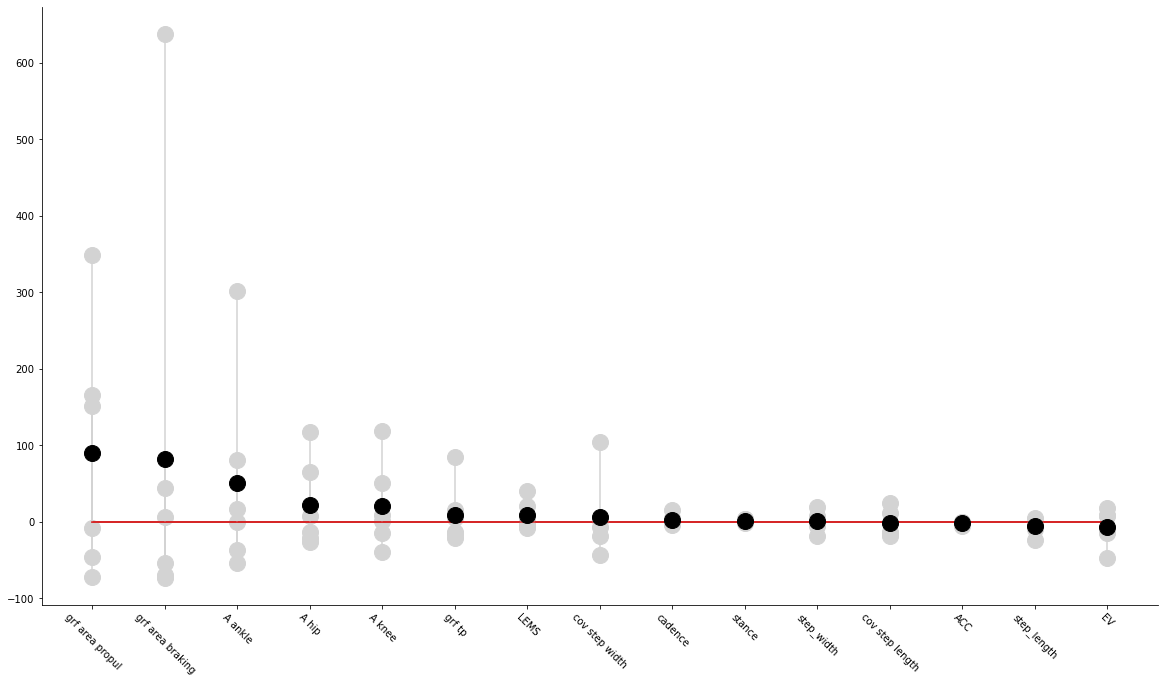

In [126]:
stem_plot('BL', 'T0')

# 15. Kinetic parameters:<a class="anchor" id="sect_15"></a>
[Back to table of contents](#TOC)

Fore-aft GRF is lower in individuals with iSCI even after accounting for these factors. As a result, analysing fore-aft GRF provides an opportunity to eliminate the confounding influence of walking speed, enabling a direct examination of the impact of neuromuscular deficits, muscle atrophy, and/or compensatory strategies following the injury.

3 parameters were extracted from the fore-aft GRF: the transition point (TP), the braking impulse, and the propulsive impulse. The TP represents the time point in percentage of stance phase at which the force curve switches from negative (indicating braking) to positive (indicating propulsion). The braking impulse was characterised as the area beneath the negative force curve before the TP, while the propulsive impulse was described as the area beneath the positive force curve after the TP.

***

We load the calibration trials which allow us to normalise the walking trials.

**BO2ST_101**

In [202]:
_, _, forces_101_BL_cal = download_parameters_force_calibration("BO2ST_101", "20230310_BL")
_, _, forces_101_T0_cal = download_parameters_force_calibration("BO2ST_101", "20230324_T0")

In [246]:
_, _, forces_101_T1_cal = download_parameters_force_calibration("BO2ST_101", "20230331_T1")

In [263]:
_, _, forces_101_T2_cal = download_parameters_force_calibration("BO2ST_101", "20230407_T2")

In [335]:
_, _, forces_101_F1_cal = download_parameters_force_calibration("BO2ST_101", "20230414_F1")
_, _, forces_101_F4_cal = download_parameters_force_calibration("BO2ST_101", "20230505_F4")
_, _, forces_101_F8_cal = download_parameters_force_calibration("BO2ST_101", "20230602_F8")

**BO2ST_102**

In [203]:
_, _, forces_102_BL_cal = download_parameters_force_calibration("BO2ST_102", "20230412_BL")
_, _, forces_102_T0_cal = download_parameters_force_calibration("BO2ST_102", "20230428_T0")

In [247]:
_, _, forces_102_T1_cal = download_parameters_force_calibration("BO2ST_102", "20230505_T1")

In [264]:
_, _, forces_102_T2_cal = download_parameters_force_calibration("BO2ST_102", "20230512_T2")

In [336]:
_, _, forces_102_F1_cal = download_parameters_force_calibration("BO2ST_102", "20230519_F1")
_, _, forces_102_F4_cal = download_parameters_force_calibration("BO2ST_102", "20230607_F4")
_, _, forces_102_F8_cal = download_parameters_force_calibration("BO2ST_102", "20230719_F8")

**BO2ST_103**

In [204]:
_, _, forces_103_BL_cal = download_parameters_force_calibration("BO2ST_103", "20230317_BL")
_, _, forces_103_T0_cal = download_parameters_force_calibration("BO2ST_103", "20230331_T0")

In [248]:
_, _, forces_103_T1_cal = download_parameters_force_calibration("BO2ST_103", "20230407_T1")

In [265]:
_, _, forces_103_T2_cal = download_parameters_force_calibration("BO2ST_103", "20230414_T2")

In [338]:
_, _, forces_103_F1_cal = download_parameters_force_calibration("BO2ST_103", "20230421_F1")
_, _, forces_103_F4_cal = download_parameters_force_calibration("BO2ST_103", "20230526_F4")
_, _, forces_103_F8_cal = download_parameters_force_calibration("BO2ST_103", "20230630_F8")

**BO2ST_104**

In [205]:
_, _, forces_104_BL_cal = download_parameters_force_calibration("BO2ST_104", "20230622_BL")
_, _, forces_104_T0_cal = download_parameters_force_calibration("BO2ST_104", "20230707_T0")

In [249]:
_, _, forces_104_T1_cal = download_parameters_force_calibration("BO2ST_104", "20230717_T1")

In [266]:
_, _, forces_104_T2_cal = download_parameters_force_calibration("BO2ST_104", "20230721_T2")

In [389]:
_, _, forces_104_F1_cal = download_parameters_force_calibration("BO2ST_104", "20230728_F1")
_, _, forces_104_F4_cal = download_parameters_force_calibration("BO2ST_104", "20230818_F4")
_, _, forces_104_F8_cal = download_parameters_force_calibration("BO2ST_104", "20231001_F8")

**BO2ST_105**

In [206]:
_, _, forces_105_BL_cal = download_parameters_force_calibration("BO2ST_105", "20230524_BL")
_, _, forces_105_T0_cal = download_parameters_force_calibration("BO2ST_105", "20230609_T0")

In [250]:
_, _, forces_105_T1_cal = download_parameters_force_calibration("BO2ST_105", "20230616_T1")

In [267]:
_, _, forces_105_T2_cal = download_parameters_force_calibration("BO2ST_105", "20230623_T2")

In [342]:
_, _, forces_105_F1_cal = download_parameters_force_calibration("BO2ST_105", "20230629_F1")
_, _, forces_105_F4_cal = download_parameters_force_calibration("BO2ST_105", "20230719_F4")
_, _, forces_105_F8_cal = download_parameters_force_calibration("BO2ST_105", "20230816_F8")

**BO2ST_106**

In [207]:
_, _, forces_106_BL_cal = download_parameters_force_calibration("BO2ST_106", "20230428_BL")
_, _, forces_106_T0_cal = download_parameters_force_calibration("BO2ST_106", "20230512_T0")

In [251]:
_, _, forces_106_T1_cal = download_parameters_force_calibration("BO2ST_106", "20230519_T1")

In [268]:
_, _, forces_106_T2_cal = download_parameters_force_calibration("BO2ST_106", "20230526_T2")

In [343]:
_, _, forces_106_F1_cal = download_parameters_force_calibration("BO2ST_106", "20230602_F1")
_, _, forces_106_F4_cal = download_parameters_force_calibration("BO2ST_106", "20230623_F4")
_, _, forces_106_F8_cal = download_parameters_force_calibration("BO2ST_106", "20230721_F8")

**BO2ST_109**

In [641]:
_, _, forces_109_BL_cal = download_parameters_force_calibration("BO2ST_109", "20230929_BL")
_, _, forces_109_T0_cal = download_parameters_force_calibration("BO2ST_109", "20231013_T0")
_, _, forces_109_T1_cal = download_parameters_force_calibration("BO2ST_109", "20231020_T1")
_, _, forces_109_T2_cal = download_parameters_force_calibration("BO2ST_109", "20231027_T2")
_, _, forces_109_F4_cal = download_parameters_force_calibration("BO2ST_109", "20231127_F4")
_, _, forces_109_F8_cal = download_parameters_force_calibration("BO2ST_109", "20231229_F8")

**Example**

BO2ST_102 Trial 03
14
99
65


/Users/camillefrayssinhes/INSPIRE LAB/src/GRF.py:130: RuntimeWarning:

Mean of empty slice



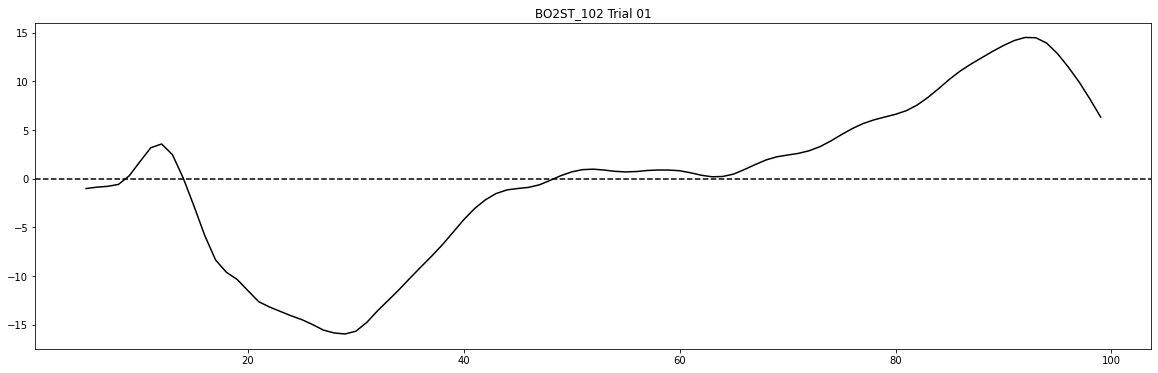

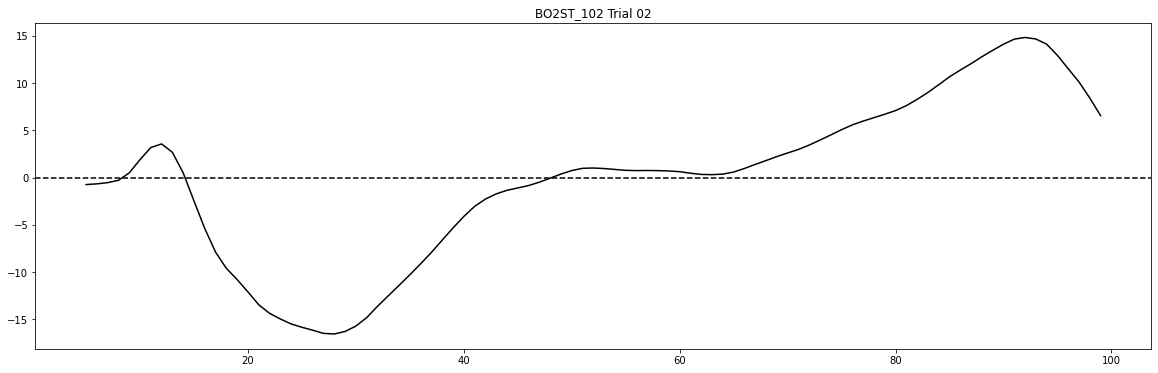

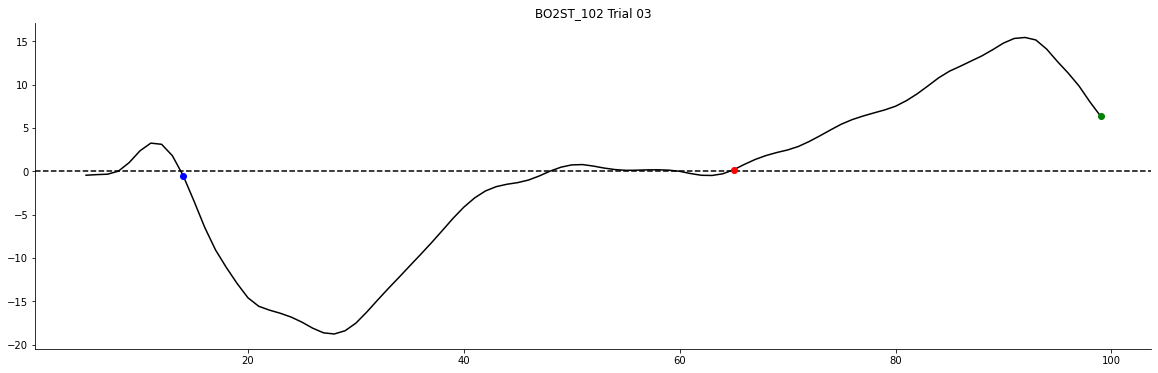

(65.0, 350.3029128294305, 276.7654381002237)

In [707]:
compute_fore_aft_GRF("BO2ST_102", 'R', trajectories_102_F8, forces_102_F8, forces_102_F8_cal, plot=True, new_ss=False)


**Example AB**

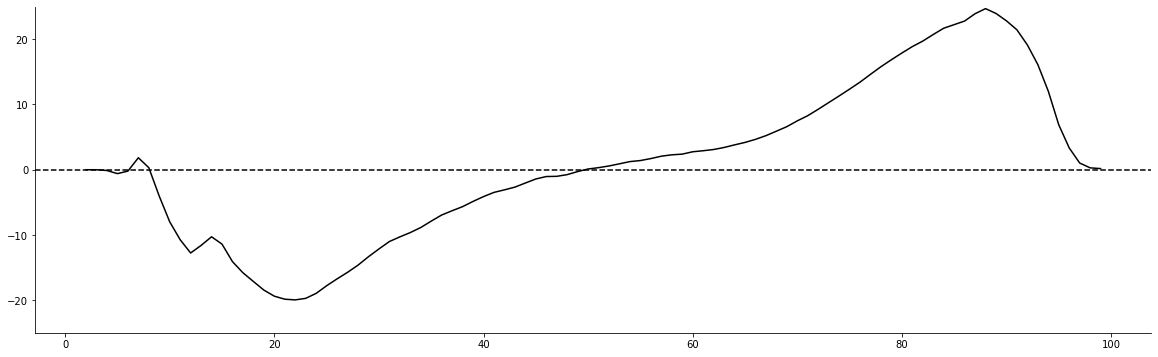

(50.0, 411.7269827857104, 494.64054488284916)

In [241]:
compute_fore_aft_GRF_AB("AB38", trajectories_AB38, forces_AB38, plot=True)

**Write CSV files**

In [693]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
sides = ['L', 'R', 'L', 'R', 'L', 'L', 'L']
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0 = [trajectories_101_T0, trajectories_102_T0, trajectories_103_T0, trajectories_104_T0, trajectories_105_T0, trajectories_106_T0, trajectories_109_T0]
trajectories_T1 = [trajectories_101_T1, trajectories_102_T1, trajectories_103_T1, trajectories_104_T1, trajectories_105_T1, trajectories_106_T1, trajectories_109_T1]
trajectories_T2 = [trajectories_101_T2, trajectories_102_T2, trajectories_103_T2, trajectories_104_T2, trajectories_105_T2, trajectories_106_T2, trajectories_109_T2]
trajectories_F1 = [trajectories_101_F1, trajectories_102_F1, trajectories_103_F1, trajectories_104_F1, trajectories_105_F1, trajectories_106_F1]
trajectories_F4 = [trajectories_101_F4, trajectories_102_F4, trajectories_103_F4, trajectories_104_F4, trajectories_105_F4, trajectories_106_F4, trajectories_109_F4]
trajectories_F8 = [trajectories_101_F8, trajectories_102_F8, trajectories_103_F8, trajectories_104_F8, trajectories_105_F8, trajectories_106_F8, trajectories_109_F8]
forces_BL = [forces_101_BL, forces_102_BL, forces_103_BL, forces_104_BL, forces_105_BL, forces_106_BL, forces_109_BL]
forces_T0 = [forces_101_T0, forces_102_T0, forces_103_T0, forces_104_T0, forces_105_T0, forces_106_T0, forces_109_T0]
forces_T1 = [forces_101_T1, forces_102_T1, forces_103_T1, forces_104_T1, forces_105_T1, forces_106_T1, forces_109_T1]
forces_T2 = [forces_101_T2, forces_102_T2, forces_103_T2, forces_104_T2, forces_105_T2, forces_106_T2, forces_109_T2]
forces_F1 = [forces_101_F1, forces_102_F1, forces_103_F1, forces_104_F1, forces_105_F1, forces_106_F1]
forces_F4 = [forces_101_F4, forces_102_F4, forces_103_F4, forces_104_F4, forces_105_F4, forces_106_F4, forces_109_F4]
forces_F8 = [forces_101_F8, forces_102_F8, forces_103_F8, forces_104_F8, forces_105_F8, forces_106_F8, forces_109_F8]
forces_cal_BL = [forces_101_BL_cal, forces_102_BL_cal, forces_103_BL_cal, forces_104_BL_cal, forces_105_BL_cal, forces_106_BL_cal, forces_109_BL_cal]
forces_cal_T0 = [forces_101_T0_cal, forces_102_T0_cal, forces_103_T0_cal, forces_104_T0_cal, forces_105_T0_cal, forces_106_T0_cal, forces_109_T0_cal]
forces_cal_T1 = [forces_101_T1_cal, forces_102_T1_cal, forces_103_T1_cal, forces_104_T1_cal, forces_105_T1_cal, forces_106_T1_cal, forces_109_T1_cal]
forces_cal_T2 = [forces_101_T2_cal, forces_102_T2_cal, forces_103_T2_cal, forces_104_T2_cal, forces_105_T2_cal, forces_106_T2_cal, forces_109_T2_cal]
forces_cal_F1 = [forces_101_F1_cal, forces_102_F1_cal, forces_103_F1_cal, forces_104_F1_cal, forces_105_F1_cal, forces_106_F1_cal]
forces_cal_F4 = [forces_101_F4_cal, forces_102_F4_cal, forces_103_F4_cal, forces_104_F4_cal, forces_105_F4_cal, forces_106_F4_cal, forces_109_F4_cal]
forces_cal_F8 = [forces_101_F8_cal, forces_102_F8_cal, forces_103_F8_cal, forces_104_F8_cal, forces_105_F8_cal, forces_106_F8_cal, forces_109_F8_cal]

# compute kinetic parameters for the fore-aft grf for all participants
tp_BL = []; tp_T0 = []; tp_T1 = []; tp_T2 = []; tp_F1 = []; tp_F4 = []; tp_F8 = [] 
area_braking_BL = []; area_braking_T0 = []; area_braking_T1 = []; area_braking_T2 = []; area_braking_F1 = []; area_braking_F4 = []; area_braking_F8 = []
area_propul_BL = []; area_propul_T0 = []; area_propul_T1 = []; area_propul_T2 = []; area_propul_F1 = [] ; area_propul_F4 = [] ; area_propul_F8 = []  

for i in range(len(IDs)):
    print(IDs[i])
    tp_BL_i, area_braking_BL_i, area_propul_BL_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_BL[i], forces_BL[i], forces_cal_BL[i], plot=False)
    tp_T0_i, area_braking_T0_i, area_propul_T0_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_T0[i], forces_T0[i], forces_cal_T0[i], plot=False, T0=True)
    tp_T1_i, area_braking_T1_i, area_propul_T1_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_T1[i], forces_T1[i], forces_cal_T1[i], plot=False, T1=True)
    tp_T2_i, area_braking_T2_i, area_propul_T2_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_T2[i], forces_T2[i], forces_cal_T2[i], plot=False, T2=True)
    if (IDs[i]!='BO2ST_109'):
        tp_F1_i, area_braking_F1_i, area_propul_F1_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_F1[i], forces_F1[i], forces_cal_F1[i], plot=False)
    else:
        tp_F1_i = 'nan'; area_braking_F1_i = 'nan'; area_propul_F1_i = 'nan'
    tp_F4_i, area_braking_F4_i, area_propul_F4_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_F4[i], forces_F4[i], forces_cal_F4[i], plot=False)
    if (IDs[i]=='BO2ST_104'):
        tp_F8_i = 'nan'; area_braking_F8_i = 'nan'; area_propul_F8_i = 'nan'
    else:
        tp_F8_i, area_braking_F8_i, area_propul_F8_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_F8[i], forces_F8[i], forces_cal_F8[i], plot=False, F8=True)
    tp_BL.append(tp_BL_i); area_braking_BL.append(area_braking_BL_i); area_propul_BL.append(area_propul_BL_i) 
    tp_T0.append(tp_T0_i); area_braking_T0.append(area_braking_T0_i); area_propul_T0.append(area_propul_T0_i)
    tp_T1.append(tp_T1_i); area_braking_T1.append(area_braking_T1_i); area_propul_T1.append(area_propul_T1_i)
    tp_T2.append(tp_T2_i); area_braking_T2.append(area_braking_T2_i); area_propul_T2.append(area_propul_T2_i)
    tp_F1.append(tp_F1_i); area_braking_F1.append(area_braking_F1_i); area_propul_F1.append(area_propul_F1_i)
    tp_F4.append(tp_F4_i); area_braking_F4.append(area_braking_F4_i); area_propul_F4.append(area_propul_F4_i)
    tp_F8.append(tp_F8_i); area_braking_F8.append(area_braking_F8_i); area_propul_F8.append(area_propul_F8_i)

    
# write the A scores in xcl file
fore_aft_grf = pd.DataFrame([[tp_BL[0], tp_T0[0], tp_T0[0], tp_T2[0], tp_F1[0], tp_F4[0], tp_F8[0], area_braking_BL[0], area_braking_T0[0], area_braking_T1[0], area_braking_T2[0], area_braking_F1[0], area_braking_F4[0], area_braking_F8[0], area_propul_BL[0], area_propul_T0[0], area_propul_T1[0], area_propul_T2[0], area_propul_F1[0], area_propul_F4[0], area_propul_F8[0]],
                             [tp_BL[1], tp_T0[1], tp_T1[1], tp_T2[1], tp_F1[1], tp_F4[1], tp_F8[1], area_braking_BL[1], area_braking_T0[1], area_braking_T1[1], area_braking_T2[1], area_braking_F1[1], area_braking_F4[1], area_braking_F8[1], area_propul_BL[1], area_propul_T0[1], area_propul_T1[1], area_propul_T2[1], area_propul_F1[1], area_propul_F4[1], area_propul_F8[1]],
                             [tp_BL[2], tp_T0[2], tp_T1[2], tp_T2[2], tp_F1[2], tp_F4[2], tp_F8[2], area_braking_BL[2], area_braking_T0[2], area_braking_T1[2], area_braking_T2[2], area_braking_F1[2], area_braking_F4[2], area_braking_F8[2], area_propul_BL[2], area_propul_T0[2], area_propul_T1[2], area_propul_T2[2], area_propul_F1[2], area_propul_F4[2], area_propul_F8[2]],
                             [tp_BL[3], tp_T0[3], tp_T1[3], tp_T2[3], tp_F1[3], tp_F4[3], tp_F8[3], area_braking_BL[3], area_braking_T0[3], area_braking_T1[3], area_braking_T2[3], area_braking_F1[3], area_braking_F4[3], area_braking_F8[3], area_propul_BL[3], area_propul_T0[3], area_propul_T1[3], area_propul_T2[3], area_propul_F1[3], area_propul_F4[3], area_propul_F8[3]],
                             [tp_BL[4], tp_T0[4], tp_T1[4], tp_T2[4], tp_F1[4], tp_F4[4], tp_F8[4], area_braking_BL[4], area_braking_T0[4], area_braking_T1[4], area_braking_T2[4], area_braking_F1[4], area_braking_F4[4], area_braking_F8[4], area_propul_BL[4], area_propul_T0[4], area_propul_T1[4], area_propul_T2[4], area_propul_F1[4], area_propul_F4[4], area_propul_F8[4]],
                             [tp_BL[5], tp_T0[5], tp_T1[5], tp_T2[5], tp_F1[5], tp_F4[5], tp_F8[5], area_braking_BL[5], area_braking_T0[5], area_braking_T1[5], area_braking_T2[5], area_braking_F1[5], area_braking_F4[5], area_braking_F8[5], area_propul_BL[5], area_propul_T0[5], area_propul_T1[5], area_propul_T2[5], area_propul_F1[5], area_propul_F4[5], area_propul_F8[5]],
                             [tp_BL[6], tp_T0[6], tp_T1[6], tp_T2[6], tp_F1[6], tp_F4[6], tp_F8[6], area_braking_BL[6], area_braking_T0[6], area_braking_T1[6], area_braking_T2[6], area_braking_F1[6], area_braking_F4[6], area_braking_F8[6], area_propul_BL[6], area_propul_T0[6], area_propul_T1[6], area_propul_T2[6], area_propul_F1[6], area_propul_F4[6], area_propul_F8[6]]],
                  index=IDs, columns=['tp_BL', 'tp_T0', 'tp_T1', 'tp_T2', 'tp_F1', 'tp_F4', 'tp_F8', 'area_braking_BL', 'area_braking_T0', 'area_braking_T1', 'area_braking_T2', 'area_braking_F1', 'area_braking_F4', 'area_braking_F8', 'area_propul_BL', 'area_propul_T0', 'area_propul_T1', 'area_propul_T2', 'area_propul_F1', 'area_propul_F4', 'area_propul_F8'])                          
fore_aft_grf.to_excel('BO2STTrial/fore_aft_grf.xlsx') 


BO2ST_101
BO2ST_102
BO2ST_103
BO2ST_104
BO2ST_105
BO2ST_106
BO2ST_109


In [695]:
IDs = ["BO2ST_101", "BO2ST_102", "BO2ST_103", "BO2ST_104", "BO2ST_105", "BO2ST_106", "BO2ST_109"]
trajectories_BL = [trajectories_101_BL, trajectories_102_BL, trajectories_103_BL, trajectories_104_BL, trajectories_105_BL, trajectories_106_BL, trajectories_109_BL]
trajectories_T0_new_ss = [trajectories_101_T0, trajectories_102_T0_new_ss, trajectories_103_T0_new_ss, trajectories_104_T0_new_ss, trajectories_105_T0_new_ss, trajectories_106_T0_new_ss, trajectories_109_T0_new_ss]
forces_BL_new_ss = [forces_101_BL, forces_102_BL, forces_103_BL, forces_104_BL, forces_105_BL, forces_106_BL, forces_109_BL]
forces_T0_new_ss = [forces_101_T0, forces_102_T0_new_ss, forces_103_T0_new_ss, forces_104_T0_new_ss, forces_105_T0_new_ss, forces_106_T0_new_ss, forces_109_T0_new_ss]
forces_cal_BL = [forces_101_BL_cal, forces_102_BL_cal, forces_103_BL_cal, forces_104_BL, forces_105_BL_cal, forces_106_BL_cal, forces_109_BL_cal]
forces_cal_T0 = [forces_101_T0_cal, forces_102_T0_cal, forces_103_T0_cal, forces_104_T0, forces_105_T0_cal, forces_106_T0_cal, forces_109_T0_cal]

# compute kinetic parameters for the fore-aft grf for all participants
tp_BL_new_ss = []; tp_T0_new_ss = []
area_braking_BL_new_ss = []; area_braking_T0_new_ss = []
area_propul_BL_new_ss = []; area_propul_T0_new_ss = []

for i in range(len(IDs)):
    print(IDs[i])
    tp_BL_i, area_braking_BL_i, area_propul_BL_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_BL[i], forces_BL[i], forces_cal_BL[i], plot=False)
    if (i==0):
        tp_T0_i, area_braking_T0_i, area_propul_T0_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_T0_new_ss[i], forces_T0_new_ss[i], forces_cal_T0[i], plot=False, new_ss = False, T0 = True)
    else:
        tp_T0_i, area_braking_T0_i, area_propul_T0_i = compute_fore_aft_GRF(IDs[i], sides[i], trajectories_T0_new_ss[i], forces_T0_new_ss[i], forces_cal_T0[i], plot=False, new_ss = True, T0 = True)
    tp_BL_new_ss.append(tp_BL_i); area_braking_BL_new_ss.append(area_braking_BL_i); area_propul_BL_new_ss.append(area_propul_BL_i) 
    tp_T0_new_ss.append(tp_T0_i); area_braking_T0_new_ss.append(area_braking_T0_i); area_propul_T0_new_ss.append(area_propul_T0_i)

    
# write the A scores in xcl file
fore_aft_grf_new_ss = pd.DataFrame([[tp_BL_new_ss[0], tp_T0_new_ss[0], area_braking_BL_new_ss[0], area_braking_T0_new_ss[0], area_propul_BL_new_ss[0], area_propul_T0_new_ss[0]],
                                    [tp_BL_new_ss[1], tp_T0_new_ss[1], area_braking_BL_new_ss[1], area_braking_T0_new_ss[1], area_propul_BL_new_ss[1], area_propul_T0_new_ss[1]],
                                    [tp_BL_new_ss[2], tp_T0_new_ss[2], area_braking_BL_new_ss[2], area_braking_T0_new_ss[2], area_propul_BL_new_ss[2], area_propul_T0_new_ss[2]],
                                    [tp_BL_new_ss[3], tp_T0_new_ss[3], area_braking_BL_new_ss[3], area_braking_T0_new_ss[3], area_propul_BL_new_ss[3], area_propul_T0_new_ss[3]],
                                    [tp_BL_new_ss[4], tp_T0_new_ss[4], area_braking_BL_new_ss[4], area_braking_T0_new_ss[4], area_propul_BL_new_ss[4], area_propul_T0_new_ss[4]],
                                    [tp_BL_new_ss[5], tp_T0_new_ss[5], area_braking_BL_new_ss[5], area_braking_T0_new_ss[5], area_propul_BL_new_ss[5], area_propul_T0_new_ss[5]],
                                    [tp_BL_new_ss[6], tp_T0_new_ss[6], area_braking_BL_new_ss[6], area_braking_T0_new_ss[6], area_propul_BL_new_ss[6], area_propul_T0_new_ss[6]]],
                  index=IDs, columns=['tp_BL', 'tp_T0', 'area_braking_BL', 'area_braking_T0', 'area_propul_BL', 'area_propul_T0'])                          
fore_aft_grf_new_ss.to_excel('BO2STTrial/fore_aft_grf_new_ss.xlsx') 


BO2ST_101
BO2ST_102
BO2ST_103
BO2ST_104
BO2ST_105
BO2ST_106
BO2ST_109


In [413]:
compute_fore_aft_GRF_AB("AB38", trajectories_AB38, forces_AB38, plot=False)

IDs_AB = ["AB03", "AB11", "AB21", "AB38", "AB42"]
trajectories_AB = [trajectories_AB03, trajectories_AB11, trajectories_AB21, trajectories_AB38, trajectories_AB42]
forces_AB = [forces_AB03, forces_AB11, forces_AB21, forces_AB38, forces_AB42]

# compute kinetic parameters for all controls
tp_BL_AB = []; tp_T0_AB = []; tp_T1_AB = []; tp_T2_AB = []; tp_F1_AB = []; tp_F4_AB = []; tp_F8_AB = [] 
area_braking_BL_AB = []; area_braking_T0_AB = []; area_braking_T1_AB = []; area_braking_T2_AB = []; area_braking_F1_AB = []; area_braking_F4_AB = []; area_braking_F8_AB = []
area_propul_BL_AB = []; area_propul_T0_AB = []; area_propul_T1_AB = []; area_propul_T2_AB = []; area_propul_F1_AB = []; area_propul_F4_AB = []; area_propul_F8_AB = []

for i in range(len(IDs_AB)):
    print(IDs_AB[i])
    tp_BL_i, area_braking_BL_i, area_propul_BL_i  = compute_fore_aft_GRF_AB(IDs_AB[i], trajectories_AB[i], forces_AB[i])
    tp_BL_AB.append(tp_BL_i); area_braking_BL_AB.append(area_braking_BL_i); area_propul_BL_AB.append(area_propul_BL_i) 
    tp_T0_AB.append(tp_BL_i); area_braking_T0_AB.append(area_braking_BL_i); area_propul_T0_AB.append(area_propul_BL_i)
    tp_T1_AB.append(tp_BL_i); area_braking_T1_AB.append(area_braking_BL_i); area_propul_T1_AB.append(area_propul_BL_i)
    tp_T2_AB.append(tp_BL_i); area_braking_T2_AB.append(area_braking_BL_i); area_propul_T2_AB.append(area_propul_BL_i)
    tp_F1_AB.append(tp_BL_i); area_braking_F1_AB.append(area_braking_BL_i); area_propul_F1_AB.append(area_propul_BL_i)
    tp_F4_AB.append(tp_BL_i); area_braking_F4_AB.append(area_braking_BL_i); area_propul_F4_AB.append(area_propul_BL_i)
    tp_F8_AB.append(tp_BL_i); area_braking_F8_AB.append(area_braking_BL_i); area_propul_F8_AB.append(area_propul_BL_i)
    
    
# write the A scores in xcl file
fore_aft_grf_AB = pd.DataFrame([[tp_BL_AB[0], tp_T0_AB[0], tp_T1_AB[0], tp_T2_AB[0], tp_F1_AB[0], tp_F4_AB[0], tp_F8_AB[0], area_braking_BL_AB[0], area_braking_T0_AB[0], area_braking_T1_AB[0], area_braking_T2_AB[0], area_braking_F1_AB[0], area_braking_F4_AB[0], area_braking_F8_AB[0], area_propul_BL_AB[0], area_propul_T0_AB[0], area_propul_T1_AB[0], area_propul_T2_AB[0], area_propul_F1_AB[0], area_propul_F4_AB[0], area_propul_F8_AB[0]],
                                [tp_BL_AB[1], tp_T0_AB[1], tp_T1_AB[1], tp_T2_AB[1], tp_F1_AB[1], tp_F4_AB[1], tp_F8_AB[1], area_braking_BL_AB[1], area_braking_T0_AB[1], area_braking_T1_AB[1], area_braking_T2_AB[1], area_braking_F1_AB[1], area_braking_F4_AB[1], area_braking_F8_AB[1], area_propul_BL_AB[1], area_propul_T0_AB[1], area_propul_T1_AB[1], area_propul_T2_AB[1], area_propul_F1_AB[1], area_propul_F4_AB[1], area_propul_F8_AB[1]],
                                [tp_BL_AB[2], tp_T0_AB[2], tp_T1_AB[2], tp_T2_AB[2], tp_F1_AB[2], tp_F4_AB[2], tp_F8_AB[2], area_braking_BL_AB[2], area_braking_T0_AB[2], area_braking_T1_AB[2], area_braking_T2_AB[2], area_braking_F1_AB[2], area_braking_F4_AB[2], area_braking_F8_AB[2], area_propul_BL_AB[2], area_propul_T0_AB[2], area_propul_T1_AB[2], area_propul_T2_AB[2], area_propul_F1_AB[2], area_propul_F4_AB[2], area_propul_F8_AB[2]],
                                [tp_BL_AB[3], tp_T0_AB[3], tp_T1_AB[3], tp_T2_AB[3], tp_F1_AB[3], tp_F4_AB[3], tp_F8_AB[3], area_braking_BL_AB[3], area_braking_T0_AB[3], area_braking_T1_AB[3], area_braking_T2_AB[3], area_braking_F1_AB[3], area_braking_F4_AB[3], area_braking_F8_AB[3], area_propul_BL_AB[3], area_propul_T0_AB[3], area_propul_T1_AB[3], area_propul_T2_AB[3], area_propul_F1_AB[3], area_propul_F4_AB[3], area_propul_F8_AB[3]],
                                [tp_BL_AB[4], tp_T0_AB[4], tp_T1_AB[4], tp_T2_AB[4], tp_F1_AB[4], tp_F4_AB[4], tp_F8_AB[4], area_braking_BL_AB[4], area_braking_T0_AB[4], area_braking_T1_AB[4], area_braking_T2_AB[4], area_braking_F1_AB[4], area_braking_F4_AB[4], area_braking_F8_AB[4], area_propul_BL_AB[4], area_propul_T0_AB[4], area_propul_T1_AB[4], area_propul_T2_AB[4], area_propul_F1_AB[4], area_propul_F4_AB[4], area_propul_F8_AB[4]]],
                  index=IDs_AB, columns=['tp_BL', 'tp_T0', 'tp_T1', 'tp_T2', 'tp_F1', 'tp_F4', 'tp_F8', 'area_braking_BL', 'area_braking_T0', 'area_braking_T1', 'area_braking_T2', 'area_braking_F1', 'area_braking_F4', 'area_braking_F8', 'area_propul_BL', 'area_propul_T0', 'area_propul_T1', 'area_propul_T2', 'area_propul_F1', 'area_propul_F4', 'area_propul_F8'])                          
fore_aft_grf_AB.to_excel('BO2STTrial/fore_aft_grf_AB.xlsx') 


AB03
AB11
AB21
AB38
AB42


In [2821]:
# read xcl files
fore_aft_grf_file_name = ("BO2STTrial/fore_aft_grf.xlsx")
fore_aft_grf_xcl = pd.read_excel(fore_aft_grf_file_name, header = [0], index_col = [0])
fore_aft_grf_new_ss_file_name = ("BO2STTrial/fore_aft_grf_new_ss.xlsx")
fore_aft_grf_new_ss_xcl = pd.read_excel(fore_aft_grf_new_ss_file_name, header = [0], index_col = [0])
fore_aft_grf_AB_file_name = ("BO2STTrial/fore_aft_grf_AB.xlsx")
fore_aft_grf_AB_xcl = pd.read_excel(fore_aft_grf_AB_file_name, header = [0], index_col = [0])
control_file_name = ("BO2STTrial/matched_subjects.xlsx")
control_xcl = pd.read_excel(control_file_name, header = [0], index_col = [0])


ID = "BO2ST_106"
ID_AB = control_xcl.loc[ID].Matched_control
x = ['BL', 'T0']
tp_y = fore_aft_grf_xcl.loc[ID][['tp_BL', 'tp_T0']] # relative to T0?
tp_y_new_ss = fore_aft_grf_new_ss_xcl.loc[ID][['tp_BL', 'tp_T0']] # relative to T0?
tp_y_AB = fore_aft_grf_AB_xcl.loc[ID_AB][['tp_BL', 'tp_T0']] # relative to T0?
area_braking_y = fore_aft_grf_xcl.loc[ID][['area_braking_BL', 'area_braking_T0']] # relative to T0?
area_braking_y_new_ss = fore_aft_grf_new_ss_xcl.loc[ID][['area_braking_BL', 'area_braking_T0']] # relative to T0?
area_braking_y_AB = fore_aft_grf_AB_xcl.loc[ID_AB][['area_braking_BL', 'area_braking_T0']] # relative to T0?
area_propul_y = fore_aft_grf_xcl.loc[ID][['area_propul_BL', 'area_propul_T0']] # relative to T0?
area_propul_y_new_ss = fore_aft_grf_new_ss_xcl.loc[ID][['area_propul_BL', 'area_propul_T0']] # relative to T0?
area_propul_y_AB = fore_aft_grf_AB_xcl.loc[ID_AB][['area_propul_BL', 'area_propul_T0']] # relative to T0?


fig = make_subplots(rows=1, cols=3, x_title = 'Time', horizontal_spacing=0.115)

fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=tp_y, line=dict(color='black')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=tp_y_new_ss, line=dict(color='grey')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='AB', x=x, y=tp_y_AB, line = dict(color='royalblue', dash='dash')),
    row=1, col=1)
fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=area_braking_y, line=dict(color='black')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=area_braking_y_new_ss, line=dict(color='grey')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='AB', x=x, y=area_braking_y_AB, line = dict(color='royalblue', dash='dash')),
    row=1, col=2)
fig.add_trace(
    go.Scatter(name='initial self-selected', x=x, y=area_propul_y, line=dict(color='black')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name='new self-selected', x=x, y=area_propul_y_new_ss, line=dict(color='grey')),
    row=1, col=3)
fig.add_trace(
    go.Scatter(name='AB', x=x, y=area_propul_y_AB, line = dict(color='royalblue', dash='dash')),
    row=1, col=3)


# fig params
fig.update_layout(yaxis_zeroline=False, plot_bgcolor="rgba(0,0,0,0)", height=400, width=1000, showlegend=False)
fig.update_xaxes(linecolor='black'); fig.update_yaxes(linecolor='black', ticks='outside')
#fig.add_hline(y=0, line_color='black', line_dash="dash")
fig['layout']['xaxis1'].update(
    tickmode = 'array',
    tickvals = ['BL', 'T0'],
    ticktext = ['BL', 'T0']
)
fig.update_traces(connectgaps=True)
fig.update_layout(title=ID)
fig.update_yaxes(title_text="Transition Point", row=1, col=1)
fig.update_yaxes(title_text="Braking Area", row=1, col=2)
fig.update_yaxes(title_text="Propulsing Area", row=1, col=3)
fig.show()